In [1]:
import torch
from torch import nn
import time
import torch.nn.functional as F
import matplotlib.pyplot as plt
import dlc_practical_prologue as prologue

In [2]:
#直接导入出现http403错误
from six.moves import urllib
# 直接导入出现http403错误
# have to add a header to your urllib request (due to that site moving to Cloudflare protection)
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)
#*********************** 

In [44]:
N_PAIRS = 5000
train_input, train_target, train_classes, test_input, test_target, test_classes = prologue.generate_pair_sets(N_PAIRS)

In [45]:
print(train_input.shape)
print(train_classes.shape)
print(train_target.shape)
print(test_input.shape)
print(test_classes.shape)
print(test_target.shape)

torch.Size([5000, 2, 14, 14])
torch.Size([5000, 2])
torch.Size([5000])
torch.Size([5000, 2, 14, 14])
torch.Size([5000, 2])
torch.Size([5000])


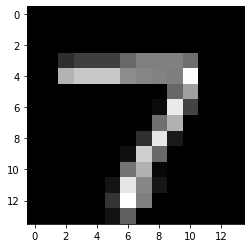

In [46]:
plt.imshow(train_input[4999][0],cmap='gray')
plt.show()

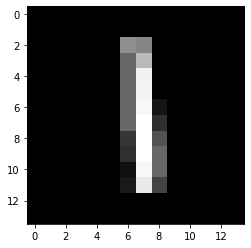

In [47]:
plt.imshow(train_input[4999][1],cmap='gray')
plt.show()

In [48]:
# 将两个图片拼接成一个1*392的tensor，为进入MLP网络进行准备。
print(train_input.shape)
tran_train_input=train_input.view(-1,2*14*14)
print(tran_train_input.shape)

torch.Size([5000, 2, 14, 14])
torch.Size([5000, 392])


In [49]:
#同理对测试数据集进行相同的操作
tran_test_input=test_input.view(-1,2*14*14)
print(tran_test_input.shape)

torch.Size([5000, 392])


In [50]:
class Test_MLPmodel(nn.Module):
    def __init__(self, num_hidden_1,num_hidden_2,num_hidden_3,num_hidden_4):
        super(Test_MLPmodel, self).__init__()
        self.linear1 = nn.Linear(2*14*14, num_hidden_1)
        self.linear2 = nn.Linear(num_hidden_1, num_hidden_2)
        self.linear3 = nn.Linear (num_hidden_2, num_hidden_3)
        self.linear4 = nn.Linear (num_hidden_3, num_hidden_4)
        self.linear_out = nn.Linear(num_hidden_4,2)

    def forward(self, x):
        x = F.relu(self.linear1(x.view(-1,2*14*14)))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = F.relu(self.linear4(x))
        x = self.linear_out(x)       
        return x

In [65]:
class Test_MLPmodel_5(nn.Module):
    def __init__(self, num_hidden_1,num_hidden_2,num_hidden_3,num_hidden_4,num_hidden_5):
        super(Test_MLPmodel_5, self).__init__()
        self.linear1 = nn.Linear(2*14*14, num_hidden_1)
        self.linear2 = nn.Linear(num_hidden_1, num_hidden_2)
        self.linear3 = nn.Linear (num_hidden_2, num_hidden_3)
        self.linear4 = nn.Linear (num_hidden_3, num_hidden_4)
        self.linear5 = nn.Linear (num_hidden_4, num_hidden_5)
        self.linear_out = nn.Linear(num_hidden_5,2)

    def forward(self, x):
        x = F.relu(self.linear1(x.view(-1,2*14*14)))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = F.relu(self.linear4(x))
        x = F.relu(self.linear5(x))
        x = self.linear_out(x)       
        return x

In [51]:
# class Test_MLPmodel(nn.Module):
#     def __init__(self, num_hidden_1):
#         super(Test_MLPmodel, self).__init__()
#         self.linear1_1 = nn.Linear(196, num_hidden_1)
#         self.linear1_2 = nn.Linear(196, num_hidden_1)
#         # After concatenation of the features from image 1 and image 2
#         self.linear_out = nn.Linear(num_hidden_1*2,2)

#     def forward(self, x):
#         x_1 = F.relu(self.linear1_1(x[:,0,:,:].view(-1,196)))
#         x_2 = F.relu(self.linear1_2(x[:,1,:,:].view(-1,196)))
#         x = torch.cat([x_1, x_2],1)
#         x = self.linear_out(x)       
#         return x

In [52]:
#model parameter
num_hidden_1=100
# *************************************************
# training parameter
# 批训练的数量
batch_size=20
# 训练的周期
num_epochs=500
# 学习率
learning_rate=0.001

In [53]:
model = Test_MLPmodel(num_hidden_1=200, num_hidden_2=100,num_hidden_3=50,num_hidden_4=20)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

In [54]:
# def compute_accuracy(net, test_input,test_target):
# # 在训练模型的时候前面加上model.train()，在测试模型的时候前面加上model.eval(),以切换到测试模式
#     net.eval()
#     correct_pred, num_examples = 0, 0
# # 而with torch.no_grad()则主要是用于停止autograd模块的工作，
# # 以起到加速和节省显存的作用，具体行为就是停止gradient计算，
# # 从而节省了GPU算力和显存，但是并不会影响dropout和batchnorm层的行为。
#     with torch.no_grad():
# #         for features, targets in data_loader:
#         for idx in range(test_input.size(0)):
# #             features = features.view(-1, 14*14)
#             features= test_input[idx]
#             targets = test_target[idx]
#             logits, probas = net(features)
#             _, predicted_labels = torch.max(probas, 1)
#             num_examples += targets.size(0)
#             correct_pred += (predicted_labels == targets).sum()
#         return correct_pred.float()/num_examples * 100

In [55]:
# 训练模型
start_time = time.time()
for epoch in range(num_epochs):
    model.train()
    for batch_idx in range(0,tran_train_input.size(0),batch_size):
        output = model(tran_train_input[batch_idx:batch_idx+batch_size]) 
        loss = F.cross_entropy(output, train_target[batch_idx:batch_idx+batch_size])  
        optimizer.zero_grad()                          #清零梯度
        loss.backward()                                #反向求梯度
        optimizer.step()
        
        if not batch_idx % 50:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Loss: %.6f' 
                   %(epoch+1, num_epochs, batch_idx, 
                     len(train_input), loss))
    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))

print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

Epoch: 001/500 | Batch 000/5000 | Loss: 1.782798
Epoch: 001/500 | Batch 100/5000 | Loss: 0.672888
Epoch: 001/500 | Batch 200/5000 | Loss: 0.787438
Epoch: 001/500 | Batch 300/5000 | Loss: 0.690537
Epoch: 001/500 | Batch 400/5000 | Loss: 0.706132
Epoch: 001/500 | Batch 500/5000 | Loss: 0.852676
Epoch: 001/500 | Batch 600/5000 | Loss: 0.694889
Epoch: 001/500 | Batch 700/5000 | Loss: 0.649745
Epoch: 001/500 | Batch 800/5000 | Loss: 0.587324
Epoch: 001/500 | Batch 900/5000 | Loss: 0.602865
Epoch: 001/500 | Batch 1000/5000 | Loss: 0.593728
Epoch: 001/500 | Batch 1100/5000 | Loss: 0.550941
Epoch: 001/500 | Batch 1200/5000 | Loss: 0.702294
Epoch: 001/500 | Batch 1300/5000 | Loss: 0.640148
Epoch: 001/500 | Batch 1400/5000 | Loss: 0.588542
Epoch: 001/500 | Batch 1500/5000 | Loss: 0.641482
Epoch: 001/500 | Batch 1600/5000 | Loss: 0.681156
Epoch: 001/500 | Batch 1700/5000 | Loss: 0.586950
Epoch: 001/500 | Batch 1800/5000 | Loss: 0.599824
Epoch: 001/500 | Batch 1900/5000 | Loss: 0.713912
Epoch: 001

Epoch: 004/500 | Batch 4800/5000 | Loss: 0.457346
Epoch: 004/500 | Batch 4900/5000 | Loss: 0.459153
Time elapsed: 0.01 min
Epoch: 005/500 | Batch 000/5000 | Loss: 0.321165
Epoch: 005/500 | Batch 100/5000 | Loss: 0.442213
Epoch: 005/500 | Batch 200/5000 | Loss: 0.318047
Epoch: 005/500 | Batch 300/5000 | Loss: 0.302939
Epoch: 005/500 | Batch 400/5000 | Loss: 0.284750
Epoch: 005/500 | Batch 500/5000 | Loss: 0.442838
Epoch: 005/500 | Batch 600/5000 | Loss: 0.350467
Epoch: 005/500 | Batch 700/5000 | Loss: 0.310335
Epoch: 005/500 | Batch 800/5000 | Loss: 0.396761
Epoch: 005/500 | Batch 900/5000 | Loss: 0.323507
Epoch: 005/500 | Batch 1000/5000 | Loss: 0.391070
Epoch: 005/500 | Batch 1100/5000 | Loss: 0.182267
Epoch: 005/500 | Batch 1200/5000 | Loss: 0.455598
Epoch: 005/500 | Batch 1300/5000 | Loss: 0.461503
Epoch: 005/500 | Batch 1400/5000 | Loss: 0.397814
Epoch: 005/500 | Batch 1500/5000 | Loss: 0.370621
Epoch: 005/500 | Batch 1600/5000 | Loss: 0.454435
Epoch: 005/500 | Batch 1700/5000 | Lo

Epoch: 009/500 | Batch 300/5000 | Loss: 0.267541
Epoch: 009/500 | Batch 400/5000 | Loss: 0.251844
Epoch: 009/500 | Batch 500/5000 | Loss: 0.409183
Epoch: 009/500 | Batch 600/5000 | Loss: 0.243784
Epoch: 009/500 | Batch 700/5000 | Loss: 0.172136
Epoch: 009/500 | Batch 800/5000 | Loss: 0.250031
Epoch: 009/500 | Batch 900/5000 | Loss: 0.217212
Epoch: 009/500 | Batch 1000/5000 | Loss: 0.339343
Epoch: 009/500 | Batch 1100/5000 | Loss: 0.116661
Epoch: 009/500 | Batch 1200/5000 | Loss: 0.296681
Epoch: 009/500 | Batch 1300/5000 | Loss: 0.335115
Epoch: 009/500 | Batch 1400/5000 | Loss: 0.330647
Epoch: 009/500 | Batch 1500/5000 | Loss: 0.237330
Epoch: 009/500 | Batch 1600/5000 | Loss: 0.342314
Epoch: 009/500 | Batch 1700/5000 | Loss: 0.243160
Epoch: 009/500 | Batch 1800/5000 | Loss: 0.237802
Epoch: 009/500 | Batch 1900/5000 | Loss: 0.386664
Epoch: 009/500 | Batch 2000/5000 | Loss: 0.140912
Epoch: 009/500 | Batch 2100/5000 | Loss: 0.215739
Epoch: 009/500 | Batch 2200/5000 | Loss: 0.369900
Epoch: 

Epoch: 012/500 | Batch 4400/5000 | Loss: 0.259380
Epoch: 012/500 | Batch 4500/5000 | Loss: 0.271790
Epoch: 012/500 | Batch 4600/5000 | Loss: 0.496716
Epoch: 012/500 | Batch 4700/5000 | Loss: 0.218616
Epoch: 012/500 | Batch 4800/5000 | Loss: 0.368937
Epoch: 012/500 | Batch 4900/5000 | Loss: 0.241149
Time elapsed: 0.04 min
Epoch: 013/500 | Batch 000/5000 | Loss: 0.182348
Epoch: 013/500 | Batch 100/5000 | Loss: 0.226391
Epoch: 013/500 | Batch 200/5000 | Loss: 0.137183
Epoch: 013/500 | Batch 300/5000 | Loss: 0.216497
Epoch: 013/500 | Batch 400/5000 | Loss: 0.193024
Epoch: 013/500 | Batch 500/5000 | Loss: 0.343769
Epoch: 013/500 | Batch 600/5000 | Loss: 0.156626
Epoch: 013/500 | Batch 700/5000 | Loss: 0.064023
Epoch: 013/500 | Batch 800/5000 | Loss: 0.134511
Epoch: 013/500 | Batch 900/5000 | Loss: 0.135633
Epoch: 013/500 | Batch 1000/5000 | Loss: 0.276950
Epoch: 013/500 | Batch 1100/5000 | Loss: 0.078811
Epoch: 013/500 | Batch 1200/5000 | Loss: 0.170008
Epoch: 013/500 | Batch 1300/5000 | Lo

Epoch: 016/500 | Batch 3200/5000 | Loss: 0.145267
Epoch: 016/500 | Batch 3300/5000 | Loss: 0.047055
Epoch: 016/500 | Batch 3400/5000 | Loss: 0.094265
Epoch: 016/500 | Batch 3500/5000 | Loss: 0.092264
Epoch: 016/500 | Batch 3600/5000 | Loss: 0.160942
Epoch: 016/500 | Batch 3700/5000 | Loss: 0.074892
Epoch: 016/500 | Batch 3800/5000 | Loss: 0.068506
Epoch: 016/500 | Batch 3900/5000 | Loss: 0.330811
Epoch: 016/500 | Batch 4000/5000 | Loss: 0.138062
Epoch: 016/500 | Batch 4100/5000 | Loss: 0.134879
Epoch: 016/500 | Batch 4200/5000 | Loss: 0.375401
Epoch: 016/500 | Batch 4300/5000 | Loss: 0.132447
Epoch: 016/500 | Batch 4400/5000 | Loss: 0.148958
Epoch: 016/500 | Batch 4500/5000 | Loss: 0.209950
Epoch: 016/500 | Batch 4600/5000 | Loss: 0.372127
Epoch: 016/500 | Batch 4700/5000 | Loss: 0.145816
Epoch: 016/500 | Batch 4800/5000 | Loss: 0.267743
Epoch: 016/500 | Batch 4900/5000 | Loss: 0.149358
Time elapsed: 0.06 min
Epoch: 017/500 | Batch 000/5000 | Loss: 0.134016
Epoch: 017/500 | Batch 100/5

Epoch: 020/500 | Batch 4100/5000 | Loss: 0.105974
Epoch: 020/500 | Batch 4200/5000 | Loss: 0.202915
Epoch: 020/500 | Batch 4300/5000 | Loss: 0.067254
Epoch: 020/500 | Batch 4400/5000 | Loss: 0.074745
Epoch: 020/500 | Batch 4500/5000 | Loss: 0.068143
Epoch: 020/500 | Batch 4600/5000 | Loss: 0.249865
Epoch: 020/500 | Batch 4700/5000 | Loss: 0.075775
Epoch: 020/500 | Batch 4800/5000 | Loss: 0.147338
Epoch: 020/500 | Batch 4900/5000 | Loss: 0.072551
Time elapsed: 0.07 min
Epoch: 021/500 | Batch 000/5000 | Loss: 0.080975
Epoch: 021/500 | Batch 100/5000 | Loss: 0.087599
Epoch: 021/500 | Batch 200/5000 | Loss: 0.049390
Epoch: 021/500 | Batch 300/5000 | Loss: 0.076052
Epoch: 021/500 | Batch 400/5000 | Loss: 0.053004
Epoch: 021/500 | Batch 500/5000 | Loss: 0.122265
Epoch: 021/500 | Batch 600/5000 | Loss: 0.043985
Epoch: 021/500 | Batch 700/5000 | Loss: 0.016415
Epoch: 021/500 | Batch 800/5000 | Loss: 0.054783
Epoch: 021/500 | Batch 900/5000 | Loss: 0.056855
Epoch: 021/500 | Batch 1000/5000 | Lo

Epoch: 024/500 | Batch 4100/5000 | Loss: 0.054746
Epoch: 024/500 | Batch 4200/5000 | Loss: 0.067234
Epoch: 024/500 | Batch 4300/5000 | Loss: 0.034981
Epoch: 024/500 | Batch 4400/5000 | Loss: 0.036542
Epoch: 024/500 | Batch 4500/5000 | Loss: 0.025302
Epoch: 024/500 | Batch 4600/5000 | Loss: 0.151854
Epoch: 024/500 | Batch 4700/5000 | Loss: 0.041836
Epoch: 024/500 | Batch 4800/5000 | Loss: 0.061948
Epoch: 024/500 | Batch 4900/5000 | Loss: 0.043640
Time elapsed: 0.08 min
Epoch: 025/500 | Batch 000/5000 | Loss: 0.047966
Epoch: 025/500 | Batch 100/5000 | Loss: 0.041477
Epoch: 025/500 | Batch 200/5000 | Loss: 0.027812
Epoch: 025/500 | Batch 300/5000 | Loss: 0.040418
Epoch: 025/500 | Batch 400/5000 | Loss: 0.028483
Epoch: 025/500 | Batch 500/5000 | Loss: 0.031828
Epoch: 025/500 | Batch 600/5000 | Loss: 0.019890
Epoch: 025/500 | Batch 700/5000 | Loss: 0.012636
Epoch: 025/500 | Batch 800/5000 | Loss: 0.033481
Epoch: 025/500 | Batch 900/5000 | Loss: 0.044388
Epoch: 025/500 | Batch 1000/5000 | Lo

Epoch: 028/500 | Batch 4000/5000 | Loss: 0.008473
Epoch: 028/500 | Batch 4100/5000 | Loss: 0.027299
Epoch: 028/500 | Batch 4200/5000 | Loss: 0.025094
Epoch: 028/500 | Batch 4300/5000 | Loss: 0.011732
Epoch: 028/500 | Batch 4400/5000 | Loss: 0.014169
Epoch: 028/500 | Batch 4500/5000 | Loss: 0.012904
Epoch: 028/500 | Batch 4600/5000 | Loss: 0.052926
Epoch: 028/500 | Batch 4700/5000 | Loss: 0.023929
Epoch: 028/500 | Batch 4800/5000 | Loss: 0.031686
Epoch: 028/500 | Batch 4900/5000 | Loss: 0.022226
Time elapsed: 0.10 min
Epoch: 029/500 | Batch 000/5000 | Loss: 0.023271
Epoch: 029/500 | Batch 100/5000 | Loss: 0.020013
Epoch: 029/500 | Batch 200/5000 | Loss: 0.011140
Epoch: 029/500 | Batch 300/5000 | Loss: 0.016419
Epoch: 029/500 | Batch 400/5000 | Loss: 0.012260
Epoch: 029/500 | Batch 500/5000 | Loss: 0.018610
Epoch: 029/500 | Batch 600/5000 | Loss: 0.008204
Epoch: 029/500 | Batch 700/5000 | Loss: 0.009949
Epoch: 029/500 | Batch 800/5000 | Loss: 0.015808
Epoch: 029/500 | Batch 900/5000 | Lo

Epoch: 032/500 | Batch 2900/5000 | Loss: 0.004289
Epoch: 032/500 | Batch 3000/5000 | Loss: 0.007935
Epoch: 032/500 | Batch 3100/5000 | Loss: 0.016341
Epoch: 032/500 | Batch 3200/5000 | Loss: 0.013395
Epoch: 032/500 | Batch 3300/5000 | Loss: 0.002735
Epoch: 032/500 | Batch 3400/5000 | Loss: 0.011692
Epoch: 032/500 | Batch 3500/5000 | Loss: 0.006571
Epoch: 032/500 | Batch 3600/5000 | Loss: 0.016704
Epoch: 032/500 | Batch 3700/5000 | Loss: 0.010099
Epoch: 032/500 | Batch 3800/5000 | Loss: 0.003994
Epoch: 032/500 | Batch 3900/5000 | Loss: 0.017089
Epoch: 032/500 | Batch 4000/5000 | Loss: 0.005402
Epoch: 032/500 | Batch 4100/5000 | Loss: 0.015616
Epoch: 032/500 | Batch 4200/5000 | Loss: 0.016932
Epoch: 032/500 | Batch 4300/5000 | Loss: 0.005118
Epoch: 032/500 | Batch 4400/5000 | Loss: 0.006992
Epoch: 032/500 | Batch 4500/5000 | Loss: 0.008819
Epoch: 032/500 | Batch 4600/5000 | Loss: 0.022432
Epoch: 032/500 | Batch 4700/5000 | Loss: 0.014013
Epoch: 032/500 | Batch 4800/5000 | Loss: 0.016174


Epoch: 036/500 | Batch 2100/5000 | Loss: 0.003836
Epoch: 036/500 | Batch 2200/5000 | Loss: 0.006335
Epoch: 036/500 | Batch 2300/5000 | Loss: 0.005596
Epoch: 036/500 | Batch 2400/5000 | Loss: 0.008881
Epoch: 036/500 | Batch 2500/5000 | Loss: 0.003379
Epoch: 036/500 | Batch 2600/5000 | Loss: 0.002168
Epoch: 036/500 | Batch 2700/5000 | Loss: 0.004149
Epoch: 036/500 | Batch 2800/5000 | Loss: 0.002276
Epoch: 036/500 | Batch 2900/5000 | Loss: 0.003560
Epoch: 036/500 | Batch 3000/5000 | Loss: 0.004878
Epoch: 036/500 | Batch 3100/5000 | Loss: 0.009745
Epoch: 036/500 | Batch 3200/5000 | Loss: 0.007491
Epoch: 036/500 | Batch 3300/5000 | Loss: 0.001253
Epoch: 036/500 | Batch 3400/5000 | Loss: 0.007499
Epoch: 036/500 | Batch 3500/5000 | Loss: 0.003188
Epoch: 036/500 | Batch 3600/5000 | Loss: 0.011818
Epoch: 036/500 | Batch 3700/5000 | Loss: 0.006288
Epoch: 036/500 | Batch 3800/5000 | Loss: 0.002823
Epoch: 036/500 | Batch 3900/5000 | Loss: 0.009274
Epoch: 036/500 | Batch 4000/5000 | Loss: 0.003915


Epoch: 040/500 | Batch 1600/5000 | Loss: 0.004456
Epoch: 040/500 | Batch 1700/5000 | Loss: 0.005781
Epoch: 040/500 | Batch 1800/5000 | Loss: 0.003176
Epoch: 040/500 | Batch 1900/5000 | Loss: 0.005778
Epoch: 040/500 | Batch 2000/5000 | Loss: 0.002148
Epoch: 040/500 | Batch 2100/5000 | Loss: 0.002849
Epoch: 040/500 | Batch 2200/5000 | Loss: 0.003655
Epoch: 040/500 | Batch 2300/5000 | Loss: 0.003594
Epoch: 040/500 | Batch 2400/5000 | Loss: 0.006321
Epoch: 040/500 | Batch 2500/5000 | Loss: 0.002670
Epoch: 040/500 | Batch 2600/5000 | Loss: 0.001618
Epoch: 040/500 | Batch 2700/5000 | Loss: 0.002922
Epoch: 040/500 | Batch 2800/5000 | Loss: 0.001713
Epoch: 040/500 | Batch 2900/5000 | Loss: 0.002820
Epoch: 040/500 | Batch 3000/5000 | Loss: 0.002899
Epoch: 040/500 | Batch 3100/5000 | Loss: 0.006912
Epoch: 040/500 | Batch 3200/5000 | Loss: 0.004853
Epoch: 040/500 | Batch 3300/5000 | Loss: 0.000664
Epoch: 040/500 | Batch 3400/5000 | Loss: 0.005172
Epoch: 040/500 | Batch 3500/5000 | Loss: 0.001974


Epoch: 044/500 | Batch 1800/5000 | Loss: 0.002517
Epoch: 044/500 | Batch 1900/5000 | Loss: 0.003883
Epoch: 044/500 | Batch 2000/5000 | Loss: 0.001433
Epoch: 044/500 | Batch 2100/5000 | Loss: 0.002221
Epoch: 044/500 | Batch 2200/5000 | Loss: 0.002347
Epoch: 044/500 | Batch 2300/5000 | Loss: 0.002749
Epoch: 044/500 | Batch 2400/5000 | Loss: 0.004582
Epoch: 044/500 | Batch 2500/5000 | Loss: 0.002062
Epoch: 044/500 | Batch 2600/5000 | Loss: 0.001153
Epoch: 044/500 | Batch 2700/5000 | Loss: 0.002138
Epoch: 044/500 | Batch 2800/5000 | Loss: 0.001326
Epoch: 044/500 | Batch 2900/5000 | Loss: 0.002239
Epoch: 044/500 | Batch 3000/5000 | Loss: 0.001929
Epoch: 044/500 | Batch 3100/5000 | Loss: 0.005031
Epoch: 044/500 | Batch 3200/5000 | Loss: 0.003724
Epoch: 044/500 | Batch 3300/5000 | Loss: 0.000433
Epoch: 044/500 | Batch 3400/5000 | Loss: 0.003671
Epoch: 044/500 | Batch 3500/5000 | Loss: 0.001335
Epoch: 044/500 | Batch 3600/5000 | Loss: 0.005899
Epoch: 044/500 | Batch 3700/5000 | Loss: 0.002534


Epoch: 048/500 | Batch 1600/5000 | Loss: 0.002470
Epoch: 048/500 | Batch 1700/5000 | Loss: 0.003245
Epoch: 048/500 | Batch 1800/5000 | Loss: 0.002027
Epoch: 048/500 | Batch 1900/5000 | Loss: 0.002840
Epoch: 048/500 | Batch 2000/5000 | Loss: 0.001099
Epoch: 048/500 | Batch 2100/5000 | Loss: 0.001821
Epoch: 048/500 | Batch 2200/5000 | Loss: 0.001678
Epoch: 048/500 | Batch 2300/5000 | Loss: 0.002192
Epoch: 048/500 | Batch 2400/5000 | Loss: 0.003379
Epoch: 048/500 | Batch 2500/5000 | Loss: 0.001576
Epoch: 048/500 | Batch 2600/5000 | Loss: 0.000830
Epoch: 048/500 | Batch 2700/5000 | Loss: 0.001608
Epoch: 048/500 | Batch 2800/5000 | Loss: 0.001021
Epoch: 048/500 | Batch 2900/5000 | Loss: 0.001784
Epoch: 048/500 | Batch 3000/5000 | Loss: 0.001385
Epoch: 048/500 | Batch 3100/5000 | Loss: 0.003834
Epoch: 048/500 | Batch 3200/5000 | Loss: 0.003111
Epoch: 048/500 | Batch 3300/5000 | Loss: 0.000328
Epoch: 048/500 | Batch 3400/5000 | Loss: 0.002826
Epoch: 048/500 | Batch 3500/5000 | Loss: 0.000985


Epoch: 051/500 | Batch 4100/5000 | Loss: 0.002924
Epoch: 051/500 | Batch 4200/5000 | Loss: 0.002795
Epoch: 051/500 | Batch 4300/5000 | Loss: 0.000851
Epoch: 051/500 | Batch 4400/5000 | Loss: 0.001091
Epoch: 051/500 | Batch 4500/5000 | Loss: 0.001865
Epoch: 051/500 | Batch 4600/5000 | Loss: 0.005300
Epoch: 051/500 | Batch 4700/5000 | Loss: 0.003120
Epoch: 051/500 | Batch 4800/5000 | Loss: 0.003039
Epoch: 051/500 | Batch 4900/5000 | Loss: 0.001413
Time elapsed: 0.18 min
Epoch: 052/500 | Batch 000/5000 | Loss: 0.001669
Epoch: 052/500 | Batch 100/5000 | Loss: 0.001654
Epoch: 052/500 | Batch 200/5000 | Loss: 0.000493
Epoch: 052/500 | Batch 300/5000 | Loss: 0.001641
Epoch: 052/500 | Batch 400/5000 | Loss: 0.002060
Epoch: 052/500 | Batch 500/5000 | Loss: 0.002245
Epoch: 052/500 | Batch 600/5000 | Loss: 0.000710
Epoch: 052/500 | Batch 700/5000 | Loss: 0.000944
Epoch: 052/500 | Batch 800/5000 | Loss: 0.001439
Epoch: 052/500 | Batch 900/5000 | Loss: 0.001806
Epoch: 052/500 | Batch 1000/5000 | Lo

Epoch: 055/500 | Batch 3100/5000 | Loss: 0.002355
Epoch: 055/500 | Batch 3200/5000 | Loss: 0.002411
Epoch: 055/500 | Batch 3300/5000 | Loss: 0.000236
Epoch: 055/500 | Batch 3400/5000 | Loss: 0.001790
Epoch: 055/500 | Batch 3500/5000 | Loss: 0.000668
Epoch: 055/500 | Batch 3600/5000 | Loss: 0.003033
Epoch: 055/500 | Batch 3700/5000 | Loss: 0.001136
Epoch: 055/500 | Batch 3800/5000 | Loss: 0.000797
Epoch: 055/500 | Batch 3900/5000 | Loss: 0.002081
Epoch: 055/500 | Batch 4000/5000 | Loss: 0.000957
Epoch: 055/500 | Batch 4100/5000 | Loss: 0.002424
Epoch: 055/500 | Batch 4200/5000 | Loss: 0.002227
Epoch: 055/500 | Batch 4300/5000 | Loss: 0.000735
Epoch: 055/500 | Batch 4400/5000 | Loss: 0.001015
Epoch: 055/500 | Batch 4500/5000 | Loss: 0.001362
Epoch: 055/500 | Batch 4600/5000 | Loss: 0.004369
Epoch: 055/500 | Batch 4700/5000 | Loss: 0.002607
Epoch: 055/500 | Batch 4800/5000 | Loss: 0.002571
Epoch: 055/500 | Batch 4900/5000 | Loss: 0.001182
Time elapsed: 0.19 min
Epoch: 056/500 | Batch 000/

Epoch: 059/500 | Batch 2700/5000 | Loss: 0.000954
Epoch: 059/500 | Batch 2800/5000 | Loss: 0.000580
Epoch: 059/500 | Batch 2900/5000 | Loss: 0.001065
Epoch: 059/500 | Batch 3000/5000 | Loss: 0.000755
Epoch: 059/500 | Batch 3100/5000 | Loss: 0.001838
Epoch: 059/500 | Batch 3200/5000 | Loss: 0.002068
Epoch: 059/500 | Batch 3300/5000 | Loss: 0.000207
Epoch: 059/500 | Batch 3400/5000 | Loss: 0.001432
Epoch: 059/500 | Batch 3500/5000 | Loss: 0.000561
Epoch: 059/500 | Batch 3600/5000 | Loss: 0.002550
Epoch: 059/500 | Batch 3700/5000 | Loss: 0.000944
Epoch: 059/500 | Batch 3800/5000 | Loss: 0.000662
Epoch: 059/500 | Batch 3900/5000 | Loss: 0.001753
Epoch: 059/500 | Batch 4000/5000 | Loss: 0.000805
Epoch: 059/500 | Batch 4100/5000 | Loss: 0.002016
Epoch: 059/500 | Batch 4200/5000 | Loss: 0.001792
Epoch: 059/500 | Batch 4300/5000 | Loss: 0.000644
Epoch: 059/500 | Batch 4400/5000 | Loss: 0.000989
Epoch: 059/500 | Batch 4500/5000 | Loss: 0.001008
Epoch: 059/500 | Batch 4600/5000 | Loss: 0.003611


Epoch: 063/500 | Batch 2400/5000 | Loss: 0.001492
Epoch: 063/500 | Batch 2500/5000 | Loss: 0.000668
Epoch: 063/500 | Batch 2600/5000 | Loss: 0.000372
Epoch: 063/500 | Batch 2700/5000 | Loss: 0.000828
Epoch: 063/500 | Batch 2800/5000 | Loss: 0.000503
Epoch: 063/500 | Batch 2900/5000 | Loss: 0.000922
Epoch: 063/500 | Batch 3000/5000 | Loss: 0.000646
Epoch: 063/500 | Batch 3100/5000 | Loss: 0.001464
Epoch: 063/500 | Batch 3200/5000 | Loss: 0.001765
Epoch: 063/500 | Batch 3300/5000 | Loss: 0.000184
Epoch: 063/500 | Batch 3400/5000 | Loss: 0.001161
Epoch: 063/500 | Batch 3500/5000 | Loss: 0.000477
Epoch: 063/500 | Batch 3600/5000 | Loss: 0.002173
Epoch: 063/500 | Batch 3700/5000 | Loss: 0.000805
Epoch: 063/500 | Batch 3800/5000 | Loss: 0.000566
Epoch: 063/500 | Batch 3900/5000 | Loss: 0.001506
Epoch: 063/500 | Batch 4000/5000 | Loss: 0.000690
Epoch: 063/500 | Batch 4100/5000 | Loss: 0.001731
Epoch: 063/500 | Batch 4200/5000 | Loss: 0.001497
Epoch: 063/500 | Batch 4300/5000 | Loss: 0.000576


Epoch: 067/500 | Batch 1300/5000 | Loss: 0.002040
Epoch: 067/500 | Batch 1400/5000 | Loss: 0.001601
Epoch: 067/500 | Batch 1500/5000 | Loss: 0.001002
Epoch: 067/500 | Batch 1600/5000 | Loss: 0.001132
Epoch: 067/500 | Batch 1700/5000 | Loss: 0.001351
Epoch: 067/500 | Batch 1800/5000 | Loss: 0.001030
Epoch: 067/500 | Batch 1900/5000 | Loss: 0.001220
Epoch: 067/500 | Batch 2000/5000 | Loss: 0.000529
Epoch: 067/500 | Batch 2100/5000 | Loss: 0.000971
Epoch: 067/500 | Batch 2200/5000 | Loss: 0.000648
Epoch: 067/500 | Batch 2300/5000 | Loss: 0.000907
Epoch: 067/500 | Batch 2400/5000 | Loss: 0.001275
Epoch: 067/500 | Batch 2500/5000 | Loss: 0.000559
Epoch: 067/500 | Batch 2600/5000 | Loss: 0.000315
Epoch: 067/500 | Batch 2700/5000 | Loss: 0.000720
Epoch: 067/500 | Batch 2800/5000 | Loss: 0.000436
Epoch: 067/500 | Batch 2900/5000 | Loss: 0.000811
Epoch: 067/500 | Batch 3000/5000 | Loss: 0.000562
Epoch: 067/500 | Batch 3100/5000 | Loss: 0.001213
Epoch: 067/500 | Batch 3200/5000 | Loss: 0.001532


Epoch: 071/500 | Batch 1500/5000 | Loss: 0.000935
Epoch: 071/500 | Batch 1600/5000 | Loss: 0.001002
Epoch: 071/500 | Batch 1700/5000 | Loss: 0.001213
Epoch: 071/500 | Batch 1800/5000 | Loss: 0.000928
Epoch: 071/500 | Batch 1900/5000 | Loss: 0.001070
Epoch: 071/500 | Batch 2000/5000 | Loss: 0.000475
Epoch: 071/500 | Batch 2100/5000 | Loss: 0.000888
Epoch: 071/500 | Batch 2200/5000 | Loss: 0.000572
Epoch: 071/500 | Batch 2300/5000 | Loss: 0.000787
Epoch: 071/500 | Batch 2400/5000 | Loss: 0.001107
Epoch: 071/500 | Batch 2500/5000 | Loss: 0.000487
Epoch: 071/500 | Batch 2600/5000 | Loss: 0.000271
Epoch: 071/500 | Batch 2700/5000 | Loss: 0.000636
Epoch: 071/500 | Batch 2800/5000 | Loss: 0.000383
Epoch: 071/500 | Batch 2900/5000 | Loss: 0.000725
Epoch: 071/500 | Batch 3000/5000 | Loss: 0.000497
Epoch: 071/500 | Batch 3100/5000 | Loss: 0.001031
Epoch: 071/500 | Batch 3200/5000 | Loss: 0.001323
Epoch: 071/500 | Batch 3300/5000 | Loss: 0.000149
Epoch: 071/500 | Batch 3400/5000 | Loss: 0.000845


Epoch: 075/500 | Batch 2200/5000 | Loss: 0.000510
Epoch: 075/500 | Batch 2300/5000 | Loss: 0.000690
Epoch: 075/500 | Batch 2400/5000 | Loss: 0.000965
Epoch: 075/500 | Batch 2500/5000 | Loss: 0.000438
Epoch: 075/500 | Batch 2600/5000 | Loss: 0.000236
Epoch: 075/500 | Batch 2700/5000 | Loss: 0.000581
Epoch: 075/500 | Batch 2800/5000 | Loss: 0.000336
Epoch: 075/500 | Batch 2900/5000 | Loss: 0.000654
Epoch: 075/500 | Batch 3000/5000 | Loss: 0.000443
Epoch: 075/500 | Batch 3100/5000 | Loss: 0.000887
Epoch: 075/500 | Batch 3200/5000 | Loss: 0.001175
Epoch: 075/500 | Batch 3300/5000 | Loss: 0.000136
Epoch: 075/500 | Batch 3400/5000 | Loss: 0.000739
Epoch: 075/500 | Batch 3500/5000 | Loss: 0.000325
Epoch: 075/500 | Batch 3600/5000 | Loss: 0.001364
Epoch: 075/500 | Batch 3700/5000 | Loss: 0.000561
Epoch: 075/500 | Batch 3800/5000 | Loss: 0.000391
Epoch: 075/500 | Batch 3900/5000 | Loss: 0.001037
Epoch: 075/500 | Batch 4000/5000 | Loss: 0.000463
Epoch: 075/500 | Batch 4100/5000 | Loss: 0.001168


Epoch: 079/500 | Batch 2800/5000 | Loss: 0.000297
Epoch: 079/500 | Batch 2900/5000 | Loss: 0.000594
Epoch: 079/500 | Batch 3000/5000 | Loss: 0.000398
Epoch: 079/500 | Batch 3100/5000 | Loss: 0.000776
Epoch: 079/500 | Batch 3200/5000 | Loss: 0.001038
Epoch: 079/500 | Batch 3300/5000 | Loss: 0.000123
Epoch: 079/500 | Batch 3400/5000 | Loss: 0.000658
Epoch: 079/500 | Batch 3500/5000 | Loss: 0.000292
Epoch: 079/500 | Batch 3600/5000 | Loss: 0.001201
Epoch: 079/500 | Batch 3700/5000 | Loss: 0.000510
Epoch: 079/500 | Batch 3800/5000 | Loss: 0.000351
Epoch: 079/500 | Batch 3900/5000 | Loss: 0.000928
Epoch: 079/500 | Batch 4000/5000 | Loss: 0.000412
Epoch: 079/500 | Batch 4100/5000 | Loss: 0.001041
Epoch: 079/500 | Batch 4200/5000 | Loss: 0.000853
Epoch: 079/500 | Batch 4300/5000 | Loss: 0.000373
Epoch: 079/500 | Batch 4400/5000 | Loss: 0.000853
Epoch: 079/500 | Batch 4500/5000 | Loss: 0.000350
Epoch: 079/500 | Batch 4600/5000 | Loss: 0.001659
Epoch: 079/500 | Batch 4700/5000 | Loss: 0.001102


Epoch: 083/500 | Batch 3700/5000 | Loss: 0.000465
Epoch: 083/500 | Batch 3800/5000 | Loss: 0.000313
Epoch: 083/500 | Batch 3900/5000 | Loss: 0.000842
Epoch: 083/500 | Batch 4000/5000 | Loss: 0.000370
Epoch: 083/500 | Batch 4100/5000 | Loss: 0.000949
Epoch: 083/500 | Batch 4200/5000 | Loss: 0.000760
Epoch: 083/500 | Batch 4300/5000 | Loss: 0.000338
Epoch: 083/500 | Batch 4400/5000 | Loss: 0.000820
Epoch: 083/500 | Batch 4500/5000 | Loss: 0.000298
Epoch: 083/500 | Batch 4600/5000 | Loss: 0.001470
Epoch: 083/500 | Batch 4700/5000 | Loss: 0.000976
Epoch: 083/500 | Batch 4800/5000 | Loss: 0.001146
Epoch: 083/500 | Batch 4900/5000 | Loss: 0.000609
Time elapsed: 0.29 min
Epoch: 084/500 | Batch 000/5000 | Loss: 0.000534
Epoch: 084/500 | Batch 100/5000 | Loss: 0.000675
Epoch: 084/500 | Batch 200/5000 | Loss: 0.000192
Epoch: 084/500 | Batch 300/5000 | Loss: 0.000594
Epoch: 084/500 | Batch 400/5000 | Loss: 0.000791
Epoch: 084/500 | Batch 500/5000 | Loss: 0.000771
Epoch: 084/500 | Batch 600/5000 |

Epoch: 087/500 | Batch 4500/5000 | Loss: 0.000259
Epoch: 087/500 | Batch 4600/5000 | Loss: 0.001311
Epoch: 087/500 | Batch 4700/5000 | Loss: 0.000868
Epoch: 087/500 | Batch 4800/5000 | Loss: 0.001035
Epoch: 087/500 | Batch 4900/5000 | Loss: 0.000571
Time elapsed: 0.30 min
Epoch: 088/500 | Batch 000/5000 | Loss: 0.000483
Epoch: 088/500 | Batch 100/5000 | Loss: 0.000631
Epoch: 088/500 | Batch 200/5000 | Loss: 0.000180
Epoch: 088/500 | Batch 300/5000 | Loss: 0.000548
Epoch: 088/500 | Batch 400/5000 | Loss: 0.000726
Epoch: 088/500 | Batch 500/5000 | Loss: 0.000709
Epoch: 088/500 | Batch 600/5000 | Loss: 0.000248
Epoch: 088/500 | Batch 700/5000 | Loss: 0.000368
Epoch: 088/500 | Batch 800/5000 | Loss: 0.000392
Epoch: 088/500 | Batch 900/5000 | Loss: 0.000593
Epoch: 088/500 | Batch 1000/5000 | Loss: 0.000899
Epoch: 088/500 | Batch 1100/5000 | Loss: 0.000213
Epoch: 088/500 | Batch 1200/5000 | Loss: 0.000382
Epoch: 088/500 | Batch 1300/5000 | Loss: 0.001201
Epoch: 088/500 | Batch 1400/5000 | Lo

Epoch: 091/500 | Batch 4800/5000 | Loss: 0.000949
Epoch: 091/500 | Batch 4900/5000 | Loss: 0.000531
Time elapsed: 0.31 min
Epoch: 092/500 | Batch 000/5000 | Loss: 0.000441
Epoch: 092/500 | Batch 100/5000 | Loss: 0.000584
Epoch: 092/500 | Batch 200/5000 | Loss: 0.000167
Epoch: 092/500 | Batch 300/5000 | Loss: 0.000509
Epoch: 092/500 | Batch 400/5000 | Loss: 0.000669
Epoch: 092/500 | Batch 500/5000 | Loss: 0.000661
Epoch: 092/500 | Batch 600/5000 | Loss: 0.000229
Epoch: 092/500 | Batch 700/5000 | Loss: 0.000341
Epoch: 092/500 | Batch 800/5000 | Loss: 0.000356
Epoch: 092/500 | Batch 900/5000 | Loss: 0.000552
Epoch: 092/500 | Batch 1000/5000 | Loss: 0.000829
Epoch: 092/500 | Batch 1100/5000 | Loss: 0.000198
Epoch: 092/500 | Batch 1200/5000 | Loss: 0.000345
Epoch: 092/500 | Batch 1300/5000 | Loss: 0.001106
Epoch: 092/500 | Batch 1400/5000 | Loss: 0.000872
Epoch: 092/500 | Batch 1500/5000 | Loss: 0.000633
Epoch: 092/500 | Batch 1600/5000 | Loss: 0.000611
Epoch: 092/500 | Batch 1700/5000 | Lo

Epoch: 096/500 | Batch 200/5000 | Loss: 0.000161
Epoch: 096/500 | Batch 300/5000 | Loss: 0.000473
Epoch: 096/500 | Batch 400/5000 | Loss: 0.000619
Epoch: 096/500 | Batch 500/5000 | Loss: 0.000621
Epoch: 096/500 | Batch 600/5000 | Loss: 0.000211
Epoch: 096/500 | Batch 700/5000 | Loss: 0.000315
Epoch: 096/500 | Batch 800/5000 | Loss: 0.000327
Epoch: 096/500 | Batch 900/5000 | Loss: 0.000518
Epoch: 096/500 | Batch 1000/5000 | Loss: 0.000772
Epoch: 096/500 | Batch 1100/5000 | Loss: 0.000185
Epoch: 096/500 | Batch 1200/5000 | Loss: 0.000316
Epoch: 096/500 | Batch 1300/5000 | Loss: 0.001023
Epoch: 096/500 | Batch 1400/5000 | Loss: 0.000792
Epoch: 096/500 | Batch 1500/5000 | Loss: 0.000593
Epoch: 096/500 | Batch 1600/5000 | Loss: 0.000569
Epoch: 096/500 | Batch 1700/5000 | Loss: 0.000764
Epoch: 096/500 | Batch 1800/5000 | Loss: 0.000583
Epoch: 096/500 | Batch 1900/5000 | Loss: 0.000561
Epoch: 096/500 | Batch 2000/5000 | Loss: 0.000263
Epoch: 096/500 | Batch 2100/5000 | Loss: 0.000537
Epoch: 0

Epoch: 100/500 | Batch 600/5000 | Loss: 0.000197
Epoch: 100/500 | Batch 700/5000 | Loss: 0.000292
Epoch: 100/500 | Batch 800/5000 | Loss: 0.000301
Epoch: 100/500 | Batch 900/5000 | Loss: 0.000487
Epoch: 100/500 | Batch 1000/5000 | Loss: 0.000720
Epoch: 100/500 | Batch 1100/5000 | Loss: 0.000173
Epoch: 100/500 | Batch 1200/5000 | Loss: 0.000289
Epoch: 100/500 | Batch 1300/5000 | Loss: 0.000950
Epoch: 100/500 | Batch 1400/5000 | Loss: 0.000736
Epoch: 100/500 | Batch 1500/5000 | Loss: 0.000548
Epoch: 100/500 | Batch 1600/5000 | Loss: 0.000529
Epoch: 100/500 | Batch 1700/5000 | Loss: 0.000713
Epoch: 100/500 | Batch 1800/5000 | Loss: 0.000553
Epoch: 100/500 | Batch 1900/5000 | Loss: 0.000518
Epoch: 100/500 | Batch 2000/5000 | Loss: 0.000243
Epoch: 100/500 | Batch 2100/5000 | Loss: 0.000500
Epoch: 100/500 | Batch 2200/5000 | Loss: 0.000306
Epoch: 100/500 | Batch 2300/5000 | Loss: 0.000363
Epoch: 100/500 | Batch 2400/5000 | Loss: 0.000530
Epoch: 100/500 | Batch 2500/5000 | Loss: 0.000241
Epoc

Epoch: 104/500 | Batch 500/5000 | Loss: 0.000560
Epoch: 104/500 | Batch 600/5000 | Loss: 0.000184
Epoch: 104/500 | Batch 700/5000 | Loss: 0.000272
Epoch: 104/500 | Batch 800/5000 | Loss: 0.000278
Epoch: 104/500 | Batch 900/5000 | Loss: 0.000459
Epoch: 104/500 | Batch 1000/5000 | Loss: 0.000675
Epoch: 104/500 | Batch 1100/5000 | Loss: 0.000162
Epoch: 104/500 | Batch 1200/5000 | Loss: 0.000268
Epoch: 104/500 | Batch 1300/5000 | Loss: 0.000886
Epoch: 104/500 | Batch 1400/5000 | Loss: 0.000669
Epoch: 104/500 | Batch 1500/5000 | Loss: 0.000517
Epoch: 104/500 | Batch 1600/5000 | Loss: 0.000491
Epoch: 104/500 | Batch 1700/5000 | Loss: 0.000669
Epoch: 104/500 | Batch 1800/5000 | Loss: 0.000522
Epoch: 104/500 | Batch 1900/5000 | Loss: 0.000482
Epoch: 104/500 | Batch 2000/5000 | Loss: 0.000225
Epoch: 104/500 | Batch 2100/5000 | Loss: 0.000465
Epoch: 104/500 | Batch 2200/5000 | Loss: 0.000286
Epoch: 104/500 | Batch 2300/5000 | Loss: 0.000335
Epoch: 104/500 | Batch 2400/5000 | Loss: 0.000491
Epoch

Epoch: 108/500 | Batch 300/5000 | Loss: 0.000394
Epoch: 108/500 | Batch 400/5000 | Loss: 0.000499
Epoch: 108/500 | Batch 500/5000 | Loss: 0.000535
Epoch: 108/500 | Batch 600/5000 | Loss: 0.000174
Epoch: 108/500 | Batch 700/5000 | Loss: 0.000254
Epoch: 108/500 | Batch 800/5000 | Loss: 0.000259
Epoch: 108/500 | Batch 900/5000 | Loss: 0.000434
Epoch: 108/500 | Batch 1000/5000 | Loss: 0.000636
Epoch: 108/500 | Batch 1100/5000 | Loss: 0.000152
Epoch: 108/500 | Batch 1200/5000 | Loss: 0.000250
Epoch: 108/500 | Batch 1300/5000 | Loss: 0.000824
Epoch: 108/500 | Batch 1400/5000 | Loss: 0.000618
Epoch: 108/500 | Batch 1500/5000 | Loss: 0.000490
Epoch: 108/500 | Batch 1600/5000 | Loss: 0.000459
Epoch: 108/500 | Batch 1700/5000 | Loss: 0.000634
Epoch: 108/500 | Batch 1800/5000 | Loss: 0.000495
Epoch: 108/500 | Batch 1900/5000 | Loss: 0.000450
Epoch: 108/500 | Batch 2000/5000 | Loss: 0.000209
Epoch: 108/500 | Batch 2100/5000 | Loss: 0.000431
Epoch: 108/500 | Batch 2200/5000 | Loss: 0.000269
Epoch: 

Epoch: 112/500 | Batch 100/5000 | Loss: 0.000420
Epoch: 112/500 | Batch 200/5000 | Loss: 0.000132
Epoch: 112/500 | Batch 300/5000 | Loss: 0.000371
Epoch: 112/500 | Batch 400/5000 | Loss: 0.000470
Epoch: 112/500 | Batch 500/5000 | Loss: 0.000511
Epoch: 112/500 | Batch 600/5000 | Loss: 0.000166
Epoch: 112/500 | Batch 700/5000 | Loss: 0.000238
Epoch: 112/500 | Batch 800/5000 | Loss: 0.000242
Epoch: 112/500 | Batch 900/5000 | Loss: 0.000413
Epoch: 112/500 | Batch 1000/5000 | Loss: 0.000599
Epoch: 112/500 | Batch 1100/5000 | Loss: 0.000143
Epoch: 112/500 | Batch 1200/5000 | Loss: 0.000231
Epoch: 112/500 | Batch 1300/5000 | Loss: 0.000773
Epoch: 112/500 | Batch 1400/5000 | Loss: 0.000576
Epoch: 112/500 | Batch 1500/5000 | Loss: 0.000452
Epoch: 112/500 | Batch 1600/5000 | Loss: 0.000429
Epoch: 112/500 | Batch 1700/5000 | Loss: 0.000593
Epoch: 112/500 | Batch 1800/5000 | Loss: 0.000468
Epoch: 112/500 | Batch 1900/5000 | Loss: 0.000424
Epoch: 112/500 | Batch 2000/5000 | Loss: 0.000195
Epoch: 11

Epoch: 116/500 | Batch 200/5000 | Loss: 0.000126
Epoch: 116/500 | Batch 300/5000 | Loss: 0.000351
Epoch: 116/500 | Batch 400/5000 | Loss: 0.000438
Epoch: 116/500 | Batch 500/5000 | Loss: 0.000485
Epoch: 116/500 | Batch 600/5000 | Loss: 0.000157
Epoch: 116/500 | Batch 700/5000 | Loss: 0.000223
Epoch: 116/500 | Batch 800/5000 | Loss: 0.000227
Epoch: 116/500 | Batch 900/5000 | Loss: 0.000392
Epoch: 116/500 | Batch 1000/5000 | Loss: 0.000565
Epoch: 116/500 | Batch 1100/5000 | Loss: 0.000135
Epoch: 116/500 | Batch 1200/5000 | Loss: 0.000218
Epoch: 116/500 | Batch 1300/5000 | Loss: 0.000722
Epoch: 116/500 | Batch 1400/5000 | Loss: 0.000538
Epoch: 116/500 | Batch 1500/5000 | Loss: 0.000425
Epoch: 116/500 | Batch 1600/5000 | Loss: 0.000403
Epoch: 116/500 | Batch 1700/5000 | Loss: 0.000561
Epoch: 116/500 | Batch 1800/5000 | Loss: 0.000445
Epoch: 116/500 | Batch 1900/5000 | Loss: 0.000399
Epoch: 116/500 | Batch 2000/5000 | Loss: 0.000184
Epoch: 116/500 | Batch 2100/5000 | Loss: 0.000376
Epoch: 1

Epoch: 120/500 | Batch 600/5000 | Loss: 0.000149
Epoch: 120/500 | Batch 700/5000 | Loss: 0.000211
Epoch: 120/500 | Batch 800/5000 | Loss: 0.000213
Epoch: 120/500 | Batch 900/5000 | Loss: 0.000373
Epoch: 120/500 | Batch 1000/5000 | Loss: 0.000537
Epoch: 120/500 | Batch 1100/5000 | Loss: 0.000128
Epoch: 120/500 | Batch 1200/5000 | Loss: 0.000206
Epoch: 120/500 | Batch 1300/5000 | Loss: 0.000678
Epoch: 120/500 | Batch 1400/5000 | Loss: 0.000497
Epoch: 120/500 | Batch 1500/5000 | Loss: 0.000402
Epoch: 120/500 | Batch 1600/5000 | Loss: 0.000381
Epoch: 120/500 | Batch 1700/5000 | Loss: 0.000531
Epoch: 120/500 | Batch 1800/5000 | Loss: 0.000422
Epoch: 120/500 | Batch 1900/5000 | Loss: 0.000377
Epoch: 120/500 | Batch 2000/5000 | Loss: 0.000174
Epoch: 120/500 | Batch 2100/5000 | Loss: 0.000353
Epoch: 120/500 | Batch 2200/5000 | Loss: 0.000228
Epoch: 120/500 | Batch 2300/5000 | Loss: 0.000252
Epoch: 120/500 | Batch 2400/5000 | Loss: 0.000382
Epoch: 120/500 | Batch 2500/5000 | Loss: 0.000174
Epoc

Epoch: 124/500 | Batch 900/5000 | Loss: 0.000355
Epoch: 124/500 | Batch 1000/5000 | Loss: 0.000509
Epoch: 124/500 | Batch 1100/5000 | Loss: 0.000121
Epoch: 124/500 | Batch 1200/5000 | Loss: 0.000194
Epoch: 124/500 | Batch 1300/5000 | Loss: 0.000638
Epoch: 124/500 | Batch 1400/5000 | Loss: 0.000463
Epoch: 124/500 | Batch 1500/5000 | Loss: 0.000380
Epoch: 124/500 | Batch 1600/5000 | Loss: 0.000359
Epoch: 124/500 | Batch 1700/5000 | Loss: 0.000503
Epoch: 124/500 | Batch 1800/5000 | Loss: 0.000402
Epoch: 124/500 | Batch 1900/5000 | Loss: 0.000358
Epoch: 124/500 | Batch 2000/5000 | Loss: 0.000165
Epoch: 124/500 | Batch 2100/5000 | Loss: 0.000332
Epoch: 124/500 | Batch 2200/5000 | Loss: 0.000216
Epoch: 124/500 | Batch 2300/5000 | Loss: 0.000237
Epoch: 124/500 | Batch 2400/5000 | Loss: 0.000363
Epoch: 124/500 | Batch 2500/5000 | Loss: 0.000162
Epoch: 124/500 | Batch 2600/5000 | Loss: 0.000075
Epoch: 124/500 | Batch 2700/5000 | Loss: 0.000242
Epoch: 124/500 | Batch 2800/5000 | Loss: 0.000106
E

Time elapsed: 0.44 min
Epoch: 128/500 | Batch 000/5000 | Loss: 0.000228
Epoch: 128/500 | Batch 100/5000 | Loss: 0.000330
Epoch: 128/500 | Batch 200/5000 | Loss: 0.000110
Epoch: 128/500 | Batch 300/5000 | Loss: 0.000296
Epoch: 128/500 | Batch 400/5000 | Loss: 0.000370
Epoch: 128/500 | Batch 500/5000 | Loss: 0.000424
Epoch: 128/500 | Batch 600/5000 | Loss: 0.000137
Epoch: 128/500 | Batch 700/5000 | Loss: 0.000189
Epoch: 128/500 | Batch 800/5000 | Loss: 0.000189
Epoch: 128/500 | Batch 900/5000 | Loss: 0.000339
Epoch: 128/500 | Batch 1000/5000 | Loss: 0.000484
Epoch: 128/500 | Batch 1100/5000 | Loss: 0.000115
Epoch: 128/500 | Batch 1200/5000 | Loss: 0.000182
Epoch: 128/500 | Batch 1300/5000 | Loss: 0.000603
Epoch: 128/500 | Batch 1400/5000 | Loss: 0.000431
Epoch: 128/500 | Batch 1500/5000 | Loss: 0.000359
Epoch: 128/500 | Batch 1600/5000 | Loss: 0.000342
Epoch: 128/500 | Batch 1700/5000 | Loss: 0.000478
Epoch: 128/500 | Batch 1800/5000 | Loss: 0.000383
Epoch: 128/500 | Batch 1900/5000 | Lo

Epoch: 132/500 | Batch 200/5000 | Loss: 0.000106
Epoch: 132/500 | Batch 300/5000 | Loss: 0.000281
Epoch: 132/500 | Batch 400/5000 | Loss: 0.000352
Epoch: 132/500 | Batch 500/5000 | Loss: 0.000408
Epoch: 132/500 | Batch 600/5000 | Loss: 0.000132
Epoch: 132/500 | Batch 700/5000 | Loss: 0.000179
Epoch: 132/500 | Batch 800/5000 | Loss: 0.000179
Epoch: 132/500 | Batch 900/5000 | Loss: 0.000324
Epoch: 132/500 | Batch 1000/5000 | Loss: 0.000461
Epoch: 132/500 | Batch 1100/5000 | Loss: 0.000109
Epoch: 132/500 | Batch 1200/5000 | Loss: 0.000172
Epoch: 132/500 | Batch 1300/5000 | Loss: 0.000572
Epoch: 132/500 | Batch 1400/5000 | Loss: 0.000407
Epoch: 132/500 | Batch 1500/5000 | Loss: 0.000338
Epoch: 132/500 | Batch 1600/5000 | Loss: 0.000322
Epoch: 132/500 | Batch 1700/5000 | Loss: 0.000452
Epoch: 132/500 | Batch 1800/5000 | Loss: 0.000364
Epoch: 132/500 | Batch 1900/5000 | Loss: 0.000325
Epoch: 132/500 | Batch 2000/5000 | Loss: 0.000150
Epoch: 132/500 | Batch 2100/5000 | Loss: 0.000295
Epoch: 1

Epoch: 136/500 | Batch 200/5000 | Loss: 0.000102
Epoch: 136/500 | Batch 300/5000 | Loss: 0.000267
Epoch: 136/500 | Batch 400/5000 | Loss: 0.000333
Epoch: 136/500 | Batch 500/5000 | Loss: 0.000391
Epoch: 136/500 | Batch 600/5000 | Loss: 0.000127
Epoch: 136/500 | Batch 700/5000 | Loss: 0.000171
Epoch: 136/500 | Batch 800/5000 | Loss: 0.000170
Epoch: 136/500 | Batch 900/5000 | Loss: 0.000310
Epoch: 136/500 | Batch 1000/5000 | Loss: 0.000439
Epoch: 136/500 | Batch 1100/5000 | Loss: 0.000104
Epoch: 136/500 | Batch 1200/5000 | Loss: 0.000163
Epoch: 136/500 | Batch 1300/5000 | Loss: 0.000544
Epoch: 136/500 | Batch 1400/5000 | Loss: 0.000382
Epoch: 136/500 | Batch 1500/5000 | Loss: 0.000321
Epoch: 136/500 | Batch 1600/5000 | Loss: 0.000307
Epoch: 136/500 | Batch 1700/5000 | Loss: 0.000430
Epoch: 136/500 | Batch 1800/5000 | Loss: 0.000348
Epoch: 136/500 | Batch 1900/5000 | Loss: 0.000312
Epoch: 136/500 | Batch 2000/5000 | Loss: 0.000143
Epoch: 136/500 | Batch 2100/5000 | Loss: 0.000279
Epoch: 1

Epoch: 139/500 | Batch 4500/5000 | Loss: 0.000088
Epoch: 139/500 | Batch 4600/5000 | Loss: 0.000455
Epoch: 139/500 | Batch 4700/5000 | Loss: 0.000308
Epoch: 139/500 | Batch 4800/5000 | Loss: 0.000431
Epoch: 139/500 | Batch 4900/5000 | Loss: 0.000271
Time elapsed: 0.48 min
Epoch: 140/500 | Batch 000/5000 | Loss: 0.000195
Epoch: 140/500 | Batch 100/5000 | Loss: 0.000280
Epoch: 140/500 | Batch 200/5000 | Loss: 0.000098
Epoch: 140/500 | Batch 300/5000 | Loss: 0.000254
Epoch: 140/500 | Batch 400/5000 | Loss: 0.000315
Epoch: 140/500 | Batch 500/5000 | Loss: 0.000376
Epoch: 140/500 | Batch 600/5000 | Loss: 0.000122
Epoch: 140/500 | Batch 700/5000 | Loss: 0.000162
Epoch: 140/500 | Batch 800/5000 | Loss: 0.000161
Epoch: 140/500 | Batch 900/5000 | Loss: 0.000298
Epoch: 140/500 | Batch 1000/5000 | Loss: 0.000420
Epoch: 140/500 | Batch 1100/5000 | Loss: 0.000098
Epoch: 140/500 | Batch 1200/5000 | Loss: 0.000155
Epoch: 140/500 | Batch 1300/5000 | Loss: 0.000518
Epoch: 140/500 | Batch 1400/5000 | Lo

Epoch: 143/500 | Batch 4100/5000 | Loss: 0.000352
Epoch: 143/500 | Batch 4200/5000 | Loss: 0.000263
Epoch: 143/500 | Batch 4300/5000 | Loss: 0.000135
Epoch: 143/500 | Batch 4400/5000 | Loss: 0.000377
Epoch: 143/500 | Batch 4500/5000 | Loss: 0.000083
Epoch: 143/500 | Batch 4600/5000 | Loss: 0.000431
Epoch: 143/500 | Batch 4700/5000 | Loss: 0.000293
Epoch: 143/500 | Batch 4800/5000 | Loss: 0.000411
Epoch: 143/500 | Batch 4900/5000 | Loss: 0.000259
Time elapsed: 0.49 min
Epoch: 144/500 | Batch 000/5000 | Loss: 0.000185
Epoch: 144/500 | Batch 100/5000 | Loss: 0.000265
Epoch: 144/500 | Batch 200/5000 | Loss: 0.000094
Epoch: 144/500 | Batch 300/5000 | Loss: 0.000242
Epoch: 144/500 | Batch 400/5000 | Loss: 0.000301
Epoch: 144/500 | Batch 500/5000 | Loss: 0.000361
Epoch: 144/500 | Batch 600/5000 | Loss: 0.000117
Epoch: 144/500 | Batch 700/5000 | Loss: 0.000156
Epoch: 144/500 | Batch 800/5000 | Loss: 0.000153
Epoch: 144/500 | Batch 900/5000 | Loss: 0.000287
Epoch: 144/500 | Batch 1000/5000 | Lo

Epoch: 147/500 | Batch 1300/5000 | Loss: 0.000477
Epoch: 147/500 | Batch 1400/5000 | Loss: 0.000331
Epoch: 147/500 | Batch 1500/5000 | Loss: 0.000279
Epoch: 147/500 | Batch 1600/5000 | Loss: 0.000268
Epoch: 147/500 | Batch 1700/5000 | Loss: 0.000378
Epoch: 147/500 | Batch 1800/5000 | Loss: 0.000309
Epoch: 147/500 | Batch 1900/5000 | Loss: 0.000280
Epoch: 147/500 | Batch 2000/5000 | Loss: 0.000128
Epoch: 147/500 | Batch 2100/5000 | Loss: 0.000243
Epoch: 147/500 | Batch 2200/5000 | Loss: 0.000167
Epoch: 147/500 | Batch 2300/5000 | Loss: 0.000175
Epoch: 147/500 | Batch 2400/5000 | Loss: 0.000280
Epoch: 147/500 | Batch 2500/5000 | Loss: 0.000119
Epoch: 147/500 | Batch 2600/5000 | Loss: 0.000055
Epoch: 147/500 | Batch 2700/5000 | Loss: 0.000187
Epoch: 147/500 | Batch 2800/5000 | Loss: 0.000076
Epoch: 147/500 | Batch 2900/5000 | Loss: 0.000230
Epoch: 147/500 | Batch 3000/5000 | Loss: 0.000134
Epoch: 147/500 | Batch 3100/5000 | Loss: 0.000189
Epoch: 147/500 | Batch 3200/5000 | Loss: 0.000260


Epoch: 150/500 | Batch 3100/5000 | Loss: 0.000183
Epoch: 150/500 | Batch 3200/5000 | Loss: 0.000250
Epoch: 150/500 | Batch 3300/5000 | Loss: 0.000041
Epoch: 150/500 | Batch 3400/5000 | Loss: 0.000205
Epoch: 150/500 | Batch 3500/5000 | Loss: 0.000093
Epoch: 150/500 | Batch 3600/5000 | Loss: 0.000352
Epoch: 150/500 | Batch 3700/5000 | Loss: 0.000185
Epoch: 150/500 | Batch 3800/5000 | Loss: 0.000108
Epoch: 150/500 | Batch 3900/5000 | Loss: 0.000298
Epoch: 150/500 | Batch 4000/5000 | Loss: 0.000133
Epoch: 150/500 | Batch 4100/5000 | Loss: 0.000325
Epoch: 150/500 | Batch 4200/5000 | Loss: 0.000244
Epoch: 150/500 | Batch 4300/5000 | Loss: 0.000124
Epoch: 150/500 | Batch 4400/5000 | Loss: 0.000348
Epoch: 150/500 | Batch 4500/5000 | Loss: 0.000075
Epoch: 150/500 | Batch 4600/5000 | Loss: 0.000393
Epoch: 150/500 | Batch 4700/5000 | Loss: 0.000268
Epoch: 150/500 | Batch 4800/5000 | Loss: 0.000378
Epoch: 150/500 | Batch 4900/5000 | Loss: 0.000240
Time elapsed: 0.52 min
Epoch: 151/500 | Batch 000/

Epoch: 154/500 | Batch 900/5000 | Loss: 0.000261
Epoch: 154/500 | Batch 1000/5000 | Loss: 0.000363
Epoch: 154/500 | Batch 1100/5000 | Loss: 0.000083
Epoch: 154/500 | Batch 1200/5000 | Loss: 0.000131
Epoch: 154/500 | Batch 1300/5000 | Loss: 0.000441
Epoch: 154/500 | Batch 1400/5000 | Loss: 0.000303
Epoch: 154/500 | Batch 1500/5000 | Loss: 0.000257
Epoch: 154/500 | Batch 1600/5000 | Loss: 0.000249
Epoch: 154/500 | Batch 1700/5000 | Loss: 0.000349
Epoch: 154/500 | Batch 1800/5000 | Loss: 0.000288
Epoch: 154/500 | Batch 1900/5000 | Loss: 0.000264
Epoch: 154/500 | Batch 2000/5000 | Loss: 0.000120
Epoch: 154/500 | Batch 2100/5000 | Loss: 0.000224
Epoch: 154/500 | Batch 2200/5000 | Loss: 0.000155
Epoch: 154/500 | Batch 2300/5000 | Loss: 0.000161
Epoch: 154/500 | Batch 2400/5000 | Loss: 0.000261
Epoch: 154/500 | Batch 2500/5000 | Loss: 0.000109
Epoch: 154/500 | Batch 2600/5000 | Loss: 0.000051
Epoch: 154/500 | Batch 2700/5000 | Loss: 0.000175
Epoch: 154/500 | Batch 2800/5000 | Loss: 0.000070
E

Epoch: 157/500 | Batch 4600/5000 | Loss: 0.000361
Epoch: 157/500 | Batch 4700/5000 | Loss: 0.000247
Epoch: 157/500 | Batch 4800/5000 | Loss: 0.000351
Epoch: 157/500 | Batch 4900/5000 | Loss: 0.000223
Time elapsed: 0.55 min
Epoch: 158/500 | Batch 000/5000 | Loss: 0.000156
Epoch: 158/500 | Batch 100/5000 | Loss: 0.000223
Epoch: 158/500 | Batch 200/5000 | Loss: 0.000083
Epoch: 158/500 | Batch 300/5000 | Loss: 0.000205
Epoch: 158/500 | Batch 400/5000 | Loss: 0.000256
Epoch: 158/500 | Batch 500/5000 | Loss: 0.000316
Epoch: 158/500 | Batch 600/5000 | Loss: 0.000104
Epoch: 158/500 | Batch 700/5000 | Loss: 0.000134
Epoch: 158/500 | Batch 800/5000 | Loss: 0.000130
Epoch: 158/500 | Batch 900/5000 | Loss: 0.000252
Epoch: 158/500 | Batch 1000/5000 | Loss: 0.000350
Epoch: 158/500 | Batch 1100/5000 | Loss: 0.000079
Epoch: 158/500 | Batch 1200/5000 | Loss: 0.000126
Epoch: 158/500 | Batch 1300/5000 | Loss: 0.000423
Epoch: 158/500 | Batch 1400/5000 | Loss: 0.000288
Epoch: 158/500 | Batch 1500/5000 | Lo

Epoch: 161/500 | Batch 3600/5000 | Loss: 0.000316
Epoch: 161/500 | Batch 3700/5000 | Loss: 0.000166
Epoch: 161/500 | Batch 3800/5000 | Loss: 0.000097
Epoch: 161/500 | Batch 3900/5000 | Loss: 0.000268
Epoch: 161/500 | Batch 4000/5000 | Loss: 0.000120
Epoch: 161/500 | Batch 4100/5000 | Loss: 0.000290
Epoch: 161/500 | Batch 4200/5000 | Loss: 0.000218
Epoch: 161/500 | Batch 4300/5000 | Loss: 0.000112
Epoch: 161/500 | Batch 4400/5000 | Loss: 0.000309
Epoch: 161/500 | Batch 4500/5000 | Loss: 0.000067
Epoch: 161/500 | Batch 4600/5000 | Loss: 0.000345
Epoch: 161/500 | Batch 4700/5000 | Loss: 0.000237
Epoch: 161/500 | Batch 4800/5000 | Loss: 0.000338
Epoch: 161/500 | Batch 4900/5000 | Loss: 0.000214
Time elapsed: 0.56 min
Epoch: 162/500 | Batch 000/5000 | Loss: 0.000150
Epoch: 162/500 | Batch 100/5000 | Loss: 0.000213
Epoch: 162/500 | Batch 200/5000 | Loss: 0.000080
Epoch: 162/500 | Batch 300/5000 | Loss: 0.000197
Epoch: 162/500 | Batch 400/5000 | Loss: 0.000244
Epoch: 162/500 | Batch 500/5000 

Epoch: 165/500 | Batch 100/5000 | Loss: 0.000206
Epoch: 165/500 | Batch 200/5000 | Loss: 0.000078
Epoch: 165/500 | Batch 300/5000 | Loss: 0.000190
Epoch: 165/500 | Batch 400/5000 | Loss: 0.000237
Epoch: 165/500 | Batch 500/5000 | Loss: 0.000296
Epoch: 165/500 | Batch 600/5000 | Loss: 0.000098
Epoch: 165/500 | Batch 700/5000 | Loss: 0.000125
Epoch: 165/500 | Batch 800/5000 | Loss: 0.000122
Epoch: 165/500 | Batch 900/5000 | Loss: 0.000237
Epoch: 165/500 | Batch 1000/5000 | Loss: 0.000328
Epoch: 165/500 | Batch 1100/5000 | Loss: 0.000074
Epoch: 165/500 | Batch 1200/5000 | Loss: 0.000117
Epoch: 165/500 | Batch 1300/5000 | Loss: 0.000395
Epoch: 165/500 | Batch 1400/5000 | Loss: 0.000268
Epoch: 165/500 | Batch 1500/5000 | Loss: 0.000229
Epoch: 165/500 | Batch 1600/5000 | Loss: 0.000221
Epoch: 165/500 | Batch 1700/5000 | Loss: 0.000309
Epoch: 165/500 | Batch 1800/5000 | Loss: 0.000257
Epoch: 165/500 | Batch 1900/5000 | Loss: 0.000241
Epoch: 165/500 | Batch 2000/5000 | Loss: 0.000110
Epoch: 16

Epoch: 168/500 | Batch 4500/5000 | Loss: 0.000062
Epoch: 168/500 | Batch 4600/5000 | Loss: 0.000320
Epoch: 168/500 | Batch 4700/5000 | Loss: 0.000220
Epoch: 168/500 | Batch 4800/5000 | Loss: 0.000315
Epoch: 168/500 | Batch 4900/5000 | Loss: 0.000201
Time elapsed: 0.59 min
Epoch: 169/500 | Batch 000/5000 | Loss: 0.000139
Epoch: 169/500 | Batch 100/5000 | Loss: 0.000198
Epoch: 169/500 | Batch 200/5000 | Loss: 0.000075
Epoch: 169/500 | Batch 300/5000 | Loss: 0.000183
Epoch: 169/500 | Batch 400/5000 | Loss: 0.000228
Epoch: 169/500 | Batch 500/5000 | Loss: 0.000285
Epoch: 169/500 | Batch 600/5000 | Loss: 0.000094
Epoch: 169/500 | Batch 700/5000 | Loss: 0.000120
Epoch: 169/500 | Batch 800/5000 | Loss: 0.000117
Epoch: 169/500 | Batch 900/5000 | Loss: 0.000228
Epoch: 169/500 | Batch 1000/5000 | Loss: 0.000317
Epoch: 169/500 | Batch 1100/5000 | Loss: 0.000071
Epoch: 169/500 | Batch 1200/5000 | Loss: 0.000112
Epoch: 169/500 | Batch 1300/5000 | Loss: 0.000380
Epoch: 169/500 | Batch 1400/5000 | Lo

Epoch: 172/500 | Batch 4000/5000 | Loss: 0.000110
Epoch: 172/500 | Batch 4100/5000 | Loss: 0.000261
Epoch: 172/500 | Batch 4200/5000 | Loss: 0.000197
Epoch: 172/500 | Batch 4300/5000 | Loss: 0.000101
Epoch: 172/500 | Batch 4400/5000 | Loss: 0.000277
Epoch: 172/500 | Batch 4500/5000 | Loss: 0.000059
Epoch: 172/500 | Batch 4600/5000 | Loss: 0.000307
Epoch: 172/500 | Batch 4700/5000 | Loss: 0.000212
Epoch: 172/500 | Batch 4800/5000 | Loss: 0.000304
Epoch: 172/500 | Batch 4900/5000 | Loss: 0.000194
Time elapsed: 0.60 min
Epoch: 173/500 | Batch 000/5000 | Loss: 0.000134
Epoch: 173/500 | Batch 100/5000 | Loss: 0.000189
Epoch: 173/500 | Batch 200/5000 | Loss: 0.000072
Epoch: 173/500 | Batch 300/5000 | Loss: 0.000175
Epoch: 173/500 | Batch 400/5000 | Loss: 0.000219
Epoch: 173/500 | Batch 500/5000 | Loss: 0.000274
Epoch: 173/500 | Batch 600/5000 | Loss: 0.000091
Epoch: 173/500 | Batch 700/5000 | Loss: 0.000116
Epoch: 173/500 | Batch 800/5000 | Loss: 0.000113
Epoch: 173/500 | Batch 900/5000 | Lo

Epoch: 176/500 | Batch 3700/5000 | Loss: 0.000146
Epoch: 176/500 | Batch 3800/5000 | Loss: 0.000085
Epoch: 176/500 | Batch 3900/5000 | Loss: 0.000235
Epoch: 176/500 | Batch 4000/5000 | Loss: 0.000106
Epoch: 176/500 | Batch 4100/5000 | Loss: 0.000251
Epoch: 176/500 | Batch 4200/5000 | Loss: 0.000190
Epoch: 176/500 | Batch 4300/5000 | Loss: 0.000098
Epoch: 176/500 | Batch 4400/5000 | Loss: 0.000268
Epoch: 176/500 | Batch 4500/5000 | Loss: 0.000057
Epoch: 176/500 | Batch 4600/5000 | Loss: 0.000293
Epoch: 176/500 | Batch 4700/5000 | Loss: 0.000204
Epoch: 176/500 | Batch 4800/5000 | Loss: 0.000293
Epoch: 176/500 | Batch 4900/5000 | Loss: 0.000187
Time elapsed: 0.61 min
Epoch: 177/500 | Batch 000/5000 | Loss: 0.000129
Epoch: 177/500 | Batch 100/5000 | Loss: 0.000182
Epoch: 177/500 | Batch 200/5000 | Loss: 0.000070
Epoch: 177/500 | Batch 300/5000 | Loss: 0.000168
Epoch: 177/500 | Batch 400/5000 | Loss: 0.000210
Epoch: 177/500 | Batch 500/5000 | Loss: 0.000266
Epoch: 177/500 | Batch 600/5000 |

Epoch: 180/500 | Batch 3700/5000 | Loss: 0.000142
Epoch: 180/500 | Batch 3800/5000 | Loss: 0.000082
Epoch: 180/500 | Batch 3900/5000 | Loss: 0.000227
Epoch: 180/500 | Batch 4000/5000 | Loss: 0.000103
Epoch: 180/500 | Batch 4100/5000 | Loss: 0.000242
Epoch: 180/500 | Batch 4200/5000 | Loss: 0.000184
Epoch: 180/500 | Batch 4300/5000 | Loss: 0.000094
Epoch: 180/500 | Batch 4400/5000 | Loss: 0.000258
Epoch: 180/500 | Batch 4500/5000 | Loss: 0.000055
Epoch: 180/500 | Batch 4600/5000 | Loss: 0.000283
Epoch: 180/500 | Batch 4700/5000 | Loss: 0.000197
Epoch: 180/500 | Batch 4800/5000 | Loss: 0.000284
Epoch: 180/500 | Batch 4900/5000 | Loss: 0.000181
Time elapsed: 0.63 min
Epoch: 181/500 | Batch 000/5000 | Loss: 0.000125
Epoch: 181/500 | Batch 100/5000 | Loss: 0.000175
Epoch: 181/500 | Batch 200/5000 | Loss: 0.000068
Epoch: 181/500 | Batch 300/5000 | Loss: 0.000162
Epoch: 181/500 | Batch 400/5000 | Loss: 0.000203
Epoch: 181/500 | Batch 500/5000 | Loss: 0.000258
Epoch: 181/500 | Batch 600/5000 |

Epoch: 184/500 | Batch 3100/5000 | Loss: 0.000130
Epoch: 184/500 | Batch 3200/5000 | Loss: 0.000172
Epoch: 184/500 | Batch 3300/5000 | Loss: 0.000030
Epoch: 184/500 | Batch 3400/5000 | Loss: 0.000148
Epoch: 184/500 | Batch 3500/5000 | Loss: 0.000069
Epoch: 184/500 | Batch 3600/5000 | Loss: 0.000258
Epoch: 184/500 | Batch 3700/5000 | Loss: 0.000137
Epoch: 184/500 | Batch 3800/5000 | Loss: 0.000080
Epoch: 184/500 | Batch 3900/5000 | Loss: 0.000220
Epoch: 184/500 | Batch 4000/5000 | Loss: 0.000100
Epoch: 184/500 | Batch 4100/5000 | Loss: 0.000234
Epoch: 184/500 | Batch 4200/5000 | Loss: 0.000178
Epoch: 184/500 | Batch 4300/5000 | Loss: 0.000091
Epoch: 184/500 | Batch 4400/5000 | Loss: 0.000250
Epoch: 184/500 | Batch 4500/5000 | Loss: 0.000053
Epoch: 184/500 | Batch 4600/5000 | Loss: 0.000272
Epoch: 184/500 | Batch 4700/5000 | Loss: 0.000190
Epoch: 184/500 | Batch 4800/5000 | Loss: 0.000274
Epoch: 184/500 | Batch 4900/5000 | Loss: 0.000175
Time elapsed: 0.64 min
Epoch: 185/500 | Batch 000/

Epoch: 188/500 | Batch 200/5000 | Loss: 0.000064
Epoch: 188/500 | Batch 300/5000 | Loss: 0.000151
Epoch: 188/500 | Batch 400/5000 | Loss: 0.000190
Epoch: 188/500 | Batch 500/5000 | Loss: 0.000243
Epoch: 188/500 | Batch 600/5000 | Loss: 0.000081
Epoch: 188/500 | Batch 700/5000 | Loss: 0.000102
Epoch: 188/500 | Batch 800/5000 | Loss: 0.000099
Epoch: 188/500 | Batch 900/5000 | Loss: 0.000195
Epoch: 188/500 | Batch 1000/5000 | Loss: 0.000270
Epoch: 188/500 | Batch 1100/5000 | Loss: 0.000059
Epoch: 188/500 | Batch 1200/5000 | Loss: 0.000095
Epoch: 188/500 | Batch 1300/5000 | Loss: 0.000321
Epoch: 188/500 | Batch 1400/5000 | Loss: 0.000214
Epoch: 188/500 | Batch 1500/5000 | Loss: 0.000183
Epoch: 188/500 | Batch 1600/5000 | Loss: 0.000178
Epoch: 188/500 | Batch 1700/5000 | Loss: 0.000247
Epoch: 188/500 | Batch 1800/5000 | Loss: 0.000210
Epoch: 188/500 | Batch 1900/5000 | Loss: 0.000204
Epoch: 188/500 | Batch 2000/5000 | Loss: 0.000094
Epoch: 188/500 | Batch 2100/5000 | Loss: 0.000162
Epoch: 1

Epoch: 191/500 | Batch 2800/5000 | Loss: 0.000050
Epoch: 191/500 | Batch 2900/5000 | Loss: 0.000148
Epoch: 191/500 | Batch 3000/5000 | Loss: 0.000086
Epoch: 191/500 | Batch 3100/5000 | Loss: 0.000123
Epoch: 191/500 | Batch 3200/5000 | Loss: 0.000161
Epoch: 191/500 | Batch 3300/5000 | Loss: 0.000028
Epoch: 191/500 | Batch 3400/5000 | Loss: 0.000140
Epoch: 191/500 | Batch 3500/5000 | Loss: 0.000066
Epoch: 191/500 | Batch 3600/5000 | Loss: 0.000244
Epoch: 191/500 | Batch 3700/5000 | Loss: 0.000130
Epoch: 191/500 | Batch 3800/5000 | Loss: 0.000075
Epoch: 191/500 | Batch 3900/5000 | Loss: 0.000207
Epoch: 191/500 | Batch 4000/5000 | Loss: 0.000095
Epoch: 191/500 | Batch 4100/5000 | Loss: 0.000222
Epoch: 191/500 | Batch 4200/5000 | Loss: 0.000168
Epoch: 191/500 | Batch 4300/5000 | Loss: 0.000086
Epoch: 191/500 | Batch 4400/5000 | Loss: 0.000235
Epoch: 191/500 | Batch 4500/5000 | Loss: 0.000049
Epoch: 191/500 | Batch 4600/5000 | Loss: 0.000255
Epoch: 191/500 | Batch 4700/5000 | Loss: 0.000180


Epoch: 195/500 | Batch 1500/5000 | Loss: 0.000174
Epoch: 195/500 | Batch 1600/5000 | Loss: 0.000168
Epoch: 195/500 | Batch 1700/5000 | Loss: 0.000233
Epoch: 195/500 | Batch 1800/5000 | Loss: 0.000200
Epoch: 195/500 | Batch 1900/5000 | Loss: 0.000195
Epoch: 195/500 | Batch 2000/5000 | Loss: 0.000090
Epoch: 195/500 | Batch 2100/5000 | Loss: 0.000153
Epoch: 195/500 | Batch 2200/5000 | Loss: 0.000111
Epoch: 195/500 | Batch 2300/5000 | Loss: 0.000112
Epoch: 195/500 | Batch 2400/5000 | Loss: 0.000185
Epoch: 195/500 | Batch 2500/5000 | Loss: 0.000071
Epoch: 195/500 | Batch 2600/5000 | Loss: 0.000035
Epoch: 195/500 | Batch 2700/5000 | Loss: 0.000123
Epoch: 195/500 | Batch 2800/5000 | Loss: 0.000048
Epoch: 195/500 | Batch 2900/5000 | Loss: 0.000143
Epoch: 195/500 | Batch 3000/5000 | Loss: 0.000083
Epoch: 195/500 | Batch 3100/5000 | Loss: 0.000119
Epoch: 195/500 | Batch 3200/5000 | Loss: 0.000156
Epoch: 195/500 | Batch 3300/5000 | Loss: 0.000028
Epoch: 195/500 | Batch 3400/5000 | Loss: 0.000136


Epoch: 199/500 | Batch 500/5000 | Loss: 0.000224
Epoch: 199/500 | Batch 600/5000 | Loss: 0.000074
Epoch: 199/500 | Batch 700/5000 | Loss: 0.000094
Epoch: 199/500 | Batch 800/5000 | Loss: 0.000090
Epoch: 199/500 | Batch 900/5000 | Loss: 0.000180
Epoch: 199/500 | Batch 1000/5000 | Loss: 0.000248
Epoch: 199/500 | Batch 1100/5000 | Loss: 0.000054
Epoch: 199/500 | Batch 1200/5000 | Loss: 0.000087
Epoch: 199/500 | Batch 1300/5000 | Loss: 0.000295
Epoch: 199/500 | Batch 1400/5000 | Loss: 0.000194
Epoch: 199/500 | Batch 1500/5000 | Loss: 0.000168
Epoch: 199/500 | Batch 1600/5000 | Loss: 0.000162
Epoch: 199/500 | Batch 1700/5000 | Loss: 0.000225
Epoch: 199/500 | Batch 1800/5000 | Loss: 0.000193
Epoch: 199/500 | Batch 1900/5000 | Loss: 0.000190
Epoch: 199/500 | Batch 2000/5000 | Loss: 0.000088
Epoch: 199/500 | Batch 2100/5000 | Loss: 0.000148
Epoch: 199/500 | Batch 2200/5000 | Loss: 0.000108
Epoch: 199/500 | Batch 2300/5000 | Loss: 0.000109
Epoch: 199/500 | Batch 2400/5000 | Loss: 0.000179
Epoch

Epoch: 202/500 | Batch 3100/5000 | Loss: 0.000112
Epoch: 202/500 | Batch 3200/5000 | Loss: 0.000147
Epoch: 202/500 | Batch 3300/5000 | Loss: 0.000026
Epoch: 202/500 | Batch 3400/5000 | Loss: 0.000129
Epoch: 202/500 | Batch 3500/5000 | Loss: 0.000061
Epoch: 202/500 | Batch 3600/5000 | Loss: 0.000226
Epoch: 202/500 | Batch 3700/5000 | Loss: 0.000120
Epoch: 202/500 | Batch 3800/5000 | Loss: 0.000070
Epoch: 202/500 | Batch 3900/5000 | Loss: 0.000190
Epoch: 202/500 | Batch 4000/5000 | Loss: 0.000088
Epoch: 202/500 | Batch 4100/5000 | Loss: 0.000204
Epoch: 202/500 | Batch 4200/5000 | Loss: 0.000154
Epoch: 202/500 | Batch 4300/5000 | Loss: 0.000079
Epoch: 202/500 | Batch 4400/5000 | Loss: 0.000213
Epoch: 202/500 | Batch 4500/5000 | Loss: 0.000045
Epoch: 202/500 | Batch 4600/5000 | Loss: 0.000232
Epoch: 202/500 | Batch 4700/5000 | Loss: 0.000165
Epoch: 202/500 | Batch 4800/5000 | Loss: 0.000238
Epoch: 202/500 | Batch 4900/5000 | Loss: 0.000152
Time elapsed: 0.71 min
Epoch: 203/500 | Batch 000/

Epoch: 206/500 | Batch 1800/5000 | Loss: 0.000182
Epoch: 206/500 | Batch 1900/5000 | Loss: 0.000182
Epoch: 206/500 | Batch 2000/5000 | Loss: 0.000084
Epoch: 206/500 | Batch 2100/5000 | Loss: 0.000141
Epoch: 206/500 | Batch 2200/5000 | Loss: 0.000103
Epoch: 206/500 | Batch 2300/5000 | Loss: 0.000103
Epoch: 206/500 | Batch 2400/5000 | Loss: 0.000171
Epoch: 206/500 | Batch 2500/5000 | Loss: 0.000064
Epoch: 206/500 | Batch 2600/5000 | Loss: 0.000033
Epoch: 206/500 | Batch 2700/5000 | Loss: 0.000113
Epoch: 206/500 | Batch 2800/5000 | Loss: 0.000044
Epoch: 206/500 | Batch 2900/5000 | Loss: 0.000130
Epoch: 206/500 | Batch 3000/5000 | Loss: 0.000076
Epoch: 206/500 | Batch 3100/5000 | Loss: 0.000109
Epoch: 206/500 | Batch 3200/5000 | Loss: 0.000143
Epoch: 206/500 | Batch 3300/5000 | Loss: 0.000026
Epoch: 206/500 | Batch 3400/5000 | Loss: 0.000125
Epoch: 206/500 | Batch 3500/5000 | Loss: 0.000059
Epoch: 206/500 | Batch 3600/5000 | Loss: 0.000220
Epoch: 206/500 | Batch 3700/5000 | Loss: 0.000117


Epoch: 209/500 | Batch 4900/5000 | Loss: 0.000144
Time elapsed: 0.74 min
Epoch: 210/500 | Batch 000/5000 | Loss: 0.000100
Epoch: 210/500 | Batch 100/5000 | Loss: 0.000136
Epoch: 210/500 | Batch 200/5000 | Loss: 0.000054
Epoch: 210/500 | Batch 300/5000 | Loss: 0.000124
Epoch: 210/500 | Batch 400/5000 | Loss: 0.000158
Epoch: 210/500 | Batch 500/5000 | Loss: 0.000206
Epoch: 210/500 | Batch 600/5000 | Loss: 0.000069
Epoch: 210/500 | Batch 700/5000 | Loss: 0.000087
Epoch: 210/500 | Batch 800/5000 | Loss: 0.000083
Epoch: 210/500 | Batch 900/5000 | Loss: 0.000167
Epoch: 210/500 | Batch 1000/5000 | Loss: 0.000229
Epoch: 210/500 | Batch 1100/5000 | Loss: 0.000049
Epoch: 210/500 | Batch 1200/5000 | Loss: 0.000080
Epoch: 210/500 | Batch 1300/5000 | Loss: 0.000272
Epoch: 210/500 | Batch 1400/5000 | Loss: 0.000178
Epoch: 210/500 | Batch 1500/5000 | Loss: 0.000154
Epoch: 210/500 | Batch 1600/5000 | Loss: 0.000149
Epoch: 210/500 | Batch 1700/5000 | Loss: 0.000206
Epoch: 210/500 | Batch 1800/5000 | Lo

Epoch: 213/500 | Batch 2500/5000 | Loss: 0.000061
Epoch: 213/500 | Batch 2600/5000 | Loss: 0.000031
Epoch: 213/500 | Batch 2700/5000 | Loss: 0.000108
Epoch: 213/500 | Batch 2800/5000 | Loss: 0.000042
Epoch: 213/500 | Batch 2900/5000 | Loss: 0.000122
Epoch: 213/500 | Batch 3000/5000 | Loss: 0.000072
Epoch: 213/500 | Batch 3100/5000 | Loss: 0.000104
Epoch: 213/500 | Batch 3200/5000 | Loss: 0.000136
Epoch: 213/500 | Batch 3300/5000 | Loss: 0.000024
Epoch: 213/500 | Batch 3400/5000 | Loss: 0.000119
Epoch: 213/500 | Batch 3500/5000 | Loss: 0.000057
Epoch: 213/500 | Batch 3600/5000 | Loss: 0.000209
Epoch: 213/500 | Batch 3700/5000 | Loss: 0.000112
Epoch: 213/500 | Batch 3800/5000 | Loss: 0.000065
Epoch: 213/500 | Batch 3900/5000 | Loss: 0.000175
Epoch: 213/500 | Batch 4000/5000 | Loss: 0.000082
Epoch: 213/500 | Batch 4100/5000 | Loss: 0.000190
Epoch: 213/500 | Batch 4200/5000 | Loss: 0.000142
Epoch: 213/500 | Batch 4300/5000 | Loss: 0.000073
Epoch: 213/500 | Batch 4400/5000 | Loss: 0.000197


Epoch: 217/500 | Batch 1000/5000 | Loss: 0.000219
Epoch: 217/500 | Batch 1100/5000 | Loss: 0.000046
Epoch: 217/500 | Batch 1200/5000 | Loss: 0.000076
Epoch: 217/500 | Batch 1300/5000 | Loss: 0.000259
Epoch: 217/500 | Batch 1400/5000 | Loss: 0.000169
Epoch: 217/500 | Batch 1500/5000 | Loss: 0.000145
Epoch: 217/500 | Batch 1600/5000 | Loss: 0.000141
Epoch: 217/500 | Batch 1700/5000 | Loss: 0.000196
Epoch: 217/500 | Batch 1800/5000 | Loss: 0.000168
Epoch: 217/500 | Batch 1900/5000 | Loss: 0.000170
Epoch: 217/500 | Batch 2000/5000 | Loss: 0.000079
Epoch: 217/500 | Batch 2100/5000 | Loss: 0.000130
Epoch: 217/500 | Batch 2200/5000 | Loss: 0.000096
Epoch: 217/500 | Batch 2300/5000 | Loss: 0.000096
Epoch: 217/500 | Batch 2400/5000 | Loss: 0.000159
Epoch: 217/500 | Batch 2500/5000 | Loss: 0.000059
Epoch: 217/500 | Batch 2600/5000 | Loss: 0.000031
Epoch: 217/500 | Batch 2700/5000 | Loss: 0.000105
Epoch: 217/500 | Batch 2800/5000 | Loss: 0.000041
Epoch: 217/500 | Batch 2900/5000 | Loss: 0.000118


Epoch: 221/500 | Batch 000/5000 | Loss: 0.000093
Epoch: 221/500 | Batch 100/5000 | Loss: 0.000126
Epoch: 221/500 | Batch 200/5000 | Loss: 0.000050
Epoch: 221/500 | Batch 300/5000 | Loss: 0.000113
Epoch: 221/500 | Batch 400/5000 | Loss: 0.000146
Epoch: 221/500 | Batch 500/5000 | Loss: 0.000191
Epoch: 221/500 | Batch 600/5000 | Loss: 0.000064
Epoch: 221/500 | Batch 700/5000 | Loss: 0.000081
Epoch: 221/500 | Batch 800/5000 | Loss: 0.000077
Epoch: 221/500 | Batch 900/5000 | Loss: 0.000156
Epoch: 221/500 | Batch 1000/5000 | Loss: 0.000213
Epoch: 221/500 | Batch 1100/5000 | Loss: 0.000045
Epoch: 221/500 | Batch 1200/5000 | Loss: 0.000074
Epoch: 221/500 | Batch 1300/5000 | Loss: 0.000252
Epoch: 221/500 | Batch 1400/5000 | Loss: 0.000164
Epoch: 221/500 | Batch 1500/5000 | Loss: 0.000141
Epoch: 221/500 | Batch 1600/5000 | Loss: 0.000137
Epoch: 221/500 | Batch 1700/5000 | Loss: 0.000190
Epoch: 221/500 | Batch 1800/5000 | Loss: 0.000163
Epoch: 221/500 | Batch 1900/5000 | Loss: 0.000166
Epoch: 221

Epoch: 224/500 | Batch 3900/5000 | Loss: 0.000162
Epoch: 224/500 | Batch 4000/5000 | Loss: 0.000077
Epoch: 224/500 | Batch 4100/5000 | Loss: 0.000176
Epoch: 224/500 | Batch 4200/5000 | Loss: 0.000132
Epoch: 224/500 | Batch 4300/5000 | Loss: 0.000068
Epoch: 224/500 | Batch 4400/5000 | Loss: 0.000182
Epoch: 224/500 | Batch 4500/5000 | Loss: 0.000038
Epoch: 224/500 | Batch 4600/5000 | Loss: 0.000195
Epoch: 224/500 | Batch 4700/5000 | Loss: 0.000141
Epoch: 224/500 | Batch 4800/5000 | Loss: 0.000206
Epoch: 224/500 | Batch 4900/5000 | Loss: 0.000131
Time elapsed: 0.79 min
Epoch: 225/500 | Batch 000/5000 | Loss: 0.000091
Epoch: 225/500 | Batch 100/5000 | Loss: 0.000122
Epoch: 225/500 | Batch 200/5000 | Loss: 0.000048
Epoch: 225/500 | Batch 300/5000 | Loss: 0.000110
Epoch: 225/500 | Batch 400/5000 | Loss: 0.000142
Epoch: 225/500 | Batch 500/5000 | Loss: 0.000186
Epoch: 225/500 | Batch 600/5000 | Loss: 0.000062
Epoch: 225/500 | Batch 700/5000 | Loss: 0.000079
Epoch: 225/500 | Batch 800/5000 | L

Epoch: 228/500 | Batch 1800/5000 | Loss: 0.000156
Epoch: 228/500 | Batch 1900/5000 | Loss: 0.000159
Epoch: 228/500 | Batch 2000/5000 | Loss: 0.000075
Epoch: 228/500 | Batch 2100/5000 | Loss: 0.000121
Epoch: 228/500 | Batch 2200/5000 | Loss: 0.000090
Epoch: 228/500 | Batch 2300/5000 | Loss: 0.000090
Epoch: 228/500 | Batch 2400/5000 | Loss: 0.000148
Epoch: 228/500 | Batch 2500/5000 | Loss: 0.000054
Epoch: 228/500 | Batch 2600/5000 | Loss: 0.000029
Epoch: 228/500 | Batch 2700/5000 | Loss: 0.000097
Epoch: 228/500 | Batch 2800/5000 | Loss: 0.000039
Epoch: 228/500 | Batch 2900/5000 | Loss: 0.000109
Epoch: 228/500 | Batch 3000/5000 | Loss: 0.000064
Epoch: 228/500 | Batch 3100/5000 | Loss: 0.000094
Epoch: 228/500 | Batch 3200/5000 | Loss: 0.000122
Epoch: 228/500 | Batch 3300/5000 | Loss: 0.000022
Epoch: 228/500 | Batch 3400/5000 | Loss: 0.000108
Epoch: 228/500 | Batch 3500/5000 | Loss: 0.000052
Epoch: 228/500 | Batch 3600/5000 | Loss: 0.000189
Epoch: 228/500 | Batch 3700/5000 | Loss: 0.000102


Epoch: 231/500 | Batch 4700/5000 | Loss: 0.000135
Epoch: 231/500 | Batch 4800/5000 | Loss: 0.000197
Epoch: 231/500 | Batch 4900/5000 | Loss: 0.000125
Time elapsed: 0.82 min
Epoch: 232/500 | Batch 000/5000 | Loss: 0.000087
Epoch: 232/500 | Batch 100/5000 | Loss: 0.000116
Epoch: 232/500 | Batch 200/5000 | Loss: 0.000046
Epoch: 232/500 | Batch 300/5000 | Loss: 0.000104
Epoch: 232/500 | Batch 400/5000 | Loss: 0.000135
Epoch: 232/500 | Batch 500/5000 | Loss: 0.000177
Epoch: 232/500 | Batch 600/5000 | Loss: 0.000059
Epoch: 232/500 | Batch 700/5000 | Loss: 0.000076
Epoch: 232/500 | Batch 800/5000 | Loss: 0.000072
Epoch: 232/500 | Batch 900/5000 | Loss: 0.000146
Epoch: 232/500 | Batch 1000/5000 | Loss: 0.000198
Epoch: 232/500 | Batch 1100/5000 | Loss: 0.000041
Epoch: 232/500 | Batch 1200/5000 | Loss: 0.000069
Epoch: 232/500 | Batch 1300/5000 | Loss: 0.000235
Epoch: 232/500 | Batch 1400/5000 | Loss: 0.000152
Epoch: 232/500 | Batch 1500/5000 | Loss: 0.000130
Epoch: 232/500 | Batch 1600/5000 | Lo

Epoch: 235/500 | Batch 1700/5000 | Loss: 0.000173
Epoch: 235/500 | Batch 1800/5000 | Loss: 0.000149
Epoch: 235/500 | Batch 1900/5000 | Loss: 0.000153
Epoch: 235/500 | Batch 2000/5000 | Loss: 0.000072
Epoch: 235/500 | Batch 2100/5000 | Loss: 0.000115
Epoch: 235/500 | Batch 2200/5000 | Loss: 0.000086
Epoch: 235/500 | Batch 2300/5000 | Loss: 0.000086
Epoch: 235/500 | Batch 2400/5000 | Loss: 0.000142
Epoch: 235/500 | Batch 2500/5000 | Loss: 0.000051
Epoch: 235/500 | Batch 2600/5000 | Loss: 0.000028
Epoch: 235/500 | Batch 2700/5000 | Loss: 0.000093
Epoch: 235/500 | Batch 2800/5000 | Loss: 0.000037
Epoch: 235/500 | Batch 2900/5000 | Loss: 0.000103
Epoch: 235/500 | Batch 3000/5000 | Loss: 0.000061
Epoch: 235/500 | Batch 3100/5000 | Loss: 0.000090
Epoch: 235/500 | Batch 3200/5000 | Loss: 0.000117
Epoch: 235/500 | Batch 3300/5000 | Loss: 0.000021
Epoch: 235/500 | Batch 3400/5000 | Loss: 0.000104
Epoch: 235/500 | Batch 3500/5000 | Loss: 0.000050
Epoch: 235/500 | Batch 3600/5000 | Loss: 0.000181


Epoch: 238/500 | Batch 3700/5000 | Loss: 0.000096
Epoch: 238/500 | Batch 3800/5000 | Loss: 0.000055
Epoch: 238/500 | Batch 3900/5000 | Loss: 0.000148
Epoch: 238/500 | Batch 4000/5000 | Loss: 0.000071
Epoch: 238/500 | Batch 4100/5000 | Loss: 0.000162
Epoch: 238/500 | Batch 4200/5000 | Loss: 0.000120
Epoch: 238/500 | Batch 4300/5000 | Loss: 0.000062
Epoch: 238/500 | Batch 4400/5000 | Loss: 0.000166
Epoch: 238/500 | Batch 4500/5000 | Loss: 0.000034
Epoch: 238/500 | Batch 4600/5000 | Loss: 0.000176
Epoch: 238/500 | Batch 4700/5000 | Loss: 0.000130
Epoch: 238/500 | Batch 4800/5000 | Loss: 0.000189
Epoch: 238/500 | Batch 4900/5000 | Loss: 0.000120
Time elapsed: 0.85 min
Epoch: 239/500 | Batch 000/5000 | Loss: 0.000084
Epoch: 239/500 | Batch 100/5000 | Loss: 0.000111
Epoch: 239/500 | Batch 200/5000 | Loss: 0.000044
Epoch: 239/500 | Batch 300/5000 | Loss: 0.000099
Epoch: 239/500 | Batch 400/5000 | Loss: 0.000128
Epoch: 239/500 | Batch 500/5000 | Loss: 0.000170
Epoch: 239/500 | Batch 600/5000 |

Epoch: 242/500 | Batch 1000/5000 | Loss: 0.000187
Epoch: 242/500 | Batch 1100/5000 | Loss: 0.000039
Epoch: 242/500 | Batch 1200/5000 | Loss: 0.000065
Epoch: 242/500 | Batch 1300/5000 | Loss: 0.000221
Epoch: 242/500 | Batch 1400/5000 | Loss: 0.000143
Epoch: 242/500 | Batch 1500/5000 | Loss: 0.000122
Epoch: 242/500 | Batch 1600/5000 | Loss: 0.000120
Epoch: 242/500 | Batch 1700/5000 | Loss: 0.000165
Epoch: 242/500 | Batch 1800/5000 | Loss: 0.000142
Epoch: 242/500 | Batch 1900/5000 | Loss: 0.000147
Epoch: 242/500 | Batch 2000/5000 | Loss: 0.000070
Epoch: 242/500 | Batch 2100/5000 | Loss: 0.000111
Epoch: 242/500 | Batch 2200/5000 | Loss: 0.000083
Epoch: 242/500 | Batch 2300/5000 | Loss: 0.000082
Epoch: 242/500 | Batch 2400/5000 | Loss: 0.000136
Epoch: 242/500 | Batch 2500/5000 | Loss: 0.000048
Epoch: 242/500 | Batch 2600/5000 | Loss: 0.000027
Epoch: 242/500 | Batch 2700/5000 | Loss: 0.000090
Epoch: 242/500 | Batch 2800/5000 | Loss: 0.000036
Epoch: 242/500 | Batch 2900/5000 | Loss: 0.000098


Epoch: 245/500 | Batch 4600/5000 | Loss: 0.000168
Epoch: 245/500 | Batch 4700/5000 | Loss: 0.000124
Epoch: 245/500 | Batch 4800/5000 | Loss: 0.000182
Epoch: 245/500 | Batch 4900/5000 | Loss: 0.000115
Time elapsed: 0.87 min
Epoch: 246/500 | Batch 000/5000 | Loss: 0.000080
Epoch: 246/500 | Batch 100/5000 | Loss: 0.000106
Epoch: 246/500 | Batch 200/5000 | Loss: 0.000042
Epoch: 246/500 | Batch 300/5000 | Loss: 0.000094
Epoch: 246/500 | Batch 400/5000 | Loss: 0.000122
Epoch: 246/500 | Batch 500/5000 | Loss: 0.000162
Epoch: 246/500 | Batch 600/5000 | Loss: 0.000054
Epoch: 246/500 | Batch 700/5000 | Loss: 0.000071
Epoch: 246/500 | Batch 800/5000 | Loss: 0.000066
Epoch: 246/500 | Batch 900/5000 | Loss: 0.000136
Epoch: 246/500 | Batch 1000/5000 | Loss: 0.000182
Epoch: 246/500 | Batch 1100/5000 | Loss: 0.000038
Epoch: 246/500 | Batch 1200/5000 | Loss: 0.000063
Epoch: 246/500 | Batch 1300/5000 | Loss: 0.000216
Epoch: 246/500 | Batch 1400/5000 | Loss: 0.000140
Epoch: 246/500 | Batch 1500/5000 | Lo

Epoch: 249/500 | Batch 3400/5000 | Loss: 0.000096
Epoch: 249/500 | Batch 3500/5000 | Loss: 0.000046
Epoch: 249/500 | Batch 3600/5000 | Loss: 0.000167
Epoch: 249/500 | Batch 3700/5000 | Loss: 0.000090
Epoch: 249/500 | Batch 3800/5000 | Loss: 0.000052
Epoch: 249/500 | Batch 3900/5000 | Loss: 0.000138
Epoch: 249/500 | Batch 4000/5000 | Loss: 0.000067
Epoch: 249/500 | Batch 4100/5000 | Loss: 0.000152
Epoch: 249/500 | Batch 4200/5000 | Loss: 0.000112
Epoch: 249/500 | Batch 4300/5000 | Loss: 0.000058
Epoch: 249/500 | Batch 4400/5000 | Loss: 0.000155
Epoch: 249/500 | Batch 4500/5000 | Loss: 0.000032
Epoch: 249/500 | Batch 4600/5000 | Loss: 0.000164
Epoch: 249/500 | Batch 4700/5000 | Loss: 0.000122
Epoch: 249/500 | Batch 4800/5000 | Loss: 0.000178
Epoch: 249/500 | Batch 4900/5000 | Loss: 0.000112
Time elapsed: 0.89 min
Epoch: 250/500 | Batch 000/5000 | Loss: 0.000079
Epoch: 250/500 | Batch 100/5000 | Loss: 0.000103
Epoch: 250/500 | Batch 200/5000 | Loss: 0.000041
Epoch: 250/500 | Batch 300/500

Epoch: 253/500 | Batch 4000/5000 | Loss: 0.000066
Epoch: 253/500 | Batch 4100/5000 | Loss: 0.000149
Epoch: 253/500 | Batch 4200/5000 | Loss: 0.000110
Epoch: 253/500 | Batch 4300/5000 | Loss: 0.000056
Epoch: 253/500 | Batch 4400/5000 | Loss: 0.000151
Epoch: 253/500 | Batch 4500/5000 | Loss: 0.000031
Epoch: 253/500 | Batch 4600/5000 | Loss: 0.000160
Epoch: 253/500 | Batch 4700/5000 | Loss: 0.000119
Epoch: 253/500 | Batch 4800/5000 | Loss: 0.000174
Epoch: 253/500 | Batch 4900/5000 | Loss: 0.000109
Time elapsed: 0.90 min
Epoch: 254/500 | Batch 000/5000 | Loss: 0.000077
Epoch: 254/500 | Batch 100/5000 | Loss: 0.000101
Epoch: 254/500 | Batch 200/5000 | Loss: 0.000040
Epoch: 254/500 | Batch 300/5000 | Loss: 0.000089
Epoch: 254/500 | Batch 400/5000 | Loss: 0.000116
Epoch: 254/500 | Batch 500/5000 | Loss: 0.000154
Epoch: 254/500 | Batch 600/5000 | Loss: 0.000052
Epoch: 254/500 | Batch 700/5000 | Loss: 0.000068
Epoch: 254/500 | Batch 800/5000 | Loss: 0.000063
Epoch: 254/500 | Batch 900/5000 | Lo

Epoch: 257/500 | Batch 3700/5000 | Loss: 0.000087
Epoch: 257/500 | Batch 3800/5000 | Loss: 0.000050
Epoch: 257/500 | Batch 3900/5000 | Loss: 0.000132
Epoch: 257/500 | Batch 4000/5000 | Loss: 0.000065
Epoch: 257/500 | Batch 4100/5000 | Loss: 0.000145
Epoch: 257/500 | Batch 4200/5000 | Loss: 0.000107
Epoch: 257/500 | Batch 4300/5000 | Loss: 0.000055
Epoch: 257/500 | Batch 4400/5000 | Loss: 0.000148
Epoch: 257/500 | Batch 4500/5000 | Loss: 0.000030
Epoch: 257/500 | Batch 4600/5000 | Loss: 0.000155
Epoch: 257/500 | Batch 4700/5000 | Loss: 0.000116
Epoch: 257/500 | Batch 4800/5000 | Loss: 0.000170
Epoch: 257/500 | Batch 4900/5000 | Loss: 0.000107
Time elapsed: 0.92 min
Epoch: 258/500 | Batch 000/5000 | Loss: 0.000076
Epoch: 258/500 | Batch 100/5000 | Loss: 0.000098
Epoch: 258/500 | Batch 200/5000 | Loss: 0.000039
Epoch: 258/500 | Batch 300/5000 | Loss: 0.000087
Epoch: 258/500 | Batch 400/5000 | Loss: 0.000113
Epoch: 258/500 | Batch 500/5000 | Loss: 0.000150
Epoch: 258/500 | Batch 600/5000 |

Epoch: 261/500 | Batch 3100/5000 | Loss: 0.000078
Epoch: 261/500 | Batch 3200/5000 | Loss: 0.000101
Epoch: 261/500 | Batch 3300/5000 | Loss: 0.000019
Epoch: 261/500 | Batch 3400/5000 | Loss: 0.000090
Epoch: 261/500 | Batch 3500/5000 | Loss: 0.000043
Epoch: 261/500 | Batch 3600/5000 | Loss: 0.000156
Epoch: 261/500 | Batch 3700/5000 | Loss: 0.000085
Epoch: 261/500 | Batch 3800/5000 | Loss: 0.000048
Epoch: 261/500 | Batch 3900/5000 | Loss: 0.000129
Epoch: 261/500 | Batch 4000/5000 | Loss: 0.000063
Epoch: 261/500 | Batch 4100/5000 | Loss: 0.000143
Epoch: 261/500 | Batch 4200/5000 | Loss: 0.000105
Epoch: 261/500 | Batch 4300/5000 | Loss: 0.000054
Epoch: 261/500 | Batch 4400/5000 | Loss: 0.000144
Epoch: 261/500 | Batch 4500/5000 | Loss: 0.000030
Epoch: 261/500 | Batch 4600/5000 | Loss: 0.000151
Epoch: 261/500 | Batch 4700/5000 | Loss: 0.000114
Epoch: 261/500 | Batch 4800/5000 | Loss: 0.000167
Epoch: 261/500 | Batch 4900/5000 | Loss: 0.000105
Time elapsed: 0.93 min
Epoch: 262/500 | Batch 000/

Epoch: 265/500 | Batch 2700/5000 | Loss: 0.000079
Epoch: 265/500 | Batch 2800/5000 | Loss: 0.000032
Epoch: 265/500 | Batch 2900/5000 | Loss: 0.000084
Epoch: 265/500 | Batch 3000/5000 | Loss: 0.000051
Epoch: 265/500 | Batch 3100/5000 | Loss: 0.000077
Epoch: 265/500 | Batch 3200/5000 | Loss: 0.000099
Epoch: 265/500 | Batch 3300/5000 | Loss: 0.000018
Epoch: 265/500 | Batch 3400/5000 | Loss: 0.000088
Epoch: 265/500 | Batch 3500/5000 | Loss: 0.000042
Epoch: 265/500 | Batch 3600/5000 | Loss: 0.000153
Epoch: 265/500 | Batch 3700/5000 | Loss: 0.000083
Epoch: 265/500 | Batch 3800/5000 | Loss: 0.000047
Epoch: 265/500 | Batch 3900/5000 | Loss: 0.000126
Epoch: 265/500 | Batch 4000/5000 | Loss: 0.000062
Epoch: 265/500 | Batch 4100/5000 | Loss: 0.000140
Epoch: 265/500 | Batch 4200/5000 | Loss: 0.000102
Epoch: 265/500 | Batch 4300/5000 | Loss: 0.000053
Epoch: 265/500 | Batch 4400/5000 | Loss: 0.000141
Epoch: 265/500 | Batch 4500/5000 | Loss: 0.000029
Epoch: 265/500 | Batch 4600/5000 | Loss: 0.000147


Epoch: 269/500 | Batch 3000/5000 | Loss: 0.000050
Epoch: 269/500 | Batch 3100/5000 | Loss: 0.000075
Epoch: 269/500 | Batch 3200/5000 | Loss: 0.000097
Epoch: 269/500 | Batch 3300/5000 | Loss: 0.000018
Epoch: 269/500 | Batch 3400/5000 | Loss: 0.000086
Epoch: 269/500 | Batch 3500/5000 | Loss: 0.000042
Epoch: 269/500 | Batch 3600/5000 | Loss: 0.000150
Epoch: 269/500 | Batch 3700/5000 | Loss: 0.000081
Epoch: 269/500 | Batch 3800/5000 | Loss: 0.000046
Epoch: 269/500 | Batch 3900/5000 | Loss: 0.000123
Epoch: 269/500 | Batch 4000/5000 | Loss: 0.000061
Epoch: 269/500 | Batch 4100/5000 | Loss: 0.000137
Epoch: 269/500 | Batch 4200/5000 | Loss: 0.000100
Epoch: 269/500 | Batch 4300/5000 | Loss: 0.000051
Epoch: 269/500 | Batch 4400/5000 | Loss: 0.000138
Epoch: 269/500 | Batch 4500/5000 | Loss: 0.000029
Epoch: 269/500 | Batch 4600/5000 | Loss: 0.000144
Epoch: 269/500 | Batch 4700/5000 | Loss: 0.000109
Epoch: 269/500 | Batch 4800/5000 | Loss: 0.000160
Epoch: 269/500 | Batch 4900/5000 | Loss: 0.000101


Epoch: 273/500 | Batch 3200/5000 | Loss: 0.000095
Epoch: 273/500 | Batch 3300/5000 | Loss: 0.000018
Epoch: 273/500 | Batch 3400/5000 | Loss: 0.000084
Epoch: 273/500 | Batch 3500/5000 | Loss: 0.000041
Epoch: 273/500 | Batch 3600/5000 | Loss: 0.000147
Epoch: 273/500 | Batch 3700/5000 | Loss: 0.000080
Epoch: 273/500 | Batch 3800/5000 | Loss: 0.000045
Epoch: 273/500 | Batch 3900/5000 | Loss: 0.000121
Epoch: 273/500 | Batch 4000/5000 | Loss: 0.000060
Epoch: 273/500 | Batch 4100/5000 | Loss: 0.000134
Epoch: 273/500 | Batch 4200/5000 | Loss: 0.000098
Epoch: 273/500 | Batch 4300/5000 | Loss: 0.000050
Epoch: 273/500 | Batch 4400/5000 | Loss: 0.000135
Epoch: 273/500 | Batch 4500/5000 | Loss: 0.000028
Epoch: 273/500 | Batch 4600/5000 | Loss: 0.000141
Epoch: 273/500 | Batch 4700/5000 | Loss: 0.000107
Epoch: 273/500 | Batch 4800/5000 | Loss: 0.000157
Epoch: 273/500 | Batch 4900/5000 | Loss: 0.000099
Time elapsed: 0.97 min
Epoch: 274/500 | Batch 000/5000 | Loss: 0.000070
Epoch: 274/500 | Batch 100/5

Epoch: 277/500 | Batch 3100/5000 | Loss: 0.000072
Epoch: 277/500 | Batch 3200/5000 | Loss: 0.000093
Epoch: 277/500 | Batch 3300/5000 | Loss: 0.000017
Epoch: 277/500 | Batch 3400/5000 | Loss: 0.000083
Epoch: 277/500 | Batch 3500/5000 | Loss: 0.000040
Epoch: 277/500 | Batch 3600/5000 | Loss: 0.000143
Epoch: 277/500 | Batch 3700/5000 | Loss: 0.000078
Epoch: 277/500 | Batch 3800/5000 | Loss: 0.000045
Epoch: 277/500 | Batch 3900/5000 | Loss: 0.000118
Epoch: 277/500 | Batch 4000/5000 | Loss: 0.000059
Epoch: 277/500 | Batch 4100/5000 | Loss: 0.000131
Epoch: 277/500 | Batch 4200/5000 | Loss: 0.000096
Epoch: 277/500 | Batch 4300/5000 | Loss: 0.000049
Epoch: 277/500 | Batch 4400/5000 | Loss: 0.000132
Epoch: 277/500 | Batch 4500/5000 | Loss: 0.000027
Epoch: 277/500 | Batch 4600/5000 | Loss: 0.000137
Epoch: 277/500 | Batch 4700/5000 | Loss: 0.000105
Epoch: 277/500 | Batch 4800/5000 | Loss: 0.000154
Epoch: 277/500 | Batch 4900/5000 | Loss: 0.000097
Time elapsed: 0.98 min
Epoch: 278/500 | Batch 000/

Epoch: 281/500 | Batch 2600/5000 | Loss: 0.000022
Epoch: 281/500 | Batch 2700/5000 | Loss: 0.000073
Epoch: 281/500 | Batch 2800/5000 | Loss: 0.000029
Epoch: 281/500 | Batch 2900/5000 | Loss: 0.000077
Epoch: 281/500 | Batch 3000/5000 | Loss: 0.000047
Epoch: 281/500 | Batch 3100/5000 | Loss: 0.000071
Epoch: 281/500 | Batch 3200/5000 | Loss: 0.000091
Epoch: 281/500 | Batch 3300/5000 | Loss: 0.000017
Epoch: 281/500 | Batch 3400/5000 | Loss: 0.000081
Epoch: 281/500 | Batch 3500/5000 | Loss: 0.000039
Epoch: 281/500 | Batch 3600/5000 | Loss: 0.000141
Epoch: 281/500 | Batch 3700/5000 | Loss: 0.000077
Epoch: 281/500 | Batch 3800/5000 | Loss: 0.000044
Epoch: 281/500 | Batch 3900/5000 | Loss: 0.000116
Epoch: 281/500 | Batch 4000/5000 | Loss: 0.000058
Epoch: 281/500 | Batch 4100/5000 | Loss: 0.000129
Epoch: 281/500 | Batch 4200/5000 | Loss: 0.000094
Epoch: 281/500 | Batch 4300/5000 | Loss: 0.000048
Epoch: 281/500 | Batch 4400/5000 | Loss: 0.000129
Epoch: 281/500 | Batch 4500/5000 | Loss: 0.000027


Epoch: 285/500 | Batch 1200/5000 | Loss: 0.000051
Epoch: 285/500 | Batch 1300/5000 | Loss: 0.000175
Epoch: 285/500 | Batch 1400/5000 | Loss: 0.000112
Epoch: 285/500 | Batch 1500/5000 | Loss: 0.000094
Epoch: 285/500 | Batch 1600/5000 | Loss: 0.000094
Epoch: 285/500 | Batch 1700/5000 | Loss: 0.000128
Epoch: 285/500 | Batch 1800/5000 | Loss: 0.000111
Epoch: 285/500 | Batch 1900/5000 | Loss: 0.000118
Epoch: 285/500 | Batch 2000/5000 | Loss: 0.000058
Epoch: 285/500 | Batch 2100/5000 | Loss: 0.000088
Epoch: 285/500 | Batch 2200/5000 | Loss: 0.000067
Epoch: 285/500 | Batch 2300/5000 | Loss: 0.000065
Epoch: 285/500 | Batch 2400/5000 | Loss: 0.000109
Epoch: 285/500 | Batch 2500/5000 | Loss: 0.000037
Epoch: 285/500 | Batch 2600/5000 | Loss: 0.000022
Epoch: 285/500 | Batch 2700/5000 | Loss: 0.000071
Epoch: 285/500 | Batch 2800/5000 | Loss: 0.000029
Epoch: 285/500 | Batch 2900/5000 | Loss: 0.000075
Epoch: 285/500 | Batch 3000/5000 | Loss: 0.000046
Epoch: 285/500 | Batch 3100/5000 | Loss: 0.000070


Epoch: 289/500 | Batch 200/5000 | Loss: 0.000033
Epoch: 289/500 | Batch 300/5000 | Loss: 0.000072
Epoch: 289/500 | Batch 400/5000 | Loss: 0.000095
Epoch: 289/500 | Batch 500/5000 | Loss: 0.000127
Epoch: 289/500 | Batch 600/5000 | Loss: 0.000044
Epoch: 289/500 | Batch 700/5000 | Loss: 0.000058
Epoch: 289/500 | Batch 800/5000 | Loss: 0.000052
Epoch: 289/500 | Batch 900/5000 | Loss: 0.000111
Epoch: 289/500 | Batch 1000/5000 | Loss: 0.000145
Epoch: 289/500 | Batch 1100/5000 | Loss: 0.000030
Epoch: 289/500 | Batch 1200/5000 | Loss: 0.000050
Epoch: 289/500 | Batch 1300/5000 | Loss: 0.000171
Epoch: 289/500 | Batch 1400/5000 | Loss: 0.000110
Epoch: 289/500 | Batch 1500/5000 | Loss: 0.000092
Epoch: 289/500 | Batch 1600/5000 | Loss: 0.000092
Epoch: 289/500 | Batch 1700/5000 | Loss: 0.000125
Epoch: 289/500 | Batch 1800/5000 | Loss: 0.000109
Epoch: 289/500 | Batch 1900/5000 | Loss: 0.000116
Epoch: 289/500 | Batch 2000/5000 | Loss: 0.000057
Epoch: 289/500 | Batch 2100/5000 | Loss: 0.000087
Epoch: 2

Epoch: 292/500 | Batch 4000/5000 | Loss: 0.000055
Epoch: 292/500 | Batch 4100/5000 | Loss: 0.000123
Epoch: 292/500 | Batch 4200/5000 | Loss: 0.000088
Epoch: 292/500 | Batch 4300/5000 | Loss: 0.000046
Epoch: 292/500 | Batch 4400/5000 | Loss: 0.000121
Epoch: 292/500 | Batch 4500/5000 | Loss: 0.000026
Epoch: 292/500 | Batch 4600/5000 | Loss: 0.000126
Epoch: 292/500 | Batch 4700/5000 | Loss: 0.000098
Epoch: 292/500 | Batch 4800/5000 | Loss: 0.000144
Epoch: 292/500 | Batch 4900/5000 | Loss: 0.000089
Time elapsed: 1.04 min
Epoch: 293/500 | Batch 000/5000 | Loss: 0.000064
Epoch: 293/500 | Batch 100/5000 | Loss: 0.000081
Epoch: 293/500 | Batch 200/5000 | Loss: 0.000032
Epoch: 293/500 | Batch 300/5000 | Loss: 0.000071
Epoch: 293/500 | Batch 400/5000 | Loss: 0.000093
Epoch: 293/500 | Batch 500/5000 | Loss: 0.000125
Epoch: 293/500 | Batch 600/5000 | Loss: 0.000043
Epoch: 293/500 | Batch 700/5000 | Loss: 0.000057
Epoch: 293/500 | Batch 800/5000 | Loss: 0.000051
Epoch: 293/500 | Batch 900/5000 | Lo

Epoch: 296/500 | Batch 3300/5000 | Loss: 0.000016
Epoch: 296/500 | Batch 3400/5000 | Loss: 0.000075
Epoch: 296/500 | Batch 3500/5000 | Loss: 0.000037
Epoch: 296/500 | Batch 3600/5000 | Loss: 0.000130
Epoch: 296/500 | Batch 3700/5000 | Loss: 0.000072
Epoch: 296/500 | Batch 3800/5000 | Loss: 0.000041
Epoch: 296/500 | Batch 3900/5000 | Loss: 0.000107
Epoch: 296/500 | Batch 4000/5000 | Loss: 0.000054
Epoch: 296/500 | Batch 4100/5000 | Loss: 0.000121
Epoch: 296/500 | Batch 4200/5000 | Loss: 0.000086
Epoch: 296/500 | Batch 4300/5000 | Loss: 0.000045
Epoch: 296/500 | Batch 4400/5000 | Loss: 0.000119
Epoch: 296/500 | Batch 4500/5000 | Loss: 0.000025
Epoch: 296/500 | Batch 4600/5000 | Loss: 0.000124
Epoch: 296/500 | Batch 4700/5000 | Loss: 0.000096
Epoch: 296/500 | Batch 4800/5000 | Loss: 0.000141
Epoch: 296/500 | Batch 4900/5000 | Loss: 0.000088
Time elapsed: 1.05 min
Epoch: 297/500 | Batch 000/5000 | Loss: 0.000063
Epoch: 297/500 | Batch 100/5000 | Loss: 0.000079
Epoch: 297/500 | Batch 200/50

Epoch: 300/500 | Batch 3200/5000 | Loss: 0.000084
Epoch: 300/500 | Batch 3300/5000 | Loss: 0.000016
Epoch: 300/500 | Batch 3400/5000 | Loss: 0.000074
Epoch: 300/500 | Batch 3500/5000 | Loss: 0.000036
Epoch: 300/500 | Batch 3600/5000 | Loss: 0.000128
Epoch: 300/500 | Batch 3700/5000 | Loss: 0.000071
Epoch: 300/500 | Batch 3800/5000 | Loss: 0.000040
Epoch: 300/500 | Batch 3900/5000 | Loss: 0.000105
Epoch: 300/500 | Batch 4000/5000 | Loss: 0.000053
Epoch: 300/500 | Batch 4100/5000 | Loss: 0.000118
Epoch: 300/500 | Batch 4200/5000 | Loss: 0.000085
Epoch: 300/500 | Batch 4300/5000 | Loss: 0.000044
Epoch: 300/500 | Batch 4400/5000 | Loss: 0.000117
Epoch: 300/500 | Batch 4500/5000 | Loss: 0.000025
Epoch: 300/500 | Batch 4600/5000 | Loss: 0.000121
Epoch: 300/500 | Batch 4700/5000 | Loss: 0.000094
Epoch: 300/500 | Batch 4800/5000 | Loss: 0.000139
Epoch: 300/500 | Batch 4900/5000 | Loss: 0.000086
Time elapsed: 1.07 min
Epoch: 301/500 | Batch 000/5000 | Loss: 0.000061
Epoch: 301/500 | Batch 100/5

Epoch: 304/500 | Batch 2900/5000 | Loss: 0.000067
Epoch: 304/500 | Batch 3000/5000 | Loss: 0.000042
Epoch: 304/500 | Batch 3100/5000 | Loss: 0.000064
Epoch: 304/500 | Batch 3200/5000 | Loss: 0.000082
Epoch: 304/500 | Batch 3300/5000 | Loss: 0.000015
Epoch: 304/500 | Batch 3400/5000 | Loss: 0.000072
Epoch: 304/500 | Batch 3500/5000 | Loss: 0.000036
Epoch: 304/500 | Batch 3600/5000 | Loss: 0.000126
Epoch: 304/500 | Batch 3700/5000 | Loss: 0.000070
Epoch: 304/500 | Batch 3800/5000 | Loss: 0.000039
Epoch: 304/500 | Batch 3900/5000 | Loss: 0.000103
Epoch: 304/500 | Batch 4000/5000 | Loss: 0.000052
Epoch: 304/500 | Batch 4100/5000 | Loss: 0.000116
Epoch: 304/500 | Batch 4200/5000 | Loss: 0.000083
Epoch: 304/500 | Batch 4300/5000 | Loss: 0.000043
Epoch: 304/500 | Batch 4400/5000 | Loss: 0.000114
Epoch: 304/500 | Batch 4500/5000 | Loss: 0.000024
Epoch: 304/500 | Batch 4600/5000 | Loss: 0.000119
Epoch: 304/500 | Batch 4700/5000 | Loss: 0.000093
Epoch: 304/500 | Batch 4800/5000 | Loss: 0.000136


Epoch: 308/500 | Batch 2800/5000 | Loss: 0.000026
Epoch: 308/500 | Batch 2900/5000 | Loss: 0.000066
Epoch: 308/500 | Batch 3000/5000 | Loss: 0.000041
Epoch: 308/500 | Batch 3100/5000 | Loss: 0.000063
Epoch: 308/500 | Batch 3200/5000 | Loss: 0.000081
Epoch: 308/500 | Batch 3300/5000 | Loss: 0.000015
Epoch: 308/500 | Batch 3400/5000 | Loss: 0.000071
Epoch: 308/500 | Batch 3500/5000 | Loss: 0.000035
Epoch: 308/500 | Batch 3600/5000 | Loss: 0.000123
Epoch: 308/500 | Batch 3700/5000 | Loss: 0.000068
Epoch: 308/500 | Batch 3800/5000 | Loss: 0.000039
Epoch: 308/500 | Batch 3900/5000 | Loss: 0.000101
Epoch: 308/500 | Batch 4000/5000 | Loss: 0.000051
Epoch: 308/500 | Batch 4100/5000 | Loss: 0.000114
Epoch: 308/500 | Batch 4200/5000 | Loss: 0.000082
Epoch: 308/500 | Batch 4300/5000 | Loss: 0.000042
Epoch: 308/500 | Batch 4400/5000 | Loss: 0.000112
Epoch: 308/500 | Batch 4500/5000 | Loss: 0.000024
Epoch: 308/500 | Batch 4600/5000 | Loss: 0.000117
Epoch: 308/500 | Batch 4700/5000 | Loss: 0.000091


Epoch: 312/500 | Batch 2400/5000 | Loss: 0.000097
Epoch: 312/500 | Batch 2500/5000 | Loss: 0.000032
Epoch: 312/500 | Batch 2600/5000 | Loss: 0.000019
Epoch: 312/500 | Batch 2700/5000 | Loss: 0.000063
Epoch: 312/500 | Batch 2800/5000 | Loss: 0.000026
Epoch: 312/500 | Batch 2900/5000 | Loss: 0.000064
Epoch: 312/500 | Batch 3000/5000 | Loss: 0.000040
Epoch: 312/500 | Batch 3100/5000 | Loss: 0.000062
Epoch: 312/500 | Batch 3200/5000 | Loss: 0.000079
Epoch: 312/500 | Batch 3300/5000 | Loss: 0.000015
Epoch: 312/500 | Batch 3400/5000 | Loss: 0.000070
Epoch: 312/500 | Batch 3500/5000 | Loss: 0.000035
Epoch: 312/500 | Batch 3600/5000 | Loss: 0.000121
Epoch: 312/500 | Batch 3700/5000 | Loss: 0.000067
Epoch: 312/500 | Batch 3800/5000 | Loss: 0.000038
Epoch: 312/500 | Batch 3900/5000 | Loss: 0.000099
Epoch: 312/500 | Batch 4000/5000 | Loss: 0.000050
Epoch: 312/500 | Batch 4100/5000 | Loss: 0.000113
Epoch: 312/500 | Batch 4200/5000 | Loss: 0.000080
Epoch: 312/500 | Batch 4300/5000 | Loss: 0.000042


Epoch: 316/500 | Batch 2000/5000 | Loss: 0.000051
Epoch: 316/500 | Batch 2100/5000 | Loss: 0.000077
Epoch: 316/500 | Batch 2200/5000 | Loss: 0.000058
Epoch: 316/500 | Batch 2300/5000 | Loss: 0.000056
Epoch: 316/500 | Batch 2400/5000 | Loss: 0.000095
Epoch: 316/500 | Batch 2500/5000 | Loss: 0.000031
Epoch: 316/500 | Batch 2600/5000 | Loss: 0.000019
Epoch: 316/500 | Batch 2700/5000 | Loss: 0.000062
Epoch: 316/500 | Batch 2800/5000 | Loss: 0.000025
Epoch: 316/500 | Batch 2900/5000 | Loss: 0.000063
Epoch: 316/500 | Batch 3000/5000 | Loss: 0.000039
Epoch: 316/500 | Batch 3100/5000 | Loss: 0.000061
Epoch: 316/500 | Batch 3200/5000 | Loss: 0.000078
Epoch: 316/500 | Batch 3300/5000 | Loss: 0.000015
Epoch: 316/500 | Batch 3400/5000 | Loss: 0.000069
Epoch: 316/500 | Batch 3500/5000 | Loss: 0.000034
Epoch: 316/500 | Batch 3600/5000 | Loss: 0.000119
Epoch: 316/500 | Batch 3700/5000 | Loss: 0.000066
Epoch: 316/500 | Batch 3800/5000 | Loss: 0.000037
Epoch: 316/500 | Batch 3900/5000 | Loss: 0.000098


Epoch: 320/500 | Batch 1800/5000 | Loss: 0.000093
Epoch: 320/500 | Batch 1900/5000 | Loss: 0.000102
Epoch: 320/500 | Batch 2000/5000 | Loss: 0.000050
Epoch: 320/500 | Batch 2100/5000 | Loss: 0.000076
Epoch: 320/500 | Batch 2200/5000 | Loss: 0.000057
Epoch: 320/500 | Batch 2300/5000 | Loss: 0.000055
Epoch: 320/500 | Batch 2400/5000 | Loss: 0.000093
Epoch: 320/500 | Batch 2500/5000 | Loss: 0.000031
Epoch: 320/500 | Batch 2600/5000 | Loss: 0.000019
Epoch: 320/500 | Batch 2700/5000 | Loss: 0.000061
Epoch: 320/500 | Batch 2800/5000 | Loss: 0.000025
Epoch: 320/500 | Batch 2900/5000 | Loss: 0.000062
Epoch: 320/500 | Batch 3000/5000 | Loss: 0.000039
Epoch: 320/500 | Batch 3100/5000 | Loss: 0.000060
Epoch: 320/500 | Batch 3200/5000 | Loss: 0.000076
Epoch: 320/500 | Batch 3300/5000 | Loss: 0.000014
Epoch: 320/500 | Batch 3400/5000 | Loss: 0.000068
Epoch: 320/500 | Batch 3500/5000 | Loss: 0.000033
Epoch: 320/500 | Batch 3600/5000 | Loss: 0.000116
Epoch: 320/500 | Batch 3700/5000 | Loss: 0.000065


Epoch: 324/500 | Batch 1300/5000 | Loss: 0.000145
Epoch: 324/500 | Batch 1400/5000 | Loss: 0.000094
Epoch: 324/500 | Batch 1500/5000 | Loss: 0.000077
Epoch: 324/500 | Batch 1600/5000 | Loss: 0.000078
Epoch: 324/500 | Batch 1700/5000 | Loss: 0.000105
Epoch: 324/500 | Batch 1800/5000 | Loss: 0.000091
Epoch: 324/500 | Batch 1900/5000 | Loss: 0.000100
Epoch: 324/500 | Batch 2000/5000 | Loss: 0.000049
Epoch: 324/500 | Batch 2100/5000 | Loss: 0.000075
Epoch: 324/500 | Batch 2200/5000 | Loss: 0.000056
Epoch: 324/500 | Batch 2300/5000 | Loss: 0.000054
Epoch: 324/500 | Batch 2400/5000 | Loss: 0.000092
Epoch: 324/500 | Batch 2500/5000 | Loss: 0.000030
Epoch: 324/500 | Batch 2600/5000 | Loss: 0.000019
Epoch: 324/500 | Batch 2700/5000 | Loss: 0.000060
Epoch: 324/500 | Batch 2800/5000 | Loss: 0.000024
Epoch: 324/500 | Batch 2900/5000 | Loss: 0.000061
Epoch: 324/500 | Batch 3000/5000 | Loss: 0.000038
Epoch: 324/500 | Batch 3100/5000 | Loss: 0.000059
Epoch: 324/500 | Batch 3200/5000 | Loss: 0.000075


Epoch: 328/500 | Batch 900/5000 | Loss: 0.000095
Epoch: 328/500 | Batch 1000/5000 | Loss: 0.000122
Epoch: 328/500 | Batch 1100/5000 | Loss: 0.000025
Epoch: 328/500 | Batch 1200/5000 | Loss: 0.000041
Epoch: 328/500 | Batch 1300/5000 | Loss: 0.000143
Epoch: 328/500 | Batch 1400/5000 | Loss: 0.000092
Epoch: 328/500 | Batch 1500/5000 | Loss: 0.000076
Epoch: 328/500 | Batch 1600/5000 | Loss: 0.000076
Epoch: 328/500 | Batch 1700/5000 | Loss: 0.000103
Epoch: 328/500 | Batch 1800/5000 | Loss: 0.000090
Epoch: 328/500 | Batch 1900/5000 | Loss: 0.000098
Epoch: 328/500 | Batch 2000/5000 | Loss: 0.000048
Epoch: 328/500 | Batch 2100/5000 | Loss: 0.000073
Epoch: 328/500 | Batch 2200/5000 | Loss: 0.000055
Epoch: 328/500 | Batch 2300/5000 | Loss: 0.000053
Epoch: 328/500 | Batch 2400/5000 | Loss: 0.000090
Epoch: 328/500 | Batch 2500/5000 | Loss: 0.000030
Epoch: 328/500 | Batch 2600/5000 | Loss: 0.000018
Epoch: 328/500 | Batch 2700/5000 | Loss: 0.000060
Epoch: 328/500 | Batch 2800/5000 | Loss: 0.000024
E

Epoch: 332/500 | Batch 100/5000 | Loss: 0.000067
Epoch: 332/500 | Batch 200/5000 | Loss: 0.000027
Epoch: 332/500 | Batch 300/5000 | Loss: 0.000058
Epoch: 332/500 | Batch 400/5000 | Loss: 0.000077
Epoch: 332/500 | Batch 500/5000 | Loss: 0.000104
Epoch: 332/500 | Batch 600/5000 | Loss: 0.000036
Epoch: 332/500 | Batch 700/5000 | Loss: 0.000048
Epoch: 332/500 | Batch 800/5000 | Loss: 0.000043
Epoch: 332/500 | Batch 900/5000 | Loss: 0.000093
Epoch: 332/500 | Batch 1000/5000 | Loss: 0.000120
Epoch: 332/500 | Batch 1100/5000 | Loss: 0.000024
Epoch: 332/500 | Batch 1200/5000 | Loss: 0.000041
Epoch: 332/500 | Batch 1300/5000 | Loss: 0.000140
Epoch: 332/500 | Batch 1400/5000 | Loss: 0.000090
Epoch: 332/500 | Batch 1500/5000 | Loss: 0.000074
Epoch: 332/500 | Batch 1600/5000 | Loss: 0.000075
Epoch: 332/500 | Batch 1700/5000 | Loss: 0.000101
Epoch: 332/500 | Batch 1800/5000 | Loss: 0.000088
Epoch: 332/500 | Batch 1900/5000 | Loss: 0.000097
Epoch: 332/500 | Batch 2000/5000 | Loss: 0.000048
Epoch: 33

Epoch: 335/500 | Batch 4200/5000 | Loss: 0.000071
Epoch: 335/500 | Batch 4300/5000 | Loss: 0.000038
Epoch: 335/500 | Batch 4400/5000 | Loss: 0.000098
Epoch: 335/500 | Batch 4500/5000 | Loss: 0.000021
Epoch: 335/500 | Batch 4600/5000 | Loss: 0.000103
Epoch: 335/500 | Batch 4700/5000 | Loss: 0.000082
Epoch: 335/500 | Batch 4800/5000 | Loss: 0.000120
Epoch: 335/500 | Batch 4900/5000 | Loss: 0.000074
Time elapsed: 1.19 min
Epoch: 336/500 | Batch 000/5000 | Loss: 0.000053
Epoch: 336/500 | Batch 100/5000 | Loss: 0.000066
Epoch: 336/500 | Batch 200/5000 | Loss: 0.000027
Epoch: 336/500 | Batch 300/5000 | Loss: 0.000057
Epoch: 336/500 | Batch 400/5000 | Loss: 0.000076
Epoch: 336/500 | Batch 500/5000 | Loss: 0.000102
Epoch: 336/500 | Batch 600/5000 | Loss: 0.000036
Epoch: 336/500 | Batch 700/5000 | Loss: 0.000048
Epoch: 336/500 | Batch 800/5000 | Loss: 0.000042
Epoch: 336/500 | Batch 900/5000 | Loss: 0.000092
Epoch: 336/500 | Batch 1000/5000 | Loss: 0.000118
Epoch: 336/500 | Batch 1100/5000 | Lo

Epoch: 339/500 | Batch 3200/5000 | Loss: 0.000071
Epoch: 339/500 | Batch 3300/5000 | Loss: 0.000013
Epoch: 339/500 | Batch 3400/5000 | Loss: 0.000063
Epoch: 339/500 | Batch 3500/5000 | Loss: 0.000031
Epoch: 339/500 | Batch 3600/5000 | Loss: 0.000107
Epoch: 339/500 | Batch 3700/5000 | Loss: 0.000061
Epoch: 339/500 | Batch 3800/5000 | Loss: 0.000034
Epoch: 339/500 | Batch 3900/5000 | Loss: 0.000089
Epoch: 339/500 | Batch 4000/5000 | Loss: 0.000045
Epoch: 339/500 | Batch 4100/5000 | Loss: 0.000101
Epoch: 339/500 | Batch 4200/5000 | Loss: 0.000070
Epoch: 339/500 | Batch 4300/5000 | Loss: 0.000037
Epoch: 339/500 | Batch 4400/5000 | Loss: 0.000096
Epoch: 339/500 | Batch 4500/5000 | Loss: 0.000021
Epoch: 339/500 | Batch 4600/5000 | Loss: 0.000101
Epoch: 339/500 | Batch 4700/5000 | Loss: 0.000080
Epoch: 339/500 | Batch 4800/5000 | Loss: 0.000118
Epoch: 339/500 | Batch 4900/5000 | Loss: 0.000072
Time elapsed: 1.20 min
Epoch: 340/500 | Batch 000/5000 | Loss: 0.000052
Epoch: 340/500 | Batch 100/5

Epoch: 343/500 | Batch 2500/5000 | Loss: 0.000028
Epoch: 343/500 | Batch 2600/5000 | Loss: 0.000017
Epoch: 343/500 | Batch 2700/5000 | Loss: 0.000056
Epoch: 343/500 | Batch 2800/5000 | Loss: 0.000023
Epoch: 343/500 | Batch 2900/5000 | Loss: 0.000056
Epoch: 343/500 | Batch 3000/5000 | Loss: 0.000035
Epoch: 343/500 | Batch 3100/5000 | Loss: 0.000055
Epoch: 343/500 | Batch 3200/5000 | Loss: 0.000069
Epoch: 343/500 | Batch 3300/5000 | Loss: 0.000013
Epoch: 343/500 | Batch 3400/5000 | Loss: 0.000062
Epoch: 343/500 | Batch 3500/5000 | Loss: 0.000031
Epoch: 343/500 | Batch 3600/5000 | Loss: 0.000105
Epoch: 343/500 | Batch 3700/5000 | Loss: 0.000060
Epoch: 343/500 | Batch 3800/5000 | Loss: 0.000033
Epoch: 343/500 | Batch 3900/5000 | Loss: 0.000087
Epoch: 343/500 | Batch 4000/5000 | Loss: 0.000044
Epoch: 343/500 | Batch 4100/5000 | Loss: 0.000100
Epoch: 343/500 | Batch 4200/5000 | Loss: 0.000069
Epoch: 343/500 | Batch 4300/5000 | Loss: 0.000037
Epoch: 343/500 | Batch 4400/5000 | Loss: 0.000095


Epoch: 347/500 | Batch 1600/5000 | Loss: 0.000070
Epoch: 347/500 | Batch 1700/5000 | Loss: 0.000094
Epoch: 347/500 | Batch 1800/5000 | Loss: 0.000083
Epoch: 347/500 | Batch 1900/5000 | Loss: 0.000091
Epoch: 347/500 | Batch 2000/5000 | Loss: 0.000045
Epoch: 347/500 | Batch 2100/5000 | Loss: 0.000068
Epoch: 347/500 | Batch 2200/5000 | Loss: 0.000051
Epoch: 347/500 | Batch 2300/5000 | Loss: 0.000049
Epoch: 347/500 | Batch 2400/5000 | Loss: 0.000084
Epoch: 347/500 | Batch 2500/5000 | Loss: 0.000027
Epoch: 347/500 | Batch 2600/5000 | Loss: 0.000017
Epoch: 347/500 | Batch 2700/5000 | Loss: 0.000056
Epoch: 347/500 | Batch 2800/5000 | Loss: 0.000022
Epoch: 347/500 | Batch 2900/5000 | Loss: 0.000054
Epoch: 347/500 | Batch 3000/5000 | Loss: 0.000035
Epoch: 347/500 | Batch 3100/5000 | Loss: 0.000054
Epoch: 347/500 | Batch 3200/5000 | Loss: 0.000068
Epoch: 347/500 | Batch 3300/5000 | Loss: 0.000013
Epoch: 347/500 | Batch 3400/5000 | Loss: 0.000061
Epoch: 347/500 | Batch 3500/5000 | Loss: 0.000030


Epoch: 351/500 | Batch 1000/5000 | Loss: 0.000111
Epoch: 351/500 | Batch 1100/5000 | Loss: 0.000022
Epoch: 351/500 | Batch 1200/5000 | Loss: 0.000037
Epoch: 351/500 | Batch 1300/5000 | Loss: 0.000130
Epoch: 351/500 | Batch 1400/5000 | Loss: 0.000084
Epoch: 351/500 | Batch 1500/5000 | Loss: 0.000068
Epoch: 351/500 | Batch 1600/5000 | Loss: 0.000069
Epoch: 351/500 | Batch 1700/5000 | Loss: 0.000093
Epoch: 351/500 | Batch 1800/5000 | Loss: 0.000082
Epoch: 351/500 | Batch 1900/5000 | Loss: 0.000090
Epoch: 351/500 | Batch 2000/5000 | Loss: 0.000045
Epoch: 351/500 | Batch 2100/5000 | Loss: 0.000067
Epoch: 351/500 | Batch 2200/5000 | Loss: 0.000051
Epoch: 351/500 | Batch 2300/5000 | Loss: 0.000048
Epoch: 351/500 | Batch 2400/5000 | Loss: 0.000082
Epoch: 351/500 | Batch 2500/5000 | Loss: 0.000027
Epoch: 351/500 | Batch 2600/5000 | Loss: 0.000017
Epoch: 351/500 | Batch 2700/5000 | Loss: 0.000055
Epoch: 351/500 | Batch 2800/5000 | Loss: 0.000022
Epoch: 351/500 | Batch 2900/5000 | Loss: 0.000053


Epoch: 355/500 | Batch 700/5000 | Loss: 0.000044
Epoch: 355/500 | Batch 800/5000 | Loss: 0.000039
Epoch: 355/500 | Batch 900/5000 | Loss: 0.000086
Epoch: 355/500 | Batch 1000/5000 | Loss: 0.000110
Epoch: 355/500 | Batch 1100/5000 | Loss: 0.000022
Epoch: 355/500 | Batch 1200/5000 | Loss: 0.000037
Epoch: 355/500 | Batch 1300/5000 | Loss: 0.000128
Epoch: 355/500 | Batch 1400/5000 | Loss: 0.000082
Epoch: 355/500 | Batch 1500/5000 | Loss: 0.000068
Epoch: 355/500 | Batch 1600/5000 | Loss: 0.000068
Epoch: 355/500 | Batch 1700/5000 | Loss: 0.000091
Epoch: 355/500 | Batch 1800/5000 | Loss: 0.000080
Epoch: 355/500 | Batch 1900/5000 | Loss: 0.000089
Epoch: 355/500 | Batch 2000/5000 | Loss: 0.000044
Epoch: 355/500 | Batch 2100/5000 | Loss: 0.000066
Epoch: 355/500 | Batch 2200/5000 | Loss: 0.000050
Epoch: 355/500 | Batch 2300/5000 | Loss: 0.000048
Epoch: 355/500 | Batch 2400/5000 | Loss: 0.000081
Epoch: 355/500 | Batch 2500/5000 | Loss: 0.000026
Epoch: 355/500 | Batch 2600/5000 | Loss: 0.000017
Epo

Epoch: 359/500 | Batch 200/5000 | Loss: 0.000024
Epoch: 359/500 | Batch 300/5000 | Loss: 0.000052
Epoch: 359/500 | Batch 400/5000 | Loss: 0.000069
Epoch: 359/500 | Batch 500/5000 | Loss: 0.000093
Epoch: 359/500 | Batch 600/5000 | Loss: 0.000033
Epoch: 359/500 | Batch 700/5000 | Loss: 0.000044
Epoch: 359/500 | Batch 800/5000 | Loss: 0.000039
Epoch: 359/500 | Batch 900/5000 | Loss: 0.000085
Epoch: 359/500 | Batch 1000/5000 | Loss: 0.000108
Epoch: 359/500 | Batch 1100/5000 | Loss: 0.000022
Epoch: 359/500 | Batch 1200/5000 | Loss: 0.000036
Epoch: 359/500 | Batch 1300/5000 | Loss: 0.000126
Epoch: 359/500 | Batch 1400/5000 | Loss: 0.000081
Epoch: 359/500 | Batch 1500/5000 | Loss: 0.000066
Epoch: 359/500 | Batch 1600/5000 | Loss: 0.000067
Epoch: 359/500 | Batch 1700/5000 | Loss: 0.000090
Epoch: 359/500 | Batch 1800/5000 | Loss: 0.000079
Epoch: 359/500 | Batch 1900/5000 | Loss: 0.000087
Epoch: 359/500 | Batch 2000/5000 | Loss: 0.000043
Epoch: 359/500 | Batch 2100/5000 | Loss: 0.000065
Epoch: 3

Epoch: 362/500 | Batch 4800/5000 | Loss: 0.000108
Epoch: 362/500 | Batch 4900/5000 | Loss: 0.000066
Time elapsed: 1.28 min
Epoch: 363/500 | Batch 000/5000 | Loss: 0.000048
Epoch: 363/500 | Batch 100/5000 | Loss: 0.000060
Epoch: 363/500 | Batch 200/5000 | Loss: 0.000024
Epoch: 363/500 | Batch 300/5000 | Loss: 0.000051
Epoch: 363/500 | Batch 400/5000 | Loss: 0.000068
Epoch: 363/500 | Batch 500/5000 | Loss: 0.000092
Epoch: 363/500 | Batch 600/5000 | Loss: 0.000032
Epoch: 363/500 | Batch 700/5000 | Loss: 0.000043
Epoch: 363/500 | Batch 800/5000 | Loss: 0.000038
Epoch: 363/500 | Batch 900/5000 | Loss: 0.000083
Epoch: 363/500 | Batch 1000/5000 | Loss: 0.000106
Epoch: 363/500 | Batch 1100/5000 | Loss: 0.000021
Epoch: 363/500 | Batch 1200/5000 | Loss: 0.000036
Epoch: 363/500 | Batch 1300/5000 | Loss: 0.000124
Epoch: 363/500 | Batch 1400/5000 | Loss: 0.000080
Epoch: 363/500 | Batch 1500/5000 | Loss: 0.000065
Epoch: 363/500 | Batch 1600/5000 | Loss: 0.000066
Epoch: 363/500 | Batch 1700/5000 | Lo

Epoch: 366/500 | Batch 4100/5000 | Loss: 0.000092
Epoch: 366/500 | Batch 4200/5000 | Loss: 0.000062
Epoch: 366/500 | Batch 4300/5000 | Loss: 0.000033
Epoch: 366/500 | Batch 4400/5000 | Loss: 0.000086
Epoch: 366/500 | Batch 4500/5000 | Loss: 0.000019
Epoch: 366/500 | Batch 4600/5000 | Loss: 0.000091
Epoch: 366/500 | Batch 4700/5000 | Loss: 0.000073
Epoch: 366/500 | Batch 4800/5000 | Loss: 0.000107
Epoch: 366/500 | Batch 4900/5000 | Loss: 0.000065
Time elapsed: 1.30 min
Epoch: 367/500 | Batch 000/5000 | Loss: 0.000047
Epoch: 367/500 | Batch 100/5000 | Loss: 0.000059
Epoch: 367/500 | Batch 200/5000 | Loss: 0.000024
Epoch: 367/500 | Batch 300/5000 | Loss: 0.000050
Epoch: 367/500 | Batch 400/5000 | Loss: 0.000067
Epoch: 367/500 | Batch 500/5000 | Loss: 0.000090
Epoch: 367/500 | Batch 600/5000 | Loss: 0.000032
Epoch: 367/500 | Batch 700/5000 | Loss: 0.000042
Epoch: 367/500 | Batch 800/5000 | Loss: 0.000037
Epoch: 367/500 | Batch 900/5000 | Loss: 0.000082
Epoch: 367/500 | Batch 1000/5000 | Lo

Epoch: 370/500 | Batch 3400/5000 | Loss: 0.000056
Epoch: 370/500 | Batch 3500/5000 | Loss: 0.000028
Epoch: 370/500 | Batch 3600/5000 | Loss: 0.000094
Epoch: 370/500 | Batch 3700/5000 | Loss: 0.000055
Epoch: 370/500 | Batch 3800/5000 | Loss: 0.000030
Epoch: 370/500 | Batch 3900/5000 | Loss: 0.000078
Epoch: 370/500 | Batch 4000/5000 | Loss: 0.000040
Epoch: 370/500 | Batch 4100/5000 | Loss: 0.000091
Epoch: 370/500 | Batch 4200/5000 | Loss: 0.000061
Epoch: 370/500 | Batch 4300/5000 | Loss: 0.000033
Epoch: 370/500 | Batch 4400/5000 | Loss: 0.000084
Epoch: 370/500 | Batch 4500/5000 | Loss: 0.000019
Epoch: 370/500 | Batch 4600/5000 | Loss: 0.000090
Epoch: 370/500 | Batch 4700/5000 | Loss: 0.000072
Epoch: 370/500 | Batch 4800/5000 | Loss: 0.000105
Epoch: 370/500 | Batch 4900/5000 | Loss: 0.000064
Time elapsed: 1.31 min
Epoch: 371/500 | Batch 000/5000 | Loss: 0.000046
Epoch: 371/500 | Batch 100/5000 | Loss: 0.000058
Epoch: 371/500 | Batch 200/5000 | Loss: 0.000023
Epoch: 371/500 | Batch 300/500

Epoch: 374/500 | Batch 2600/5000 | Loss: 0.000016
Epoch: 374/500 | Batch 2700/5000 | Loss: 0.000051
Epoch: 374/500 | Batch 2800/5000 | Loss: 0.000020
Epoch: 374/500 | Batch 2900/5000 | Loss: 0.000049
Epoch: 374/500 | Batch 3000/5000 | Loss: 0.000031
Epoch: 374/500 | Batch 3100/5000 | Loss: 0.000049
Epoch: 374/500 | Batch 3200/5000 | Loss: 0.000062
Epoch: 374/500 | Batch 3300/5000 | Loss: 0.000012
Epoch: 374/500 | Batch 3400/5000 | Loss: 0.000055
Epoch: 374/500 | Batch 3500/5000 | Loss: 0.000028
Epoch: 374/500 | Batch 3600/5000 | Loss: 0.000093
Epoch: 374/500 | Batch 3700/5000 | Loss: 0.000054
Epoch: 374/500 | Batch 3800/5000 | Loss: 0.000030
Epoch: 374/500 | Batch 3900/5000 | Loss: 0.000077
Epoch: 374/500 | Batch 4000/5000 | Loss: 0.000040
Epoch: 374/500 | Batch 4100/5000 | Loss: 0.000089
Epoch: 374/500 | Batch 4200/5000 | Loss: 0.000060
Epoch: 374/500 | Batch 4300/5000 | Loss: 0.000032
Epoch: 374/500 | Batch 4400/5000 | Loss: 0.000083
Epoch: 374/500 | Batch 4500/5000 | Loss: 0.000019


Epoch: 378/500 | Batch 1700/5000 | Loss: 0.000083
Epoch: 378/500 | Batch 1800/5000 | Loss: 0.000073
Epoch: 378/500 | Batch 1900/5000 | Loss: 0.000081
Epoch: 378/500 | Batch 2000/5000 | Loss: 0.000041
Epoch: 378/500 | Batch 2100/5000 | Loss: 0.000061
Epoch: 378/500 | Batch 2200/5000 | Loss: 0.000046
Epoch: 378/500 | Batch 2300/5000 | Loss: 0.000044
Epoch: 378/500 | Batch 2400/5000 | Loss: 0.000074
Epoch: 378/500 | Batch 2500/5000 | Loss: 0.000024
Epoch: 378/500 | Batch 2600/5000 | Loss: 0.000016
Epoch: 378/500 | Batch 2700/5000 | Loss: 0.000050
Epoch: 378/500 | Batch 2800/5000 | Loss: 0.000020
Epoch: 378/500 | Batch 2900/5000 | Loss: 0.000048
Epoch: 378/500 | Batch 3000/5000 | Loss: 0.000031
Epoch: 378/500 | Batch 3100/5000 | Loss: 0.000048
Epoch: 378/500 | Batch 3200/5000 | Loss: 0.000061
Epoch: 378/500 | Batch 3300/5000 | Loss: 0.000011
Epoch: 378/500 | Batch 3400/5000 | Loss: 0.000054
Epoch: 378/500 | Batch 3500/5000 | Loss: 0.000027
Epoch: 378/500 | Batch 3600/5000 | Loss: 0.000092


Epoch: 382/500 | Batch 900/5000 | Loss: 0.000078
Epoch: 382/500 | Batch 1000/5000 | Loss: 0.000099
Epoch: 382/500 | Batch 1100/5000 | Loss: 0.000020
Epoch: 382/500 | Batch 1200/5000 | Loss: 0.000033
Epoch: 382/500 | Batch 1300/5000 | Loss: 0.000116
Epoch: 382/500 | Batch 1400/5000 | Loss: 0.000075
Epoch: 382/500 | Batch 1500/5000 | Loss: 0.000060
Epoch: 382/500 | Batch 1600/5000 | Loss: 0.000062
Epoch: 382/500 | Batch 1700/5000 | Loss: 0.000082
Epoch: 382/500 | Batch 1800/5000 | Loss: 0.000072
Epoch: 382/500 | Batch 1900/5000 | Loss: 0.000080
Epoch: 382/500 | Batch 2000/5000 | Loss: 0.000040
Epoch: 382/500 | Batch 2100/5000 | Loss: 0.000060
Epoch: 382/500 | Batch 2200/5000 | Loss: 0.000045
Epoch: 382/500 | Batch 2300/5000 | Loss: 0.000043
Epoch: 382/500 | Batch 2400/5000 | Loss: 0.000073
Epoch: 382/500 | Batch 2500/5000 | Loss: 0.000024
Epoch: 382/500 | Batch 2600/5000 | Loss: 0.000015
Epoch: 382/500 | Batch 2700/5000 | Loss: 0.000049
Epoch: 382/500 | Batch 2800/5000 | Loss: 0.000020
E

Epoch: 385/500 | Batch 4900/5000 | Loss: 0.000061
Time elapsed: 1.36 min
Epoch: 386/500 | Batch 000/5000 | Loss: 0.000044
Epoch: 386/500 | Batch 100/5000 | Loss: 0.000055
Epoch: 386/500 | Batch 200/5000 | Loss: 0.000022
Epoch: 386/500 | Batch 300/5000 | Loss: 0.000046
Epoch: 386/500 | Batch 400/5000 | Loss: 0.000062
Epoch: 386/500 | Batch 500/5000 | Loss: 0.000084
Epoch: 386/500 | Batch 600/5000 | Loss: 0.000030
Epoch: 386/500 | Batch 700/5000 | Loss: 0.000040
Epoch: 386/500 | Batch 800/5000 | Loss: 0.000035
Epoch: 386/500 | Batch 900/5000 | Loss: 0.000077
Epoch: 386/500 | Batch 1000/5000 | Loss: 0.000098
Epoch: 386/500 | Batch 1100/5000 | Loss: 0.000020
Epoch: 386/500 | Batch 1200/5000 | Loss: 0.000033
Epoch: 386/500 | Batch 1300/5000 | Loss: 0.000114
Epoch: 386/500 | Batch 1400/5000 | Loss: 0.000073
Epoch: 386/500 | Batch 1500/5000 | Loss: 0.000060
Epoch: 386/500 | Batch 1600/5000 | Loss: 0.000061
Epoch: 386/500 | Batch 1700/5000 | Loss: 0.000081
Epoch: 386/500 | Batch 1800/5000 | Lo

Epoch: 389/500 | Batch 3600/5000 | Loss: 0.000088
Epoch: 389/500 | Batch 3700/5000 | Loss: 0.000051
Epoch: 389/500 | Batch 3800/5000 | Loss: 0.000028
Epoch: 389/500 | Batch 3900/5000 | Loss: 0.000073
Epoch: 389/500 | Batch 4000/5000 | Loss: 0.000038
Epoch: 389/500 | Batch 4100/5000 | Loss: 0.000085
Epoch: 389/500 | Batch 4200/5000 | Loss: 0.000057
Epoch: 389/500 | Batch 4300/5000 | Loss: 0.000031
Epoch: 389/500 | Batch 4400/5000 | Loss: 0.000078
Epoch: 389/500 | Batch 4500/5000 | Loss: 0.000018
Epoch: 389/500 | Batch 4600/5000 | Loss: 0.000083
Epoch: 389/500 | Batch 4700/5000 | Loss: 0.000067
Epoch: 389/500 | Batch 4800/5000 | Loss: 0.000099
Epoch: 389/500 | Batch 4900/5000 | Loss: 0.000060
Time elapsed: 1.38 min
Epoch: 390/500 | Batch 000/5000 | Loss: 0.000043
Epoch: 390/500 | Batch 100/5000 | Loss: 0.000054
Epoch: 390/500 | Batch 200/5000 | Loss: 0.000022
Epoch: 390/500 | Batch 300/5000 | Loss: 0.000046
Epoch: 390/500 | Batch 400/5000 | Loss: 0.000061
Epoch: 390/500 | Batch 500/5000 

Epoch: 393/500 | Batch 2600/5000 | Loss: 0.000015
Epoch: 393/500 | Batch 2700/5000 | Loss: 0.000048
Epoch: 393/500 | Batch 2800/5000 | Loss: 0.000019
Epoch: 393/500 | Batch 2900/5000 | Loss: 0.000045
Epoch: 393/500 | Batch 3000/5000 | Loss: 0.000029
Epoch: 393/500 | Batch 3100/5000 | Loss: 0.000046
Epoch: 393/500 | Batch 3200/5000 | Loss: 0.000058
Epoch: 393/500 | Batch 3300/5000 | Loss: 0.000011
Epoch: 393/500 | Batch 3400/5000 | Loss: 0.000052
Epoch: 393/500 | Batch 3500/5000 | Loss: 0.000026
Epoch: 393/500 | Batch 3600/5000 | Loss: 0.000087
Epoch: 393/500 | Batch 3700/5000 | Loss: 0.000051
Epoch: 393/500 | Batch 3800/5000 | Loss: 0.000028
Epoch: 393/500 | Batch 3900/5000 | Loss: 0.000072
Epoch: 393/500 | Batch 4000/5000 | Loss: 0.000037
Epoch: 393/500 | Batch 4100/5000 | Loss: 0.000084
Epoch: 393/500 | Batch 4200/5000 | Loss: 0.000056
Epoch: 393/500 | Batch 4300/5000 | Loss: 0.000030
Epoch: 393/500 | Batch 4400/5000 | Loss: 0.000077
Epoch: 393/500 | Batch 4500/5000 | Loss: 0.000018


Epoch: 397/500 | Batch 1300/5000 | Loss: 0.000110
Epoch: 397/500 | Batch 1400/5000 | Loss: 0.000071
Epoch: 397/500 | Batch 1500/5000 | Loss: 0.000057
Epoch: 397/500 | Batch 1600/5000 | Loss: 0.000059
Epoch: 397/500 | Batch 1700/5000 | Loss: 0.000077
Epoch: 397/500 | Batch 1800/5000 | Loss: 0.000068
Epoch: 397/500 | Batch 1900/5000 | Loss: 0.000076
Epoch: 397/500 | Batch 2000/5000 | Loss: 0.000039
Epoch: 397/500 | Batch 2100/5000 | Loss: 0.000057
Epoch: 397/500 | Batch 2200/5000 | Loss: 0.000043
Epoch: 397/500 | Batch 2300/5000 | Loss: 0.000041
Epoch: 397/500 | Batch 2400/5000 | Loss: 0.000070
Epoch: 397/500 | Batch 2500/5000 | Loss: 0.000022
Epoch: 397/500 | Batch 2600/5000 | Loss: 0.000015
Epoch: 397/500 | Batch 2700/5000 | Loss: 0.000047
Epoch: 397/500 | Batch 2800/5000 | Loss: 0.000019
Epoch: 397/500 | Batch 2900/5000 | Loss: 0.000044
Epoch: 397/500 | Batch 3000/5000 | Loss: 0.000029
Epoch: 397/500 | Batch 3100/5000 | Loss: 0.000046
Epoch: 397/500 | Batch 3200/5000 | Loss: 0.000057


Epoch: 401/500 | Batch 500/5000 | Loss: 0.000080
Epoch: 401/500 | Batch 600/5000 | Loss: 0.000028
Epoch: 401/500 | Batch 700/5000 | Loss: 0.000038
Epoch: 401/500 | Batch 800/5000 | Loss: 0.000033
Epoch: 401/500 | Batch 900/5000 | Loss: 0.000074
Epoch: 401/500 | Batch 1000/5000 | Loss: 0.000093
Epoch: 401/500 | Batch 1100/5000 | Loss: 0.000019
Epoch: 401/500 | Batch 1200/5000 | Loss: 0.000031
Epoch: 401/500 | Batch 1300/5000 | Loss: 0.000108
Epoch: 401/500 | Batch 1400/5000 | Loss: 0.000070
Epoch: 401/500 | Batch 1500/5000 | Loss: 0.000056
Epoch: 401/500 | Batch 1600/5000 | Loss: 0.000058
Epoch: 401/500 | Batch 1700/5000 | Loss: 0.000076
Epoch: 401/500 | Batch 1800/5000 | Loss: 0.000067
Epoch: 401/500 | Batch 1900/5000 | Loss: 0.000075
Epoch: 401/500 | Batch 2000/5000 | Loss: 0.000038
Epoch: 401/500 | Batch 2100/5000 | Loss: 0.000056
Epoch: 401/500 | Batch 2200/5000 | Loss: 0.000042
Epoch: 401/500 | Batch 2300/5000 | Loss: 0.000040
Epoch: 401/500 | Batch 2400/5000 | Loss: 0.000069
Epoch

Epoch: 404/500 | Batch 4600/5000 | Loss: 0.000079
Epoch: 404/500 | Batch 4700/5000 | Loss: 0.000064
Epoch: 404/500 | Batch 4800/5000 | Loss: 0.000094
Epoch: 404/500 | Batch 4900/5000 | Loss: 0.000057
Time elapsed: 1.43 min
Epoch: 405/500 | Batch 000/5000 | Loss: 0.000041
Epoch: 405/500 | Batch 100/5000 | Loss: 0.000051
Epoch: 405/500 | Batch 200/5000 | Loss: 0.000021
Epoch: 405/500 | Batch 300/5000 | Loss: 0.000043
Epoch: 405/500 | Batch 400/5000 | Loss: 0.000058
Epoch: 405/500 | Batch 500/5000 | Loss: 0.000079
Epoch: 405/500 | Batch 600/5000 | Loss: 0.000028
Epoch: 405/500 | Batch 700/5000 | Loss: 0.000037
Epoch: 405/500 | Batch 800/5000 | Loss: 0.000033
Epoch: 405/500 | Batch 900/5000 | Loss: 0.000073
Epoch: 405/500 | Batch 1000/5000 | Loss: 0.000092
Epoch: 405/500 | Batch 1100/5000 | Loss: 0.000018
Epoch: 405/500 | Batch 1200/5000 | Loss: 0.000031
Epoch: 405/500 | Batch 1300/5000 | Loss: 0.000107
Epoch: 405/500 | Batch 1400/5000 | Loss: 0.000069
Epoch: 405/500 | Batch 1500/5000 | Lo

Epoch: 408/500 | Batch 3600/5000 | Loss: 0.000082
Epoch: 408/500 | Batch 3700/5000 | Loss: 0.000048
Epoch: 408/500 | Batch 3800/5000 | Loss: 0.000026
Epoch: 408/500 | Batch 3900/5000 | Loss: 0.000068
Epoch: 408/500 | Batch 4000/5000 | Loss: 0.000036
Epoch: 408/500 | Batch 4100/5000 | Loss: 0.000080
Epoch: 408/500 | Batch 4200/5000 | Loss: 0.000053
Epoch: 408/500 | Batch 4300/5000 | Loss: 0.000029
Epoch: 408/500 | Batch 4400/5000 | Loss: 0.000072
Epoch: 408/500 | Batch 4500/5000 | Loss: 0.000017
Epoch: 408/500 | Batch 4600/5000 | Loss: 0.000078
Epoch: 408/500 | Batch 4700/5000 | Loss: 0.000063
Epoch: 408/500 | Batch 4800/5000 | Loss: 0.000093
Epoch: 408/500 | Batch 4900/5000 | Loss: 0.000057
Time elapsed: 1.45 min
Epoch: 409/500 | Batch 000/5000 | Loss: 0.000040
Epoch: 409/500 | Batch 100/5000 | Loss: 0.000051
Epoch: 409/500 | Batch 200/5000 | Loss: 0.000021
Epoch: 409/500 | Batch 300/5000 | Loss: 0.000043
Epoch: 409/500 | Batch 400/5000 | Loss: 0.000057
Epoch: 409/500 | Batch 500/5000 

Epoch: 412/500 | Batch 2700/5000 | Loss: 0.000045
Epoch: 412/500 | Batch 2800/5000 | Loss: 0.000018
Epoch: 412/500 | Batch 2900/5000 | Loss: 0.000042
Epoch: 412/500 | Batch 3000/5000 | Loss: 0.000027
Epoch: 412/500 | Batch 3100/5000 | Loss: 0.000044
Epoch: 412/500 | Batch 3200/5000 | Loss: 0.000054
Epoch: 412/500 | Batch 3300/5000 | Loss: 0.000010
Epoch: 412/500 | Batch 3400/5000 | Loss: 0.000049
Epoch: 412/500 | Batch 3500/5000 | Loss: 0.000025
Epoch: 412/500 | Batch 3600/5000 | Loss: 0.000081
Epoch: 412/500 | Batch 3700/5000 | Loss: 0.000048
Epoch: 412/500 | Batch 3800/5000 | Loss: 0.000026
Epoch: 412/500 | Batch 3900/5000 | Loss: 0.000068
Epoch: 412/500 | Batch 4000/5000 | Loss: 0.000035
Epoch: 412/500 | Batch 4100/5000 | Loss: 0.000079
Epoch: 412/500 | Batch 4200/5000 | Loss: 0.000052
Epoch: 412/500 | Batch 4300/5000 | Loss: 0.000028
Epoch: 412/500 | Batch 4400/5000 | Loss: 0.000071
Epoch: 412/500 | Batch 4500/5000 | Loss: 0.000017
Epoch: 412/500 | Batch 4600/5000 | Loss: 0.000077


Epoch: 416/500 | Batch 1900/5000 | Loss: 0.000072
Epoch: 416/500 | Batch 2000/5000 | Loss: 0.000036
Epoch: 416/500 | Batch 2100/5000 | Loss: 0.000054
Epoch: 416/500 | Batch 2200/5000 | Loss: 0.000040
Epoch: 416/500 | Batch 2300/5000 | Loss: 0.000038
Epoch: 416/500 | Batch 2400/5000 | Loss: 0.000065
Epoch: 416/500 | Batch 2500/5000 | Loss: 0.000021
Epoch: 416/500 | Batch 2600/5000 | Loss: 0.000014
Epoch: 416/500 | Batch 2700/5000 | Loss: 0.000045
Epoch: 416/500 | Batch 2800/5000 | Loss: 0.000018
Epoch: 416/500 | Batch 2900/5000 | Loss: 0.000042
Epoch: 416/500 | Batch 3000/5000 | Loss: 0.000027
Epoch: 416/500 | Batch 3100/5000 | Loss: 0.000043
Epoch: 416/500 | Batch 3200/5000 | Loss: 0.000053
Epoch: 416/500 | Batch 3300/5000 | Loss: 0.000010
Epoch: 416/500 | Batch 3400/5000 | Loss: 0.000048
Epoch: 416/500 | Batch 3500/5000 | Loss: 0.000024
Epoch: 416/500 | Batch 3600/5000 | Loss: 0.000080
Epoch: 416/500 | Batch 3700/5000 | Loss: 0.000047
Epoch: 416/500 | Batch 3800/5000 | Loss: 0.000026


Epoch: 420/500 | Batch 1300/5000 | Loss: 0.000102
Epoch: 420/500 | Batch 1400/5000 | Loss: 0.000065
Epoch: 420/500 | Batch 1500/5000 | Loss: 0.000053
Epoch: 420/500 | Batch 1600/5000 | Loss: 0.000054
Epoch: 420/500 | Batch 1700/5000 | Loss: 0.000071
Epoch: 420/500 | Batch 1800/5000 | Loss: 0.000063
Epoch: 420/500 | Batch 1900/5000 | Loss: 0.000071
Epoch: 420/500 | Batch 2000/5000 | Loss: 0.000036
Epoch: 420/500 | Batch 2100/5000 | Loss: 0.000053
Epoch: 420/500 | Batch 2200/5000 | Loss: 0.000040
Epoch: 420/500 | Batch 2300/5000 | Loss: 0.000037
Epoch: 420/500 | Batch 2400/5000 | Loss: 0.000064
Epoch: 420/500 | Batch 2500/5000 | Loss: 0.000020
Epoch: 420/500 | Batch 2600/5000 | Loss: 0.000014
Epoch: 420/500 | Batch 2700/5000 | Loss: 0.000044
Epoch: 420/500 | Batch 2800/5000 | Loss: 0.000017
Epoch: 420/500 | Batch 2900/5000 | Loss: 0.000041
Epoch: 420/500 | Batch 3000/5000 | Loss: 0.000027
Epoch: 420/500 | Batch 3100/5000 | Loss: 0.000043
Epoch: 420/500 | Batch 3200/5000 | Loss: 0.000053


Epoch: 424/500 | Batch 1200/5000 | Loss: 0.000029
Epoch: 424/500 | Batch 1300/5000 | Loss: 0.000101
Epoch: 424/500 | Batch 1400/5000 | Loss: 0.000065
Epoch: 424/500 | Batch 1500/5000 | Loss: 0.000052
Epoch: 424/500 | Batch 1600/5000 | Loss: 0.000054
Epoch: 424/500 | Batch 1700/5000 | Loss: 0.000070
Epoch: 424/500 | Batch 1800/5000 | Loss: 0.000062
Epoch: 424/500 | Batch 1900/5000 | Loss: 0.000070
Epoch: 424/500 | Batch 2000/5000 | Loss: 0.000036
Epoch: 424/500 | Batch 2100/5000 | Loss: 0.000053
Epoch: 424/500 | Batch 2200/5000 | Loss: 0.000039
Epoch: 424/500 | Batch 2300/5000 | Loss: 0.000037
Epoch: 424/500 | Batch 2400/5000 | Loss: 0.000064
Epoch: 424/500 | Batch 2500/5000 | Loss: 0.000020
Epoch: 424/500 | Batch 2600/5000 | Loss: 0.000014
Epoch: 424/500 | Batch 2700/5000 | Loss: 0.000044
Epoch: 424/500 | Batch 2800/5000 | Loss: 0.000017
Epoch: 424/500 | Batch 2900/5000 | Loss: 0.000040
Epoch: 424/500 | Batch 3000/5000 | Loss: 0.000026
Epoch: 424/500 | Batch 3100/5000 | Loss: 0.000042


Epoch: 428/500 | Batch 900/5000 | Loss: 0.000068
Epoch: 428/500 | Batch 1000/5000 | Loss: 0.000085
Epoch: 428/500 | Batch 1100/5000 | Loss: 0.000017
Epoch: 428/500 | Batch 1200/5000 | Loss: 0.000029
Epoch: 428/500 | Batch 1300/5000 | Loss: 0.000099
Epoch: 428/500 | Batch 1400/5000 | Loss: 0.000064
Epoch: 428/500 | Batch 1500/5000 | Loss: 0.000051
Epoch: 428/500 | Batch 1600/5000 | Loss: 0.000053
Epoch: 428/500 | Batch 1700/5000 | Loss: 0.000069
Epoch: 428/500 | Batch 1800/5000 | Loss: 0.000061
Epoch: 428/500 | Batch 1900/5000 | Loss: 0.000069
Epoch: 428/500 | Batch 2000/5000 | Loss: 0.000035
Epoch: 428/500 | Batch 2100/5000 | Loss: 0.000052
Epoch: 428/500 | Batch 2200/5000 | Loss: 0.000039
Epoch: 428/500 | Batch 2300/5000 | Loss: 0.000036
Epoch: 428/500 | Batch 2400/5000 | Loss: 0.000063
Epoch: 428/500 | Batch 2500/5000 | Loss: 0.000020
Epoch: 428/500 | Batch 2600/5000 | Loss: 0.000013
Epoch: 428/500 | Batch 2700/5000 | Loss: 0.000043
Epoch: 428/500 | Batch 2800/5000 | Loss: 0.000017
E

Epoch: 431/500 | Batch 4700/5000 | Loss: 0.000059
Epoch: 431/500 | Batch 4800/5000 | Loss: 0.000087
Epoch: 431/500 | Batch 4900/5000 | Loss: 0.000053
Time elapsed: 1.53 min
Epoch: 432/500 | Batch 000/5000 | Loss: 0.000038
Epoch: 432/500 | Batch 100/5000 | Loss: 0.000047
Epoch: 432/500 | Batch 200/5000 | Loss: 0.000019
Epoch: 432/500 | Batch 300/5000 | Loss: 0.000039
Epoch: 432/500 | Batch 400/5000 | Loss: 0.000053
Epoch: 432/500 | Batch 500/5000 | Loss: 0.000072
Epoch: 432/500 | Batch 600/5000 | Loss: 0.000026
Epoch: 432/500 | Batch 700/5000 | Loss: 0.000035
Epoch: 432/500 | Batch 800/5000 | Loss: 0.000030
Epoch: 432/500 | Batch 900/5000 | Loss: 0.000067
Epoch: 432/500 | Batch 1000/5000 | Loss: 0.000084
Epoch: 432/500 | Batch 1100/5000 | Loss: 0.000017
Epoch: 432/500 | Batch 1200/5000 | Loss: 0.000028
Epoch: 432/500 | Batch 1300/5000 | Loss: 0.000098
Epoch: 432/500 | Batch 1400/5000 | Loss: 0.000063
Epoch: 432/500 | Batch 1500/5000 | Loss: 0.000050
Epoch: 432/500 | Batch 1600/5000 | Lo

Epoch: 435/500 | Batch 2300/5000 | Loss: 0.000036
Epoch: 435/500 | Batch 2400/5000 | Loss: 0.000061
Epoch: 435/500 | Batch 2500/5000 | Loss: 0.000019
Epoch: 435/500 | Batch 2600/5000 | Loss: 0.000013
Epoch: 435/500 | Batch 2700/5000 | Loss: 0.000042
Epoch: 435/500 | Batch 2800/5000 | Loss: 0.000017
Epoch: 435/500 | Batch 2900/5000 | Loss: 0.000039
Epoch: 435/500 | Batch 3000/5000 | Loss: 0.000026
Epoch: 435/500 | Batch 3100/5000 | Loss: 0.000041
Epoch: 435/500 | Batch 3200/5000 | Loss: 0.000050
Epoch: 435/500 | Batch 3300/5000 | Loss: 0.000010
Epoch: 435/500 | Batch 3400/5000 | Loss: 0.000045
Epoch: 435/500 | Batch 3500/5000 | Loss: 0.000023
Epoch: 435/500 | Batch 3600/5000 | Loss: 0.000075
Epoch: 435/500 | Batch 3700/5000 | Loss: 0.000045
Epoch: 435/500 | Batch 3800/5000 | Loss: 0.000024
Epoch: 435/500 | Batch 3900/5000 | Loss: 0.000063
Epoch: 435/500 | Batch 4000/5000 | Loss: 0.000033
Epoch: 435/500 | Batch 4100/5000 | Loss: 0.000074
Epoch: 435/500 | Batch 4200/5000 | Loss: 0.000048


Epoch: 438/500 | Batch 4000/5000 | Loss: 0.000032
Epoch: 438/500 | Batch 4100/5000 | Loss: 0.000073
Epoch: 438/500 | Batch 4200/5000 | Loss: 0.000048
Epoch: 438/500 | Batch 4300/5000 | Loss: 0.000026
Epoch: 438/500 | Batch 4400/5000 | Loss: 0.000065
Epoch: 438/500 | Batch 4500/5000 | Loss: 0.000016
Epoch: 438/500 | Batch 4600/5000 | Loss: 0.000071
Epoch: 438/500 | Batch 4700/5000 | Loss: 0.000058
Epoch: 438/500 | Batch 4800/5000 | Loss: 0.000085
Epoch: 438/500 | Batch 4900/5000 | Loss: 0.000052
Time elapsed: 1.56 min
Epoch: 439/500 | Batch 000/5000 | Loss: 0.000037
Epoch: 439/500 | Batch 100/5000 | Loss: 0.000046
Epoch: 439/500 | Batch 200/5000 | Loss: 0.000019
Epoch: 439/500 | Batch 300/5000 | Loss: 0.000039
Epoch: 439/500 | Batch 400/5000 | Loss: 0.000051
Epoch: 439/500 | Batch 500/5000 | Loss: 0.000071
Epoch: 439/500 | Batch 600/5000 | Loss: 0.000025
Epoch: 439/500 | Batch 700/5000 | Loss: 0.000034
Epoch: 439/500 | Batch 800/5000 | Loss: 0.000030
Epoch: 439/500 | Batch 900/5000 | Lo

Epoch: 442/500 | Batch 1200/5000 | Loss: 0.000027
Epoch: 442/500 | Batch 1300/5000 | Loss: 0.000095
Epoch: 442/500 | Batch 1400/5000 | Loss: 0.000061
Epoch: 442/500 | Batch 1500/5000 | Loss: 0.000049
Epoch: 442/500 | Batch 1600/5000 | Loss: 0.000051
Epoch: 442/500 | Batch 1700/5000 | Loss: 0.000066
Epoch: 442/500 | Batch 1800/5000 | Loss: 0.000058
Epoch: 442/500 | Batch 1900/5000 | Loss: 0.000066
Epoch: 442/500 | Batch 2000/5000 | Loss: 0.000034
Epoch: 442/500 | Batch 2100/5000 | Loss: 0.000050
Epoch: 442/500 | Batch 2200/5000 | Loss: 0.000037
Epoch: 442/500 | Batch 2300/5000 | Loss: 0.000035
Epoch: 442/500 | Batch 2400/5000 | Loss: 0.000060
Epoch: 442/500 | Batch 2500/5000 | Loss: 0.000019
Epoch: 442/500 | Batch 2600/5000 | Loss: 0.000013
Epoch: 442/500 | Batch 2700/5000 | Loss: 0.000041
Epoch: 442/500 | Batch 2800/5000 | Loss: 0.000016
Epoch: 442/500 | Batch 2900/5000 | Loss: 0.000038
Epoch: 442/500 | Batch 3000/5000 | Loss: 0.000025
Epoch: 442/500 | Batch 3100/5000 | Loss: 0.000040


Epoch: 446/500 | Batch 100/5000 | Loss: 0.000045
Epoch: 446/500 | Batch 200/5000 | Loss: 0.000018
Epoch: 446/500 | Batch 300/5000 | Loss: 0.000038
Epoch: 446/500 | Batch 400/5000 | Loss: 0.000050
Epoch: 446/500 | Batch 500/5000 | Loss: 0.000069
Epoch: 446/500 | Batch 600/5000 | Loss: 0.000025
Epoch: 446/500 | Batch 700/5000 | Loss: 0.000033
Epoch: 446/500 | Batch 800/5000 | Loss: 0.000029
Epoch: 446/500 | Batch 900/5000 | Loss: 0.000064
Epoch: 446/500 | Batch 1000/5000 | Loss: 0.000080
Epoch: 446/500 | Batch 1100/5000 | Loss: 0.000016
Epoch: 446/500 | Batch 1200/5000 | Loss: 0.000027
Epoch: 446/500 | Batch 1300/5000 | Loss: 0.000094
Epoch: 446/500 | Batch 1400/5000 | Loss: 0.000060
Epoch: 446/500 | Batch 1500/5000 | Loss: 0.000048
Epoch: 446/500 | Batch 1600/5000 | Loss: 0.000050
Epoch: 446/500 | Batch 1700/5000 | Loss: 0.000065
Epoch: 446/500 | Batch 1800/5000 | Loss: 0.000058
Epoch: 446/500 | Batch 1900/5000 | Loss: 0.000065
Epoch: 446/500 | Batch 2000/5000 | Loss: 0.000033
Epoch: 44

Epoch: 449/500 | Batch 4400/5000 | Loss: 0.000062
Epoch: 449/500 | Batch 4500/5000 | Loss: 0.000015
Epoch: 449/500 | Batch 4600/5000 | Loss: 0.000068
Epoch: 449/500 | Batch 4700/5000 | Loss: 0.000056
Epoch: 449/500 | Batch 4800/5000 | Loss: 0.000082
Epoch: 449/500 | Batch 4900/5000 | Loss: 0.000050
Time elapsed: 1.60 min
Epoch: 450/500 | Batch 000/5000 | Loss: 0.000036
Epoch: 450/500 | Batch 100/5000 | Loss: 0.000045
Epoch: 450/500 | Batch 200/5000 | Loss: 0.000018
Epoch: 450/500 | Batch 300/5000 | Loss: 0.000037
Epoch: 450/500 | Batch 400/5000 | Loss: 0.000049
Epoch: 450/500 | Batch 500/5000 | Loss: 0.000068
Epoch: 450/500 | Batch 600/5000 | Loss: 0.000024
Epoch: 450/500 | Batch 700/5000 | Loss: 0.000033
Epoch: 450/500 | Batch 800/5000 | Loss: 0.000029
Epoch: 450/500 | Batch 900/5000 | Loss: 0.000064
Epoch: 450/500 | Batch 1000/5000 | Loss: 0.000079
Epoch: 450/500 | Batch 1100/5000 | Loss: 0.000016
Epoch: 450/500 | Batch 1200/5000 | Loss: 0.000027
Epoch: 450/500 | Batch 1300/5000 | Lo

Epoch: 453/500 | Batch 3800/5000 | Loss: 0.000023
Epoch: 453/500 | Batch 3900/5000 | Loss: 0.000059
Epoch: 453/500 | Batch 4000/5000 | Loss: 0.000031
Epoch: 453/500 | Batch 4100/5000 | Loss: 0.000070
Epoch: 453/500 | Batch 4200/5000 | Loss: 0.000045
Epoch: 453/500 | Batch 4300/5000 | Loss: 0.000025
Epoch: 453/500 | Batch 4400/5000 | Loss: 0.000062
Epoch: 453/500 | Batch 4500/5000 | Loss: 0.000015
Epoch: 453/500 | Batch 4600/5000 | Loss: 0.000068
Epoch: 453/500 | Batch 4700/5000 | Loss: 0.000055
Epoch: 453/500 | Batch 4800/5000 | Loss: 0.000081
Epoch: 453/500 | Batch 4900/5000 | Loss: 0.000049
Time elapsed: 1.61 min
Epoch: 454/500 | Batch 000/5000 | Loss: 0.000035
Epoch: 454/500 | Batch 100/5000 | Loss: 0.000044
Epoch: 454/500 | Batch 200/5000 | Loss: 0.000018
Epoch: 454/500 | Batch 300/5000 | Loss: 0.000037
Epoch: 454/500 | Batch 400/5000 | Loss: 0.000049
Epoch: 454/500 | Batch 500/5000 | Loss: 0.000067
Epoch: 454/500 | Batch 600/5000 | Loss: 0.000024
Epoch: 454/500 | Batch 700/5000 | 

Epoch: 457/500 | Batch 3600/5000 | Loss: 0.000070
Epoch: 457/500 | Batch 3700/5000 | Loss: 0.000042
Epoch: 457/500 | Batch 3800/5000 | Loss: 0.000023
Epoch: 457/500 | Batch 3900/5000 | Loss: 0.000059
Epoch: 457/500 | Batch 4000/5000 | Loss: 0.000031
Epoch: 457/500 | Batch 4100/5000 | Loss: 0.000069
Epoch: 457/500 | Batch 4200/5000 | Loss: 0.000045
Epoch: 457/500 | Batch 4300/5000 | Loss: 0.000025
Epoch: 457/500 | Batch 4400/5000 | Loss: 0.000061
Epoch: 457/500 | Batch 4500/5000 | Loss: 0.000015
Epoch: 457/500 | Batch 4600/5000 | Loss: 0.000067
Epoch: 457/500 | Batch 4700/5000 | Loss: 0.000055
Epoch: 457/500 | Batch 4800/5000 | Loss: 0.000080
Epoch: 457/500 | Batch 4900/5000 | Loss: 0.000049
Time elapsed: 1.63 min
Epoch: 458/500 | Batch 000/5000 | Loss: 0.000035
Epoch: 458/500 | Batch 100/5000 | Loss: 0.000044
Epoch: 458/500 | Batch 200/5000 | Loss: 0.000018
Epoch: 458/500 | Batch 300/5000 | Loss: 0.000036
Epoch: 458/500 | Batch 400/5000 | Loss: 0.000048
Epoch: 458/500 | Batch 500/5000 

Epoch: 461/500 | Batch 3300/5000 | Loss: 0.000009
Epoch: 461/500 | Batch 3400/5000 | Loss: 0.000042
Epoch: 461/500 | Batch 3500/5000 | Loss: 0.000022
Epoch: 461/500 | Batch 3600/5000 | Loss: 0.000069
Epoch: 461/500 | Batch 3700/5000 | Loss: 0.000041
Epoch: 461/500 | Batch 3800/5000 | Loss: 0.000022
Epoch: 461/500 | Batch 3900/5000 | Loss: 0.000058
Epoch: 461/500 | Batch 4000/5000 | Loss: 0.000030
Epoch: 461/500 | Batch 4100/5000 | Loss: 0.000069
Epoch: 461/500 | Batch 4200/5000 | Loss: 0.000044
Epoch: 461/500 | Batch 4300/5000 | Loss: 0.000024
Epoch: 461/500 | Batch 4400/5000 | Loss: 0.000060
Epoch: 461/500 | Batch 4500/5000 | Loss: 0.000015
Epoch: 461/500 | Batch 4600/5000 | Loss: 0.000066
Epoch: 461/500 | Batch 4700/5000 | Loss: 0.000054
Epoch: 461/500 | Batch 4800/5000 | Loss: 0.000079
Epoch: 461/500 | Batch 4900/5000 | Loss: 0.000048
Time elapsed: 1.64 min
Epoch: 462/500 | Batch 000/5000 | Loss: 0.000034
Epoch: 462/500 | Batch 100/5000 | Loss: 0.000043
Epoch: 462/500 | Batch 200/50

Epoch: 465/500 | Batch 2400/5000 | Loss: 0.000056
Epoch: 465/500 | Batch 2500/5000 | Loss: 0.000018
Epoch: 465/500 | Batch 2600/5000 | Loss: 0.000012
Epoch: 465/500 | Batch 2700/5000 | Loss: 0.000039
Epoch: 465/500 | Batch 2800/5000 | Loss: 0.000015
Epoch: 465/500 | Batch 2900/5000 | Loss: 0.000035
Epoch: 465/500 | Batch 3000/5000 | Loss: 0.000023
Epoch: 465/500 | Batch 3100/5000 | Loss: 0.000038
Epoch: 465/500 | Batch 3200/5000 | Loss: 0.000046
Epoch: 465/500 | Batch 3300/5000 | Loss: 0.000009
Epoch: 465/500 | Batch 3400/5000 | Loss: 0.000042
Epoch: 465/500 | Batch 3500/5000 | Loss: 0.000021
Epoch: 465/500 | Batch 3600/5000 | Loss: 0.000068
Epoch: 465/500 | Batch 3700/5000 | Loss: 0.000041
Epoch: 465/500 | Batch 3800/5000 | Loss: 0.000022
Epoch: 465/500 | Batch 3900/5000 | Loss: 0.000057
Epoch: 465/500 | Batch 4000/5000 | Loss: 0.000030
Epoch: 465/500 | Batch 4100/5000 | Loss: 0.000068
Epoch: 465/500 | Batch 4200/5000 | Loss: 0.000044
Epoch: 465/500 | Batch 4300/5000 | Loss: 0.000024


Epoch: 469/500 | Batch 1600/5000 | Loss: 0.000047
Epoch: 469/500 | Batch 1700/5000 | Loss: 0.000061
Epoch: 469/500 | Batch 1800/5000 | Loss: 0.000054
Epoch: 469/500 | Batch 1900/5000 | Loss: 0.000061
Epoch: 469/500 | Batch 2000/5000 | Loss: 0.000031
Epoch: 469/500 | Batch 2100/5000 | Loss: 0.000046
Epoch: 469/500 | Batch 2200/5000 | Loss: 0.000034
Epoch: 469/500 | Batch 2300/5000 | Loss: 0.000032
Epoch: 469/500 | Batch 2400/5000 | Loss: 0.000055
Epoch: 469/500 | Batch 2500/5000 | Loss: 0.000017
Epoch: 469/500 | Batch 2600/5000 | Loss: 0.000012
Epoch: 469/500 | Batch 2700/5000 | Loss: 0.000039
Epoch: 469/500 | Batch 2800/5000 | Loss: 0.000015
Epoch: 469/500 | Batch 2900/5000 | Loss: 0.000035
Epoch: 469/500 | Batch 3000/5000 | Loss: 0.000023
Epoch: 469/500 | Batch 3100/5000 | Loss: 0.000037
Epoch: 469/500 | Batch 3200/5000 | Loss: 0.000045
Epoch: 469/500 | Batch 3300/5000 | Loss: 0.000009
Epoch: 469/500 | Batch 3400/5000 | Loss: 0.000041
Epoch: 469/500 | Batch 3500/5000 | Loss: 0.000021


Epoch: 473/500 | Batch 600/5000 | Loss: 0.000023
Epoch: 473/500 | Batch 700/5000 | Loss: 0.000031
Epoch: 473/500 | Batch 800/5000 | Loss: 0.000027
Epoch: 473/500 | Batch 900/5000 | Loss: 0.000060
Epoch: 473/500 | Batch 1000/5000 | Loss: 0.000074
Epoch: 473/500 | Batch 1100/5000 | Loss: 0.000015
Epoch: 473/500 | Batch 1200/5000 | Loss: 0.000025
Epoch: 473/500 | Batch 1300/5000 | Loss: 0.000087
Epoch: 473/500 | Batch 1400/5000 | Loss: 0.000056
Epoch: 473/500 | Batch 1500/5000 | Loss: 0.000044
Epoch: 473/500 | Batch 1600/5000 | Loss: 0.000046
Epoch: 473/500 | Batch 1700/5000 | Loss: 0.000060
Epoch: 473/500 | Batch 1800/5000 | Loss: 0.000053
Epoch: 473/500 | Batch 1900/5000 | Loss: 0.000060
Epoch: 473/500 | Batch 2000/5000 | Loss: 0.000031
Epoch: 473/500 | Batch 2100/5000 | Loss: 0.000046
Epoch: 473/500 | Batch 2200/5000 | Loss: 0.000034
Epoch: 473/500 | Batch 2300/5000 | Loss: 0.000032
Epoch: 473/500 | Batch 2400/5000 | Loss: 0.000055
Epoch: 473/500 | Batch 2500/5000 | Loss: 0.000017
Epoc

Epoch: 476/500 | Batch 4700/5000 | Loss: 0.000052
Epoch: 476/500 | Batch 4800/5000 | Loss: 0.000076
Epoch: 476/500 | Batch 4900/5000 | Loss: 0.000046
Time elapsed: 1.69 min
Epoch: 477/500 | Batch 000/5000 | Loss: 0.000033
Epoch: 477/500 | Batch 100/5000 | Loss: 0.000042
Epoch: 477/500 | Batch 200/5000 | Loss: 0.000017
Epoch: 477/500 | Batch 300/5000 | Loss: 0.000034
Epoch: 477/500 | Batch 400/5000 | Loss: 0.000045
Epoch: 477/500 | Batch 500/5000 | Loss: 0.000063
Epoch: 477/500 | Batch 600/5000 | Loss: 0.000023
Epoch: 477/500 | Batch 700/5000 | Loss: 0.000031
Epoch: 477/500 | Batch 800/5000 | Loss: 0.000027
Epoch: 477/500 | Batch 900/5000 | Loss: 0.000059
Epoch: 477/500 | Batch 1000/5000 | Loss: 0.000073
Epoch: 477/500 | Batch 1100/5000 | Loss: 0.000015
Epoch: 477/500 | Batch 1200/5000 | Loss: 0.000025
Epoch: 477/500 | Batch 1300/5000 | Loss: 0.000086
Epoch: 477/500 | Batch 1400/5000 | Loss: 0.000055
Epoch: 477/500 | Batch 1500/5000 | Loss: 0.000044
Epoch: 477/500 | Batch 1600/5000 | Lo

Epoch: 480/500 | Batch 3900/5000 | Loss: 0.000055
Epoch: 480/500 | Batch 4000/5000 | Loss: 0.000029
Epoch: 480/500 | Batch 4100/5000 | Loss: 0.000065
Epoch: 480/500 | Batch 4200/5000 | Loss: 0.000042
Epoch: 480/500 | Batch 4300/5000 | Loss: 0.000023
Epoch: 480/500 | Batch 4400/5000 | Loss: 0.000057
Epoch: 480/500 | Batch 4500/5000 | Loss: 0.000014
Epoch: 480/500 | Batch 4600/5000 | Loss: 0.000063
Epoch: 480/500 | Batch 4700/5000 | Loss: 0.000052
Epoch: 480/500 | Batch 4800/5000 | Loss: 0.000076
Epoch: 480/500 | Batch 4900/5000 | Loss: 0.000046
Time elapsed: 1.71 min
Epoch: 481/500 | Batch 000/5000 | Loss: 0.000032
Epoch: 481/500 | Batch 100/5000 | Loss: 0.000041
Epoch: 481/500 | Batch 200/5000 | Loss: 0.000017
Epoch: 481/500 | Batch 300/5000 | Loss: 0.000034
Epoch: 481/500 | Batch 400/5000 | Loss: 0.000045
Epoch: 481/500 | Batch 500/5000 | Loss: 0.000062
Epoch: 481/500 | Batch 600/5000 | Loss: 0.000022
Epoch: 481/500 | Batch 700/5000 | Loss: 0.000030
Epoch: 481/500 | Batch 800/5000 | L

Epoch: 484/500 | Batch 2700/5000 | Loss: 0.000037
Epoch: 484/500 | Batch 2800/5000 | Loss: 0.000014
Epoch: 484/500 | Batch 2900/5000 | Loss: 0.000033
Epoch: 484/500 | Batch 3000/5000 | Loss: 0.000022
Epoch: 484/500 | Batch 3100/5000 | Loss: 0.000036
Epoch: 484/500 | Batch 3200/5000 | Loss: 0.000044
Epoch: 484/500 | Batch 3300/5000 | Loss: 0.000008
Epoch: 484/500 | Batch 3400/5000 | Loss: 0.000039
Epoch: 484/500 | Batch 3500/5000 | Loss: 0.000020
Epoch: 484/500 | Batch 3600/5000 | Loss: 0.000065
Epoch: 484/500 | Batch 3700/5000 | Loss: 0.000039
Epoch: 484/500 | Batch 3800/5000 | Loss: 0.000021
Epoch: 484/500 | Batch 3900/5000 | Loss: 0.000054
Epoch: 484/500 | Batch 4000/5000 | Loss: 0.000029
Epoch: 484/500 | Batch 4100/5000 | Loss: 0.000065
Epoch: 484/500 | Batch 4200/5000 | Loss: 0.000041
Epoch: 484/500 | Batch 4300/5000 | Loss: 0.000023
Epoch: 484/500 | Batch 4400/5000 | Loss: 0.000056
Epoch: 484/500 | Batch 4500/5000 | Loss: 0.000014
Epoch: 484/500 | Batch 4600/5000 | Loss: 0.000062


Epoch: 488/500 | Batch 1700/5000 | Loss: 0.000057
Epoch: 488/500 | Batch 1800/5000 | Loss: 0.000050
Epoch: 488/500 | Batch 1900/5000 | Loss: 0.000058
Epoch: 488/500 | Batch 2000/5000 | Loss: 0.000030
Epoch: 488/500 | Batch 2100/5000 | Loss: 0.000044
Epoch: 488/500 | Batch 2200/5000 | Loss: 0.000033
Epoch: 488/500 | Batch 2300/5000 | Loss: 0.000030
Epoch: 488/500 | Batch 2400/5000 | Loss: 0.000052
Epoch: 488/500 | Batch 2500/5000 | Loss: 0.000016
Epoch: 488/500 | Batch 2600/5000 | Loss: 0.000011
Epoch: 488/500 | Batch 2700/5000 | Loss: 0.000037
Epoch: 488/500 | Batch 2800/5000 | Loss: 0.000014
Epoch: 488/500 | Batch 2900/5000 | Loss: 0.000033
Epoch: 488/500 | Batch 3000/5000 | Loss: 0.000022
Epoch: 488/500 | Batch 3100/5000 | Loss: 0.000035
Epoch: 488/500 | Batch 3200/5000 | Loss: 0.000043
Epoch: 488/500 | Batch 3300/5000 | Loss: 0.000008
Epoch: 488/500 | Batch 3400/5000 | Loss: 0.000039
Epoch: 488/500 | Batch 3500/5000 | Loss: 0.000020
Epoch: 488/500 | Batch 3600/5000 | Loss: 0.000064


Epoch: 492/500 | Batch 900/5000 | Loss: 0.000057
Epoch: 492/500 | Batch 1000/5000 | Loss: 0.000070
Epoch: 492/500 | Batch 1100/5000 | Loss: 0.000014
Epoch: 492/500 | Batch 1200/5000 | Loss: 0.000024
Epoch: 492/500 | Batch 1300/5000 | Loss: 0.000083
Epoch: 492/500 | Batch 1400/5000 | Loss: 0.000053
Epoch: 492/500 | Batch 1500/5000 | Loss: 0.000042
Epoch: 492/500 | Batch 1600/5000 | Loss: 0.000044
Epoch: 492/500 | Batch 1700/5000 | Loss: 0.000056
Epoch: 492/500 | Batch 1800/5000 | Loss: 0.000050
Epoch: 492/500 | Batch 1900/5000 | Loss: 0.000057
Epoch: 492/500 | Batch 2000/5000 | Loss: 0.000030
Epoch: 492/500 | Batch 2100/5000 | Loss: 0.000043
Epoch: 492/500 | Batch 2200/5000 | Loss: 0.000032
Epoch: 492/500 | Batch 2300/5000 | Loss: 0.000030
Epoch: 492/500 | Batch 2400/5000 | Loss: 0.000052
Epoch: 492/500 | Batch 2500/5000 | Loss: 0.000016
Epoch: 492/500 | Batch 2600/5000 | Loss: 0.000011
Epoch: 492/500 | Batch 2700/5000 | Loss: 0.000037
Epoch: 492/500 | Batch 2800/5000 | Loss: 0.000014
E

Epoch: 496/500 | Batch 100/5000 | Loss: 0.000040
Epoch: 496/500 | Batch 200/5000 | Loss: 0.000016
Epoch: 496/500 | Batch 300/5000 | Loss: 0.000033
Epoch: 496/500 | Batch 400/5000 | Loss: 0.000043
Epoch: 496/500 | Batch 500/5000 | Loss: 0.000060
Epoch: 496/500 | Batch 600/5000 | Loss: 0.000022
Epoch: 496/500 | Batch 700/5000 | Loss: 0.000029
Epoch: 496/500 | Batch 800/5000 | Loss: 0.000025
Epoch: 496/500 | Batch 900/5000 | Loss: 0.000057
Epoch: 496/500 | Batch 1000/5000 | Loss: 0.000069
Epoch: 496/500 | Batch 1100/5000 | Loss: 0.000014
Epoch: 496/500 | Batch 1200/5000 | Loss: 0.000023
Epoch: 496/500 | Batch 1300/5000 | Loss: 0.000082
Epoch: 496/500 | Batch 1400/5000 | Loss: 0.000052
Epoch: 496/500 | Batch 1500/5000 | Loss: 0.000042
Epoch: 496/500 | Batch 1600/5000 | Loss: 0.000044
Epoch: 496/500 | Batch 1700/5000 | Loss: 0.000056
Epoch: 496/500 | Batch 1800/5000 | Loss: 0.000049
Epoch: 496/500 | Batch 1900/5000 | Loss: 0.000057
Epoch: 496/500 | Batch 2000/5000 | Loss: 0.000029
Epoch: 49

Epoch: 499/500 | Batch 4600/5000 | Loss: 0.000059
Epoch: 499/500 | Batch 4700/5000 | Loss: 0.000049
Epoch: 499/500 | Batch 4800/5000 | Loss: 0.000072
Epoch: 499/500 | Batch 4900/5000 | Loss: 0.000044
Time elapsed: 1.77 min
Epoch: 500/500 | Batch 000/5000 | Loss: 0.000031
Epoch: 500/500 | Batch 100/5000 | Loss: 0.000039
Epoch: 500/500 | Batch 200/5000 | Loss: 0.000016
Epoch: 500/500 | Batch 300/5000 | Loss: 0.000032
Epoch: 500/500 | Batch 400/5000 | Loss: 0.000042
Epoch: 500/500 | Batch 500/5000 | Loss: 0.000059
Epoch: 500/500 | Batch 600/5000 | Loss: 0.000021
Epoch: 500/500 | Batch 700/5000 | Loss: 0.000029
Epoch: 500/500 | Batch 800/5000 | Loss: 0.000025
Epoch: 500/500 | Batch 900/5000 | Loss: 0.000056
Epoch: 500/500 | Batch 1000/5000 | Loss: 0.000068
Epoch: 500/500 | Batch 1100/5000 | Loss: 0.000014
Epoch: 500/500 | Batch 1200/5000 | Loss: 0.000023
Epoch: 500/500 | Batch 1300/5000 | Loss: 0.000081
Epoch: 500/500 | Batch 1400/5000 | Loss: 0.000052
Epoch: 500/500 | Batch 1500/5000 | Lo

In [56]:
# # 训练模型：
# start_time = time.time()
# for epoch in range(num_epochs):
#     model.train()
#     for step_ in range(0,train_input.size(0),batch_size):
#         ### FORWARD AND BACK PROP
#         output = model(train_input[step_:step_+batch_size])    
#         cost = F.cross_entropy(output, train_target[step_:step_+batch_size])      
#         optimizer.zero_grad()
#         cost.backward()
#         ### UPDATE MODEL PARAMETERS
#         optimizer.step()
#         ### LOGGING
#         if not batch_idx % 50:
#             print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
#                    %(epoch+1, num_epochs, batch_idx, 
#                      len(train_loader), cost))

# #     with torch.set_grad_enabled(False):
# #         print('Epoch: %03d/%03d training accuracy: %.2f%%' % (
# #               epoch+1, num_epochs, 
# #               compute_accuracy(model, train_input,train_target)))


#     print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))

# print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

In [57]:
#测试模型
model.eval()      #测试模式，关闭正则化
accuracy = 0
total = 0
for idx in range(tran_test_input.size(0)):
    outputs = model(tran_test_input)
    _, predicted = torch.max(outputs, 1)   #返回值和索引
    total += test_target.size(0)
    accuracy += (predicted == test_target).sum().item()

print('Accuracy: {:.4f}'.format(100.0*accuracy/total))

Accuracy: 85.1400


In [ ]:
#*********************************************************85层MLP神经网络***********************************

In [69]:
model = Test_MLPmodel_5(num_hidden_1=300, num_hidden_2=200,num_hidden_3=10,num_hidden_4=50,num_hidden_5=20)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

In [70]:
# 训练模型
start_time = time.time()
for epoch in range(num_epochs):
    model.train()
    for batch_idx in range(0,tran_train_input.size(0),batch_size):
        output = model(tran_train_input[batch_idx:batch_idx+batch_size]) 
        loss = F.cross_entropy(output, train_target[batch_idx:batch_idx+batch_size])  
        optimizer.zero_grad()                          #清零梯度
        loss.backward()                                #反向求梯度
        optimizer.step()
        
        if not batch_idx % 50:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Loss: %.6f' 
                   %(epoch+1, num_epochs, batch_idx, 
                     len(train_input), loss))
    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))

print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

Epoch: 001/500 | Batch 000/5000 | Loss: 0.809785
Epoch: 001/500 | Batch 100/5000 | Loss: 0.760060
Epoch: 001/500 | Batch 200/5000 | Loss: 0.699328
Epoch: 001/500 | Batch 300/5000 | Loss: 0.698288
Epoch: 001/500 | Batch 400/5000 | Loss: 0.647992
Epoch: 001/500 | Batch 500/5000 | Loss: 0.730075
Epoch: 001/500 | Batch 600/5000 | Loss: 0.659135
Epoch: 001/500 | Batch 700/5000 | Loss: 0.662157
Epoch: 001/500 | Batch 800/5000 | Loss: 0.681830
Epoch: 001/500 | Batch 900/5000 | Loss: 0.674744
Epoch: 001/500 | Batch 1000/5000 | Loss: 0.666188
Epoch: 001/500 | Batch 1100/5000 | Loss: 0.628128
Epoch: 001/500 | Batch 1200/5000 | Loss: 0.705404
Epoch: 001/500 | Batch 1300/5000 | Loss: 0.723288
Epoch: 001/500 | Batch 1400/5000 | Loss: 0.663233
Epoch: 001/500 | Batch 1500/5000 | Loss: 0.719031
Epoch: 001/500 | Batch 1600/5000 | Loss: 0.616342
Epoch: 001/500 | Batch 1700/5000 | Loss: 0.693371
Epoch: 001/500 | Batch 1800/5000 | Loss: 0.687461
Epoch: 001/500 | Batch 1900/5000 | Loss: 0.650948
Epoch: 001

Epoch: 004/500 | Batch 4700/5000 | Loss: 0.463638
Epoch: 004/500 | Batch 4800/5000 | Loss: 0.398831
Epoch: 004/500 | Batch 4900/5000 | Loss: 0.589880
Time elapsed: 0.02 min
Epoch: 005/500 | Batch 000/5000 | Loss: 0.316452
Epoch: 005/500 | Batch 100/5000 | Loss: 0.498982
Epoch: 005/500 | Batch 200/5000 | Loss: 0.405918
Epoch: 005/500 | Batch 300/5000 | Loss: 0.302691
Epoch: 005/500 | Batch 400/5000 | Loss: 0.271101
Epoch: 005/500 | Batch 500/5000 | Loss: 0.319773
Epoch: 005/500 | Batch 600/5000 | Loss: 0.364398
Epoch: 005/500 | Batch 700/5000 | Loss: 0.247339
Epoch: 005/500 | Batch 800/5000 | Loss: 0.275358
Epoch: 005/500 | Batch 900/5000 | Loss: 0.465739
Epoch: 005/500 | Batch 1000/5000 | Loss: 0.331853
Epoch: 005/500 | Batch 1100/5000 | Loss: 0.204605
Epoch: 005/500 | Batch 1200/5000 | Loss: 0.446429
Epoch: 005/500 | Batch 1300/5000 | Loss: 0.508117
Epoch: 005/500 | Batch 1400/5000 | Loss: 0.400722
Epoch: 005/500 | Batch 1500/5000 | Loss: 0.556853
Epoch: 005/500 | Batch 1600/5000 | Lo

Epoch: 008/500 | Batch 4600/5000 | Loss: 0.458835
Epoch: 008/500 | Batch 4700/5000 | Loss: 0.317180
Epoch: 008/500 | Batch 4800/5000 | Loss: 0.380514
Epoch: 008/500 | Batch 4900/5000 | Loss: 0.452404
Time elapsed: 0.03 min
Epoch: 009/500 | Batch 000/5000 | Loss: 0.200119
Epoch: 009/500 | Batch 100/5000 | Loss: 0.353230
Epoch: 009/500 | Batch 200/5000 | Loss: 0.271524
Epoch: 009/500 | Batch 300/5000 | Loss: 0.199506
Epoch: 009/500 | Batch 400/5000 | Loss: 0.207624
Epoch: 009/500 | Batch 500/5000 | Loss: 0.258559
Epoch: 009/500 | Batch 600/5000 | Loss: 0.346384
Epoch: 009/500 | Batch 700/5000 | Loss: 0.100432
Epoch: 009/500 | Batch 800/5000 | Loss: 0.137077
Epoch: 009/500 | Batch 900/5000 | Loss: 0.412080
Epoch: 009/500 | Batch 1000/5000 | Loss: 0.273244
Epoch: 009/500 | Batch 1100/5000 | Loss: 0.099524
Epoch: 009/500 | Batch 1200/5000 | Loss: 0.339668
Epoch: 009/500 | Batch 1300/5000 | Loss: 0.367923
Epoch: 009/500 | Batch 1400/5000 | Loss: 0.279698
Epoch: 009/500 | Batch 1500/5000 | Lo

Epoch: 012/500 | Batch 3800/5000 | Loss: 0.084104
Epoch: 012/500 | Batch 3900/5000 | Loss: 0.325799
Epoch: 012/500 | Batch 4000/5000 | Loss: 0.145551
Epoch: 012/500 | Batch 4100/5000 | Loss: 0.249036
Epoch: 012/500 | Batch 4200/5000 | Loss: 0.337918
Epoch: 012/500 | Batch 4300/5000 | Loss: 0.295974
Epoch: 012/500 | Batch 4400/5000 | Loss: 0.119324
Epoch: 012/500 | Batch 4500/5000 | Loss: 0.117984
Epoch: 012/500 | Batch 4600/5000 | Loss: 0.357620
Epoch: 012/500 | Batch 4700/5000 | Loss: 0.141010
Epoch: 012/500 | Batch 4800/5000 | Loss: 0.259656
Epoch: 012/500 | Batch 4900/5000 | Loss: 0.266267
Time elapsed: 0.05 min
Epoch: 013/500 | Batch 000/5000 | Loss: 0.119115
Epoch: 013/500 | Batch 100/5000 | Loss: 0.217218
Epoch: 013/500 | Batch 200/5000 | Loss: 0.238626
Epoch: 013/500 | Batch 300/5000 | Loss: 0.119061
Epoch: 013/500 | Batch 400/5000 | Loss: 0.149015
Epoch: 013/500 | Batch 500/5000 | Loss: 0.167999
Epoch: 013/500 | Batch 600/5000 | Loss: 0.299975
Epoch: 013/500 | Batch 700/5000 | 

Epoch: 016/500 | Batch 4100/5000 | Loss: 0.053114
Epoch: 016/500 | Batch 4200/5000 | Loss: 0.085853
Epoch: 016/500 | Batch 4300/5000 | Loss: 0.102470
Epoch: 016/500 | Batch 4400/5000 | Loss: 0.033332
Epoch: 016/500 | Batch 4500/5000 | Loss: 0.037769
Epoch: 016/500 | Batch 4600/5000 | Loss: 0.256879
Epoch: 016/500 | Batch 4700/5000 | Loss: 0.035233
Epoch: 016/500 | Batch 4800/5000 | Loss: 0.079806
Epoch: 016/500 | Batch 4900/5000 | Loss: 0.111290
Time elapsed: 0.07 min
Epoch: 017/500 | Batch 000/5000 | Loss: 0.040471
Epoch: 017/500 | Batch 100/5000 | Loss: 0.114184
Epoch: 017/500 | Batch 200/5000 | Loss: 0.129891
Epoch: 017/500 | Batch 300/5000 | Loss: 0.056242
Epoch: 017/500 | Batch 400/5000 | Loss: 0.051995
Epoch: 017/500 | Batch 500/5000 | Loss: 0.053275
Epoch: 017/500 | Batch 600/5000 | Loss: 0.077630
Epoch: 017/500 | Batch 700/5000 | Loss: 0.033526
Epoch: 017/500 | Batch 800/5000 | Loss: 0.024253
Epoch: 017/500 | Batch 900/5000 | Loss: 0.158718
Epoch: 017/500 | Batch 1000/5000 | Lo

Epoch: 020/500 | Batch 3800/5000 | Loss: 0.012035
Epoch: 020/500 | Batch 3900/5000 | Loss: 0.029053
Epoch: 020/500 | Batch 4000/5000 | Loss: 0.011772
Epoch: 020/500 | Batch 4100/5000 | Loss: 0.047807
Epoch: 020/500 | Batch 4200/5000 | Loss: 0.013371
Epoch: 020/500 | Batch 4300/5000 | Loss: 0.021662
Epoch: 020/500 | Batch 4400/5000 | Loss: 0.007722
Epoch: 020/500 | Batch 4500/5000 | Loss: 0.022379
Epoch: 020/500 | Batch 4600/5000 | Loss: 0.160156
Epoch: 020/500 | Batch 4700/5000 | Loss: 0.010250
Epoch: 020/500 | Batch 4800/5000 | Loss: 0.028221
Epoch: 020/500 | Batch 4900/5000 | Loss: 0.032613
Time elapsed: 0.09 min
Epoch: 021/500 | Batch 000/5000 | Loss: 0.018639
Epoch: 021/500 | Batch 100/5000 | Loss: 0.024034
Epoch: 021/500 | Batch 200/5000 | Loss: 0.026726
Epoch: 021/500 | Batch 300/5000 | Loss: 0.006495
Epoch: 021/500 | Batch 400/5000 | Loss: 0.050973
Epoch: 021/500 | Batch 500/5000 | Loss: 0.028188
Epoch: 021/500 | Batch 600/5000 | Loss: 0.008810
Epoch: 021/500 | Batch 700/5000 | 

Epoch: 024/500 | Batch 1900/5000 | Loss: 0.008962
Epoch: 024/500 | Batch 2000/5000 | Loss: 0.005410
Epoch: 024/500 | Batch 2100/5000 | Loss: 0.008667
Epoch: 024/500 | Batch 2200/5000 | Loss: 0.015621
Epoch: 024/500 | Batch 2300/5000 | Loss: 0.007631
Epoch: 024/500 | Batch 2400/5000 | Loss: 0.013566
Epoch: 024/500 | Batch 2500/5000 | Loss: 0.007419
Epoch: 024/500 | Batch 2600/5000 | Loss: 0.007485
Epoch: 024/500 | Batch 2700/5000 | Loss: 0.007190
Epoch: 024/500 | Batch 2800/5000 | Loss: 0.011452
Epoch: 024/500 | Batch 2900/5000 | Loss: 0.010146
Epoch: 024/500 | Batch 3000/5000 | Loss: 0.009276
Epoch: 024/500 | Batch 3100/5000 | Loss: 0.195690
Epoch: 024/500 | Batch 3200/5000 | Loss: 0.003494
Epoch: 024/500 | Batch 3300/5000 | Loss: 0.002578
Epoch: 024/500 | Batch 3400/5000 | Loss: 0.014967
Epoch: 024/500 | Batch 3500/5000 | Loss: 0.008163
Epoch: 024/500 | Batch 3600/5000 | Loss: 0.009103
Epoch: 024/500 | Batch 3700/5000 | Loss: 0.006728
Epoch: 024/500 | Batch 3800/5000 | Loss: 0.005602


Epoch: 027/500 | Batch 4600/5000 | Loss: 0.010666
Epoch: 027/500 | Batch 4700/5000 | Loss: 0.002549
Epoch: 027/500 | Batch 4800/5000 | Loss: 0.005722
Epoch: 027/500 | Batch 4900/5000 | Loss: 0.006499
Time elapsed: 0.12 min
Epoch: 028/500 | Batch 000/5000 | Loss: 0.005186
Epoch: 028/500 | Batch 100/5000 | Loss: 0.007646
Epoch: 028/500 | Batch 200/5000 | Loss: 0.004800
Epoch: 028/500 | Batch 300/5000 | Loss: 0.002646
Epoch: 028/500 | Batch 400/5000 | Loss: 0.015357
Epoch: 028/500 | Batch 500/5000 | Loss: 0.007613
Epoch: 028/500 | Batch 600/5000 | Loss: 0.002430
Epoch: 028/500 | Batch 700/5000 | Loss: 0.004203
Epoch: 028/500 | Batch 800/5000 | Loss: 0.002342
Epoch: 028/500 | Batch 900/5000 | Loss: 0.004609
Epoch: 028/500 | Batch 1000/5000 | Loss: 0.007075
Epoch: 028/500 | Batch 1100/5000 | Loss: 0.002013
Epoch: 028/500 | Batch 1200/5000 | Loss: 0.007560
Epoch: 028/500 | Batch 1300/5000 | Loss: 0.009613
Epoch: 028/500 | Batch 1400/5000 | Loss: 0.008939
Epoch: 028/500 | Batch 1500/5000 | Lo

Epoch: 031/500 | Batch 2900/5000 | Loss: 0.002684
Epoch: 031/500 | Batch 3000/5000 | Loss: 0.002338
Epoch: 031/500 | Batch 3100/5000 | Loss: 0.111486
Epoch: 031/500 | Batch 3200/5000 | Loss: 0.001325
Epoch: 031/500 | Batch 3300/5000 | Loss: 0.000651
Epoch: 031/500 | Batch 3400/5000 | Loss: 0.004113
Epoch: 031/500 | Batch 3500/5000 | Loss: 0.003173
Epoch: 031/500 | Batch 3600/5000 | Loss: 0.004489
Epoch: 031/500 | Batch 3700/5000 | Loss: 0.001781
Epoch: 031/500 | Batch 3800/5000 | Loss: 0.001666
Epoch: 031/500 | Batch 3900/5000 | Loss: 0.003061
Epoch: 031/500 | Batch 4000/5000 | Loss: 0.001232
Epoch: 031/500 | Batch 4100/5000 | Loss: 0.002421
Epoch: 031/500 | Batch 4200/5000 | Loss: 0.005673
Epoch: 031/500 | Batch 4300/5000 | Loss: 0.002535
Epoch: 031/500 | Batch 4400/5000 | Loss: 0.000651
Epoch: 031/500 | Batch 4500/5000 | Loss: 0.005301
Epoch: 031/500 | Batch 4600/5000 | Loss: 0.006654
Epoch: 031/500 | Batch 4700/5000 | Loss: 0.001364
Epoch: 031/500 | Batch 4800/5000 | Loss: 0.004117


Epoch: 035/500 | Batch 2800/5000 | Loss: 0.001819
Epoch: 035/500 | Batch 2900/5000 | Loss: 0.001817
Epoch: 035/500 | Batch 3000/5000 | Loss: 0.001501
Epoch: 035/500 | Batch 3100/5000 | Loss: 0.088865
Epoch: 035/500 | Batch 3200/5000 | Loss: 0.001030
Epoch: 035/500 | Batch 3300/5000 | Loss: 0.000443
Epoch: 035/500 | Batch 3400/5000 | Loss: 0.002820
Epoch: 035/500 | Batch 3500/5000 | Loss: 0.002094
Epoch: 035/500 | Batch 3600/5000 | Loss: 0.002644
Epoch: 035/500 | Batch 3700/5000 | Loss: 0.001177
Epoch: 035/500 | Batch 3800/5000 | Loss: 0.000852
Epoch: 035/500 | Batch 3900/5000 | Loss: 0.001813
Epoch: 035/500 | Batch 4000/5000 | Loss: 0.000825
Epoch: 035/500 | Batch 4100/5000 | Loss: 0.001746
Epoch: 035/500 | Batch 4200/5000 | Loss: 0.003059
Epoch: 035/500 | Batch 4300/5000 | Loss: 0.002369
Epoch: 035/500 | Batch 4400/5000 | Loss: 0.000366
Epoch: 035/500 | Batch 4500/5000 | Loss: 0.004658
Epoch: 035/500 | Batch 4600/5000 | Loss: 0.004767
Epoch: 035/500 | Batch 4700/5000 | Loss: 0.000921


Epoch: 039/500 | Batch 1300/5000 | Loss: 0.003165
Epoch: 039/500 | Batch 1400/5000 | Loss: 0.002437
Epoch: 039/500 | Batch 1500/5000 | Loss: 0.001248
Epoch: 039/500 | Batch 1600/5000 | Loss: 0.000751
Epoch: 039/500 | Batch 1700/5000 | Loss: 0.000978
Epoch: 039/500 | Batch 1800/5000 | Loss: 0.001013
Epoch: 039/500 | Batch 1900/5000 | Loss: 0.001684
Epoch: 039/500 | Batch 2000/5000 | Loss: 0.000706
Epoch: 039/500 | Batch 2100/5000 | Loss: 0.001421
Epoch: 039/500 | Batch 2200/5000 | Loss: 0.001979
Epoch: 039/500 | Batch 2300/5000 | Loss: 0.000780
Epoch: 039/500 | Batch 2400/5000 | Loss: 0.002325
Epoch: 039/500 | Batch 2500/5000 | Loss: 0.001056
Epoch: 039/500 | Batch 2600/5000 | Loss: 0.001372
Epoch: 039/500 | Batch 2700/5000 | Loss: 0.000841
Epoch: 039/500 | Batch 2800/5000 | Loss: 0.001370
Epoch: 039/500 | Batch 2900/5000 | Loss: 0.001217
Epoch: 039/500 | Batch 3000/5000 | Loss: 0.001138
Epoch: 039/500 | Batch 3100/5000 | Loss: 0.068690
Epoch: 039/500 | Batch 3200/5000 | Loss: 0.000917


Epoch: 042/500 | Batch 4500/5000 | Loss: 0.002700
Epoch: 042/500 | Batch 4600/5000 | Loss: 0.003074
Epoch: 042/500 | Batch 4700/5000 | Loss: 0.000573
Epoch: 042/500 | Batch 4800/5000 | Loss: 0.001659
Epoch: 042/500 | Batch 4900/5000 | Loss: 0.001735
Time elapsed: 0.19 min
Epoch: 043/500 | Batch 000/5000 | Loss: 0.000939
Epoch: 043/500 | Batch 100/5000 | Loss: 0.001069
Epoch: 043/500 | Batch 200/5000 | Loss: 0.001608
Epoch: 043/500 | Batch 300/5000 | Loss: 0.000794
Epoch: 043/500 | Batch 400/5000 | Loss: 0.002159
Epoch: 043/500 | Batch 500/5000 | Loss: 0.001897
Epoch: 043/500 | Batch 600/5000 | Loss: 0.000549
Epoch: 043/500 | Batch 700/5000 | Loss: 0.000866
Epoch: 043/500 | Batch 800/5000 | Loss: 0.000483
Epoch: 043/500 | Batch 900/5000 | Loss: 0.001279
Epoch: 043/500 | Batch 1000/5000 | Loss: 0.001851
Epoch: 043/500 | Batch 1100/5000 | Loss: 0.000388
Epoch: 043/500 | Batch 1200/5000 | Loss: 0.001613
Epoch: 043/500 | Batch 1300/5000 | Loss: 0.002298
Epoch: 043/500 | Batch 1400/5000 | Lo

Epoch: 046/500 | Batch 2600/5000 | Loss: 0.001000
Epoch: 046/500 | Batch 2700/5000 | Loss: 0.000602
Epoch: 046/500 | Batch 2800/5000 | Loss: 0.000949
Epoch: 046/500 | Batch 2900/5000 | Loss: 0.000771
Epoch: 046/500 | Batch 3000/5000 | Loss: 0.000796
Epoch: 046/500 | Batch 3100/5000 | Loss: 0.046358
Epoch: 046/500 | Batch 3200/5000 | Loss: 0.000694
Epoch: 046/500 | Batch 3300/5000 | Loss: 0.000203
Epoch: 046/500 | Batch 3400/5000 | Loss: 0.001342
Epoch: 046/500 | Batch 3500/5000 | Loss: 0.000985
Epoch: 046/500 | Batch 3600/5000 | Loss: 0.001317
Epoch: 046/500 | Batch 3700/5000 | Loss: 0.000563
Epoch: 046/500 | Batch 3800/5000 | Loss: 0.000435
Epoch: 046/500 | Batch 3900/5000 | Loss: 0.000864
Epoch: 046/500 | Batch 4000/5000 | Loss: 0.000362
Epoch: 046/500 | Batch 4100/5000 | Loss: 0.001091
Epoch: 046/500 | Batch 4200/5000 | Loss: 0.001401
Epoch: 046/500 | Batch 4300/5000 | Loss: 0.001466
Epoch: 046/500 | Batch 4400/5000 | Loss: 0.000235
Epoch: 046/500 | Batch 4500/5000 | Loss: 0.002124


Epoch: 050/500 | Batch 800/5000 | Loss: 0.000329
Epoch: 050/500 | Batch 900/5000 | Loss: 0.000918
Epoch: 050/500 | Batch 1000/5000 | Loss: 0.001143
Epoch: 050/500 | Batch 1100/5000 | Loss: 0.000285
Epoch: 050/500 | Batch 1200/5000 | Loss: 0.001094
Epoch: 050/500 | Batch 1300/5000 | Loss: 0.001479
Epoch: 050/500 | Batch 1400/5000 | Loss: 0.001395
Epoch: 050/500 | Batch 1500/5000 | Loss: 0.000791
Epoch: 050/500 | Batch 1600/5000 | Loss: 0.000425
Epoch: 050/500 | Batch 1700/5000 | Loss: 0.000464
Epoch: 050/500 | Batch 1800/5000 | Loss: 0.000579
Epoch: 050/500 | Batch 1900/5000 | Loss: 0.000844
Epoch: 050/500 | Batch 2000/5000 | Loss: 0.000389
Epoch: 050/500 | Batch 2100/5000 | Loss: 0.000717
Epoch: 050/500 | Batch 2200/5000 | Loss: 0.001005
Epoch: 050/500 | Batch 2300/5000 | Loss: 0.000490
Epoch: 050/500 | Batch 2400/5000 | Loss: 0.001198
Epoch: 050/500 | Batch 2500/5000 | Loss: 0.000502
Epoch: 050/500 | Batch 2600/5000 | Loss: 0.000828
Epoch: 050/500 | Batch 2700/5000 | Loss: 0.000533
Ep

Epoch: 053/500 | Batch 4200/5000 | Loss: 0.001025
Epoch: 053/500 | Batch 4300/5000 | Loss: 0.000980
Epoch: 053/500 | Batch 4400/5000 | Loss: 0.000226
Epoch: 053/500 | Batch 4500/5000 | Loss: 0.001379
Epoch: 053/500 | Batch 4600/5000 | Loss: 0.001564
Epoch: 053/500 | Batch 4700/5000 | Loss: 0.000358
Epoch: 053/500 | Batch 4800/5000 | Loss: 0.000948
Epoch: 053/500 | Batch 4900/5000 | Loss: 0.001068
Time elapsed: 0.24 min
Epoch: 054/500 | Batch 000/5000 | Loss: 0.000496
Epoch: 054/500 | Batch 100/5000 | Loss: 0.000655
Epoch: 054/500 | Batch 200/5000 | Loss: 0.000944
Epoch: 054/500 | Batch 300/5000 | Loss: 0.000478
Epoch: 054/500 | Batch 400/5000 | Loss: 0.001035
Epoch: 054/500 | Batch 500/5000 | Loss: 0.001177
Epoch: 054/500 | Batch 600/5000 | Loss: 0.000334
Epoch: 054/500 | Batch 700/5000 | Loss: 0.000482
Epoch: 054/500 | Batch 800/5000 | Loss: 0.000280
Epoch: 054/500 | Batch 900/5000 | Loss: 0.000834
Epoch: 054/500 | Batch 1000/5000 | Loss: 0.000945
Epoch: 054/500 | Batch 1100/5000 | Lo

Epoch: 057/500 | Batch 1200/5000 | Loss: 0.000809
Epoch: 057/500 | Batch 1300/5000 | Loss: 0.001058
Epoch: 057/500 | Batch 1400/5000 | Loss: 0.001110
Epoch: 057/500 | Batch 1500/5000 | Loss: 0.000625
Epoch: 057/500 | Batch 1600/5000 | Loss: 0.000309
Epoch: 057/500 | Batch 1700/5000 | Loss: 0.000330
Epoch: 057/500 | Batch 1800/5000 | Loss: 0.000454
Epoch: 057/500 | Batch 1900/5000 | Loss: 0.000601
Epoch: 057/500 | Batch 2000/5000 | Loss: 0.000299
Epoch: 057/500 | Batch 2100/5000 | Loss: 0.000502
Epoch: 057/500 | Batch 2200/5000 | Loss: 0.000733
Epoch: 057/500 | Batch 2300/5000 | Loss: 0.000392
Epoch: 057/500 | Batch 2400/5000 | Loss: 0.000863
Epoch: 057/500 | Batch 2500/5000 | Loss: 0.000363
Epoch: 057/500 | Batch 2600/5000 | Loss: 0.000620
Epoch: 057/500 | Batch 2700/5000 | Loss: 0.000419
Epoch: 057/500 | Batch 2800/5000 | Loss: 0.000627
Epoch: 057/500 | Batch 2900/5000 | Loss: 0.000506
Epoch: 057/500 | Batch 3000/5000 | Loss: 0.000515
Epoch: 057/500 | Batch 3100/5000 | Loss: 0.032785


Epoch: 060/500 | Batch 3000/5000 | Loss: 0.000458
Epoch: 060/500 | Batch 3100/5000 | Loss: 0.032052
Epoch: 060/500 | Batch 3200/5000 | Loss: 0.000438
Epoch: 060/500 | Batch 3300/5000 | Loss: 0.000101
Epoch: 060/500 | Batch 3400/5000 | Loss: 0.000674
Epoch: 060/500 | Batch 3500/5000 | Loss: 0.000509
Epoch: 060/500 | Batch 3600/5000 | Loss: 0.000764
Epoch: 060/500 | Batch 3700/5000 | Loss: 0.000286
Epoch: 060/500 | Batch 3800/5000 | Loss: 0.000215
Epoch: 060/500 | Batch 3900/5000 | Loss: 0.000482
Epoch: 060/500 | Batch 4000/5000 | Loss: 0.000204
Epoch: 060/500 | Batch 4100/5000 | Loss: 0.000723
Epoch: 060/500 | Batch 4200/5000 | Loss: 0.000751
Epoch: 060/500 | Batch 4300/5000 | Loss: 0.000658
Epoch: 060/500 | Batch 4400/5000 | Loss: 0.000230
Epoch: 060/500 | Batch 4500/5000 | Loss: 0.000954
Epoch: 060/500 | Batch 4600/5000 | Loss: 0.001117
Epoch: 060/500 | Batch 4700/5000 | Loss: 0.000284
Epoch: 060/500 | Batch 4800/5000 | Loss: 0.000725
Epoch: 060/500 | Batch 4900/5000 | Loss: 0.000825


Epoch: 063/500 | Batch 4800/5000 | Loss: 0.000671
Epoch: 063/500 | Batch 4900/5000 | Loss: 0.000761
Time elapsed: 0.29 min
Epoch: 064/500 | Batch 000/5000 | Loss: 0.000332
Epoch: 064/500 | Batch 100/5000 | Loss: 0.000467
Epoch: 064/500 | Batch 200/5000 | Loss: 0.000639
Epoch: 064/500 | Batch 300/5000 | Loss: 0.000340
Epoch: 064/500 | Batch 400/5000 | Loss: 0.000644
Epoch: 064/500 | Batch 500/5000 | Loss: 0.000836
Epoch: 064/500 | Batch 600/5000 | Loss: 0.000253
Epoch: 064/500 | Batch 700/5000 | Loss: 0.000321
Epoch: 064/500 | Batch 800/5000 | Loss: 0.000202
Epoch: 064/500 | Batch 900/5000 | Loss: 0.000559
Epoch: 064/500 | Batch 1000/5000 | Loss: 0.000613
Epoch: 064/500 | Batch 1100/5000 | Loss: 0.000186
Epoch: 064/500 | Batch 1200/5000 | Loss: 0.000635
Epoch: 064/500 | Batch 1300/5000 | Loss: 0.000816
Epoch: 064/500 | Batch 1400/5000 | Loss: 0.000909
Epoch: 064/500 | Batch 1500/5000 | Loss: 0.000510
Epoch: 064/500 | Batch 1600/5000 | Loss: 0.000237
Epoch: 064/500 | Batch 1700/5000 | Lo

Epoch: 067/500 | Batch 1800/5000 | Loss: 0.000366
Epoch: 067/500 | Batch 1900/5000 | Loss: 0.000439
Epoch: 067/500 | Batch 2000/5000 | Loss: 0.000226
Epoch: 067/500 | Batch 2100/5000 | Loss: 0.000342
Epoch: 067/500 | Batch 2200/5000 | Loss: 0.000507
Epoch: 067/500 | Batch 2300/5000 | Loss: 0.000317
Epoch: 067/500 | Batch 2400/5000 | Loss: 0.000608
Epoch: 067/500 | Batch 2500/5000 | Loss: 0.000258
Epoch: 067/500 | Batch 2600/5000 | Loss: 0.000437
Epoch: 067/500 | Batch 2700/5000 | Loss: 0.000316
Epoch: 067/500 | Batch 2800/5000 | Loss: 0.000441
Epoch: 067/500 | Batch 2900/5000 | Loss: 0.000381
Epoch: 067/500 | Batch 3000/5000 | Loss: 0.000381
Epoch: 067/500 | Batch 3100/5000 | Loss: 0.028868
Epoch: 067/500 | Batch 3200/5000 | Loss: 0.000372
Epoch: 067/500 | Batch 3300/5000 | Loss: 0.000080
Epoch: 067/500 | Batch 3400/5000 | Loss: 0.000558
Epoch: 067/500 | Batch 3500/5000 | Loss: 0.000411
Epoch: 067/500 | Batch 3600/5000 | Loss: 0.000620
Epoch: 067/500 | Batch 3700/5000 | Loss: 0.000228


Epoch: 071/500 | Batch 1300/5000 | Loss: 0.000656
Epoch: 071/500 | Batch 1400/5000 | Loss: 0.000771
Epoch: 071/500 | Batch 1500/5000 | Loss: 0.000430
Epoch: 071/500 | Batch 1600/5000 | Loss: 0.000203
Epoch: 071/500 | Batch 1700/5000 | Loss: 0.000210
Epoch: 071/500 | Batch 1800/5000 | Loss: 0.000321
Epoch: 071/500 | Batch 1900/5000 | Loss: 0.000406
Epoch: 071/500 | Batch 2000/5000 | Loss: 0.000207
Epoch: 071/500 | Batch 2100/5000 | Loss: 0.000294
Epoch: 071/500 | Batch 2200/5000 | Loss: 0.000442
Epoch: 071/500 | Batch 2300/5000 | Loss: 0.000273
Epoch: 071/500 | Batch 2400/5000 | Loss: 0.000531
Epoch: 071/500 | Batch 2500/5000 | Loss: 0.000229
Epoch: 071/500 | Batch 2600/5000 | Loss: 0.000377
Epoch: 071/500 | Batch 2700/5000 | Loss: 0.000286
Epoch: 071/500 | Batch 2800/5000 | Loss: 0.000415
Epoch: 071/500 | Batch 2900/5000 | Loss: 0.000338
Epoch: 071/500 | Batch 3000/5000 | Loss: 0.000343
Epoch: 071/500 | Batch 3100/5000 | Loss: 0.028402
Epoch: 071/500 | Batch 3200/5000 | Loss: 0.000329


Epoch: 074/500 | Batch 3300/5000 | Loss: 0.000064
Epoch: 074/500 | Batch 3400/5000 | Loss: 0.000460
Epoch: 074/500 | Batch 3500/5000 | Loss: 0.000329
Epoch: 074/500 | Batch 3600/5000 | Loss: 0.000516
Epoch: 074/500 | Batch 3700/5000 | Loss: 0.000183
Epoch: 074/500 | Batch 3800/5000 | Loss: 0.000138
Epoch: 074/500 | Batch 3900/5000 | Loss: 0.000334
Epoch: 074/500 | Batch 4000/5000 | Loss: 0.000134
Epoch: 074/500 | Batch 4100/5000 | Loss: 0.000544
Epoch: 074/500 | Batch 4200/5000 | Loss: 0.000470
Epoch: 074/500 | Batch 4300/5000 | Loss: 0.000368
Epoch: 074/500 | Batch 4400/5000 | Loss: 0.000228
Epoch: 074/500 | Batch 4500/5000 | Loss: 0.000558
Epoch: 074/500 | Batch 4600/5000 | Loss: 0.000650
Epoch: 074/500 | Batch 4700/5000 | Loss: 0.000187
Epoch: 074/500 | Batch 4800/5000 | Loss: 0.000521
Epoch: 074/500 | Batch 4900/5000 | Loss: 0.000567
Time elapsed: 0.35 min
Epoch: 075/500 | Batch 000/5000 | Loss: 0.000253
Epoch: 075/500 | Batch 100/5000 | Loss: 0.000335
Epoch: 075/500 | Batch 200/50

Epoch: 078/500 | Batch 800/5000 | Loss: 0.000148
Epoch: 078/500 | Batch 900/5000 | Loss: 0.000388
Epoch: 078/500 | Batch 1000/5000 | Loss: 0.000401
Epoch: 078/500 | Batch 1100/5000 | Loss: 0.000135
Epoch: 078/500 | Batch 1200/5000 | Loss: 0.000435
Epoch: 078/500 | Batch 1300/5000 | Loss: 0.000542
Epoch: 078/500 | Batch 1400/5000 | Loss: 0.000642
Epoch: 078/500 | Batch 1500/5000 | Loss: 0.000366
Epoch: 078/500 | Batch 1600/5000 | Loss: 0.000163
Epoch: 078/500 | Batch 1700/5000 | Loss: 0.000175
Epoch: 078/500 | Batch 1800/5000 | Loss: 0.000280
Epoch: 078/500 | Batch 1900/5000 | Loss: 0.000327
Epoch: 078/500 | Batch 2000/5000 | Loss: 0.000178
Epoch: 078/500 | Batch 2100/5000 | Loss: 0.000251
Epoch: 078/500 | Batch 2200/5000 | Loss: 0.000362
Epoch: 078/500 | Batch 2300/5000 | Loss: 0.000244
Epoch: 078/500 | Batch 2400/5000 | Loss: 0.000450
Epoch: 078/500 | Batch 2500/5000 | Loss: 0.000190
Epoch: 078/500 | Batch 2600/5000 | Loss: 0.000315
Epoch: 078/500 | Batch 2700/5000 | Loss: 0.000241
Ep

Epoch: 081/500 | Batch 4600/5000 | Loss: 0.000518
Epoch: 081/500 | Batch 4700/5000 | Loss: 0.000156
Epoch: 081/500 | Batch 4800/5000 | Loss: 0.000448
Epoch: 081/500 | Batch 4900/5000 | Loss: 0.000482
Time elapsed: 0.38 min
Epoch: 082/500 | Batch 000/5000 | Loss: 0.000213
Epoch: 082/500 | Batch 100/5000 | Loss: 0.000273
Epoch: 082/500 | Batch 200/5000 | Loss: 0.000389
Epoch: 082/500 | Batch 300/5000 | Loss: 0.000204
Epoch: 082/500 | Batch 400/5000 | Loss: 0.000371
Epoch: 082/500 | Batch 500/5000 | Loss: 0.000548
Epoch: 082/500 | Batch 600/5000 | Loss: 0.000180
Epoch: 082/500 | Batch 700/5000 | Loss: 0.000186
Epoch: 082/500 | Batch 800/5000 | Loss: 0.000140
Epoch: 082/500 | Batch 900/5000 | Loss: 0.000353
Epoch: 082/500 | Batch 1000/5000 | Loss: 0.000360
Epoch: 082/500 | Batch 1100/5000 | Loss: 0.000125
Epoch: 082/500 | Batch 1200/5000 | Loss: 0.000395
Epoch: 082/500 | Batch 1300/5000 | Loss: 0.000497
Epoch: 082/500 | Batch 1400/5000 | Loss: 0.000600
Epoch: 082/500 | Batch 1500/5000 | Lo

Epoch: 085/500 | Batch 3400/5000 | Loss: 0.000354
Epoch: 085/500 | Batch 3500/5000 | Loss: 0.000254
Epoch: 085/500 | Batch 3600/5000 | Loss: 0.000393
Epoch: 085/500 | Batch 3700/5000 | Loss: 0.000137
Epoch: 085/500 | Batch 3800/5000 | Loss: 0.000100
Epoch: 085/500 | Batch 3900/5000 | Loss: 0.000265
Epoch: 085/500 | Batch 4000/5000 | Loss: 0.000104
Epoch: 085/500 | Batch 4100/5000 | Loss: 0.000445
Epoch: 085/500 | Batch 4200/5000 | Loss: 0.000343
Epoch: 085/500 | Batch 4300/5000 | Loss: 0.000264
Epoch: 085/500 | Batch 4400/5000 | Loss: 0.000205
Epoch: 085/500 | Batch 4500/5000 | Loss: 0.000346
Epoch: 085/500 | Batch 4600/5000 | Loss: 0.000466
Epoch: 085/500 | Batch 4700/5000 | Loss: 0.000142
Epoch: 085/500 | Batch 4800/5000 | Loss: 0.000414
Epoch: 085/500 | Batch 4900/5000 | Loss: 0.000443
Time elapsed: 0.40 min
Epoch: 086/500 | Batch 000/5000 | Loss: 0.000199
Epoch: 086/500 | Batch 100/5000 | Loss: 0.000248
Epoch: 086/500 | Batch 200/5000 | Loss: 0.000358
Epoch: 086/500 | Batch 300/500

Epoch: 089/500 | Batch 2300/5000 | Loss: 0.000199
Epoch: 089/500 | Batch 2400/5000 | Loss: 0.000327
Epoch: 089/500 | Batch 2500/5000 | Loss: 0.000117
Epoch: 089/500 | Batch 2600/5000 | Loss: 0.000262
Epoch: 089/500 | Batch 2700/5000 | Loss: 0.000175
Epoch: 089/500 | Batch 2800/5000 | Loss: 0.000260
Epoch: 089/500 | Batch 2900/5000 | Loss: 0.000236
Epoch: 089/500 | Batch 3000/5000 | Loss: 0.000241
Epoch: 089/500 | Batch 3100/5000 | Loss: 0.028139
Epoch: 089/500 | Batch 3200/5000 | Loss: 0.000239
Epoch: 089/500 | Batch 3300/5000 | Loss: 0.000039
Epoch: 089/500 | Batch 3400/5000 | Loss: 0.000367
Epoch: 089/500 | Batch 3500/5000 | Loss: 0.000233
Epoch: 089/500 | Batch 3600/5000 | Loss: 0.000307
Epoch: 089/500 | Batch 3700/5000 | Loss: 0.000134
Epoch: 089/500 | Batch 3800/5000 | Loss: 0.000081
Epoch: 089/500 | Batch 3900/5000 | Loss: 0.000241
Epoch: 089/500 | Batch 4000/5000 | Loss: 0.000099
Epoch: 089/500 | Batch 4100/5000 | Loss: 0.000394
Epoch: 089/500 | Batch 4200/5000 | Loss: 0.000278


Epoch: 093/500 | Batch 900/5000 | Loss: 0.000248
Epoch: 093/500 | Batch 1000/5000 | Loss: 0.000256
Epoch: 093/500 | Batch 1100/5000 | Loss: 0.000092
Epoch: 093/500 | Batch 1200/5000 | Loss: 0.000296
Epoch: 093/500 | Batch 1300/5000 | Loss: 0.000394
Epoch: 093/500 | Batch 1400/5000 | Loss: 0.000447
Epoch: 093/500 | Batch 1500/5000 | Loss: 0.000264
Epoch: 093/500 | Batch 1600/5000 | Loss: 0.000156
Epoch: 093/500 | Batch 1700/5000 | Loss: 0.000102
Epoch: 093/500 | Batch 1800/5000 | Loss: 0.000207
Epoch: 093/500 | Batch 1900/5000 | Loss: 0.000233
Epoch: 093/500 | Batch 2000/5000 | Loss: 0.000130
Epoch: 093/500 | Batch 2100/5000 | Loss: 0.000148
Epoch: 093/500 | Batch 2200/5000 | Loss: 0.000257
Epoch: 093/500 | Batch 2300/5000 | Loss: 0.000170
Epoch: 093/500 | Batch 2400/5000 | Loss: 0.000294
Epoch: 093/500 | Batch 2500/5000 | Loss: 0.000101
Epoch: 093/500 | Batch 2600/5000 | Loss: 0.000235
Epoch: 093/500 | Batch 2700/5000 | Loss: 0.000160
Epoch: 093/500 | Batch 2800/5000 | Loss: 0.000247
E

Epoch: 096/500 | Batch 4700/5000 | Loss: 0.000104
Epoch: 096/500 | Batch 4800/5000 | Loss: 0.000283
Epoch: 096/500 | Batch 4900/5000 | Loss: 0.000312
Time elapsed: 0.45 min
Epoch: 097/500 | Batch 000/5000 | Loss: 0.000170
Epoch: 097/500 | Batch 100/5000 | Loss: 0.000205
Epoch: 097/500 | Batch 200/5000 | Loss: 0.000282
Epoch: 097/500 | Batch 300/5000 | Loss: 0.000138
Epoch: 097/500 | Batch 400/5000 | Loss: 0.000268
Epoch: 097/500 | Batch 500/5000 | Loss: 0.000400
Epoch: 097/500 | Batch 600/5000 | Loss: 0.000144
Epoch: 097/500 | Batch 700/5000 | Loss: 0.000131
Epoch: 097/500 | Batch 800/5000 | Loss: 0.000106
Epoch: 097/500 | Batch 900/5000 | Loss: 0.000213
Epoch: 097/500 | Batch 1000/5000 | Loss: 0.000234
Epoch: 097/500 | Batch 1100/5000 | Loss: 0.000085
Epoch: 097/500 | Batch 1200/5000 | Loss: 0.000273
Epoch: 097/500 | Batch 1300/5000 | Loss: 0.000365
Epoch: 097/500 | Batch 1400/5000 | Loss: 0.000403
Epoch: 097/500 | Batch 1500/5000 | Loss: 0.000247
Epoch: 097/500 | Batch 1600/5000 | Lo

Epoch: 100/500 | Batch 3300/5000 | Loss: 0.000029
Epoch: 100/500 | Batch 3400/5000 | Loss: 0.000296
Epoch: 100/500 | Batch 3500/5000 | Loss: 0.000183
Epoch: 100/500 | Batch 3600/5000 | Loss: 0.000246
Epoch: 100/500 | Batch 3700/5000 | Loss: 0.000095
Epoch: 100/500 | Batch 3800/5000 | Loss: 0.000063
Epoch: 100/500 | Batch 3900/5000 | Loss: 0.000194
Epoch: 100/500 | Batch 4000/5000 | Loss: 0.000079
Epoch: 100/500 | Batch 4100/5000 | Loss: 0.000294
Epoch: 100/500 | Batch 4200/5000 | Loss: 0.000235
Epoch: 100/500 | Batch 4300/5000 | Loss: 0.000166
Epoch: 100/500 | Batch 4400/5000 | Loss: 0.000172
Epoch: 100/500 | Batch 4500/5000 | Loss: 0.000253
Epoch: 100/500 | Batch 4600/5000 | Loss: 0.000311
Epoch: 100/500 | Batch 4700/5000 | Loss: 0.000096
Epoch: 100/500 | Batch 4800/5000 | Loss: 0.000262
Epoch: 100/500 | Batch 4900/5000 | Loss: 0.000285
Time elapsed: 0.47 min
Epoch: 101/500 | Batch 000/5000 | Loss: 0.000161
Epoch: 101/500 | Batch 100/5000 | Loss: 0.000180
Epoch: 101/500 | Batch 200/50

Epoch: 104/500 | Batch 2200/5000 | Loss: 0.000198
Epoch: 104/500 | Batch 2300/5000 | Loss: 0.000129
Epoch: 104/500 | Batch 2400/5000 | Loss: 0.000233
Epoch: 104/500 | Batch 2500/5000 | Loss: 0.000077
Epoch: 104/500 | Batch 2600/5000 | Loss: 0.000186
Epoch: 104/500 | Batch 2700/5000 | Loss: 0.000128
Epoch: 104/500 | Batch 2800/5000 | Loss: 0.000191
Epoch: 104/500 | Batch 2900/5000 | Loss: 0.000173
Epoch: 104/500 | Batch 3000/5000 | Loss: 0.000175
Epoch: 104/500 | Batch 3100/5000 | Loss: 0.028162
Epoch: 104/500 | Batch 3200/5000 | Loss: 0.000168
Epoch: 104/500 | Batch 3300/5000 | Loss: 0.000026
Epoch: 104/500 | Batch 3400/5000 | Loss: 0.000266
Epoch: 104/500 | Batch 3500/5000 | Loss: 0.000173
Epoch: 104/500 | Batch 3600/5000 | Loss: 0.000226
Epoch: 104/500 | Batch 3700/5000 | Loss: 0.000091
Epoch: 104/500 | Batch 3800/5000 | Loss: 0.000058
Epoch: 104/500 | Batch 3900/5000 | Loss: 0.000181
Epoch: 104/500 | Batch 4000/5000 | Loss: 0.000074
Epoch: 104/500 | Batch 4100/5000 | Loss: 0.000274


Epoch: 108/500 | Batch 900/5000 | Loss: 0.000165
Epoch: 108/500 | Batch 1000/5000 | Loss: 0.000192
Epoch: 108/500 | Batch 1100/5000 | Loss: 0.000071
Epoch: 108/500 | Batch 1200/5000 | Loss: 0.000230
Epoch: 108/500 | Batch 1300/5000 | Loss: 0.000298
Epoch: 108/500 | Batch 1400/5000 | Loss: 0.000315
Epoch: 108/500 | Batch 1500/5000 | Loss: 0.000201
Epoch: 108/500 | Batch 1600/5000 | Loss: 0.000113
Epoch: 108/500 | Batch 1700/5000 | Loss: 0.000079
Epoch: 108/500 | Batch 1800/5000 | Loss: 0.000166
Epoch: 108/500 | Batch 1900/5000 | Loss: 0.000174
Epoch: 108/500 | Batch 2000/5000 | Loss: 0.000109
Epoch: 108/500 | Batch 2100/5000 | Loss: 0.000114
Epoch: 108/500 | Batch 2200/5000 | Loss: 0.000182
Epoch: 108/500 | Batch 2300/5000 | Loss: 0.000122
Epoch: 108/500 | Batch 2400/5000 | Loss: 0.000219
Epoch: 108/500 | Batch 2500/5000 | Loss: 0.000071
Epoch: 108/500 | Batch 2600/5000 | Loss: 0.000174
Epoch: 108/500 | Batch 2700/5000 | Loss: 0.000120
Epoch: 108/500 | Batch 2800/5000 | Loss: 0.000178
E

Epoch: 111/500 | Batch 4000/5000 | Loss: 0.000067
Epoch: 111/500 | Batch 4100/5000 | Loss: 0.000247
Epoch: 111/500 | Batch 4200/5000 | Loss: 0.000198
Epoch: 111/500 | Batch 4300/5000 | Loss: 0.000131
Epoch: 111/500 | Batch 4400/5000 | Loss: 0.000145
Epoch: 111/500 | Batch 4500/5000 | Loss: 0.000205
Epoch: 111/500 | Batch 4600/5000 | Loss: 0.000249
Epoch: 111/500 | Batch 4700/5000 | Loss: 0.000082
Epoch: 111/500 | Batch 4800/5000 | Loss: 0.000211
Epoch: 111/500 | Batch 4900/5000 | Loss: 0.000232
Time elapsed: 0.52 min
Epoch: 112/500 | Batch 000/5000 | Loss: 0.000152
Epoch: 112/500 | Batch 100/5000 | Loss: 0.000144
Epoch: 112/500 | Batch 200/5000 | Loss: 0.000219
Epoch: 112/500 | Batch 300/5000 | Loss: 0.000100
Epoch: 112/500 | Batch 400/5000 | Loss: 0.000213
Epoch: 112/500 | Batch 500/5000 | Loss: 0.000282
Epoch: 112/500 | Batch 600/5000 | Loss: 0.000115
Epoch: 112/500 | Batch 700/5000 | Loss: 0.000107
Epoch: 112/500 | Batch 800/5000 | Loss: 0.000085
Epoch: 112/500 | Batch 900/5000 | Lo

Epoch: 115/500 | Batch 2200/5000 | Loss: 0.000155
Epoch: 115/500 | Batch 2300/5000 | Loss: 0.000108
Epoch: 115/500 | Batch 2400/5000 | Loss: 0.000200
Epoch: 115/500 | Batch 2500/5000 | Loss: 0.000062
Epoch: 115/500 | Batch 2600/5000 | Loss: 0.000154
Epoch: 115/500 | Batch 2700/5000 | Loss: 0.000107
Epoch: 115/500 | Batch 2800/5000 | Loss: 0.000160
Epoch: 115/500 | Batch 2900/5000 | Loss: 0.000145
Epoch: 115/500 | Batch 3000/5000 | Loss: 0.000143
Epoch: 115/500 | Batch 3100/5000 | Loss: 0.027935
Epoch: 115/500 | Batch 3200/5000 | Loss: 0.000146
Epoch: 115/500 | Batch 3300/5000 | Loss: 0.000021
Epoch: 115/500 | Batch 3400/5000 | Loss: 0.000222
Epoch: 115/500 | Batch 3500/5000 | Loss: 0.000151
Epoch: 115/500 | Batch 3600/5000 | Loss: 0.000185
Epoch: 115/500 | Batch 3700/5000 | Loss: 0.000078
Epoch: 115/500 | Batch 3800/5000 | Loss: 0.000047
Epoch: 115/500 | Batch 3900/5000 | Loss: 0.000156
Epoch: 115/500 | Batch 4000/5000 | Loss: 0.000064
Epoch: 115/500 | Batch 4100/5000 | Loss: 0.000230


Epoch: 119/500 | Batch 500/5000 | Loss: 0.000250
Epoch: 119/500 | Batch 600/5000 | Loss: 0.000105
Epoch: 119/500 | Batch 700/5000 | Loss: 0.000097
Epoch: 119/500 | Batch 800/5000 | Loss: 0.000079
Epoch: 119/500 | Batch 900/5000 | Loss: 0.000134
Epoch: 119/500 | Batch 1000/5000 | Loss: 0.000164
Epoch: 119/500 | Batch 1100/5000 | Loss: 0.000061
Epoch: 119/500 | Batch 1200/5000 | Loss: 0.000197
Epoch: 119/500 | Batch 1300/5000 | Loss: 0.000255
Epoch: 119/500 | Batch 1400/5000 | Loss: 0.000250
Epoch: 119/500 | Batch 1500/5000 | Loss: 0.000171
Epoch: 119/500 | Batch 1600/5000 | Loss: 0.000101
Epoch: 119/500 | Batch 1700/5000 | Loss: 0.000068
Epoch: 119/500 | Batch 1800/5000 | Loss: 0.000139
Epoch: 119/500 | Batch 1900/5000 | Loss: 0.000151
Epoch: 119/500 | Batch 2000/5000 | Loss: 0.000095
Epoch: 119/500 | Batch 2100/5000 | Loss: 0.000099
Epoch: 119/500 | Batch 2200/5000 | Loss: 0.000145
Epoch: 119/500 | Batch 2300/5000 | Loss: 0.000101
Epoch: 119/500 | Batch 2400/5000 | Loss: 0.000186
Epoch

Epoch: 122/500 | Batch 4100/5000 | Loss: 0.000212
Epoch: 122/500 | Batch 4200/5000 | Loss: 0.000168
Epoch: 122/500 | Batch 4300/5000 | Loss: 0.000110
Epoch: 122/500 | Batch 4400/5000 | Loss: 0.000128
Epoch: 122/500 | Batch 4500/5000 | Loss: 0.000170
Epoch: 122/500 | Batch 4600/5000 | Loss: 0.000210
Epoch: 122/500 | Batch 4700/5000 | Loss: 0.000072
Epoch: 122/500 | Batch 4800/5000 | Loss: 0.000180
Epoch: 122/500 | Batch 4900/5000 | Loss: 0.000199
Time elapsed: 0.57 min
Epoch: 123/500 | Batch 000/5000 | Loss: 0.000138
Epoch: 123/500 | Batch 100/5000 | Loss: 0.000117
Epoch: 123/500 | Batch 200/5000 | Loss: 0.000185
Epoch: 123/500 | Batch 300/5000 | Loss: 0.000082
Epoch: 123/500 | Batch 400/5000 | Loss: 0.000184
Epoch: 123/500 | Batch 500/5000 | Loss: 0.000237
Epoch: 123/500 | Batch 600/5000 | Loss: 0.000100
Epoch: 123/500 | Batch 700/5000 | Loss: 0.000094
Epoch: 123/500 | Batch 800/5000 | Loss: 0.000075
Epoch: 123/500 | Batch 900/5000 | Loss: 0.000125
Epoch: 123/500 | Batch 1000/5000 | Lo

Epoch: 126/500 | Batch 2900/5000 | Loss: 0.000126
Epoch: 126/500 | Batch 3000/5000 | Loss: 0.000124
Epoch: 126/500 | Batch 3100/5000 | Loss: 0.027712
Epoch: 126/500 | Batch 3200/5000 | Loss: 0.000125
Epoch: 126/500 | Batch 3300/5000 | Loss: 0.000018
Epoch: 126/500 | Batch 3400/5000 | Loss: 0.000189
Epoch: 126/500 | Batch 3500/5000 | Loss: 0.000131
Epoch: 126/500 | Batch 3600/5000 | Loss: 0.000161
Epoch: 126/500 | Batch 3700/5000 | Loss: 0.000065
Epoch: 126/500 | Batch 3800/5000 | Loss: 0.000040
Epoch: 126/500 | Batch 3900/5000 | Loss: 0.000139
Epoch: 126/500 | Batch 4000/5000 | Loss: 0.000054
Epoch: 126/500 | Batch 4100/5000 | Loss: 0.000202
Epoch: 126/500 | Batch 4200/5000 | Loss: 0.000160
Epoch: 126/500 | Batch 4300/5000 | Loss: 0.000103
Epoch: 126/500 | Batch 4400/5000 | Loss: 0.000120
Epoch: 126/500 | Batch 4500/5000 | Loss: 0.000160
Epoch: 126/500 | Batch 4600/5000 | Loss: 0.000200
Epoch: 126/500 | Batch 4700/5000 | Loss: 0.000069
Epoch: 126/500 | Batch 4800/5000 | Loss: 0.000172


Epoch: 130/500 | Batch 1400/5000 | Loss: 0.000220
Epoch: 130/500 | Batch 1500/5000 | Loss: 0.000153
Epoch: 130/500 | Batch 1600/5000 | Loss: 0.000090
Epoch: 130/500 | Batch 1700/5000 | Loss: 0.000061
Epoch: 130/500 | Batch 1800/5000 | Loss: 0.000122
Epoch: 130/500 | Batch 1900/5000 | Loss: 0.000131
Epoch: 130/500 | Batch 2000/5000 | Loss: 0.000085
Epoch: 130/500 | Batch 2100/5000 | Loss: 0.000088
Epoch: 130/500 | Batch 2200/5000 | Loss: 0.000120
Epoch: 130/500 | Batch 2300/5000 | Loss: 0.000089
Epoch: 130/500 | Batch 2400/5000 | Loss: 0.000160
Epoch: 130/500 | Batch 2500/5000 | Loss: 0.000050
Epoch: 130/500 | Batch 2600/5000 | Loss: 0.000126
Epoch: 130/500 | Batch 2700/5000 | Loss: 0.000088
Epoch: 130/500 | Batch 2800/5000 | Loss: 0.000124
Epoch: 130/500 | Batch 2900/5000 | Loss: 0.000120
Epoch: 130/500 | Batch 3000/5000 | Loss: 0.000117
Epoch: 130/500 | Batch 3100/5000 | Loss: 0.027679
Epoch: 130/500 | Batch 3200/5000 | Loss: 0.000120
Epoch: 130/500 | Batch 3300/5000 | Loss: 0.000017


Epoch: 133/500 | Batch 4800/5000 | Loss: 0.000158
Epoch: 133/500 | Batch 4900/5000 | Loss: 0.000172
Time elapsed: 0.62 min
Epoch: 134/500 | Batch 000/5000 | Loss: 0.000124
Epoch: 134/500 | Batch 100/5000 | Loss: 0.000097
Epoch: 134/500 | Batch 200/5000 | Loss: 0.000160
Epoch: 134/500 | Batch 300/5000 | Loss: 0.000069
Epoch: 134/500 | Batch 400/5000 | Loss: 0.000161
Epoch: 134/500 | Batch 500/5000 | Loss: 0.000204
Epoch: 134/500 | Batch 600/5000 | Loss: 0.000089
Epoch: 134/500 | Batch 700/5000 | Loss: 0.000085
Epoch: 134/500 | Batch 800/5000 | Loss: 0.000067
Epoch: 134/500 | Batch 900/5000 | Loss: 0.000107
Epoch: 134/500 | Batch 1000/5000 | Loss: 0.000134
Epoch: 134/500 | Batch 1100/5000 | Loss: 0.000051
Epoch: 134/500 | Batch 1200/5000 | Loss: 0.000161
Epoch: 134/500 | Batch 1300/5000 | Loss: 0.000215
Epoch: 134/500 | Batch 1400/5000 | Loss: 0.000207
Epoch: 134/500 | Batch 1500/5000 | Loss: 0.000144
Epoch: 134/500 | Batch 1600/5000 | Loss: 0.000083
Epoch: 134/500 | Batch 1700/5000 | Lo

Epoch: 137/500 | Batch 3400/5000 | Loss: 0.000166
Epoch: 137/500 | Batch 3500/5000 | Loss: 0.000116
Epoch: 137/500 | Batch 3600/5000 | Loss: 0.000141
Epoch: 137/500 | Batch 3700/5000 | Loss: 0.000057
Epoch: 137/500 | Batch 3800/5000 | Loss: 0.000034
Epoch: 137/500 | Batch 3900/5000 | Loss: 0.000123
Epoch: 137/500 | Batch 4000/5000 | Loss: 0.000048
Epoch: 137/500 | Batch 4100/5000 | Loss: 0.000178
Epoch: 137/500 | Batch 4200/5000 | Loss: 0.000140
Epoch: 137/500 | Batch 4300/5000 | Loss: 0.000088
Epoch: 137/500 | Batch 4400/5000 | Loss: 0.000107
Epoch: 137/500 | Batch 4500/5000 | Loss: 0.000137
Epoch: 137/500 | Batch 4600/5000 | Loss: 0.000175
Epoch: 137/500 | Batch 4700/5000 | Loss: 0.000061
Epoch: 137/500 | Batch 4800/5000 | Loss: 0.000151
Epoch: 137/500 | Batch 4900/5000 | Loss: 0.000165
Time elapsed: 0.64 min
Epoch: 138/500 | Batch 000/5000 | Loss: 0.000122
Epoch: 138/500 | Batch 100/5000 | Loss: 0.000092
Epoch: 138/500 | Batch 200/5000 | Loss: 0.000151
Epoch: 138/500 | Batch 300/500

Epoch: 141/500 | Batch 1900/5000 | Loss: 0.000116
Epoch: 141/500 | Batch 2000/5000 | Loss: 0.000075
Epoch: 141/500 | Batch 2100/5000 | Loss: 0.000078
Epoch: 141/500 | Batch 2200/5000 | Loss: 0.000103
Epoch: 141/500 | Batch 2300/5000 | Loss: 0.000077
Epoch: 141/500 | Batch 2400/5000 | Loss: 0.000140
Epoch: 141/500 | Batch 2500/5000 | Loss: 0.000044
Epoch: 141/500 | Batch 2600/5000 | Loss: 0.000111
Epoch: 141/500 | Batch 2700/5000 | Loss: 0.000077
Epoch: 141/500 | Batch 2800/5000 | Loss: 0.000107
Epoch: 141/500 | Batch 2900/5000 | Loss: 0.000106
Epoch: 141/500 | Batch 3000/5000 | Loss: 0.000102
Epoch: 141/500 | Batch 3100/5000 | Loss: 0.027591
Epoch: 141/500 | Batch 3200/5000 | Loss: 0.000108
Epoch: 141/500 | Batch 3300/5000 | Loss: 0.000015
Epoch: 141/500 | Batch 3400/5000 | Loss: 0.000160
Epoch: 141/500 | Batch 3500/5000 | Loss: 0.000111
Epoch: 141/500 | Batch 3600/5000 | Loss: 0.000135
Epoch: 141/500 | Batch 3700/5000 | Loss: 0.000054
Epoch: 141/500 | Batch 3800/5000 | Loss: 0.000032


Epoch: 145/500 | Batch 100/5000 | Loss: 0.000083
Epoch: 145/500 | Batch 200/5000 | Loss: 0.000141
Epoch: 145/500 | Batch 300/5000 | Loss: 0.000060
Epoch: 145/500 | Batch 400/5000 | Loss: 0.000144
Epoch: 145/500 | Batch 500/5000 | Loss: 0.000181
Epoch: 145/500 | Batch 600/5000 | Loss: 0.000078
Epoch: 145/500 | Batch 700/5000 | Loss: 0.000076
Epoch: 145/500 | Batch 800/5000 | Loss: 0.000061
Epoch: 145/500 | Batch 900/5000 | Loss: 0.000093
Epoch: 145/500 | Batch 1000/5000 | Loss: 0.000121
Epoch: 145/500 | Batch 1100/5000 | Loss: 0.000045
Epoch: 145/500 | Batch 1200/5000 | Loss: 0.000147
Epoch: 145/500 | Batch 1300/5000 | Loss: 0.000185
Epoch: 145/500 | Batch 1400/5000 | Loss: 0.000170
Epoch: 145/500 | Batch 1500/5000 | Loss: 0.000123
Epoch: 145/500 | Batch 1600/5000 | Loss: 0.000072
Epoch: 145/500 | Batch 1700/5000 | Loss: 0.000052
Epoch: 145/500 | Batch 1800/5000 | Loss: 0.000104
Epoch: 145/500 | Batch 1900/5000 | Loss: 0.000115
Epoch: 145/500 | Batch 2000/5000 | Loss: 0.000074
Epoch: 14

Epoch: 148/500 | Batch 3000/5000 | Loss: 0.000095
Epoch: 148/500 | Batch 3100/5000 | Loss: 0.027538
Epoch: 148/500 | Batch 3200/5000 | Loss: 0.000102
Epoch: 148/500 | Batch 3300/5000 | Loss: 0.000014
Epoch: 148/500 | Batch 3400/5000 | Loss: 0.000148
Epoch: 148/500 | Batch 3500/5000 | Loss: 0.000103
Epoch: 148/500 | Batch 3600/5000 | Loss: 0.000125
Epoch: 148/500 | Batch 3700/5000 | Loss: 0.000051
Epoch: 148/500 | Batch 3800/5000 | Loss: 0.000030
Epoch: 148/500 | Batch 3900/5000 | Loss: 0.000110
Epoch: 148/500 | Batch 4000/5000 | Loss: 0.000043
Epoch: 148/500 | Batch 4100/5000 | Loss: 0.000158
Epoch: 148/500 | Batch 4200/5000 | Loss: 0.000125
Epoch: 148/500 | Batch 4300/5000 | Loss: 0.000077
Epoch: 148/500 | Batch 4400/5000 | Loss: 0.000095
Epoch: 148/500 | Batch 4500/5000 | Loss: 0.000119
Epoch: 148/500 | Batch 4600/5000 | Loss: 0.000155
Epoch: 148/500 | Batch 4700/5000 | Loss: 0.000055
Epoch: 148/500 | Batch 4800/5000 | Loss: 0.000135
Epoch: 148/500 | Batch 4900/5000 | Loss: 0.000148


Epoch: 152/500 | Batch 1100/5000 | Loss: 0.000042
Epoch: 152/500 | Batch 1200/5000 | Loss: 0.000134
Epoch: 152/500 | Batch 1300/5000 | Loss: 0.000175
Epoch: 152/500 | Batch 1400/5000 | Loss: 0.000159
Epoch: 152/500 | Batch 1500/5000 | Loss: 0.000117
Epoch: 152/500 | Batch 1600/5000 | Loss: 0.000067
Epoch: 152/500 | Batch 1700/5000 | Loss: 0.000048
Epoch: 152/500 | Batch 1800/5000 | Loss: 0.000096
Epoch: 152/500 | Batch 1900/5000 | Loss: 0.000105
Epoch: 152/500 | Batch 2000/5000 | Loss: 0.000069
Epoch: 152/500 | Batch 2100/5000 | Loss: 0.000071
Epoch: 152/500 | Batch 2200/5000 | Loss: 0.000088
Epoch: 152/500 | Batch 2300/5000 | Loss: 0.000068
Epoch: 152/500 | Batch 2400/5000 | Loss: 0.000126
Epoch: 152/500 | Batch 2500/5000 | Loss: 0.000039
Epoch: 152/500 | Batch 2600/5000 | Loss: 0.000098
Epoch: 152/500 | Batch 2700/5000 | Loss: 0.000069
Epoch: 152/500 | Batch 2800/5000 | Loss: 0.000096
Epoch: 152/500 | Batch 2900/5000 | Loss: 0.000093
Epoch: 152/500 | Batch 3000/5000 | Loss: 0.000090


Epoch: 155/500 | Batch 4500/5000 | Loss: 0.000137
Epoch: 155/500 | Batch 4600/5000 | Loss: 0.000146
Epoch: 155/500 | Batch 4700/5000 | Loss: 0.000058
Epoch: 155/500 | Batch 4800/5000 | Loss: 0.000132
Epoch: 155/500 | Batch 4900/5000 | Loss: 0.000133
Time elapsed: 0.72 min
Epoch: 156/500 | Batch 000/5000 | Loss: 0.000110
Epoch: 156/500 | Batch 100/5000 | Loss: 0.000078
Epoch: 156/500 | Batch 200/5000 | Loss: 0.000113
Epoch: 156/500 | Batch 300/5000 | Loss: 0.000061
Epoch: 156/500 | Batch 400/5000 | Loss: 0.000140
Epoch: 156/500 | Batch 500/5000 | Loss: 0.000166
Epoch: 156/500 | Batch 600/5000 | Loss: 0.000069
Epoch: 156/500 | Batch 700/5000 | Loss: 0.000078
Epoch: 156/500 | Batch 800/5000 | Loss: 0.000057
Epoch: 156/500 | Batch 900/5000 | Loss: 0.000083
Epoch: 156/500 | Batch 1000/5000 | Loss: 0.000120
Epoch: 156/500 | Batch 1100/5000 | Loss: 0.000043
Epoch: 156/500 | Batch 1200/5000 | Loss: 0.000141
Epoch: 156/500 | Batch 1300/5000 | Loss: 0.000168
Epoch: 156/500 | Batch 1400/5000 | Lo

Epoch: 159/500 | Batch 3500/5000 | Loss: 0.000094
Epoch: 159/500 | Batch 3600/5000 | Loss: 0.000120
Epoch: 159/500 | Batch 3700/5000 | Loss: 0.000050
Epoch: 159/500 | Batch 3800/5000 | Loss: 0.000028
Epoch: 159/500 | Batch 3900/5000 | Loss: 0.000096
Epoch: 159/500 | Batch 4000/5000 | Loss: 0.000038
Epoch: 159/500 | Batch 4100/5000 | Loss: 0.000145
Epoch: 159/500 | Batch 4200/5000 | Loss: 0.000110
Epoch: 159/500 | Batch 4300/5000 | Loss: 0.000068
Epoch: 159/500 | Batch 4400/5000 | Loss: 0.000087
Epoch: 159/500 | Batch 4500/5000 | Loss: 0.000115
Epoch: 159/500 | Batch 4600/5000 | Loss: 0.000140
Epoch: 159/500 | Batch 4700/5000 | Loss: 0.000052
Epoch: 159/500 | Batch 4800/5000 | Loss: 0.000125
Epoch: 159/500 | Batch 4900/5000 | Loss: 0.000129
Time elapsed: 0.74 min
Epoch: 160/500 | Batch 000/5000 | Loss: 0.000103
Epoch: 160/500 | Batch 100/5000 | Loss: 0.000071
Epoch: 160/500 | Batch 200/5000 | Loss: 0.000116
Epoch: 160/500 | Batch 300/5000 | Loss: 0.000056
Epoch: 160/500 | Batch 400/5000

Epoch: 163/500 | Batch 2200/5000 | Loss: 0.000078
Epoch: 163/500 | Batch 2300/5000 | Loss: 0.000059
Epoch: 163/500 | Batch 2400/5000 | Loss: 0.000113
Epoch: 163/500 | Batch 2500/5000 | Loss: 0.000036
Epoch: 163/500 | Batch 2600/5000 | Loss: 0.000087
Epoch: 163/500 | Batch 2700/5000 | Loss: 0.000062
Epoch: 163/500 | Batch 2800/5000 | Loss: 0.000090
Epoch: 163/500 | Batch 2900/5000 | Loss: 0.000082
Epoch: 163/500 | Batch 3000/5000 | Loss: 0.000081
Epoch: 163/500 | Batch 3100/5000 | Loss: 0.027428
Epoch: 163/500 | Batch 3200/5000 | Loss: 0.000089
Epoch: 163/500 | Batch 3300/5000 | Loss: 0.000012
Epoch: 163/500 | Batch 3400/5000 | Loss: 0.000127
Epoch: 163/500 | Batch 3500/5000 | Loss: 0.000090
Epoch: 163/500 | Batch 3600/5000 | Loss: 0.000112
Epoch: 163/500 | Batch 3700/5000 | Loss: 0.000046
Epoch: 163/500 | Batch 3800/5000 | Loss: 0.000027
Epoch: 163/500 | Batch 3900/5000 | Loss: 0.000095
Epoch: 163/500 | Batch 4000/5000 | Loss: 0.000037
Epoch: 163/500 | Batch 4100/5000 | Loss: 0.000140


Epoch: 167/500 | Batch 700/5000 | Loss: 0.000066
Epoch: 167/500 | Batch 800/5000 | Loss: 0.000050
Epoch: 167/500 | Batch 900/5000 | Loss: 0.000071
Epoch: 167/500 | Batch 1000/5000 | Loss: 0.000101
Epoch: 167/500 | Batch 1100/5000 | Loss: 0.000037
Epoch: 167/500 | Batch 1200/5000 | Loss: 0.000118
Epoch: 167/500 | Batch 1300/5000 | Loss: 0.000151
Epoch: 167/500 | Batch 1400/5000 | Loss: 0.000138
Epoch: 167/500 | Batch 1500/5000 | Loss: 0.000103
Epoch: 167/500 | Batch 1600/5000 | Loss: 0.000059
Epoch: 167/500 | Batch 1700/5000 | Loss: 0.000043
Epoch: 167/500 | Batch 1800/5000 | Loss: 0.000079
Epoch: 167/500 | Batch 1900/5000 | Loss: 0.000093
Epoch: 167/500 | Batch 2000/5000 | Loss: 0.000059
Epoch: 167/500 | Batch 2100/5000 | Loss: 0.000062
Epoch: 167/500 | Batch 2200/5000 | Loss: 0.000075
Epoch: 167/500 | Batch 2300/5000 | Loss: 0.000057
Epoch: 167/500 | Batch 2400/5000 | Loss: 0.000109
Epoch: 167/500 | Batch 2500/5000 | Loss: 0.000034
Epoch: 167/500 | Batch 2600/5000 | Loss: 0.000084
Epo

Epoch: 170/500 | Batch 3700/5000 | Loss: 0.000043
Epoch: 170/500 | Batch 3800/5000 | Loss: 0.000024
Epoch: 170/500 | Batch 3900/5000 | Loss: 0.000090
Epoch: 170/500 | Batch 4000/5000 | Loss: 0.000036
Epoch: 170/500 | Batch 4100/5000 | Loss: 0.000133
Epoch: 170/500 | Batch 4200/5000 | Loss: 0.000102
Epoch: 170/500 | Batch 4300/5000 | Loss: 0.000060
Epoch: 170/500 | Batch 4400/5000 | Loss: 0.000077
Epoch: 170/500 | Batch 4500/5000 | Loss: 0.000097
Epoch: 170/500 | Batch 4600/5000 | Loss: 0.000128
Epoch: 170/500 | Batch 4700/5000 | Loss: 0.000046
Epoch: 170/500 | Batch 4800/5000 | Loss: 0.000113
Epoch: 170/500 | Batch 4900/5000 | Loss: 0.000119
Time elapsed: 0.79 min
Epoch: 171/500 | Batch 000/5000 | Loss: 0.000095
Epoch: 171/500 | Batch 100/5000 | Loss: 0.000062
Epoch: 171/500 | Batch 200/5000 | Loss: 0.000108
Epoch: 171/500 | Batch 300/5000 | Loss: 0.000048
Epoch: 171/500 | Batch 400/5000 | Loss: 0.000116
Epoch: 171/500 | Batch 500/5000 | Loss: 0.000139
Epoch: 171/500 | Batch 600/5000 |

Epoch: 174/500 | Batch 2100/5000 | Loss: 0.000061
Epoch: 174/500 | Batch 2200/5000 | Loss: 0.000068
Epoch: 174/500 | Batch 2300/5000 | Loss: 0.000056
Epoch: 174/500 | Batch 2400/5000 | Loss: 0.000106
Epoch: 174/500 | Batch 2500/5000 | Loss: 0.000032
Epoch: 174/500 | Batch 2600/5000 | Loss: 0.000078
Epoch: 174/500 | Batch 2700/5000 | Loss: 0.000056
Epoch: 174/500 | Batch 2800/5000 | Loss: 0.000083
Epoch: 174/500 | Batch 2900/5000 | Loss: 0.000074
Epoch: 174/500 | Batch 3000/5000 | Loss: 0.000073
Epoch: 174/500 | Batch 3100/5000 | Loss: 0.027353
Epoch: 174/500 | Batch 3200/5000 | Loss: 0.000082
Epoch: 174/500 | Batch 3300/5000 | Loss: 0.000011
Epoch: 174/500 | Batch 3400/5000 | Loss: 0.000113
Epoch: 174/500 | Batch 3500/5000 | Loss: 0.000081
Epoch: 174/500 | Batch 3600/5000 | Loss: 0.000100
Epoch: 174/500 | Batch 3700/5000 | Loss: 0.000043
Epoch: 174/500 | Batch 3800/5000 | Loss: 0.000024
Epoch: 174/500 | Batch 3900/5000 | Loss: 0.000087
Epoch: 174/500 | Batch 4000/5000 | Loss: 0.000036


Epoch: 178/500 | Batch 600/5000 | Loss: 0.000059
Epoch: 178/500 | Batch 700/5000 | Loss: 0.000061
Epoch: 178/500 | Batch 800/5000 | Loss: 0.000046
Epoch: 178/500 | Batch 900/5000 | Loss: 0.000066
Epoch: 178/500 | Batch 1000/5000 | Loss: 0.000092
Epoch: 178/500 | Batch 1100/5000 | Loss: 0.000034
Epoch: 178/500 | Batch 1200/5000 | Loss: 0.000110
Epoch: 178/500 | Batch 1300/5000 | Loss: 0.000134
Epoch: 178/500 | Batch 1400/5000 | Loss: 0.000118
Epoch: 178/500 | Batch 1500/5000 | Loss: 0.000090
Epoch: 178/500 | Batch 1600/5000 | Loss: 0.000052
Epoch: 178/500 | Batch 1700/5000 | Loss: 0.000039
Epoch: 178/500 | Batch 1800/5000 | Loss: 0.000073
Epoch: 178/500 | Batch 1900/5000 | Loss: 0.000085
Epoch: 178/500 | Batch 2000/5000 | Loss: 0.000055
Epoch: 178/500 | Batch 2100/5000 | Loss: 0.000057
Epoch: 178/500 | Batch 2200/5000 | Loss: 0.000067
Epoch: 178/500 | Batch 2300/5000 | Loss: 0.000052
Epoch: 178/500 | Batch 2400/5000 | Loss: 0.000099
Epoch: 178/500 | Batch 2500/5000 | Loss: 0.000031
Epoc

Epoch: 181/500 | Batch 4000/5000 | Loss: 0.000033
Epoch: 181/500 | Batch 4100/5000 | Loss: 0.000122
Epoch: 181/500 | Batch 4200/5000 | Loss: 0.000092
Epoch: 181/500 | Batch 4300/5000 | Loss: 0.000055
Epoch: 181/500 | Batch 4400/5000 | Loss: 0.000069
Epoch: 181/500 | Batch 4500/5000 | Loss: 0.000088
Epoch: 181/500 | Batch 4600/5000 | Loss: 0.000116
Epoch: 181/500 | Batch 4700/5000 | Loss: 0.000042
Epoch: 181/500 | Batch 4800/5000 | Loss: 0.000103
Epoch: 181/500 | Batch 4900/5000 | Loss: 0.000109
Time elapsed: 0.84 min
Epoch: 182/500 | Batch 000/5000 | Loss: 0.000088
Epoch: 182/500 | Batch 100/5000 | Loss: 0.000056
Epoch: 182/500 | Batch 200/5000 | Loss: 0.000098
Epoch: 182/500 | Batch 300/5000 | Loss: 0.000043
Epoch: 182/500 | Batch 400/5000 | Loss: 0.000107
Epoch: 182/500 | Batch 500/5000 | Loss: 0.000126
Epoch: 182/500 | Batch 600/5000 | Loss: 0.000058
Epoch: 182/500 | Batch 700/5000 | Loss: 0.000060
Epoch: 182/500 | Batch 800/5000 | Loss: 0.000044
Epoch: 182/500 | Batch 900/5000 | Lo

Epoch: 185/500 | Batch 2400/5000 | Loss: 0.000094
Epoch: 185/500 | Batch 2500/5000 | Loss: 0.000029
Epoch: 185/500 | Batch 2600/5000 | Loss: 0.000072
Epoch: 185/500 | Batch 2700/5000 | Loss: 0.000051
Epoch: 185/500 | Batch 2800/5000 | Loss: 0.000072
Epoch: 185/500 | Batch 2900/5000 | Loss: 0.000068
Epoch: 185/500 | Batch 3000/5000 | Loss: 0.000067
Epoch: 185/500 | Batch 3100/5000 | Loss: 0.027278
Epoch: 185/500 | Batch 3200/5000 | Loss: 0.000076
Epoch: 185/500 | Batch 3300/5000 | Loss: 0.000010
Epoch: 185/500 | Batch 3400/5000 | Loss: 0.000098
Epoch: 185/500 | Batch 3500/5000 | Loss: 0.000075
Epoch: 185/500 | Batch 3600/5000 | Loss: 0.000092
Epoch: 185/500 | Batch 3700/5000 | Loss: 0.000038
Epoch: 185/500 | Batch 3800/5000 | Loss: 0.000020
Epoch: 185/500 | Batch 3900/5000 | Loss: 0.000080
Epoch: 185/500 | Batch 4000/5000 | Loss: 0.000032
Epoch: 185/500 | Batch 4100/5000 | Loss: 0.000119
Epoch: 185/500 | Batch 4200/5000 | Loss: 0.000088
Epoch: 185/500 | Batch 4300/5000 | Loss: 0.000053


Epoch: 189/500 | Batch 800/5000 | Loss: 0.000042
Epoch: 189/500 | Batch 900/5000 | Loss: 0.000060
Epoch: 189/500 | Batch 1000/5000 | Loss: 0.000083
Epoch: 189/500 | Batch 1100/5000 | Loss: 0.000031
Epoch: 189/500 | Batch 1200/5000 | Loss: 0.000101
Epoch: 189/500 | Batch 1300/5000 | Loss: 0.000124
Epoch: 189/500 | Batch 1400/5000 | Loss: 0.000111
Epoch: 189/500 | Batch 1500/5000 | Loss: 0.000083
Epoch: 189/500 | Batch 1600/5000 | Loss: 0.000048
Epoch: 189/500 | Batch 1700/5000 | Loss: 0.000036
Epoch: 189/500 | Batch 1800/5000 | Loss: 0.000068
Epoch: 189/500 | Batch 1900/5000 | Loss: 0.000077
Epoch: 189/500 | Batch 2000/5000 | Loss: 0.000050
Epoch: 189/500 | Batch 2100/5000 | Loss: 0.000052
Epoch: 189/500 | Batch 2200/5000 | Loss: 0.000061
Epoch: 189/500 | Batch 2300/5000 | Loss: 0.000049
Epoch: 189/500 | Batch 2400/5000 | Loss: 0.000091
Epoch: 189/500 | Batch 2500/5000 | Loss: 0.000028
Epoch: 189/500 | Batch 2600/5000 | Loss: 0.000070
Epoch: 189/500 | Batch 2700/5000 | Loss: 0.000050
Ep

Epoch: 192/500 | Batch 4100/5000 | Loss: 0.000114
Epoch: 192/500 | Batch 4200/5000 | Loss: 0.000082
Epoch: 192/500 | Batch 4300/5000 | Loss: 0.000050
Epoch: 192/500 | Batch 4400/5000 | Loss: 0.000064
Epoch: 192/500 | Batch 4500/5000 | Loss: 0.000080
Epoch: 192/500 | Batch 4600/5000 | Loss: 0.000107
Epoch: 192/500 | Batch 4700/5000 | Loss: 0.000038
Epoch: 192/500 | Batch 4800/5000 | Loss: 0.000094
Epoch: 192/500 | Batch 4900/5000 | Loss: 0.000099
Time elapsed: 0.89 min
Epoch: 193/500 | Batch 000/5000 | Loss: 0.000081
Epoch: 193/500 | Batch 100/5000 | Loss: 0.000051
Epoch: 193/500 | Batch 200/5000 | Loss: 0.000089
Epoch: 193/500 | Batch 300/5000 | Loss: 0.000039
Epoch: 193/500 | Batch 400/5000 | Loss: 0.000098
Epoch: 193/500 | Batch 500/5000 | Loss: 0.000115
Epoch: 193/500 | Batch 600/5000 | Loss: 0.000053
Epoch: 193/500 | Batch 700/5000 | Loss: 0.000056
Epoch: 193/500 | Batch 800/5000 | Loss: 0.000041
Epoch: 193/500 | Batch 900/5000 | Loss: 0.000057
Epoch: 193/500 | Batch 1000/5000 | Lo

Epoch: 196/500 | Batch 2500/5000 | Loss: 0.000027
Epoch: 196/500 | Batch 2600/5000 | Loss: 0.000066
Epoch: 196/500 | Batch 2700/5000 | Loss: 0.000047
Epoch: 196/500 | Batch 2800/5000 | Loss: 0.000065
Epoch: 196/500 | Batch 2900/5000 | Loss: 0.000063
Epoch: 196/500 | Batch 3000/5000 | Loss: 0.000061
Epoch: 196/500 | Batch 3100/5000 | Loss: 0.027205
Epoch: 196/500 | Batch 3200/5000 | Loss: 0.000070
Epoch: 196/500 | Batch 3300/5000 | Loss: 0.000009
Epoch: 196/500 | Batch 3400/5000 | Loss: 0.000089
Epoch: 196/500 | Batch 3500/5000 | Loss: 0.000069
Epoch: 196/500 | Batch 3600/5000 | Loss: 0.000083
Epoch: 196/500 | Batch 3700/5000 | Loss: 0.000035
Epoch: 196/500 | Batch 3800/5000 | Loss: 0.000019
Epoch: 196/500 | Batch 3900/5000 | Loss: 0.000074
Epoch: 196/500 | Batch 4000/5000 | Loss: 0.000030
Epoch: 196/500 | Batch 4100/5000 | Loss: 0.000111
Epoch: 196/500 | Batch 4200/5000 | Loss: 0.000079
Epoch: 196/500 | Batch 4300/5000 | Loss: 0.000048
Epoch: 196/500 | Batch 4400/5000 | Loss: 0.000061


Epoch: 200/500 | Batch 700/5000 | Loss: 0.000053
Epoch: 200/500 | Batch 800/5000 | Loss: 0.000039
Epoch: 200/500 | Batch 900/5000 | Loss: 0.000053
Epoch: 200/500 | Batch 1000/5000 | Loss: 0.000077
Epoch: 200/500 | Batch 1100/5000 | Loss: 0.000029
Epoch: 200/500 | Batch 1200/5000 | Loss: 0.000093
Epoch: 200/500 | Batch 1300/5000 | Loss: 0.000113
Epoch: 200/500 | Batch 1400/5000 | Loss: 0.000099
Epoch: 200/500 | Batch 1500/5000 | Loss: 0.000075
Epoch: 200/500 | Batch 1600/5000 | Loss: 0.000043
Epoch: 200/500 | Batch 1700/5000 | Loss: 0.000033
Epoch: 200/500 | Batch 1800/5000 | Loss: 0.000062
Epoch: 200/500 | Batch 1900/5000 | Loss: 0.000069
Epoch: 200/500 | Batch 2000/5000 | Loss: 0.000045
Epoch: 200/500 | Batch 2100/5000 | Loss: 0.000049
Epoch: 200/500 | Batch 2200/5000 | Loss: 0.000053
Epoch: 200/500 | Batch 2300/5000 | Loss: 0.000046
Epoch: 200/500 | Batch 2400/5000 | Loss: 0.000085
Epoch: 200/500 | Batch 2500/5000 | Loss: 0.000026
Epoch: 200/500 | Batch 2600/5000 | Loss: 0.000064
Epo

Epoch: 203/500 | Batch 4400/5000 | Loss: 0.000057
Epoch: 203/500 | Batch 4500/5000 | Loss: 0.000074
Epoch: 203/500 | Batch 4600/5000 | Loss: 0.000100
Epoch: 203/500 | Batch 4700/5000 | Loss: 0.000036
Epoch: 203/500 | Batch 4800/5000 | Loss: 0.000088
Epoch: 203/500 | Batch 4900/5000 | Loss: 0.000092
Time elapsed: 0.94 min
Epoch: 204/500 | Batch 000/5000 | Loss: 0.000076
Epoch: 204/500 | Batch 100/5000 | Loss: 0.000047
Epoch: 204/500 | Batch 200/5000 | Loss: 0.000083
Epoch: 204/500 | Batch 300/5000 | Loss: 0.000036
Epoch: 204/500 | Batch 400/5000 | Loss: 0.000091
Epoch: 204/500 | Batch 500/5000 | Loss: 0.000105
Epoch: 204/500 | Batch 600/5000 | Loss: 0.000048
Epoch: 204/500 | Batch 700/5000 | Loss: 0.000052
Epoch: 204/500 | Batch 800/5000 | Loss: 0.000038
Epoch: 204/500 | Batch 900/5000 | Loss: 0.000052
Epoch: 204/500 | Batch 1000/5000 | Loss: 0.000075
Epoch: 204/500 | Batch 1100/5000 | Loss: 0.000028
Epoch: 204/500 | Batch 1200/5000 | Loss: 0.000091
Epoch: 204/500 | Batch 1300/5000 | Lo

Epoch: 207/500 | Batch 3000/5000 | Loss: 0.000056
Epoch: 207/500 | Batch 3100/5000 | Loss: 0.027134
Epoch: 207/500 | Batch 3200/5000 | Loss: 0.000065
Epoch: 207/500 | Batch 3300/5000 | Loss: 0.000008
Epoch: 207/500 | Batch 3400/5000 | Loss: 0.000081
Epoch: 207/500 | Batch 3500/5000 | Loss: 0.000064
Epoch: 207/500 | Batch 3600/5000 | Loss: 0.000077
Epoch: 207/500 | Batch 3700/5000 | Loss: 0.000032
Epoch: 207/500 | Batch 3800/5000 | Loss: 0.000017
Epoch: 207/500 | Batch 3900/5000 | Loss: 0.000069
Epoch: 207/500 | Batch 4000/5000 | Loss: 0.000028
Epoch: 207/500 | Batch 4100/5000 | Loss: 0.000104
Epoch: 207/500 | Batch 4200/5000 | Loss: 0.000073
Epoch: 207/500 | Batch 4300/5000 | Loss: 0.000044
Epoch: 207/500 | Batch 4400/5000 | Loss: 0.000056
Epoch: 207/500 | Batch 4500/5000 | Loss: 0.000072
Epoch: 207/500 | Batch 4600/5000 | Loss: 0.000098
Epoch: 207/500 | Batch 4700/5000 | Loss: 0.000035
Epoch: 207/500 | Batch 4800/5000 | Loss: 0.000085
Epoch: 207/500 | Batch 4900/5000 | Loss: 0.000089


Epoch: 211/500 | Batch 700/5000 | Loss: 0.000051
Epoch: 211/500 | Batch 800/5000 | Loss: 0.000036
Epoch: 211/500 | Batch 900/5000 | Loss: 0.000049
Epoch: 211/500 | Batch 1000/5000 | Loss: 0.000071
Epoch: 211/500 | Batch 1100/5000 | Loss: 0.000027
Epoch: 211/500 | Batch 1200/5000 | Loss: 0.000086
Epoch: 211/500 | Batch 1300/5000 | Loss: 0.000106
Epoch: 211/500 | Batch 1400/5000 | Loss: 0.000092
Epoch: 211/500 | Batch 1500/5000 | Loss: 0.000070
Epoch: 211/500 | Batch 1600/5000 | Loss: 0.000040
Epoch: 211/500 | Batch 1700/5000 | Loss: 0.000031
Epoch: 211/500 | Batch 1800/5000 | Loss: 0.000057
Epoch: 211/500 | Batch 1900/5000 | Loss: 0.000064
Epoch: 211/500 | Batch 2000/5000 | Loss: 0.000042
Epoch: 211/500 | Batch 2100/5000 | Loss: 0.000045
Epoch: 211/500 | Batch 2200/5000 | Loss: 0.000050
Epoch: 211/500 | Batch 2300/5000 | Loss: 0.000042
Epoch: 211/500 | Batch 2400/5000 | Loss: 0.000078
Epoch: 211/500 | Batch 2500/5000 | Loss: 0.000024
Epoch: 211/500 | Batch 2600/5000 | Loss: 0.000060
Epo

Epoch: 214/500 | Batch 3500/5000 | Loss: 0.000062
Epoch: 214/500 | Batch 3600/5000 | Loss: 0.000073
Epoch: 214/500 | Batch 3700/5000 | Loss: 0.000033
Epoch: 214/500 | Batch 3800/5000 | Loss: 0.000016
Epoch: 214/500 | Batch 3900/5000 | Loss: 0.000064
Epoch: 214/500 | Batch 4000/5000 | Loss: 0.000027
Epoch: 214/500 | Batch 4100/5000 | Loss: 0.000100
Epoch: 214/500 | Batch 4200/5000 | Loss: 0.000067
Epoch: 214/500 | Batch 4300/5000 | Loss: 0.000043
Epoch: 214/500 | Batch 4400/5000 | Loss: 0.000053
Epoch: 214/500 | Batch 4500/5000 | Loss: 0.000070
Epoch: 214/500 | Batch 4600/5000 | Loss: 0.000091
Epoch: 214/500 | Batch 4700/5000 | Loss: 0.000033
Epoch: 214/500 | Batch 4800/5000 | Loss: 0.000083
Epoch: 214/500 | Batch 4900/5000 | Loss: 0.000086
Time elapsed: 0.99 min
Epoch: 215/500 | Batch 000/5000 | Loss: 0.000069
Epoch: 215/500 | Batch 100/5000 | Loss: 0.000042
Epoch: 215/500 | Batch 200/5000 | Loss: 0.000077
Epoch: 215/500 | Batch 300/5000 | Loss: 0.000033
Epoch: 215/500 | Batch 400/5000

Epoch: 218/500 | Batch 1300/5000 | Loss: 0.000099
Epoch: 218/500 | Batch 1400/5000 | Loss: 0.000087
Epoch: 218/500 | Batch 1500/5000 | Loss: 0.000065
Epoch: 218/500 | Batch 1600/5000 | Loss: 0.000038
Epoch: 218/500 | Batch 1700/5000 | Loss: 0.000030
Epoch: 218/500 | Batch 1800/5000 | Loss: 0.000055
Epoch: 218/500 | Batch 1900/5000 | Loss: 0.000063
Epoch: 218/500 | Batch 2000/5000 | Loss: 0.000041
Epoch: 218/500 | Batch 2100/5000 | Loss: 0.000043
Epoch: 218/500 | Batch 2200/5000 | Loss: 0.000048
Epoch: 218/500 | Batch 2300/5000 | Loss: 0.000039
Epoch: 218/500 | Batch 2400/5000 | Loss: 0.000074
Epoch: 218/500 | Batch 2500/5000 | Loss: 0.000023
Epoch: 218/500 | Batch 2600/5000 | Loss: 0.000056
Epoch: 218/500 | Batch 2700/5000 | Loss: 0.000041
Epoch: 218/500 | Batch 2800/5000 | Loss: 0.000056
Epoch: 218/500 | Batch 2900/5000 | Loss: 0.000055
Epoch: 218/500 | Batch 3000/5000 | Loss: 0.000052
Epoch: 218/500 | Batch 3100/5000 | Loss: 0.027064
Epoch: 218/500 | Batch 3200/5000 | Loss: 0.000061


Epoch: 221/500 | Batch 4200/5000 | Loss: 0.000066
Epoch: 221/500 | Batch 4300/5000 | Loss: 0.000040
Epoch: 221/500 | Batch 4400/5000 | Loss: 0.000051
Epoch: 221/500 | Batch 4500/5000 | Loss: 0.000066
Epoch: 221/500 | Batch 4600/5000 | Loss: 0.000089
Epoch: 221/500 | Batch 4700/5000 | Loss: 0.000032
Epoch: 221/500 | Batch 4800/5000 | Loss: 0.000078
Epoch: 221/500 | Batch 4900/5000 | Loss: 0.000082
Time elapsed: 1.03 min
Epoch: 222/500 | Batch 000/5000 | Loss: 0.000068
Epoch: 222/500 | Batch 100/5000 | Loss: 0.000040
Epoch: 222/500 | Batch 200/5000 | Loss: 0.000073
Epoch: 222/500 | Batch 300/5000 | Loss: 0.000031
Epoch: 222/500 | Batch 400/5000 | Loss: 0.000082
Epoch: 222/500 | Batch 500/5000 | Loss: 0.000093
Epoch: 222/500 | Batch 600/5000 | Loss: 0.000043
Epoch: 222/500 | Batch 700/5000 | Loss: 0.000047
Epoch: 222/500 | Batch 800/5000 | Loss: 0.000034
Epoch: 222/500 | Batch 900/5000 | Loss: 0.000046
Epoch: 222/500 | Batch 1000/5000 | Loss: 0.000067
Epoch: 222/500 | Batch 1100/5000 | Lo

Epoch: 225/500 | Batch 2400/5000 | Loss: 0.000071
Epoch: 225/500 | Batch 2500/5000 | Loss: 0.000022
Epoch: 225/500 | Batch 2600/5000 | Loss: 0.000054
Epoch: 225/500 | Batch 2700/5000 | Loss: 0.000039
Epoch: 225/500 | Batch 2800/5000 | Loss: 0.000054
Epoch: 225/500 | Batch 2900/5000 | Loss: 0.000052
Epoch: 225/500 | Batch 3000/5000 | Loss: 0.000050
Epoch: 225/500 | Batch 3100/5000 | Loss: 0.027021
Epoch: 225/500 | Batch 3200/5000 | Loss: 0.000059
Epoch: 225/500 | Batch 3300/5000 | Loss: 0.000007
Epoch: 225/500 | Batch 3400/5000 | Loss: 0.000071
Epoch: 225/500 | Batch 3500/5000 | Loss: 0.000057
Epoch: 225/500 | Batch 3600/5000 | Loss: 0.000069
Epoch: 225/500 | Batch 3700/5000 | Loss: 0.000029
Epoch: 225/500 | Batch 3800/5000 | Loss: 0.000015
Epoch: 225/500 | Batch 3900/5000 | Loss: 0.000061
Epoch: 225/500 | Batch 4000/5000 | Loss: 0.000025
Epoch: 225/500 | Batch 4100/5000 | Loss: 0.000093
Epoch: 225/500 | Batch 4200/5000 | Loss: 0.000064
Epoch: 225/500 | Batch 4300/5000 | Loss: 0.000039


Epoch: 229/500 | Batch 700/5000 | Loss: 0.000046
Epoch: 229/500 | Batch 800/5000 | Loss: 0.000032
Epoch: 229/500 | Batch 900/5000 | Loss: 0.000043
Epoch: 229/500 | Batch 1000/5000 | Loss: 0.000064
Epoch: 229/500 | Batch 1100/5000 | Loss: 0.000024
Epoch: 229/500 | Batch 1200/5000 | Loss: 0.000078
Epoch: 229/500 | Batch 1300/5000 | Loss: 0.000096
Epoch: 229/500 | Batch 1400/5000 | Loss: 0.000083
Epoch: 229/500 | Batch 1500/5000 | Loss: 0.000062
Epoch: 229/500 | Batch 1600/5000 | Loss: 0.000036
Epoch: 229/500 | Batch 1700/5000 | Loss: 0.000028
Epoch: 229/500 | Batch 1800/5000 | Loss: 0.000051
Epoch: 229/500 | Batch 1900/5000 | Loss: 0.000058
Epoch: 229/500 | Batch 2000/5000 | Loss: 0.000038
Epoch: 229/500 | Batch 2100/5000 | Loss: 0.000040
Epoch: 229/500 | Batch 2200/5000 | Loss: 0.000043
Epoch: 229/500 | Batch 2300/5000 | Loss: 0.000038
Epoch: 229/500 | Batch 2400/5000 | Loss: 0.000070
Epoch: 229/500 | Batch 2500/5000 | Loss: 0.000021
Epoch: 229/500 | Batch 2600/5000 | Loss: 0.000053
Epo

Epoch: 232/500 | Batch 4000/5000 | Loss: 0.000024
Epoch: 232/500 | Batch 4100/5000 | Loss: 0.000090
Epoch: 232/500 | Batch 4200/5000 | Loss: 0.000059
Epoch: 232/500 | Batch 4300/5000 | Loss: 0.000038
Epoch: 232/500 | Batch 4400/5000 | Loss: 0.000048
Epoch: 232/500 | Batch 4500/5000 | Loss: 0.000062
Epoch: 232/500 | Batch 4600/5000 | Loss: 0.000083
Epoch: 232/500 | Batch 4700/5000 | Loss: 0.000030
Epoch: 232/500 | Batch 4800/5000 | Loss: 0.000073
Epoch: 232/500 | Batch 4900/5000 | Loss: 0.000075
Time elapsed: 1.08 min
Epoch: 233/500 | Batch 000/5000 | Loss: 0.000063
Epoch: 233/500 | Batch 100/5000 | Loss: 0.000037
Epoch: 233/500 | Batch 200/5000 | Loss: 0.000068
Epoch: 233/500 | Batch 300/5000 | Loss: 0.000029
Epoch: 233/500 | Batch 400/5000 | Loss: 0.000078
Epoch: 233/500 | Batch 500/5000 | Loss: 0.000087
Epoch: 233/500 | Batch 600/5000 | Loss: 0.000040
Epoch: 233/500 | Batch 700/5000 | Loss: 0.000045
Epoch: 233/500 | Batch 800/5000 | Loss: 0.000031
Epoch: 233/500 | Batch 900/5000 | Lo

Epoch: 236/500 | Batch 2400/5000 | Loss: 0.000067
Epoch: 236/500 | Batch 2500/5000 | Loss: 0.000021
Epoch: 236/500 | Batch 2600/5000 | Loss: 0.000051
Epoch: 236/500 | Batch 2700/5000 | Loss: 0.000036
Epoch: 236/500 | Batch 2800/5000 | Loss: 0.000050
Epoch: 236/500 | Batch 2900/5000 | Loss: 0.000049
Epoch: 236/500 | Batch 3000/5000 | Loss: 0.000046
Epoch: 236/500 | Batch 3100/5000 | Loss: 0.026953
Epoch: 236/500 | Batch 3200/5000 | Loss: 0.000055
Epoch: 236/500 | Batch 3300/5000 | Loss: 0.000007
Epoch: 236/500 | Batch 3400/5000 | Loss: 0.000066
Epoch: 236/500 | Batch 3500/5000 | Loss: 0.000054
Epoch: 236/500 | Batch 3600/5000 | Loss: 0.000063
Epoch: 236/500 | Batch 3700/5000 | Loss: 0.000027
Epoch: 236/500 | Batch 3800/5000 | Loss: 0.000014
Epoch: 236/500 | Batch 3900/5000 | Loss: 0.000057
Epoch: 236/500 | Batch 4000/5000 | Loss: 0.000024
Epoch: 236/500 | Batch 4100/5000 | Loss: 0.000089
Epoch: 236/500 | Batch 4200/5000 | Loss: 0.000058
Epoch: 236/500 | Batch 4300/5000 | Loss: 0.000036


Epoch: 240/500 | Batch 500/5000 | Loss: 0.000083
Epoch: 240/500 | Batch 600/5000 | Loss: 0.000038
Epoch: 240/500 | Batch 700/5000 | Loss: 0.000043
Epoch: 240/500 | Batch 800/5000 | Loss: 0.000030
Epoch: 240/500 | Batch 900/5000 | Loss: 0.000040
Epoch: 240/500 | Batch 1000/5000 | Loss: 0.000060
Epoch: 240/500 | Batch 1100/5000 | Loss: 0.000022
Epoch: 240/500 | Batch 1200/5000 | Loss: 0.000074
Epoch: 240/500 | Batch 1300/5000 | Loss: 0.000089
Epoch: 240/500 | Batch 1400/5000 | Loss: 0.000078
Epoch: 240/500 | Batch 1500/5000 | Loss: 0.000058
Epoch: 240/500 | Batch 1600/5000 | Loss: 0.000033
Epoch: 240/500 | Batch 1700/5000 | Loss: 0.000027
Epoch: 240/500 | Batch 1800/5000 | Loss: 0.000048
Epoch: 240/500 | Batch 1900/5000 | Loss: 0.000054
Epoch: 240/500 | Batch 2000/5000 | Loss: 0.000035
Epoch: 240/500 | Batch 2100/5000 | Loss: 0.000038
Epoch: 240/500 | Batch 2200/5000 | Loss: 0.000039
Epoch: 240/500 | Batch 2300/5000 | Loss: 0.000036
Epoch: 240/500 | Batch 2400/5000 | Loss: 0.000066
Epoch

Epoch: 243/500 | Batch 3200/5000 | Loss: 0.000054
Epoch: 243/500 | Batch 3300/5000 | Loss: 0.000006
Epoch: 243/500 | Batch 3400/5000 | Loss: 0.000063
Epoch: 243/500 | Batch 3500/5000 | Loss: 0.000052
Epoch: 243/500 | Batch 3600/5000 | Loss: 0.000061
Epoch: 243/500 | Batch 3700/5000 | Loss: 0.000026
Epoch: 243/500 | Batch 3800/5000 | Loss: 0.000013
Epoch: 243/500 | Batch 3900/5000 | Loss: 0.000054
Epoch: 243/500 | Batch 4000/5000 | Loss: 0.000023
Epoch: 243/500 | Batch 4100/5000 | Loss: 0.000085
Epoch: 243/500 | Batch 4200/5000 | Loss: 0.000056
Epoch: 243/500 | Batch 4300/5000 | Loss: 0.000035
Epoch: 243/500 | Batch 4400/5000 | Loss: 0.000043
Epoch: 243/500 | Batch 4500/5000 | Loss: 0.000057
Epoch: 243/500 | Batch 4600/5000 | Loss: 0.000079
Epoch: 243/500 | Batch 4700/5000 | Loss: 0.000028
Epoch: 243/500 | Batch 4800/5000 | Loss: 0.000069
Epoch: 243/500 | Batch 4900/5000 | Loss: 0.000071
Time elapsed: 1.13 min
Epoch: 244/500 | Batch 000/5000 | Loss: 0.000059
Epoch: 244/500 | Batch 100/5

Epoch: 247/500 | Batch 800/5000 | Loss: 0.000029
Epoch: 247/500 | Batch 900/5000 | Loss: 0.000038
Epoch: 247/500 | Batch 1000/5000 | Loss: 0.000058
Epoch: 247/500 | Batch 1100/5000 | Loss: 0.000022
Epoch: 247/500 | Batch 1200/5000 | Loss: 0.000072
Epoch: 247/500 | Batch 1300/5000 | Loss: 0.000083
Epoch: 247/500 | Batch 1400/5000 | Loss: 0.000073
Epoch: 247/500 | Batch 1500/5000 | Loss: 0.000054
Epoch: 247/500 | Batch 1600/5000 | Loss: 0.000031
Epoch: 247/500 | Batch 1700/5000 | Loss: 0.000025
Epoch: 247/500 | Batch 1800/5000 | Loss: 0.000044
Epoch: 247/500 | Batch 1900/5000 | Loss: 0.000051
Epoch: 247/500 | Batch 2000/5000 | Loss: 0.000033
Epoch: 247/500 | Batch 2100/5000 | Loss: 0.000036
Epoch: 247/500 | Batch 2200/5000 | Loss: 0.000039
Epoch: 247/500 | Batch 2300/5000 | Loss: 0.000033
Epoch: 247/500 | Batch 2400/5000 | Loss: 0.000062
Epoch: 247/500 | Batch 2500/5000 | Loss: 0.000019
Epoch: 247/500 | Batch 2600/5000 | Loss: 0.000047
Epoch: 247/500 | Batch 2700/5000 | Loss: 0.000034
Ep

Epoch: 250/500 | Batch 3500/5000 | Loss: 0.000050
Epoch: 250/500 | Batch 3600/5000 | Loss: 0.000059
Epoch: 250/500 | Batch 3700/5000 | Loss: 0.000025
Epoch: 250/500 | Batch 3800/5000 | Loss: 0.000013
Epoch: 250/500 | Batch 3900/5000 | Loss: 0.000052
Epoch: 250/500 | Batch 4000/5000 | Loss: 0.000022
Epoch: 250/500 | Batch 4100/5000 | Loss: 0.000082
Epoch: 250/500 | Batch 4200/5000 | Loss: 0.000054
Epoch: 250/500 | Batch 4300/5000 | Loss: 0.000034
Epoch: 250/500 | Batch 4400/5000 | Loss: 0.000042
Epoch: 250/500 | Batch 4500/5000 | Loss: 0.000055
Epoch: 250/500 | Batch 4600/5000 | Loss: 0.000076
Epoch: 250/500 | Batch 4700/5000 | Loss: 0.000027
Epoch: 250/500 | Batch 4800/5000 | Loss: 0.000067
Epoch: 250/500 | Batch 4900/5000 | Loss: 0.000069
Time elapsed: 1.16 min
Epoch: 251/500 | Batch 000/5000 | Loss: 0.000057
Epoch: 251/500 | Batch 100/5000 | Loss: 0.000033
Epoch: 251/500 | Batch 200/5000 | Loss: 0.000061
Epoch: 251/500 | Batch 300/5000 | Loss: 0.000026
Epoch: 251/500 | Batch 400/5000

Epoch: 254/500 | Batch 1100/5000 | Loss: 0.000021
Epoch: 254/500 | Batch 1200/5000 | Loss: 0.000070
Epoch: 254/500 | Batch 1300/5000 | Loss: 0.000080
Epoch: 254/500 | Batch 1400/5000 | Loss: 0.000070
Epoch: 254/500 | Batch 1500/5000 | Loss: 0.000052
Epoch: 254/500 | Batch 1600/5000 | Loss: 0.000030
Epoch: 254/500 | Batch 1700/5000 | Loss: 0.000024
Epoch: 254/500 | Batch 1800/5000 | Loss: 0.000043
Epoch: 254/500 | Batch 1900/5000 | Loss: 0.000050
Epoch: 254/500 | Batch 2000/5000 | Loss: 0.000032
Epoch: 254/500 | Batch 2100/5000 | Loss: 0.000035
Epoch: 254/500 | Batch 2200/5000 | Loss: 0.000037
Epoch: 254/500 | Batch 2300/5000 | Loss: 0.000032
Epoch: 254/500 | Batch 2400/5000 | Loss: 0.000060
Epoch: 254/500 | Batch 2500/5000 | Loss: 0.000019
Epoch: 254/500 | Batch 2600/5000 | Loss: 0.000045
Epoch: 254/500 | Batch 2700/5000 | Loss: 0.000033
Epoch: 254/500 | Batch 2800/5000 | Loss: 0.000044
Epoch: 254/500 | Batch 2900/5000 | Loss: 0.000045
Epoch: 254/500 | Batch 3000/5000 | Loss: 0.000041


Epoch: 258/500 | Batch 900/5000 | Loss: 0.000036
Epoch: 258/500 | Batch 1000/5000 | Loss: 0.000054
Epoch: 258/500 | Batch 1100/5000 | Loss: 0.000020
Epoch: 258/500 | Batch 1200/5000 | Loss: 0.000067
Epoch: 258/500 | Batch 1300/5000 | Loss: 0.000081
Epoch: 258/500 | Batch 1400/5000 | Loss: 0.000070
Epoch: 258/500 | Batch 1500/5000 | Loss: 0.000052
Epoch: 258/500 | Batch 1600/5000 | Loss: 0.000030
Epoch: 258/500 | Batch 1700/5000 | Loss: 0.000024
Epoch: 258/500 | Batch 1800/5000 | Loss: 0.000042
Epoch: 258/500 | Batch 1900/5000 | Loss: 0.000049
Epoch: 258/500 | Batch 2000/5000 | Loss: 0.000032
Epoch: 258/500 | Batch 2100/5000 | Loss: 0.000034
Epoch: 258/500 | Batch 2200/5000 | Loss: 0.000036
Epoch: 258/500 | Batch 2300/5000 | Loss: 0.000032
Epoch: 258/500 | Batch 2400/5000 | Loss: 0.000059
Epoch: 258/500 | Batch 2500/5000 | Loss: 0.000018
Epoch: 258/500 | Batch 2600/5000 | Loss: 0.000045
Epoch: 258/500 | Batch 2700/5000 | Loss: 0.000032
Epoch: 258/500 | Batch 2800/5000 | Loss: 0.000043
E

Epoch: 261/500 | Batch 3000/5000 | Loss: 0.000040
Epoch: 261/500 | Batch 3100/5000 | Loss: 0.026800
Epoch: 261/500 | Batch 3200/5000 | Loss: 0.000049
Epoch: 261/500 | Batch 3300/5000 | Loss: 0.000006
Epoch: 261/500 | Batch 3400/5000 | Loss: 0.000056
Epoch: 261/500 | Batch 3500/5000 | Loss: 0.000047
Epoch: 261/500 | Batch 3600/5000 | Loss: 0.000055
Epoch: 261/500 | Batch 3700/5000 | Loss: 0.000023
Epoch: 261/500 | Batch 3800/5000 | Loss: 0.000012
Epoch: 261/500 | Batch 3900/5000 | Loss: 0.000049
Epoch: 261/500 | Batch 4000/5000 | Loss: 0.000021
Epoch: 261/500 | Batch 4100/5000 | Loss: 0.000078
Epoch: 261/500 | Batch 4200/5000 | Loss: 0.000050
Epoch: 261/500 | Batch 4300/5000 | Loss: 0.000031
Epoch: 261/500 | Batch 4400/5000 | Loss: 0.000039
Epoch: 261/500 | Batch 4500/5000 | Loss: 0.000052
Epoch: 261/500 | Batch 4600/5000 | Loss: 0.000072
Epoch: 261/500 | Batch 4700/5000 | Loss: 0.000025
Epoch: 261/500 | Batch 4800/5000 | Loss: 0.000062
Epoch: 261/500 | Batch 4900/5000 | Loss: 0.000064


Epoch: 265/500 | Batch 600/5000 | Loss: 0.000033
Epoch: 265/500 | Batch 700/5000 | Loss: 0.000038
Epoch: 265/500 | Batch 800/5000 | Loss: 0.000026
Epoch: 265/500 | Batch 900/5000 | Loss: 0.000035
Epoch: 265/500 | Batch 1000/5000 | Loss: 0.000052
Epoch: 265/500 | Batch 1100/5000 | Loss: 0.000020
Epoch: 265/500 | Batch 1200/5000 | Loss: 0.000066
Epoch: 265/500 | Batch 1300/5000 | Loss: 0.000076
Epoch: 265/500 | Batch 1400/5000 | Loss: 0.000066
Epoch: 265/500 | Batch 1500/5000 | Loss: 0.000049
Epoch: 265/500 | Batch 1600/5000 | Loss: 0.000029
Epoch: 265/500 | Batch 1700/5000 | Loss: 0.000023
Epoch: 265/500 | Batch 1800/5000 | Loss: 0.000040
Epoch: 265/500 | Batch 1900/5000 | Loss: 0.000047
Epoch: 265/500 | Batch 2000/5000 | Loss: 0.000031
Epoch: 265/500 | Batch 2100/5000 | Loss: 0.000033
Epoch: 265/500 | Batch 2200/5000 | Loss: 0.000035
Epoch: 265/500 | Batch 2300/5000 | Loss: 0.000031
Epoch: 265/500 | Batch 2400/5000 | Loss: 0.000057
Epoch: 265/500 | Batch 2500/5000 | Loss: 0.000018
Epoc

Epoch: 268/500 | Batch 3200/5000 | Loss: 0.000048
Epoch: 268/500 | Batch 3300/5000 | Loss: 0.000006
Epoch: 268/500 | Batch 3400/5000 | Loss: 0.000054
Epoch: 268/500 | Batch 3500/5000 | Loss: 0.000046
Epoch: 268/500 | Batch 3600/5000 | Loss: 0.000054
Epoch: 268/500 | Batch 3700/5000 | Loss: 0.000023
Epoch: 268/500 | Batch 3800/5000 | Loss: 0.000012
Epoch: 268/500 | Batch 3900/5000 | Loss: 0.000048
Epoch: 268/500 | Batch 4000/5000 | Loss: 0.000020
Epoch: 268/500 | Batch 4100/5000 | Loss: 0.000075
Epoch: 268/500 | Batch 4200/5000 | Loss: 0.000049
Epoch: 268/500 | Batch 4300/5000 | Loss: 0.000030
Epoch: 268/500 | Batch 4400/5000 | Loss: 0.000037
Epoch: 268/500 | Batch 4500/5000 | Loss: 0.000050
Epoch: 268/500 | Batch 4600/5000 | Loss: 0.000070
Epoch: 268/500 | Batch 4700/5000 | Loss: 0.000024
Epoch: 268/500 | Batch 4800/5000 | Loss: 0.000060
Epoch: 268/500 | Batch 4900/5000 | Loss: 0.000062
Time elapsed: 1.25 min
Epoch: 269/500 | Batch 000/5000 | Loss: 0.000053
Epoch: 269/500 | Batch 100/5

Epoch: 272/500 | Batch 1300/5000 | Loss: 0.000074
Epoch: 272/500 | Batch 1400/5000 | Loss: 0.000065
Epoch: 272/500 | Batch 1500/5000 | Loss: 0.000047
Epoch: 272/500 | Batch 1600/5000 | Loss: 0.000028
Epoch: 272/500 | Batch 1700/5000 | Loss: 0.000023
Epoch: 272/500 | Batch 1800/5000 | Loss: 0.000039
Epoch: 272/500 | Batch 1900/5000 | Loss: 0.000046
Epoch: 272/500 | Batch 2000/5000 | Loss: 0.000030
Epoch: 272/500 | Batch 2100/5000 | Loss: 0.000031
Epoch: 272/500 | Batch 2200/5000 | Loss: 0.000034
Epoch: 272/500 | Batch 2300/5000 | Loss: 0.000030
Epoch: 272/500 | Batch 2400/5000 | Loss: 0.000055
Epoch: 272/500 | Batch 2500/5000 | Loss: 0.000017
Epoch: 272/500 | Batch 2600/5000 | Loss: 0.000041
Epoch: 272/500 | Batch 2700/5000 | Loss: 0.000030
Epoch: 272/500 | Batch 2800/5000 | Loss: 0.000041
Epoch: 272/500 | Batch 2900/5000 | Loss: 0.000041
Epoch: 272/500 | Batch 3000/5000 | Loss: 0.000037
Epoch: 272/500 | Batch 3100/5000 | Loss: 0.026734
Epoch: 272/500 | Batch 3200/5000 | Loss: 0.000046


Epoch: 275/500 | Batch 3800/5000 | Loss: 0.000011
Epoch: 275/500 | Batch 3900/5000 | Loss: 0.000046
Epoch: 275/500 | Batch 4000/5000 | Loss: 0.000019
Epoch: 275/500 | Batch 4100/5000 | Loss: 0.000073
Epoch: 275/500 | Batch 4200/5000 | Loss: 0.000046
Epoch: 275/500 | Batch 4300/5000 | Loss: 0.000029
Epoch: 275/500 | Batch 4400/5000 | Loss: 0.000036
Epoch: 275/500 | Batch 4500/5000 | Loss: 0.000048
Epoch: 275/500 | Batch 4600/5000 | Loss: 0.000067
Epoch: 275/500 | Batch 4700/5000 | Loss: 0.000023
Epoch: 275/500 | Batch 4800/5000 | Loss: 0.000058
Epoch: 275/500 | Batch 4900/5000 | Loss: 0.000059
Time elapsed: 1.29 min
Epoch: 276/500 | Batch 000/5000 | Loss: 0.000050
Epoch: 276/500 | Batch 100/5000 | Loss: 0.000029
Epoch: 276/500 | Batch 200/5000 | Loss: 0.000053
Epoch: 276/500 | Batch 300/5000 | Loss: 0.000023
Epoch: 276/500 | Batch 400/5000 | Loss: 0.000062
Epoch: 276/500 | Batch 500/5000 | Loss: 0.000068
Epoch: 276/500 | Batch 600/5000 | Loss: 0.000031
Epoch: 276/500 | Batch 700/5000 | 

Epoch: 279/500 | Batch 800/5000 | Loss: 0.000024
Epoch: 279/500 | Batch 900/5000 | Loss: 0.000032
Epoch: 279/500 | Batch 1000/5000 | Loss: 0.000048
Epoch: 279/500 | Batch 1100/5000 | Loss: 0.000018
Epoch: 279/500 | Batch 1200/5000 | Loss: 0.000061
Epoch: 279/500 | Batch 1300/5000 | Loss: 0.000071
Epoch: 279/500 | Batch 1400/5000 | Loss: 0.000062
Epoch: 279/500 | Batch 1500/5000 | Loss: 0.000045
Epoch: 279/500 | Batch 1600/5000 | Loss: 0.000026
Epoch: 279/500 | Batch 1700/5000 | Loss: 0.000022
Epoch: 279/500 | Batch 1800/5000 | Loss: 0.000038
Epoch: 279/500 | Batch 1900/5000 | Loss: 0.000044
Epoch: 279/500 | Batch 2000/5000 | Loss: 0.000028
Epoch: 279/500 | Batch 2100/5000 | Loss: 0.000030
Epoch: 279/500 | Batch 2200/5000 | Loss: 0.000033
Epoch: 279/500 | Batch 2300/5000 | Loss: 0.000029
Epoch: 279/500 | Batch 2400/5000 | Loss: 0.000053
Epoch: 279/500 | Batch 2500/5000 | Loss: 0.000016
Epoch: 279/500 | Batch 2600/5000 | Loss: 0.000040
Epoch: 279/500 | Batch 2700/5000 | Loss: 0.000029
Ep

Epoch: 282/500 | Batch 3500/5000 | Loss: 0.000043
Epoch: 282/500 | Batch 3600/5000 | Loss: 0.000049
Epoch: 282/500 | Batch 3700/5000 | Loss: 0.000022
Epoch: 282/500 | Batch 3800/5000 | Loss: 0.000011
Epoch: 282/500 | Batch 3900/5000 | Loss: 0.000044
Epoch: 282/500 | Batch 4000/5000 | Loss: 0.000019
Epoch: 282/500 | Batch 4100/5000 | Loss: 0.000072
Epoch: 282/500 | Batch 4200/5000 | Loss: 0.000043
Epoch: 282/500 | Batch 4300/5000 | Loss: 0.000028
Epoch: 282/500 | Batch 4400/5000 | Loss: 0.000034
Epoch: 282/500 | Batch 4500/5000 | Loss: 0.000047
Epoch: 282/500 | Batch 4600/5000 | Loss: 0.000065
Epoch: 282/500 | Batch 4700/5000 | Loss: 0.000022
Epoch: 282/500 | Batch 4800/5000 | Loss: 0.000056
Epoch: 282/500 | Batch 4900/5000 | Loss: 0.000058
Time elapsed: 1.32 min
Epoch: 283/500 | Batch 000/5000 | Loss: 0.000048
Epoch: 283/500 | Batch 100/5000 | Loss: 0.000028
Epoch: 283/500 | Batch 200/5000 | Loss: 0.000052
Epoch: 283/500 | Batch 300/5000 | Loss: 0.000022
Epoch: 283/500 | Batch 400/5000

Epoch: 286/500 | Batch 700/5000 | Loss: 0.000034
Epoch: 286/500 | Batch 800/5000 | Loss: 0.000024
Epoch: 286/500 | Batch 900/5000 | Loss: 0.000031
Epoch: 286/500 | Batch 1000/5000 | Loss: 0.000046
Epoch: 286/500 | Batch 1100/5000 | Loss: 0.000018
Epoch: 286/500 | Batch 1200/5000 | Loss: 0.000060
Epoch: 286/500 | Batch 1300/5000 | Loss: 0.000069
Epoch: 286/500 | Batch 1400/5000 | Loss: 0.000060
Epoch: 286/500 | Batch 1500/5000 | Loss: 0.000044
Epoch: 286/500 | Batch 1600/5000 | Loss: 0.000025
Epoch: 286/500 | Batch 1700/5000 | Loss: 0.000021
Epoch: 286/500 | Batch 1800/5000 | Loss: 0.000036
Epoch: 286/500 | Batch 1900/5000 | Loss: 0.000042
Epoch: 286/500 | Batch 2000/5000 | Loss: 0.000027
Epoch: 286/500 | Batch 2100/5000 | Loss: 0.000031
Epoch: 286/500 | Batch 2200/5000 | Loss: 0.000030
Epoch: 286/500 | Batch 2300/5000 | Loss: 0.000029
Epoch: 286/500 | Batch 2400/5000 | Loss: 0.000054
Epoch: 286/500 | Batch 2500/5000 | Loss: 0.000016
Epoch: 286/500 | Batch 2600/5000 | Loss: 0.000038
Epo

Epoch: 289/500 | Batch 2100/5000 | Loss: 0.000029
Epoch: 289/500 | Batch 2200/5000 | Loss: 0.000031
Epoch: 289/500 | Batch 2300/5000 | Loss: 0.000027
Epoch: 289/500 | Batch 2400/5000 | Loss: 0.000051
Epoch: 289/500 | Batch 2500/5000 | Loss: 0.000016
Epoch: 289/500 | Batch 2600/5000 | Loss: 0.000038
Epoch: 289/500 | Batch 2700/5000 | Loss: 0.000028
Epoch: 289/500 | Batch 2800/5000 | Loss: 0.000037
Epoch: 289/500 | Batch 2900/5000 | Loss: 0.000038
Epoch: 289/500 | Batch 3000/5000 | Loss: 0.000034
Epoch: 289/500 | Batch 3100/5000 | Loss: 0.026634
Epoch: 289/500 | Batch 3200/5000 | Loss: 0.000043
Epoch: 289/500 | Batch 3300/5000 | Loss: 0.000005
Epoch: 289/500 | Batch 3400/5000 | Loss: 0.000049
Epoch: 289/500 | Batch 3500/5000 | Loss: 0.000042
Epoch: 289/500 | Batch 3600/5000 | Loss: 0.000048
Epoch: 289/500 | Batch 3700/5000 | Loss: 0.000021
Epoch: 289/500 | Batch 3800/5000 | Loss: 0.000011
Epoch: 289/500 | Batch 3900/5000 | Loss: 0.000042
Epoch: 289/500 | Batch 4000/5000 | Loss: 0.000018


Epoch: 292/500 | Batch 3700/5000 | Loss: 0.000021
Epoch: 292/500 | Batch 3800/5000 | Loss: 0.000011
Epoch: 292/500 | Batch 3900/5000 | Loss: 0.000042
Epoch: 292/500 | Batch 4000/5000 | Loss: 0.000018
Epoch: 292/500 | Batch 4100/5000 | Loss: 0.000068
Epoch: 292/500 | Batch 4200/5000 | Loss: 0.000042
Epoch: 292/500 | Batch 4300/5000 | Loss: 0.000027
Epoch: 292/500 | Batch 4400/5000 | Loss: 0.000033
Epoch: 292/500 | Batch 4500/5000 | Loss: 0.000045
Epoch: 292/500 | Batch 4600/5000 | Loss: 0.000062
Epoch: 292/500 | Batch 4700/5000 | Loss: 0.000022
Epoch: 292/500 | Batch 4800/5000 | Loss: 0.000053
Epoch: 292/500 | Batch 4900/5000 | Loss: 0.000055
Time elapsed: 1.37 min
Epoch: 293/500 | Batch 000/5000 | Loss: 0.000046
Epoch: 293/500 | Batch 100/5000 | Loss: 0.000026
Epoch: 293/500 | Batch 200/5000 | Loss: 0.000050
Epoch: 293/500 | Batch 300/5000 | Loss: 0.000021
Epoch: 293/500 | Batch 400/5000 | Loss: 0.000057
Epoch: 293/500 | Batch 500/5000 | Loss: 0.000063
Epoch: 293/500 | Batch 600/5000 |

Epoch: 296/500 | Batch 2700/5000 | Loss: 0.000027
Epoch: 296/500 | Batch 2800/5000 | Loss: 0.000036
Epoch: 296/500 | Batch 2900/5000 | Loss: 0.000036
Epoch: 296/500 | Batch 3000/5000 | Loss: 0.000033
Epoch: 296/500 | Batch 3100/5000 | Loss: 0.026593
Epoch: 296/500 | Batch 3200/5000 | Loss: 0.000043
Epoch: 296/500 | Batch 3300/5000 | Loss: 0.000005
Epoch: 296/500 | Batch 3400/5000 | Loss: 0.000047
Epoch: 296/500 | Batch 3500/5000 | Loss: 0.000040
Epoch: 296/500 | Batch 3600/5000 | Loss: 0.000047
Epoch: 296/500 | Batch 3700/5000 | Loss: 0.000021
Epoch: 296/500 | Batch 3800/5000 | Loss: 0.000010
Epoch: 296/500 | Batch 3900/5000 | Loss: 0.000041
Epoch: 296/500 | Batch 4000/5000 | Loss: 0.000017
Epoch: 296/500 | Batch 4100/5000 | Loss: 0.000067
Epoch: 296/500 | Batch 4200/5000 | Loss: 0.000041
Epoch: 296/500 | Batch 4300/5000 | Loss: 0.000026
Epoch: 296/500 | Batch 4400/5000 | Loss: 0.000032
Epoch: 296/500 | Batch 4500/5000 | Loss: 0.000044
Epoch: 296/500 | Batch 4600/5000 | Loss: 0.000061


Epoch: 300/500 | Batch 400/5000 | Loss: 0.000057
Epoch: 300/500 | Batch 500/5000 | Loss: 0.000052
Epoch: 300/500 | Batch 600/5000 | Loss: 0.000027
Epoch: 300/500 | Batch 700/5000 | Loss: 0.000033
Epoch: 300/500 | Batch 800/5000 | Loss: 0.000026
Epoch: 300/500 | Batch 900/5000 | Loss: 0.000028
Epoch: 300/500 | Batch 1000/5000 | Loss: 0.000057
Epoch: 300/500 | Batch 1100/5000 | Loss: 0.000017
Epoch: 300/500 | Batch 1200/5000 | Loss: 0.000074
Epoch: 300/500 | Batch 1300/5000 | Loss: 0.000064
Epoch: 300/500 | Batch 1400/5000 | Loss: 0.000068
Epoch: 300/500 | Batch 1500/5000 | Loss: 0.000037
Epoch: 300/500 | Batch 1600/5000 | Loss: 0.000032
Epoch: 300/500 | Batch 1700/5000 | Loss: 0.000017
Epoch: 300/500 | Batch 1800/5000 | Loss: 0.000062
Epoch: 300/500 | Batch 1900/5000 | Loss: 0.000043
Epoch: 300/500 | Batch 2000/5000 | Loss: 0.000028
Epoch: 300/500 | Batch 2100/5000 | Loss: 0.000030
Epoch: 300/500 | Batch 2200/5000 | Loss: 0.000028
Epoch: 300/500 | Batch 2300/5000 | Loss: 0.000028
Epoch:

Epoch: 303/500 | Batch 3100/5000 | Loss: 0.026559
Epoch: 303/500 | Batch 3200/5000 | Loss: 0.000055
Epoch: 303/500 | Batch 3300/5000 | Loss: 0.000004
Epoch: 303/500 | Batch 3400/5000 | Loss: 0.000048
Epoch: 303/500 | Batch 3500/5000 | Loss: 0.000040
Epoch: 303/500 | Batch 3600/5000 | Loss: 0.000056
Epoch: 303/500 | Batch 3700/5000 | Loss: 0.000046
Epoch: 303/500 | Batch 3800/5000 | Loss: 0.000015
Epoch: 303/500 | Batch 3900/5000 | Loss: 0.000033
Epoch: 303/500 | Batch 4000/5000 | Loss: 0.000020
Epoch: 303/500 | Batch 4100/5000 | Loss: 0.000063
Epoch: 303/500 | Batch 4200/5000 | Loss: 0.000032
Epoch: 303/500 | Batch 4300/5000 | Loss: 0.000028
Epoch: 303/500 | Batch 4400/5000 | Loss: 0.000036
Epoch: 303/500 | Batch 4500/5000 | Loss: 0.000051
Epoch: 303/500 | Batch 4600/5000 | Loss: 0.000067
Epoch: 303/500 | Batch 4700/5000 | Loss: 0.000021
Epoch: 303/500 | Batch 4800/5000 | Loss: 0.000058
Epoch: 303/500 | Batch 4900/5000 | Loss: 0.000054
Time elapsed: 1.43 min
Epoch: 304/500 | Batch 000/

Epoch: 307/500 | Batch 1200/5000 | Loss: 0.000079
Epoch: 307/500 | Batch 1300/5000 | Loss: 0.000064
Epoch: 307/500 | Batch 1400/5000 | Loss: 0.000078
Epoch: 307/500 | Batch 1500/5000 | Loss: 0.000035
Epoch: 307/500 | Batch 1600/5000 | Loss: 0.000035
Epoch: 307/500 | Batch 1700/5000 | Loss: 0.000018
Epoch: 307/500 | Batch 1800/5000 | Loss: 0.000083
Epoch: 307/500 | Batch 1900/5000 | Loss: 0.000047
Epoch: 307/500 | Batch 2000/5000 | Loss: 0.000026
Epoch: 307/500 | Batch 2100/5000 | Loss: 0.000025
Epoch: 307/500 | Batch 2200/5000 | Loss: 0.000033
Epoch: 307/500 | Batch 2300/5000 | Loss: 0.000021
Epoch: 307/500 | Batch 2400/5000 | Loss: 0.000052
Epoch: 307/500 | Batch 2500/5000 | Loss: 0.000016
Epoch: 307/500 | Batch 2600/5000 | Loss: 0.000033
Epoch: 307/500 | Batch 2700/5000 | Loss: 0.000028
Epoch: 307/500 | Batch 2800/5000 | Loss: 0.000072
Epoch: 307/500 | Batch 2900/5000 | Loss: 0.000032
Epoch: 307/500 | Batch 3000/5000 | Loss: 0.000026
Epoch: 307/500 | Batch 3100/5000 | Loss: 0.026543


Epoch: 310/500 | Batch 4500/5000 | Loss: 0.000055
Epoch: 310/500 | Batch 4600/5000 | Loss: 0.000063
Epoch: 310/500 | Batch 4700/5000 | Loss: 0.000019
Epoch: 310/500 | Batch 4800/5000 | Loss: 0.000054
Epoch: 310/500 | Batch 4900/5000 | Loss: 0.000055
Time elapsed: 1.46 min
Epoch: 311/500 | Batch 000/5000 | Loss: 0.000028
Epoch: 311/500 | Batch 100/5000 | Loss: 0.000028
Epoch: 311/500 | Batch 200/5000 | Loss: 0.000054
Epoch: 311/500 | Batch 300/5000 | Loss: 0.000029
Epoch: 311/500 | Batch 400/5000 | Loss: 0.000067
Epoch: 311/500 | Batch 500/5000 | Loss: 0.000049
Epoch: 311/500 | Batch 600/5000 | Loss: 0.000025
Epoch: 311/500 | Batch 700/5000 | Loss: 0.000037
Epoch: 311/500 | Batch 800/5000 | Loss: 0.000024
Epoch: 311/500 | Batch 900/5000 | Loss: 0.000028
Epoch: 311/500 | Batch 1000/5000 | Loss: 0.000078
Epoch: 311/500 | Batch 1100/5000 | Loss: 0.000017
Epoch: 311/500 | Batch 1200/5000 | Loss: 0.000075
Epoch: 311/500 | Batch 1300/5000 | Loss: 0.000066
Epoch: 311/500 | Batch 1400/5000 | Lo

Epoch: 314/500 | Batch 1800/5000 | Loss: 0.000068
Epoch: 314/500 | Batch 1900/5000 | Loss: 0.000042
Epoch: 314/500 | Batch 2000/5000 | Loss: 0.000023
Epoch: 314/500 | Batch 2100/5000 | Loss: 0.000022
Epoch: 314/500 | Batch 2200/5000 | Loss: 0.000034
Epoch: 314/500 | Batch 2300/5000 | Loss: 0.000019
Epoch: 314/500 | Batch 2400/5000 | Loss: 0.000048
Epoch: 314/500 | Batch 2500/5000 | Loss: 0.000016
Epoch: 314/500 | Batch 2600/5000 | Loss: 0.000032
Epoch: 314/500 | Batch 2700/5000 | Loss: 0.000027
Epoch: 314/500 | Batch 2800/5000 | Loss: 0.000058
Epoch: 314/500 | Batch 2900/5000 | Loss: 0.000029
Epoch: 314/500 | Batch 3000/5000 | Loss: 0.000026
Epoch: 314/500 | Batch 3100/5000 | Loss: 0.026521
Epoch: 314/500 | Batch 3200/5000 | Loss: 0.000049
Epoch: 314/500 | Batch 3300/5000 | Loss: 0.000003
Epoch: 314/500 | Batch 3400/5000 | Loss: 0.000037
Epoch: 314/500 | Batch 3500/5000 | Loss: 0.000037
Epoch: 314/500 | Batch 3600/5000 | Loss: 0.000052
Epoch: 314/500 | Batch 3700/5000 | Loss: 0.000028


Epoch: 317/500 | Batch 4600/5000 | Loss: 0.000061
Epoch: 317/500 | Batch 4700/5000 | Loss: 0.000019
Epoch: 317/500 | Batch 4800/5000 | Loss: 0.000051
Epoch: 317/500 | Batch 4900/5000 | Loss: 0.000053
Time elapsed: 1.49 min
Epoch: 318/500 | Batch 000/5000 | Loss: 0.000032
Epoch: 318/500 | Batch 100/5000 | Loss: 0.000027
Epoch: 318/500 | Batch 200/5000 | Loss: 0.000046
Epoch: 318/500 | Batch 300/5000 | Loss: 0.000027
Epoch: 318/500 | Batch 400/5000 | Loss: 0.000064
Epoch: 318/500 | Batch 500/5000 | Loss: 0.000050
Epoch: 318/500 | Batch 600/5000 | Loss: 0.000024
Epoch: 318/500 | Batch 700/5000 | Loss: 0.000037
Epoch: 318/500 | Batch 800/5000 | Loss: 0.000023
Epoch: 318/500 | Batch 900/5000 | Loss: 0.000025
Epoch: 318/500 | Batch 1000/5000 | Loss: 0.000068
Epoch: 318/500 | Batch 1100/5000 | Loss: 0.000016
Epoch: 318/500 | Batch 1200/5000 | Loss: 0.000066
Epoch: 318/500 | Batch 1300/5000 | Loss: 0.000064
Epoch: 318/500 | Batch 1400/5000 | Loss: 0.000069
Epoch: 318/500 | Batch 1500/5000 | Lo

Epoch: 321/500 | Batch 2300/5000 | Loss: 0.000018
Epoch: 321/500 | Batch 2400/5000 | Loss: 0.000047
Epoch: 321/500 | Batch 2500/5000 | Loss: 0.000016
Epoch: 321/500 | Batch 2600/5000 | Loss: 0.000032
Epoch: 321/500 | Batch 2700/5000 | Loss: 0.000026
Epoch: 321/500 | Batch 2800/5000 | Loss: 0.000050
Epoch: 321/500 | Batch 2900/5000 | Loss: 0.000028
Epoch: 321/500 | Batch 3000/5000 | Loss: 0.000026
Epoch: 321/500 | Batch 3100/5000 | Loss: 0.026499
Epoch: 321/500 | Batch 3200/5000 | Loss: 0.000047
Epoch: 321/500 | Batch 3300/5000 | Loss: 0.000003
Epoch: 321/500 | Batch 3400/5000 | Loss: 0.000035
Epoch: 321/500 | Batch 3500/5000 | Loss: 0.000034
Epoch: 321/500 | Batch 3600/5000 | Loss: 0.000050
Epoch: 321/500 | Batch 3700/5000 | Loss: 0.000023
Epoch: 321/500 | Batch 3800/5000 | Loss: 0.000014
Epoch: 321/500 | Batch 3900/5000 | Loss: 0.000033
Epoch: 321/500 | Batch 4000/5000 | Loss: 0.000018
Epoch: 321/500 | Batch 4100/5000 | Loss: 0.000058
Epoch: 321/500 | Batch 4200/5000 | Loss: 0.000039


Epoch: 324/500 | Batch 4300/5000 | Loss: 0.000022
Epoch: 324/500 | Batch 4400/5000 | Loss: 0.000032
Epoch: 324/500 | Batch 4500/5000 | Loss: 0.000047
Epoch: 324/500 | Batch 4600/5000 | Loss: 0.000060
Epoch: 324/500 | Batch 4700/5000 | Loss: 0.000019
Epoch: 324/500 | Batch 4800/5000 | Loss: 0.000048
Epoch: 324/500 | Batch 4900/5000 | Loss: 0.000051
Time elapsed: 1.53 min
Epoch: 325/500 | Batch 000/5000 | Loss: 0.000033
Epoch: 325/500 | Batch 100/5000 | Loss: 0.000026
Epoch: 325/500 | Batch 200/5000 | Loss: 0.000042
Epoch: 325/500 | Batch 300/5000 | Loss: 0.000026
Epoch: 325/500 | Batch 400/5000 | Loss: 0.000060
Epoch: 325/500 | Batch 500/5000 | Loss: 0.000049
Epoch: 325/500 | Batch 600/5000 | Loss: 0.000023
Epoch: 325/500 | Batch 700/5000 | Loss: 0.000036
Epoch: 325/500 | Batch 800/5000 | Loss: 0.000023
Epoch: 325/500 | Batch 900/5000 | Loss: 0.000025
Epoch: 325/500 | Batch 1000/5000 | Loss: 0.000061
Epoch: 325/500 | Batch 1100/5000 | Loss: 0.000016
Epoch: 325/500 | Batch 1200/5000 | Lo

Epoch: 328/500 | Batch 1500/5000 | Loss: 0.000036
Epoch: 328/500 | Batch 1600/5000 | Loss: 0.000025
Epoch: 328/500 | Batch 1700/5000 | Loss: 0.000019
Epoch: 328/500 | Batch 1800/5000 | Loss: 0.000049
Epoch: 328/500 | Batch 1900/5000 | Loss: 0.000034
Epoch: 328/500 | Batch 2000/5000 | Loss: 0.000020
Epoch: 328/500 | Batch 2100/5000 | Loss: 0.000019
Epoch: 328/500 | Batch 2200/5000 | Loss: 0.000033
Epoch: 328/500 | Batch 2300/5000 | Loss: 0.000018
Epoch: 328/500 | Batch 2400/5000 | Loss: 0.000045
Epoch: 328/500 | Batch 2500/5000 | Loss: 0.000016
Epoch: 328/500 | Batch 2600/5000 | Loss: 0.000031
Epoch: 328/500 | Batch 2700/5000 | Loss: 0.000024
Epoch: 328/500 | Batch 2800/5000 | Loss: 0.000045
Epoch: 328/500 | Batch 2900/5000 | Loss: 0.000026
Epoch: 328/500 | Batch 3000/5000 | Loss: 0.000025
Epoch: 328/500 | Batch 3100/5000 | Loss: 0.026477
Epoch: 328/500 | Batch 3200/5000 | Loss: 0.000045
Epoch: 328/500 | Batch 3300/5000 | Loss: 0.000003
Epoch: 328/500 | Batch 3400/5000 | Loss: 0.000034


Epoch: 331/500 | Batch 3900/5000 | Loss: 0.000033
Epoch: 331/500 | Batch 4000/5000 | Loss: 0.000018
Epoch: 331/500 | Batch 4100/5000 | Loss: 0.000058
Epoch: 331/500 | Batch 4200/5000 | Loss: 0.000038
Epoch: 331/500 | Batch 4300/5000 | Loss: 0.000021
Epoch: 331/500 | Batch 4400/5000 | Loss: 0.000031
Epoch: 331/500 | Batch 4500/5000 | Loss: 0.000044
Epoch: 331/500 | Batch 4600/5000 | Loss: 0.000058
Epoch: 331/500 | Batch 4700/5000 | Loss: 0.000018
Epoch: 331/500 | Batch 4800/5000 | Loss: 0.000046
Epoch: 331/500 | Batch 4900/5000 | Loss: 0.000049
Time elapsed: 1.56 min
Epoch: 332/500 | Batch 000/5000 | Loss: 0.000033
Epoch: 332/500 | Batch 100/5000 | Loss: 0.000026
Epoch: 332/500 | Batch 200/5000 | Loss: 0.000040
Epoch: 332/500 | Batch 300/5000 | Loss: 0.000025
Epoch: 332/500 | Batch 400/5000 | Loss: 0.000057
Epoch: 332/500 | Batch 500/5000 | Loss: 0.000048
Epoch: 332/500 | Batch 600/5000 | Loss: 0.000022
Epoch: 332/500 | Batch 700/5000 | Loss: 0.000034
Epoch: 332/500 | Batch 800/5000 | L

Epoch: 335/500 | Batch 1600/5000 | Loss: 0.000023
Epoch: 335/500 | Batch 1700/5000 | Loss: 0.000018
Epoch: 335/500 | Batch 1800/5000 | Loss: 0.000044
Epoch: 335/500 | Batch 1900/5000 | Loss: 0.000032
Epoch: 335/500 | Batch 2000/5000 | Loss: 0.000019
Epoch: 335/500 | Batch 2100/5000 | Loss: 0.000019
Epoch: 335/500 | Batch 2200/5000 | Loss: 0.000032
Epoch: 335/500 | Batch 2300/5000 | Loss: 0.000018
Epoch: 335/500 | Batch 2400/5000 | Loss: 0.000044
Epoch: 335/500 | Batch 2500/5000 | Loss: 0.000015
Epoch: 335/500 | Batch 2600/5000 | Loss: 0.000030
Epoch: 335/500 | Batch 2700/5000 | Loss: 0.000024
Epoch: 335/500 | Batch 2800/5000 | Loss: 0.000041
Epoch: 335/500 | Batch 2900/5000 | Loss: 0.000026
Epoch: 335/500 | Batch 3000/5000 | Loss: 0.000024
Epoch: 335/500 | Batch 3100/5000 | Loss: 0.026456
Epoch: 335/500 | Batch 3200/5000 | Loss: 0.000044
Epoch: 335/500 | Batch 3300/5000 | Loss: 0.000003
Epoch: 335/500 | Batch 3400/5000 | Loss: 0.000033
Epoch: 335/500 | Batch 3500/5000 | Loss: 0.000031


Epoch: 338/500 | Batch 4200/5000 | Loss: 0.000035
Epoch: 338/500 | Batch 4300/5000 | Loss: 0.000021
Epoch: 338/500 | Batch 4400/5000 | Loss: 0.000030
Epoch: 338/500 | Batch 4500/5000 | Loss: 0.000042
Epoch: 338/500 | Batch 4600/5000 | Loss: 0.000056
Epoch: 338/500 | Batch 4700/5000 | Loss: 0.000018
Epoch: 338/500 | Batch 4800/5000 | Loss: 0.000044
Epoch: 338/500 | Batch 4900/5000 | Loss: 0.000047
Time elapsed: 1.60 min
Epoch: 339/500 | Batch 000/5000 | Loss: 0.000033
Epoch: 339/500 | Batch 100/5000 | Loss: 0.000025
Epoch: 339/500 | Batch 200/5000 | Loss: 0.000037
Epoch: 339/500 | Batch 300/5000 | Loss: 0.000024
Epoch: 339/500 | Batch 400/5000 | Loss: 0.000055
Epoch: 339/500 | Batch 500/5000 | Loss: 0.000046
Epoch: 339/500 | Batch 600/5000 | Loss: 0.000021
Epoch: 339/500 | Batch 700/5000 | Loss: 0.000033
Epoch: 339/500 | Batch 800/5000 | Loss: 0.000021
Epoch: 339/500 | Batch 900/5000 | Loss: 0.000024
Epoch: 339/500 | Batch 1000/5000 | Loss: 0.000050
Epoch: 339/500 | Batch 1100/5000 | Lo

Epoch: 342/500 | Batch 2300/5000 | Loss: 0.000018
Epoch: 342/500 | Batch 2400/5000 | Loss: 0.000042
Epoch: 342/500 | Batch 2500/5000 | Loss: 0.000015
Epoch: 342/500 | Batch 2600/5000 | Loss: 0.000030
Epoch: 342/500 | Batch 2700/5000 | Loss: 0.000023
Epoch: 342/500 | Batch 2800/5000 | Loss: 0.000039
Epoch: 342/500 | Batch 2900/5000 | Loss: 0.000025
Epoch: 342/500 | Batch 3000/5000 | Loss: 0.000023
Epoch: 342/500 | Batch 3100/5000 | Loss: 0.026434
Epoch: 342/500 | Batch 3200/5000 | Loss: 0.000042
Epoch: 342/500 | Batch 3300/5000 | Loss: 0.000003
Epoch: 342/500 | Batch 3400/5000 | Loss: 0.000033
Epoch: 342/500 | Batch 3500/5000 | Loss: 0.000030
Epoch: 342/500 | Batch 3600/5000 | Loss: 0.000044
Epoch: 342/500 | Batch 3700/5000 | Loss: 0.000017
Epoch: 342/500 | Batch 3800/5000 | Loss: 0.000011
Epoch: 342/500 | Batch 3900/5000 | Loss: 0.000032
Epoch: 342/500 | Batch 4000/5000 | Loss: 0.000017
Epoch: 342/500 | Batch 4100/5000 | Loss: 0.000058
Epoch: 342/500 | Batch 4200/5000 | Loss: 0.000035


Epoch: 346/500 | Batch 200/5000 | Loss: 0.000036
Epoch: 346/500 | Batch 300/5000 | Loss: 0.000023
Epoch: 346/500 | Batch 400/5000 | Loss: 0.000052
Epoch: 346/500 | Batch 500/5000 | Loss: 0.000044
Epoch: 346/500 | Batch 600/5000 | Loss: 0.000021
Epoch: 346/500 | Batch 700/5000 | Loss: 0.000032
Epoch: 346/500 | Batch 800/5000 | Loss: 0.000021
Epoch: 346/500 | Batch 900/5000 | Loss: 0.000023
Epoch: 346/500 | Batch 1000/5000 | Loss: 0.000047
Epoch: 346/500 | Batch 1100/5000 | Loss: 0.000014
Epoch: 346/500 | Batch 1200/5000 | Loss: 0.000054
Epoch: 346/500 | Batch 1300/5000 | Loss: 0.000057
Epoch: 346/500 | Batch 1400/5000 | Loss: 0.000053
Epoch: 346/500 | Batch 1500/5000 | Loss: 0.000034
Epoch: 346/500 | Batch 1600/5000 | Loss: 0.000021
Epoch: 346/500 | Batch 1700/5000 | Loss: 0.000018
Epoch: 346/500 | Batch 1800/5000 | Loss: 0.000039
Epoch: 346/500 | Batch 1900/5000 | Loss: 0.000029
Epoch: 346/500 | Batch 2000/5000 | Loss: 0.000019
Epoch: 346/500 | Batch 2100/5000 | Loss: 0.000018
Epoch: 3

Epoch: 349/500 | Batch 2400/5000 | Loss: 0.000041
Epoch: 349/500 | Batch 2500/5000 | Loss: 0.000014
Epoch: 349/500 | Batch 2600/5000 | Loss: 0.000029
Epoch: 349/500 | Batch 2700/5000 | Loss: 0.000022
Epoch: 349/500 | Batch 2800/5000 | Loss: 0.000036
Epoch: 349/500 | Batch 2900/5000 | Loss: 0.000024
Epoch: 349/500 | Batch 3000/5000 | Loss: 0.000022
Epoch: 349/500 | Batch 3100/5000 | Loss: 0.026413
Epoch: 349/500 | Batch 3200/5000 | Loss: 0.000040
Epoch: 349/500 | Batch 3300/5000 | Loss: 0.000003
Epoch: 349/500 | Batch 3400/5000 | Loss: 0.000032
Epoch: 349/500 | Batch 3500/5000 | Loss: 0.000029
Epoch: 349/500 | Batch 3600/5000 | Loss: 0.000042
Epoch: 349/500 | Batch 3700/5000 | Loss: 0.000016
Epoch: 349/500 | Batch 3800/5000 | Loss: 0.000011
Epoch: 349/500 | Batch 3900/5000 | Loss: 0.000031
Epoch: 349/500 | Batch 4000/5000 | Loss: 0.000016
Epoch: 349/500 | Batch 4100/5000 | Loss: 0.000057
Epoch: 349/500 | Batch 4200/5000 | Loss: 0.000034
Epoch: 349/500 | Batch 4300/5000 | Loss: 0.000020


Epoch: 352/500 | Batch 3800/5000 | Loss: 0.000010
Epoch: 352/500 | Batch 3900/5000 | Loss: 0.000031
Epoch: 352/500 | Batch 4000/5000 | Loss: 0.000016
Epoch: 352/500 | Batch 4100/5000 | Loss: 0.000057
Epoch: 352/500 | Batch 4200/5000 | Loss: 0.000034
Epoch: 352/500 | Batch 4300/5000 | Loss: 0.000020
Epoch: 352/500 | Batch 4400/5000 | Loss: 0.000027
Epoch: 352/500 | Batch 4500/5000 | Loss: 0.000038
Epoch: 352/500 | Batch 4600/5000 | Loss: 0.000054
Epoch: 352/500 | Batch 4700/5000 | Loss: 0.000017
Epoch: 352/500 | Batch 4800/5000 | Loss: 0.000041
Epoch: 352/500 | Batch 4900/5000 | Loss: 0.000043
Time elapsed: 1.67 min
Epoch: 353/500 | Batch 000/5000 | Loss: 0.000033
Epoch: 353/500 | Batch 100/5000 | Loss: 0.000024
Epoch: 353/500 | Batch 200/5000 | Loss: 0.000035
Epoch: 353/500 | Batch 300/5000 | Loss: 0.000022
Epoch: 353/500 | Batch 400/5000 | Loss: 0.000050
Epoch: 353/500 | Batch 500/5000 | Loss: 0.000043
Epoch: 353/500 | Batch 600/5000 | Loss: 0.000020
Epoch: 353/500 | Batch 700/5000 | 

Epoch: 356/500 | Batch 3000/5000 | Loss: 0.000021
Epoch: 356/500 | Batch 3100/5000 | Loss: 0.026391
Epoch: 356/500 | Batch 3200/5000 | Loss: 0.000039
Epoch: 356/500 | Batch 3300/5000 | Loss: 0.000003
Epoch: 356/500 | Batch 3400/5000 | Loss: 0.000032
Epoch: 356/500 | Batch 3500/5000 | Loss: 0.000028
Epoch: 356/500 | Batch 3600/5000 | Loss: 0.000041
Epoch: 356/500 | Batch 3700/5000 | Loss: 0.000015
Epoch: 356/500 | Batch 3800/5000 | Loss: 0.000010
Epoch: 356/500 | Batch 3900/5000 | Loss: 0.000031
Epoch: 356/500 | Batch 4000/5000 | Loss: 0.000016
Epoch: 356/500 | Batch 4100/5000 | Loss: 0.000056
Epoch: 356/500 | Batch 4200/5000 | Loss: 0.000033
Epoch: 356/500 | Batch 4300/5000 | Loss: 0.000020
Epoch: 356/500 | Batch 4400/5000 | Loss: 0.000027
Epoch: 356/500 | Batch 4500/5000 | Loss: 0.000037
Epoch: 356/500 | Batch 4600/5000 | Loss: 0.000053
Epoch: 356/500 | Batch 4700/5000 | Loss: 0.000017
Epoch: 356/500 | Batch 4800/5000 | Loss: 0.000040
Epoch: 356/500 | Batch 4900/5000 | Loss: 0.000042


Epoch: 360/500 | Batch 1200/5000 | Loss: 0.000050
Epoch: 360/500 | Batch 1300/5000 | Loss: 0.000054
Epoch: 360/500 | Batch 1400/5000 | Loss: 0.000048
Epoch: 360/500 | Batch 1500/5000 | Loss: 0.000032
Epoch: 360/500 | Batch 1600/5000 | Loss: 0.000020
Epoch: 360/500 | Batch 1700/5000 | Loss: 0.000017
Epoch: 360/500 | Batch 1800/5000 | Loss: 0.000035
Epoch: 360/500 | Batch 1900/5000 | Loss: 0.000027
Epoch: 360/500 | Batch 2000/5000 | Loss: 0.000018
Epoch: 360/500 | Batch 2100/5000 | Loss: 0.000017
Epoch: 360/500 | Batch 2200/5000 | Loss: 0.000029
Epoch: 360/500 | Batch 2300/5000 | Loss: 0.000018
Epoch: 360/500 | Batch 2400/5000 | Loss: 0.000039
Epoch: 360/500 | Batch 2500/5000 | Loss: 0.000014
Epoch: 360/500 | Batch 2600/5000 | Loss: 0.000028
Epoch: 360/500 | Batch 2700/5000 | Loss: 0.000021
Epoch: 360/500 | Batch 2800/5000 | Loss: 0.000033
Epoch: 360/500 | Batch 2900/5000 | Loss: 0.000024
Epoch: 360/500 | Batch 3000/5000 | Loss: 0.000021
Epoch: 360/500 | Batch 3100/5000 | Loss: 0.026379


Epoch: 363/500 | Batch 3900/5000 | Loss: 0.000031
Epoch: 363/500 | Batch 4000/5000 | Loss: 0.000016
Epoch: 363/500 | Batch 4100/5000 | Loss: 0.000055
Epoch: 363/500 | Batch 4200/5000 | Loss: 0.000033
Epoch: 363/500 | Batch 4300/5000 | Loss: 0.000019
Epoch: 363/500 | Batch 4400/5000 | Loss: 0.000026
Epoch: 363/500 | Batch 4500/5000 | Loss: 0.000036
Epoch: 363/500 | Batch 4600/5000 | Loss: 0.000052
Epoch: 363/500 | Batch 4700/5000 | Loss: 0.000017
Epoch: 363/500 | Batch 4800/5000 | Loss: 0.000038
Epoch: 363/500 | Batch 4900/5000 | Loss: 0.000041
Time elapsed: 1.73 min
Epoch: 364/500 | Batch 000/5000 | Loss: 0.000033
Epoch: 364/500 | Batch 100/5000 | Loss: 0.000023
Epoch: 364/500 | Batch 200/5000 | Loss: 0.000033
Epoch: 364/500 | Batch 300/5000 | Loss: 0.000021
Epoch: 364/500 | Batch 400/5000 | Loss: 0.000047
Epoch: 364/500 | Batch 500/5000 | Loss: 0.000041
Epoch: 364/500 | Batch 600/5000 | Loss: 0.000019
Epoch: 364/500 | Batch 700/5000 | Loss: 0.000029
Epoch: 364/500 | Batch 800/5000 | L

Epoch: 367/500 | Batch 1600/5000 | Loss: 0.000019
Epoch: 367/500 | Batch 1700/5000 | Loss: 0.000017
Epoch: 367/500 | Batch 1800/5000 | Loss: 0.000033
Epoch: 367/500 | Batch 1900/5000 | Loss: 0.000026
Epoch: 367/500 | Batch 2000/5000 | Loss: 0.000017
Epoch: 367/500 | Batch 2100/5000 | Loss: 0.000016
Epoch: 367/500 | Batch 2200/5000 | Loss: 0.000028
Epoch: 367/500 | Batch 2300/5000 | Loss: 0.000017
Epoch: 367/500 | Batch 2400/5000 | Loss: 0.000038
Epoch: 367/500 | Batch 2500/5000 | Loss: 0.000013
Epoch: 367/500 | Batch 2600/5000 | Loss: 0.000027
Epoch: 367/500 | Batch 2700/5000 | Loss: 0.000021
Epoch: 367/500 | Batch 2800/5000 | Loss: 0.000032
Epoch: 367/500 | Batch 2900/5000 | Loss: 0.000023
Epoch: 367/500 | Batch 3000/5000 | Loss: 0.000020
Epoch: 367/500 | Batch 3100/5000 | Loss: 0.026358
Epoch: 367/500 | Batch 3200/5000 | Loss: 0.000037
Epoch: 367/500 | Batch 3300/5000 | Loss: 0.000003
Epoch: 367/500 | Batch 3400/5000 | Loss: 0.000031
Epoch: 367/500 | Batch 3500/5000 | Loss: 0.000027


Epoch: 370/500 | Batch 4200/5000 | Loss: 0.000031
Epoch: 370/500 | Batch 4300/5000 | Loss: 0.000019
Epoch: 370/500 | Batch 4400/5000 | Loss: 0.000025
Epoch: 370/500 | Batch 4500/5000 | Loss: 0.000035
Epoch: 370/500 | Batch 4600/5000 | Loss: 0.000050
Epoch: 370/500 | Batch 4700/5000 | Loss: 0.000016
Epoch: 370/500 | Batch 4800/5000 | Loss: 0.000038
Epoch: 370/500 | Batch 4900/5000 | Loss: 0.000040
Time elapsed: 1.77 min
Epoch: 371/500 | Batch 000/5000 | Loss: 0.000032
Epoch: 371/500 | Batch 100/5000 | Loss: 0.000022
Epoch: 371/500 | Batch 200/5000 | Loss: 0.000032
Epoch: 371/500 | Batch 300/5000 | Loss: 0.000020
Epoch: 371/500 | Batch 400/5000 | Loss: 0.000045
Epoch: 371/500 | Batch 500/5000 | Loss: 0.000039
Epoch: 371/500 | Batch 600/5000 | Loss: 0.000018
Epoch: 371/500 | Batch 700/5000 | Loss: 0.000028
Epoch: 371/500 | Batch 800/5000 | Loss: 0.000019
Epoch: 371/500 | Batch 900/5000 | Loss: 0.000020
Epoch: 371/500 | Batch 1000/5000 | Loss: 0.000040
Epoch: 371/500 | Batch 1100/5000 | Lo

Epoch: 374/500 | Batch 1700/5000 | Loss: 0.000016
Epoch: 374/500 | Batch 1800/5000 | Loss: 0.000031
Epoch: 374/500 | Batch 1900/5000 | Loss: 0.000026
Epoch: 374/500 | Batch 2000/5000 | Loss: 0.000017
Epoch: 374/500 | Batch 2100/5000 | Loss: 0.000016
Epoch: 374/500 | Batch 2200/5000 | Loss: 0.000026
Epoch: 374/500 | Batch 2300/5000 | Loss: 0.000017
Epoch: 374/500 | Batch 2400/5000 | Loss: 0.000037
Epoch: 374/500 | Batch 2500/5000 | Loss: 0.000013
Epoch: 374/500 | Batch 2600/5000 | Loss: 0.000026
Epoch: 374/500 | Batch 2700/5000 | Loss: 0.000020
Epoch: 374/500 | Batch 2800/5000 | Loss: 0.000031
Epoch: 374/500 | Batch 2900/5000 | Loss: 0.000023
Epoch: 374/500 | Batch 3000/5000 | Loss: 0.000020
Epoch: 374/500 | Batch 3100/5000 | Loss: 0.026337
Epoch: 374/500 | Batch 3200/5000 | Loss: 0.000036
Epoch: 374/500 | Batch 3300/5000 | Loss: 0.000003
Epoch: 374/500 | Batch 3400/5000 | Loss: 0.000030
Epoch: 374/500 | Batch 3500/5000 | Loss: 0.000026
Epoch: 374/500 | Batch 3600/5000 | Loss: 0.000038


Epoch: 377/500 | Batch 4300/5000 | Loss: 0.000018
Epoch: 377/500 | Batch 4400/5000 | Loss: 0.000024
Epoch: 377/500 | Batch 4500/5000 | Loss: 0.000033
Epoch: 377/500 | Batch 4600/5000 | Loss: 0.000049
Epoch: 377/500 | Batch 4700/5000 | Loss: 0.000016
Epoch: 377/500 | Batch 4800/5000 | Loss: 0.000036
Epoch: 377/500 | Batch 4900/5000 | Loss: 0.000038
Time elapsed: 1.81 min
Epoch: 378/500 | Batch 000/5000 | Loss: 0.000032
Epoch: 378/500 | Batch 100/5000 | Loss: 0.000022
Epoch: 378/500 | Batch 200/5000 | Loss: 0.000031
Epoch: 378/500 | Batch 300/5000 | Loss: 0.000020
Epoch: 378/500 | Batch 400/5000 | Loss: 0.000044
Epoch: 378/500 | Batch 500/5000 | Loss: 0.000038
Epoch: 378/500 | Batch 600/5000 | Loss: 0.000018
Epoch: 378/500 | Batch 700/5000 | Loss: 0.000027
Epoch: 378/500 | Batch 800/5000 | Loss: 0.000019
Epoch: 378/500 | Batch 900/5000 | Loss: 0.000020
Epoch: 378/500 | Batch 1000/5000 | Loss: 0.000038
Epoch: 378/500 | Batch 1100/5000 | Loss: 0.000012
Epoch: 378/500 | Batch 1200/5000 | Lo

Epoch: 381/500 | Batch 2100/5000 | Loss: 0.000016
Epoch: 381/500 | Batch 2200/5000 | Loss: 0.000026
Epoch: 381/500 | Batch 2300/5000 | Loss: 0.000017
Epoch: 381/500 | Batch 2400/5000 | Loss: 0.000036
Epoch: 381/500 | Batch 2500/5000 | Loss: 0.000013
Epoch: 381/500 | Batch 2600/5000 | Loss: 0.000026
Epoch: 381/500 | Batch 2700/5000 | Loss: 0.000020
Epoch: 381/500 | Batch 2800/5000 | Loss: 0.000030
Epoch: 381/500 | Batch 2900/5000 | Loss: 0.000022
Epoch: 381/500 | Batch 3000/5000 | Loss: 0.000019
Epoch: 381/500 | Batch 3100/5000 | Loss: 0.026316
Epoch: 381/500 | Batch 3200/5000 | Loss: 0.000035
Epoch: 381/500 | Batch 3300/5000 | Loss: 0.000003
Epoch: 381/500 | Batch 3400/5000 | Loss: 0.000029
Epoch: 381/500 | Batch 3500/5000 | Loss: 0.000026
Epoch: 381/500 | Batch 3600/5000 | Loss: 0.000037
Epoch: 381/500 | Batch 3700/5000 | Loss: 0.000013
Epoch: 381/500 | Batch 3800/5000 | Loss: 0.000008
Epoch: 381/500 | Batch 3900/5000 | Loss: 0.000029
Epoch: 381/500 | Batch 4000/5000 | Loss: 0.000014


Epoch: 385/500 | Batch 100/5000 | Loss: 0.000021
Epoch: 385/500 | Batch 200/5000 | Loss: 0.000030
Epoch: 385/500 | Batch 300/5000 | Loss: 0.000019
Epoch: 385/500 | Batch 400/5000 | Loss: 0.000043
Epoch: 385/500 | Batch 500/5000 | Loss: 0.000037
Epoch: 385/500 | Batch 600/5000 | Loss: 0.000017
Epoch: 385/500 | Batch 700/5000 | Loss: 0.000026
Epoch: 385/500 | Batch 800/5000 | Loss: 0.000018
Epoch: 385/500 | Batch 900/5000 | Loss: 0.000019
Epoch: 385/500 | Batch 1000/5000 | Loss: 0.000037
Epoch: 385/500 | Batch 1100/5000 | Loss: 0.000012
Epoch: 385/500 | Batch 1200/5000 | Loss: 0.000045
Epoch: 385/500 | Batch 1300/5000 | Loss: 0.000049
Epoch: 385/500 | Batch 1400/5000 | Loss: 0.000042
Epoch: 385/500 | Batch 1500/5000 | Loss: 0.000029
Epoch: 385/500 | Batch 1600/5000 | Loss: 0.000017
Epoch: 385/500 | Batch 1700/5000 | Loss: 0.000016
Epoch: 385/500 | Batch 1800/5000 | Loss: 0.000029
Epoch: 385/500 | Batch 1900/5000 | Loss: 0.000024
Epoch: 385/500 | Batch 2000/5000 | Loss: 0.000016
Epoch: 38

Epoch: 388/500 | Batch 2700/5000 | Loss: 0.000021
Epoch: 388/500 | Batch 2800/5000 | Loss: 0.000031
Epoch: 388/500 | Batch 2900/5000 | Loss: 0.000021
Epoch: 388/500 | Batch 3000/5000 | Loss: 0.000018
Epoch: 388/500 | Batch 3100/5000 | Loss: 0.026294
Epoch: 388/500 | Batch 3200/5000 | Loss: 0.000030
Epoch: 388/500 | Batch 3300/5000 | Loss: 0.000003
Epoch: 388/500 | Batch 3400/5000 | Loss: 0.000033
Epoch: 388/500 | Batch 3500/5000 | Loss: 0.000029
Epoch: 388/500 | Batch 3600/5000 | Loss: 0.000036
Epoch: 388/500 | Batch 3700/5000 | Loss: 0.000013
Epoch: 388/500 | Batch 3800/5000 | Loss: 0.000008
Epoch: 388/500 | Batch 3900/5000 | Loss: 0.000026
Epoch: 388/500 | Batch 4000/5000 | Loss: 0.000014
Epoch: 388/500 | Batch 4100/5000 | Loss: 0.000057
Epoch: 388/500 | Batch 4200/5000 | Loss: 0.000025
Epoch: 388/500 | Batch 4300/5000 | Loss: 0.000018
Epoch: 388/500 | Batch 4400/5000 | Loss: 0.000026
Epoch: 388/500 | Batch 4500/5000 | Loss: 0.000037
Epoch: 388/500 | Batch 4600/5000 | Loss: 0.000046


Epoch: 392/500 | Batch 400/5000 | Loss: 0.000044
Epoch: 392/500 | Batch 500/5000 | Loss: 0.000034
Epoch: 392/500 | Batch 600/5000 | Loss: 0.000016
Epoch: 392/500 | Batch 700/5000 | Loss: 0.000026
Epoch: 392/500 | Batch 800/5000 | Loss: 0.000017
Epoch: 392/500 | Batch 900/5000 | Loss: 0.000019
Epoch: 392/500 | Batch 1000/5000 | Loss: 0.000035
Epoch: 392/500 | Batch 1100/5000 | Loss: 0.000012
Epoch: 392/500 | Batch 1200/5000 | Loss: 0.000046
Epoch: 392/500 | Batch 1300/5000 | Loss: 0.000047
Epoch: 392/500 | Batch 1400/5000 | Loss: 0.000046
Epoch: 392/500 | Batch 1500/5000 | Loss: 0.000028
Epoch: 392/500 | Batch 1600/5000 | Loss: 0.000017
Epoch: 392/500 | Batch 1700/5000 | Loss: 0.000016
Epoch: 392/500 | Batch 1800/5000 | Loss: 0.000025
Epoch: 392/500 | Batch 1900/5000 | Loss: 0.000026
Epoch: 392/500 | Batch 2000/5000 | Loss: 0.000017
Epoch: 392/500 | Batch 2100/5000 | Loss: 0.000016
Epoch: 392/500 | Batch 2200/5000 | Loss: 0.000025
Epoch: 392/500 | Batch 2300/5000 | Loss: 0.000016
Epoch:

Epoch: 395/500 | Batch 3200/5000 | Loss: 0.000031
Epoch: 395/500 | Batch 3300/5000 | Loss: 0.000003
Epoch: 395/500 | Batch 3400/5000 | Loss: 0.000030
Epoch: 395/500 | Batch 3500/5000 | Loss: 0.000027
Epoch: 395/500 | Batch 3600/5000 | Loss: 0.000034
Epoch: 395/500 | Batch 3700/5000 | Loss: 0.000013
Epoch: 395/500 | Batch 3800/5000 | Loss: 0.000007
Epoch: 395/500 | Batch 3900/5000 | Loss: 0.000026
Epoch: 395/500 | Batch 4000/5000 | Loss: 0.000013
Epoch: 395/500 | Batch 4100/5000 | Loss: 0.000054
Epoch: 395/500 | Batch 4200/5000 | Loss: 0.000025
Epoch: 395/500 | Batch 4300/5000 | Loss: 0.000017
Epoch: 395/500 | Batch 4400/5000 | Loss: 0.000024
Epoch: 395/500 | Batch 4500/5000 | Loss: 0.000034
Epoch: 395/500 | Batch 4600/5000 | Loss: 0.000045
Epoch: 395/500 | Batch 4700/5000 | Loss: 0.000014
Epoch: 395/500 | Batch 4800/5000 | Loss: 0.000034
Epoch: 395/500 | Batch 4900/5000 | Loss: 0.000035
Time elapsed: 1.91 min
Epoch: 396/500 | Batch 000/5000 | Loss: 0.000031
Epoch: 396/500 | Batch 100/5

Epoch: 399/500 | Batch 700/5000 | Loss: 0.000024
Epoch: 399/500 | Batch 800/5000 | Loss: 0.000017
Epoch: 399/500 | Batch 900/5000 | Loss: 0.000018
Epoch: 399/500 | Batch 1000/5000 | Loss: 0.000034
Epoch: 399/500 | Batch 1100/5000 | Loss: 0.000011
Epoch: 399/500 | Batch 1200/5000 | Loss: 0.000044
Epoch: 399/500 | Batch 1300/5000 | Loss: 0.000046
Epoch: 399/500 | Batch 1400/5000 | Loss: 0.000042
Epoch: 399/500 | Batch 1500/5000 | Loss: 0.000028
Epoch: 399/500 | Batch 1600/5000 | Loss: 0.000017
Epoch: 399/500 | Batch 1700/5000 | Loss: 0.000015
Epoch: 399/500 | Batch 1800/5000 | Loss: 0.000024
Epoch: 399/500 | Batch 1900/5000 | Loss: 0.000025
Epoch: 399/500 | Batch 2000/5000 | Loss: 0.000017
Epoch: 399/500 | Batch 2100/5000 | Loss: 0.000016
Epoch: 399/500 | Batch 2200/5000 | Loss: 0.000024
Epoch: 399/500 | Batch 2300/5000 | Loss: 0.000016
Epoch: 399/500 | Batch 2400/5000 | Loss: 0.000032
Epoch: 399/500 | Batch 2500/5000 | Loss: 0.000012
Epoch: 399/500 | Batch 2600/5000 | Loss: 0.000025
Epo

Epoch: 402/500 | Batch 3200/5000 | Loss: 0.000031
Epoch: 402/500 | Batch 3300/5000 | Loss: 0.000003
Epoch: 402/500 | Batch 3400/5000 | Loss: 0.000029
Epoch: 402/500 | Batch 3500/5000 | Loss: 0.000025
Epoch: 402/500 | Batch 3600/5000 | Loss: 0.000034
Epoch: 402/500 | Batch 3700/5000 | Loss: 0.000012
Epoch: 402/500 | Batch 3800/5000 | Loss: 0.000007
Epoch: 402/500 | Batch 3900/5000 | Loss: 0.000026
Epoch: 402/500 | Batch 4000/5000 | Loss: 0.000013
Epoch: 402/500 | Batch 4100/5000 | Loss: 0.000051
Epoch: 402/500 | Batch 4200/5000 | Loss: 0.000026
Epoch: 402/500 | Batch 4300/5000 | Loss: 0.000017
Epoch: 402/500 | Batch 4400/5000 | Loss: 0.000023
Epoch: 402/500 | Batch 4500/5000 | Loss: 0.000032
Epoch: 402/500 | Batch 4600/5000 | Loss: 0.000045
Epoch: 402/500 | Batch 4700/5000 | Loss: 0.000014
Epoch: 402/500 | Batch 4800/5000 | Loss: 0.000033
Epoch: 402/500 | Batch 4900/5000 | Loss: 0.000034
Time elapsed: 1.95 min
Epoch: 403/500 | Batch 000/5000 | Loss: 0.000031
Epoch: 403/500 | Batch 100/5

Epoch: 406/500 | Batch 1100/5000 | Loss: 0.000011
Epoch: 406/500 | Batch 1200/5000 | Loss: 0.000042
Epoch: 406/500 | Batch 1300/5000 | Loss: 0.000045
Epoch: 406/500 | Batch 1400/5000 | Loss: 0.000040
Epoch: 406/500 | Batch 1500/5000 | Loss: 0.000027
Epoch: 406/500 | Batch 1600/5000 | Loss: 0.000016
Epoch: 406/500 | Batch 1700/5000 | Loss: 0.000015
Epoch: 406/500 | Batch 1800/5000 | Loss: 0.000023
Epoch: 406/500 | Batch 1900/5000 | Loss: 0.000024
Epoch: 406/500 | Batch 2000/5000 | Loss: 0.000016
Epoch: 406/500 | Batch 2100/5000 | Loss: 0.000015
Epoch: 406/500 | Batch 2200/5000 | Loss: 0.000023
Epoch: 406/500 | Batch 2300/5000 | Loss: 0.000016
Epoch: 406/500 | Batch 2400/5000 | Loss: 0.000032
Epoch: 406/500 | Batch 2500/5000 | Loss: 0.000011
Epoch: 406/500 | Batch 2600/5000 | Loss: 0.000024
Epoch: 406/500 | Batch 2700/5000 | Loss: 0.000019
Epoch: 406/500 | Batch 2800/5000 | Loss: 0.000026
Epoch: 406/500 | Batch 2900/5000 | Loss: 0.000020
Epoch: 406/500 | Batch 3000/5000 | Loss: 0.000017


Epoch: 409/500 | Batch 4500/5000 | Loss: 0.000030
Epoch: 409/500 | Batch 4600/5000 | Loss: 0.000044
Epoch: 409/500 | Batch 4700/5000 | Loss: 0.000014
Epoch: 409/500 | Batch 4800/5000 | Loss: 0.000032
Epoch: 409/500 | Batch 4900/5000 | Loss: 0.000033
Time elapsed: 1.99 min
Epoch: 410/500 | Batch 000/5000 | Loss: 0.000031
Epoch: 410/500 | Batch 100/5000 | Loss: 0.000020
Epoch: 410/500 | Batch 200/5000 | Loss: 0.000027
Epoch: 410/500 | Batch 300/5000 | Loss: 0.000018
Epoch: 410/500 | Batch 400/5000 | Loss: 0.000039
Epoch: 410/500 | Batch 500/5000 | Loss: 0.000033
Epoch: 410/500 | Batch 600/5000 | Loss: 0.000016
Epoch: 410/500 | Batch 700/5000 | Loss: 0.000023
Epoch: 410/500 | Batch 800/5000 | Loss: 0.000017
Epoch: 410/500 | Batch 900/5000 | Loss: 0.000017
Epoch: 410/500 | Batch 1000/5000 | Loss: 0.000033
Epoch: 410/500 | Batch 1100/5000 | Loss: 0.000011
Epoch: 410/500 | Batch 1200/5000 | Loss: 0.000041
Epoch: 410/500 | Batch 1300/5000 | Loss: 0.000044
Epoch: 410/500 | Batch 1400/5000 | Lo

Epoch: 413/500 | Batch 2900/5000 | Loss: 0.000020
Epoch: 413/500 | Batch 3000/5000 | Loss: 0.000017
Epoch: 413/500 | Batch 3100/5000 | Loss: 0.026221
Epoch: 413/500 | Batch 3200/5000 | Loss: 0.000030
Epoch: 413/500 | Batch 3300/5000 | Loss: 0.000002
Epoch: 413/500 | Batch 3400/5000 | Loss: 0.000028
Epoch: 413/500 | Batch 3500/5000 | Loss: 0.000024
Epoch: 413/500 | Batch 3600/5000 | Loss: 0.000033
Epoch: 413/500 | Batch 3700/5000 | Loss: 0.000011
Epoch: 413/500 | Batch 3800/5000 | Loss: 0.000007
Epoch: 413/500 | Batch 3900/5000 | Loss: 0.000026
Epoch: 413/500 | Batch 4000/5000 | Loss: 0.000012
Epoch: 413/500 | Batch 4100/5000 | Loss: 0.000048
Epoch: 413/500 | Batch 4200/5000 | Loss: 0.000026
Epoch: 413/500 | Batch 4300/5000 | Loss: 0.000016
Epoch: 413/500 | Batch 4400/5000 | Loss: 0.000022
Epoch: 413/500 | Batch 4500/5000 | Loss: 0.000030
Epoch: 413/500 | Batch 4600/5000 | Loss: 0.000044
Epoch: 413/500 | Batch 4700/5000 | Loss: 0.000014
Epoch: 413/500 | Batch 4800/5000 | Loss: 0.000031


Epoch: 417/500 | Batch 1700/5000 | Loss: 0.000014
Epoch: 417/500 | Batch 1800/5000 | Loss: 0.000022
Epoch: 417/500 | Batch 1900/5000 | Loss: 0.000023
Epoch: 417/500 | Batch 2000/5000 | Loss: 0.000015
Epoch: 417/500 | Batch 2100/5000 | Loss: 0.000015
Epoch: 417/500 | Batch 2200/5000 | Loss: 0.000022
Epoch: 417/500 | Batch 2300/5000 | Loss: 0.000015
Epoch: 417/500 | Batch 2400/5000 | Loss: 0.000031
Epoch: 417/500 | Batch 2500/5000 | Loss: 0.000011
Epoch: 417/500 | Batch 2600/5000 | Loss: 0.000023
Epoch: 417/500 | Batch 2700/5000 | Loss: 0.000018
Epoch: 417/500 | Batch 2800/5000 | Loss: 0.000025
Epoch: 417/500 | Batch 2900/5000 | Loss: 0.000020
Epoch: 417/500 | Batch 3000/5000 | Loss: 0.000017
Epoch: 417/500 | Batch 3100/5000 | Loss: 0.026209
Epoch: 417/500 | Batch 3200/5000 | Loss: 0.000030
Epoch: 417/500 | Batch 3300/5000 | Loss: 0.000002
Epoch: 417/500 | Batch 3400/5000 | Loss: 0.000027
Epoch: 417/500 | Batch 3500/5000 | Loss: 0.000024
Epoch: 417/500 | Batch 3600/5000 | Loss: 0.000032


Epoch: 421/500 | Batch 800/5000 | Loss: 0.000016
Epoch: 421/500 | Batch 900/5000 | Loss: 0.000017
Epoch: 421/500 | Batch 1000/5000 | Loss: 0.000032
Epoch: 421/500 | Batch 1100/5000 | Loss: 0.000011
Epoch: 421/500 | Batch 1200/5000 | Loss: 0.000039
Epoch: 421/500 | Batch 1300/5000 | Loss: 0.000043
Epoch: 421/500 | Batch 1400/5000 | Loss: 0.000037
Epoch: 421/500 | Batch 1500/5000 | Loss: 0.000026
Epoch: 421/500 | Batch 1600/5000 | Loss: 0.000015
Epoch: 421/500 | Batch 1700/5000 | Loss: 0.000014
Epoch: 421/500 | Batch 1800/5000 | Loss: 0.000022
Epoch: 421/500 | Batch 1900/5000 | Loss: 0.000022
Epoch: 421/500 | Batch 2000/5000 | Loss: 0.000014
Epoch: 421/500 | Batch 2100/5000 | Loss: 0.000014
Epoch: 421/500 | Batch 2200/5000 | Loss: 0.000022
Epoch: 421/500 | Batch 2300/5000 | Loss: 0.000015
Epoch: 421/500 | Batch 2400/5000 | Loss: 0.000030
Epoch: 421/500 | Batch 2500/5000 | Loss: 0.000011
Epoch: 421/500 | Batch 2600/5000 | Loss: 0.000023
Epoch: 421/500 | Batch 2700/5000 | Loss: 0.000018
Ep

Time elapsed: 2.07 min
Epoch: 425/500 | Batch 000/5000 | Loss: 0.000029
Epoch: 425/500 | Batch 100/5000 | Loss: 0.000018
Epoch: 425/500 | Batch 200/5000 | Loss: 0.000026
Epoch: 425/500 | Batch 300/5000 | Loss: 0.000016
Epoch: 425/500 | Batch 400/5000 | Loss: 0.000037
Epoch: 425/500 | Batch 500/5000 | Loss: 0.000031
Epoch: 425/500 | Batch 600/5000 | Loss: 0.000015
Epoch: 425/500 | Batch 700/5000 | Loss: 0.000022
Epoch: 425/500 | Batch 800/5000 | Loss: 0.000016
Epoch: 425/500 | Batch 900/5000 | Loss: 0.000016
Epoch: 425/500 | Batch 1000/5000 | Loss: 0.000031
Epoch: 425/500 | Batch 1100/5000 | Loss: 0.000010
Epoch: 425/500 | Batch 1200/5000 | Loss: 0.000038
Epoch: 425/500 | Batch 1300/5000 | Loss: 0.000042
Epoch: 425/500 | Batch 1400/5000 | Loss: 0.000036
Epoch: 425/500 | Batch 1500/5000 | Loss: 0.000025
Epoch: 425/500 | Batch 1600/5000 | Loss: 0.000015
Epoch: 425/500 | Batch 1700/5000 | Loss: 0.000014
Epoch: 425/500 | Batch 1800/5000 | Loss: 0.000022
Epoch: 425/500 | Batch 1900/5000 | Lo

Epoch: 428/500 | Batch 4200/5000 | Loss: 0.000024
Epoch: 428/500 | Batch 4300/5000 | Loss: 0.000016
Epoch: 428/500 | Batch 4400/5000 | Loss: 0.000020
Epoch: 428/500 | Batch 4500/5000 | Loss: 0.000028
Epoch: 428/500 | Batch 4600/5000 | Loss: 0.000042
Epoch: 428/500 | Batch 4700/5000 | Loss: 0.000014
Epoch: 428/500 | Batch 4800/5000 | Loss: 0.000030
Epoch: 428/500 | Batch 4900/5000 | Loss: 0.000032
Time elapsed: 2.10 min
Epoch: 429/500 | Batch 000/5000 | Loss: 0.000028
Epoch: 429/500 | Batch 100/5000 | Loss: 0.000018
Epoch: 429/500 | Batch 200/5000 | Loss: 0.000026
Epoch: 429/500 | Batch 300/5000 | Loss: 0.000016
Epoch: 429/500 | Batch 400/5000 | Loss: 0.000036
Epoch: 429/500 | Batch 500/5000 | Loss: 0.000031
Epoch: 429/500 | Batch 600/5000 | Loss: 0.000015
Epoch: 429/500 | Batch 700/5000 | Loss: 0.000021
Epoch: 429/500 | Batch 800/5000 | Loss: 0.000016
Epoch: 429/500 | Batch 900/5000 | Loss: 0.000017
Epoch: 429/500 | Batch 1000/5000 | Loss: 0.000031
Epoch: 429/500 | Batch 1100/5000 | Lo

Epoch: 432/500 | Batch 3200/5000 | Loss: 0.000029
Epoch: 432/500 | Batch 3300/5000 | Loss: 0.000002
Epoch: 432/500 | Batch 3400/5000 | Loss: 0.000026
Epoch: 432/500 | Batch 3500/5000 | Loss: 0.000023
Epoch: 432/500 | Batch 3600/5000 | Loss: 0.000031
Epoch: 432/500 | Batch 3700/5000 | Loss: 0.000011
Epoch: 432/500 | Batch 3800/5000 | Loss: 0.000007
Epoch: 432/500 | Batch 3900/5000 | Loss: 0.000025
Epoch: 432/500 | Batch 4000/5000 | Loss: 0.000012
Epoch: 432/500 | Batch 4100/5000 | Loss: 0.000044
Epoch: 432/500 | Batch 4200/5000 | Loss: 0.000025
Epoch: 432/500 | Batch 4300/5000 | Loss: 0.000015
Epoch: 432/500 | Batch 4400/5000 | Loss: 0.000020
Epoch: 432/500 | Batch 4500/5000 | Loss: 0.000027
Epoch: 432/500 | Batch 4600/5000 | Loss: 0.000041
Epoch: 432/500 | Batch 4700/5000 | Loss: 0.000014
Epoch: 432/500 | Batch 4800/5000 | Loss: 0.000029
Epoch: 432/500 | Batch 4900/5000 | Loss: 0.000031
Time elapsed: 2.12 min
Epoch: 433/500 | Batch 000/5000 | Loss: 0.000028
Epoch: 433/500 | Batch 100/5

Epoch: 436/500 | Batch 2300/5000 | Loss: 0.000015
Epoch: 436/500 | Batch 2400/5000 | Loss: 0.000029
Epoch: 436/500 | Batch 2500/5000 | Loss: 0.000010
Epoch: 436/500 | Batch 2600/5000 | Loss: 0.000021
Epoch: 436/500 | Batch 2700/5000 | Loss: 0.000017
Epoch: 436/500 | Batch 2800/5000 | Loss: 0.000024
Epoch: 436/500 | Batch 2900/5000 | Loss: 0.000019
Epoch: 436/500 | Batch 3000/5000 | Loss: 0.000016
Epoch: 436/500 | Batch 3100/5000 | Loss: 0.026153
Epoch: 436/500 | Batch 3200/5000 | Loss: 0.000028
Epoch: 436/500 | Batch 3300/5000 | Loss: 0.000002
Epoch: 436/500 | Batch 3400/5000 | Loss: 0.000026
Epoch: 436/500 | Batch 3500/5000 | Loss: 0.000022
Epoch: 436/500 | Batch 3600/5000 | Loss: 0.000030
Epoch: 436/500 | Batch 3700/5000 | Loss: 0.000010
Epoch: 436/500 | Batch 3800/5000 | Loss: 0.000006
Epoch: 436/500 | Batch 3900/5000 | Loss: 0.000025
Epoch: 436/500 | Batch 4000/5000 | Loss: 0.000012
Epoch: 436/500 | Batch 4100/5000 | Loss: 0.000044
Epoch: 436/500 | Batch 4200/5000 | Loss: 0.000024


Epoch: 440/500 | Batch 1400/5000 | Loss: 0.000033
Epoch: 440/500 | Batch 1500/5000 | Loss: 0.000024
Epoch: 440/500 | Batch 1600/5000 | Loss: 0.000014
Epoch: 440/500 | Batch 1700/5000 | Loss: 0.000013
Epoch: 440/500 | Batch 1800/5000 | Loss: 0.000021
Epoch: 440/500 | Batch 1900/5000 | Loss: 0.000021
Epoch: 440/500 | Batch 2000/5000 | Loss: 0.000014
Epoch: 440/500 | Batch 2100/5000 | Loss: 0.000014
Epoch: 440/500 | Batch 2200/5000 | Loss: 0.000020
Epoch: 440/500 | Batch 2300/5000 | Loss: 0.000015
Epoch: 440/500 | Batch 2400/5000 | Loss: 0.000029
Epoch: 440/500 | Batch 2500/5000 | Loss: 0.000010
Epoch: 440/500 | Batch 2600/5000 | Loss: 0.000021
Epoch: 440/500 | Batch 2700/5000 | Loss: 0.000017
Epoch: 440/500 | Batch 2800/5000 | Loss: 0.000023
Epoch: 440/500 | Batch 2900/5000 | Loss: 0.000019
Epoch: 440/500 | Batch 3000/5000 | Loss: 0.000016
Epoch: 440/500 | Batch 3100/5000 | Loss: 0.026141
Epoch: 440/500 | Batch 3200/5000 | Loss: 0.000028
Epoch: 440/500 | Batch 3300/5000 | Loss: 0.000002


Epoch: 444/500 | Batch 400/5000 | Loss: 0.000034
Epoch: 444/500 | Batch 500/5000 | Loss: 0.000030
Epoch: 444/500 | Batch 600/5000 | Loss: 0.000014
Epoch: 444/500 | Batch 700/5000 | Loss: 0.000021
Epoch: 444/500 | Batch 800/5000 | Loss: 0.000015
Epoch: 444/500 | Batch 900/5000 | Loss: 0.000016
Epoch: 444/500 | Batch 1000/5000 | Loss: 0.000029
Epoch: 444/500 | Batch 1100/5000 | Loss: 0.000010
Epoch: 444/500 | Batch 1200/5000 | Loss: 0.000036
Epoch: 444/500 | Batch 1300/5000 | Loss: 0.000040
Epoch: 444/500 | Batch 1400/5000 | Loss: 0.000033
Epoch: 444/500 | Batch 1500/5000 | Loss: 0.000023
Epoch: 444/500 | Batch 1600/5000 | Loss: 0.000014
Epoch: 444/500 | Batch 1700/5000 | Loss: 0.000013
Epoch: 444/500 | Batch 1800/5000 | Loss: 0.000020
Epoch: 444/500 | Batch 1900/5000 | Loss: 0.000021
Epoch: 444/500 | Batch 2000/5000 | Loss: 0.000013
Epoch: 444/500 | Batch 2100/5000 | Loss: 0.000013
Epoch: 444/500 | Batch 2200/5000 | Loss: 0.000020
Epoch: 444/500 | Batch 2300/5000 | Loss: 0.000015
Epoch:

Epoch: 447/500 | Batch 4600/5000 | Loss: 0.000040
Epoch: 447/500 | Batch 4700/5000 | Loss: 0.000013
Epoch: 447/500 | Batch 4800/5000 | Loss: 0.000028
Epoch: 447/500 | Batch 4900/5000 | Loss: 0.000030
Time elapsed: 2.20 min
Epoch: 448/500 | Batch 000/5000 | Loss: 0.000027
Epoch: 448/500 | Batch 100/5000 | Loss: 0.000017
Epoch: 448/500 | Batch 200/5000 | Loss: 0.000025
Epoch: 448/500 | Batch 300/5000 | Loss: 0.000015
Epoch: 448/500 | Batch 400/5000 | Loss: 0.000034
Epoch: 448/500 | Batch 500/5000 | Loss: 0.000029
Epoch: 448/500 | Batch 600/5000 | Loss: 0.000014
Epoch: 448/500 | Batch 700/5000 | Loss: 0.000021
Epoch: 448/500 | Batch 800/5000 | Loss: 0.000015
Epoch: 448/500 | Batch 900/5000 | Loss: 0.000015
Epoch: 448/500 | Batch 1000/5000 | Loss: 0.000029
Epoch: 448/500 | Batch 1100/5000 | Loss: 0.000010
Epoch: 448/500 | Batch 1200/5000 | Loss: 0.000035
Epoch: 448/500 | Batch 1300/5000 | Loss: 0.000039
Epoch: 448/500 | Batch 1400/5000 | Loss: 0.000032
Epoch: 448/500 | Batch 1500/5000 | Lo

Epoch: 451/500 | Batch 3600/5000 | Loss: 0.000028
Epoch: 451/500 | Batch 3700/5000 | Loss: 0.000010
Epoch: 451/500 | Batch 3800/5000 | Loss: 0.000006
Epoch: 451/500 | Batch 3900/5000 | Loss: 0.000024
Epoch: 451/500 | Batch 4000/5000 | Loss: 0.000011
Epoch: 451/500 | Batch 4100/5000 | Loss: 0.000042
Epoch: 451/500 | Batch 4200/5000 | Loss: 0.000022
Epoch: 451/500 | Batch 4300/5000 | Loss: 0.000015
Epoch: 451/500 | Batch 4400/5000 | Loss: 0.000019
Epoch: 451/500 | Batch 4500/5000 | Loss: 0.000025
Epoch: 451/500 | Batch 4600/5000 | Loss: 0.000039
Epoch: 451/500 | Batch 4700/5000 | Loss: 0.000013
Epoch: 451/500 | Batch 4800/5000 | Loss: 0.000028
Epoch: 451/500 | Batch 4900/5000 | Loss: 0.000030
Time elapsed: 2.22 min
Epoch: 452/500 | Batch 000/5000 | Loss: 0.000026
Epoch: 452/500 | Batch 100/5000 | Loss: 0.000017
Epoch: 452/500 | Batch 200/5000 | Loss: 0.000024
Epoch: 452/500 | Batch 300/5000 | Loss: 0.000015
Epoch: 452/500 | Batch 400/5000 | Loss: 0.000034
Epoch: 452/500 | Batch 500/5000 

Epoch: 455/500 | Batch 2700/5000 | Loss: 0.000016
Epoch: 455/500 | Batch 2800/5000 | Loss: 0.000023
Epoch: 455/500 | Batch 2900/5000 | Loss: 0.000018
Epoch: 455/500 | Batch 3000/5000 | Loss: 0.000015
Epoch: 455/500 | Batch 3100/5000 | Loss: 0.026098
Epoch: 455/500 | Batch 3200/5000 | Loss: 0.000027
Epoch: 455/500 | Batch 3300/5000 | Loss: 0.000002
Epoch: 455/500 | Batch 3400/5000 | Loss: 0.000025
Epoch: 455/500 | Batch 3500/5000 | Loss: 0.000021
Epoch: 455/500 | Batch 3600/5000 | Loss: 0.000028
Epoch: 455/500 | Batch 3700/5000 | Loss: 0.000010
Epoch: 455/500 | Batch 3800/5000 | Loss: 0.000006
Epoch: 455/500 | Batch 3900/5000 | Loss: 0.000023
Epoch: 455/500 | Batch 4000/5000 | Loss: 0.000011
Epoch: 455/500 | Batch 4100/5000 | Loss: 0.000041
Epoch: 455/500 | Batch 4200/5000 | Loss: 0.000022
Epoch: 455/500 | Batch 4300/5000 | Loss: 0.000015
Epoch: 455/500 | Batch 4400/5000 | Loss: 0.000019
Epoch: 455/500 | Batch 4500/5000 | Loss: 0.000025
Epoch: 455/500 | Batch 4600/5000 | Loss: 0.000039


Epoch: 459/500 | Batch 1800/5000 | Loss: 0.000020
Epoch: 459/500 | Batch 1900/5000 | Loss: 0.000020
Epoch: 459/500 | Batch 2000/5000 | Loss: 0.000013
Epoch: 459/500 | Batch 2100/5000 | Loss: 0.000013
Epoch: 459/500 | Batch 2200/5000 | Loss: 0.000019
Epoch: 459/500 | Batch 2300/5000 | Loss: 0.000014
Epoch: 459/500 | Batch 2400/5000 | Loss: 0.000027
Epoch: 459/500 | Batch 2500/5000 | Loss: 0.000009
Epoch: 459/500 | Batch 2600/5000 | Loss: 0.000020
Epoch: 459/500 | Batch 2700/5000 | Loss: 0.000016
Epoch: 459/500 | Batch 2800/5000 | Loss: 0.000022
Epoch: 459/500 | Batch 2900/5000 | Loss: 0.000018
Epoch: 459/500 | Batch 3000/5000 | Loss: 0.000015
Epoch: 459/500 | Batch 3100/5000 | Loss: 0.026086
Epoch: 459/500 | Batch 3200/5000 | Loss: 0.000027
Epoch: 459/500 | Batch 3300/5000 | Loss: 0.000002
Epoch: 459/500 | Batch 3400/5000 | Loss: 0.000025
Epoch: 459/500 | Batch 3500/5000 | Loss: 0.000021
Epoch: 459/500 | Batch 3600/5000 | Loss: 0.000028
Epoch: 459/500 | Batch 3700/5000 | Loss: 0.000010


Epoch: 463/500 | Batch 800/5000 | Loss: 0.000014
Epoch: 463/500 | Batch 900/5000 | Loss: 0.000015
Epoch: 463/500 | Batch 1000/5000 | Loss: 0.000028
Epoch: 463/500 | Batch 1100/5000 | Loss: 0.000009
Epoch: 463/500 | Batch 1200/5000 | Loss: 0.000034
Epoch: 463/500 | Batch 1300/5000 | Loss: 0.000038
Epoch: 463/500 | Batch 1400/5000 | Loss: 0.000031
Epoch: 463/500 | Batch 1500/5000 | Loss: 0.000022
Epoch: 463/500 | Batch 1600/5000 | Loss: 0.000013
Epoch: 463/500 | Batch 1700/5000 | Loss: 0.000013
Epoch: 463/500 | Batch 1800/5000 | Loss: 0.000019
Epoch: 463/500 | Batch 1900/5000 | Loss: 0.000020
Epoch: 463/500 | Batch 2000/5000 | Loss: 0.000013
Epoch: 463/500 | Batch 2100/5000 | Loss: 0.000013
Epoch: 463/500 | Batch 2200/5000 | Loss: 0.000019
Epoch: 463/500 | Batch 2300/5000 | Loss: 0.000014
Epoch: 463/500 | Batch 2400/5000 | Loss: 0.000027
Epoch: 463/500 | Batch 2500/5000 | Loss: 0.000009
Epoch: 463/500 | Batch 2600/5000 | Loss: 0.000020
Epoch: 463/500 | Batch 2700/5000 | Loss: 0.000016
Ep

Epoch: 466/500 | Batch 4600/5000 | Loss: 0.000038
Epoch: 466/500 | Batch 4700/5000 | Loss: 0.000012
Epoch: 466/500 | Batch 4800/5000 | Loss: 0.000026
Epoch: 466/500 | Batch 4900/5000 | Loss: 0.000028
Time elapsed: 2.30 min
Epoch: 467/500 | Batch 000/5000 | Loss: 0.000025
Epoch: 467/500 | Batch 100/5000 | Loss: 0.000016
Epoch: 467/500 | Batch 200/5000 | Loss: 0.000023
Epoch: 467/500 | Batch 300/5000 | Loss: 0.000014
Epoch: 467/500 | Batch 400/5000 | Loss: 0.000032
Epoch: 467/500 | Batch 500/5000 | Loss: 0.000028
Epoch: 467/500 | Batch 600/5000 | Loss: 0.000013
Epoch: 467/500 | Batch 700/5000 | Loss: 0.000020
Epoch: 467/500 | Batch 800/5000 | Loss: 0.000014
Epoch: 467/500 | Batch 900/5000 | Loss: 0.000015
Epoch: 467/500 | Batch 1000/5000 | Loss: 0.000027
Epoch: 467/500 | Batch 1100/5000 | Loss: 0.000009
Epoch: 467/500 | Batch 1200/5000 | Loss: 0.000033
Epoch: 467/500 | Batch 1300/5000 | Loss: 0.000037
Epoch: 467/500 | Batch 1400/5000 | Loss: 0.000031
Epoch: 467/500 | Batch 1500/5000 | Lo

Epoch: 470/500 | Batch 3800/5000 | Loss: 0.000006
Epoch: 470/500 | Batch 3900/5000 | Loss: 0.000023
Epoch: 470/500 | Batch 4000/5000 | Loss: 0.000011
Epoch: 470/500 | Batch 4100/5000 | Loss: 0.000039
Epoch: 470/500 | Batch 4200/5000 | Loss: 0.000022
Epoch: 470/500 | Batch 4300/5000 | Loss: 0.000014
Epoch: 470/500 | Batch 4400/5000 | Loss: 0.000018
Epoch: 470/500 | Batch 4500/5000 | Loss: 0.000023
Epoch: 470/500 | Batch 4600/5000 | Loss: 0.000037
Epoch: 470/500 | Batch 4700/5000 | Loss: 0.000012
Epoch: 470/500 | Batch 4800/5000 | Loss: 0.000026
Epoch: 470/500 | Batch 4900/5000 | Loss: 0.000028
Time elapsed: 2.32 min
Epoch: 471/500 | Batch 000/5000 | Loss: 0.000025
Epoch: 471/500 | Batch 100/5000 | Loss: 0.000016
Epoch: 471/500 | Batch 200/5000 | Loss: 0.000023
Epoch: 471/500 | Batch 300/5000 | Loss: 0.000014
Epoch: 471/500 | Batch 400/5000 | Loss: 0.000031
Epoch: 471/500 | Batch 500/5000 | Loss: 0.000027
Epoch: 471/500 | Batch 600/5000 | Loss: 0.000013
Epoch: 471/500 | Batch 700/5000 | 

Epoch: 474/500 | Batch 3000/5000 | Loss: 0.000014
Epoch: 474/500 | Batch 3100/5000 | Loss: 0.026047
Epoch: 474/500 | Batch 3200/5000 | Loss: 0.000025
Epoch: 474/500 | Batch 3300/5000 | Loss: 0.000002
Epoch: 474/500 | Batch 3400/5000 | Loss: 0.000023
Epoch: 474/500 | Batch 3500/5000 | Loss: 0.000020
Epoch: 474/500 | Batch 3600/5000 | Loss: 0.000027
Epoch: 474/500 | Batch 3700/5000 | Loss: 0.000009
Epoch: 474/500 | Batch 3800/5000 | Loss: 0.000006
Epoch: 474/500 | Batch 3900/5000 | Loss: 0.000022
Epoch: 474/500 | Batch 4000/5000 | Loss: 0.000010
Epoch: 474/500 | Batch 4100/5000 | Loss: 0.000039
Epoch: 474/500 | Batch 4200/5000 | Loss: 0.000022
Epoch: 474/500 | Batch 4300/5000 | Loss: 0.000014
Epoch: 474/500 | Batch 4400/5000 | Loss: 0.000017
Epoch: 474/500 | Batch 4500/5000 | Loss: 0.000023
Epoch: 474/500 | Batch 4600/5000 | Loss: 0.000037
Epoch: 474/500 | Batch 4700/5000 | Loss: 0.000012
Epoch: 474/500 | Batch 4800/5000 | Loss: 0.000026
Epoch: 474/500 | Batch 4900/5000 | Loss: 0.000028


Epoch: 478/500 | Batch 1900/5000 | Loss: 0.000019
Epoch: 478/500 | Batch 2000/5000 | Loss: 0.000012
Epoch: 478/500 | Batch 2100/5000 | Loss: 0.000012
Epoch: 478/500 | Batch 2200/5000 | Loss: 0.000018
Epoch: 478/500 | Batch 2300/5000 | Loss: 0.000013
Epoch: 478/500 | Batch 2400/5000 | Loss: 0.000026
Epoch: 478/500 | Batch 2500/5000 | Loss: 0.000009
Epoch: 478/500 | Batch 2600/5000 | Loss: 0.000019
Epoch: 478/500 | Batch 2700/5000 | Loss: 0.000015
Epoch: 478/500 | Batch 2800/5000 | Loss: 0.000021
Epoch: 478/500 | Batch 2900/5000 | Loss: 0.000017
Epoch: 478/500 | Batch 3000/5000 | Loss: 0.000014
Epoch: 478/500 | Batch 3100/5000 | Loss: 0.026039
Epoch: 478/500 | Batch 3200/5000 | Loss: 0.000025
Epoch: 478/500 | Batch 3300/5000 | Loss: 0.000002
Epoch: 478/500 | Batch 3400/5000 | Loss: 0.000023
Epoch: 478/500 | Batch 3500/5000 | Loss: 0.000020
Epoch: 478/500 | Batch 3600/5000 | Loss: 0.000026
Epoch: 478/500 | Batch 3700/5000 | Loss: 0.000009
Epoch: 478/500 | Batch 3800/5000 | Loss: 0.000006


Epoch: 482/500 | Batch 800/5000 | Loss: 0.000014
Epoch: 482/500 | Batch 900/5000 | Loss: 0.000014
Epoch: 482/500 | Batch 1000/5000 | Loss: 0.000026
Epoch: 482/500 | Batch 1100/5000 | Loss: 0.000009
Epoch: 482/500 | Batch 1200/5000 | Loss: 0.000032
Epoch: 482/500 | Batch 1300/5000 | Loss: 0.000036
Epoch: 482/500 | Batch 1400/5000 | Loss: 0.000029
Epoch: 482/500 | Batch 1500/5000 | Loss: 0.000021
Epoch: 482/500 | Batch 1600/5000 | Loss: 0.000012
Epoch: 482/500 | Batch 1700/5000 | Loss: 0.000012
Epoch: 482/500 | Batch 1800/5000 | Loss: 0.000018
Epoch: 482/500 | Batch 1900/5000 | Loss: 0.000019
Epoch: 482/500 | Batch 2000/5000 | Loss: 0.000012
Epoch: 482/500 | Batch 2100/5000 | Loss: 0.000012
Epoch: 482/500 | Batch 2200/5000 | Loss: 0.000018
Epoch: 482/500 | Batch 2300/5000 | Loss: 0.000013
Epoch: 482/500 | Batch 2400/5000 | Loss: 0.000026
Epoch: 482/500 | Batch 2500/5000 | Loss: 0.000009
Epoch: 482/500 | Batch 2600/5000 | Loss: 0.000019
Epoch: 482/500 | Batch 2700/5000 | Loss: 0.000015
Ep

Epoch: 486/500 | Batch 300/5000 | Loss: 0.000013
Epoch: 486/500 | Batch 400/5000 | Loss: 0.000030
Epoch: 486/500 | Batch 500/5000 | Loss: 0.000026
Epoch: 486/500 | Batch 600/5000 | Loss: 0.000013
Epoch: 486/500 | Batch 700/5000 | Loss: 0.000018
Epoch: 486/500 | Batch 800/5000 | Loss: 0.000013
Epoch: 486/500 | Batch 900/5000 | Loss: 0.000014
Epoch: 486/500 | Batch 1000/5000 | Loss: 0.000026
Epoch: 486/500 | Batch 1100/5000 | Loss: 0.000009
Epoch: 486/500 | Batch 1200/5000 | Loss: 0.000032
Epoch: 486/500 | Batch 1300/5000 | Loss: 0.000035
Epoch: 486/500 | Batch 1400/5000 | Loss: 0.000028
Epoch: 486/500 | Batch 1500/5000 | Loss: 0.000020
Epoch: 486/500 | Batch 1600/5000 | Loss: 0.000012
Epoch: 486/500 | Batch 1700/5000 | Loss: 0.000012
Epoch: 486/500 | Batch 1800/5000 | Loss: 0.000018
Epoch: 486/500 | Batch 1900/5000 | Loss: 0.000019
Epoch: 486/500 | Batch 2000/5000 | Loss: 0.000012
Epoch: 486/500 | Batch 2100/5000 | Loss: 0.000012
Epoch: 486/500 | Batch 2200/5000 | Loss: 0.000017
Epoch: 

Epoch: 489/500 | Batch 2000/5000 | Loss: 0.000012
Epoch: 489/500 | Batch 2100/5000 | Loss: 0.000012
Epoch: 489/500 | Batch 2200/5000 | Loss: 0.000017
Epoch: 489/500 | Batch 2300/5000 | Loss: 0.000013
Epoch: 489/500 | Batch 2400/5000 | Loss: 0.000025
Epoch: 489/500 | Batch 2500/5000 | Loss: 0.000008
Epoch: 489/500 | Batch 2600/5000 | Loss: 0.000018
Epoch: 489/500 | Batch 2700/5000 | Loss: 0.000015
Epoch: 489/500 | Batch 2800/5000 | Loss: 0.000020
Epoch: 489/500 | Batch 2900/5000 | Loss: 0.000017
Epoch: 489/500 | Batch 3000/5000 | Loss: 0.000014
Epoch: 489/500 | Batch 3100/5000 | Loss: 0.026015
Epoch: 489/500 | Batch 3200/5000 | Loss: 0.000024
Epoch: 489/500 | Batch 3300/5000 | Loss: 0.000002
Epoch: 489/500 | Batch 3400/5000 | Loss: 0.000022
Epoch: 489/500 | Batch 3500/5000 | Loss: 0.000020
Epoch: 489/500 | Batch 3600/5000 | Loss: 0.000026
Epoch: 489/500 | Batch 3700/5000 | Loss: 0.000009
Epoch: 489/500 | Batch 3800/5000 | Loss: 0.000005
Epoch: 489/500 | Batch 3900/5000 | Loss: 0.000021


Epoch: 493/500 | Batch 1600/5000 | Loss: 0.000012
Epoch: 493/500 | Batch 1700/5000 | Loss: 0.000012
Epoch: 493/500 | Batch 1800/5000 | Loss: 0.000017
Epoch: 493/500 | Batch 1900/5000 | Loss: 0.000018
Epoch: 493/500 | Batch 2000/5000 | Loss: 0.000012
Epoch: 493/500 | Batch 2100/5000 | Loss: 0.000012
Epoch: 493/500 | Batch 2200/5000 | Loss: 0.000017
Epoch: 493/500 | Batch 2300/5000 | Loss: 0.000013
Epoch: 493/500 | Batch 2400/5000 | Loss: 0.000025
Epoch: 493/500 | Batch 2500/5000 | Loss: 0.000008
Epoch: 493/500 | Batch 2600/5000 | Loss: 0.000018
Epoch: 493/500 | Batch 2700/5000 | Loss: 0.000014
Epoch: 493/500 | Batch 2800/5000 | Loss: 0.000020
Epoch: 493/500 | Batch 2900/5000 | Loss: 0.000016
Epoch: 493/500 | Batch 3000/5000 | Loss: 0.000014
Epoch: 493/500 | Batch 3100/5000 | Loss: 0.026006
Epoch: 493/500 | Batch 3200/5000 | Loss: 0.000024
Epoch: 493/500 | Batch 3300/5000 | Loss: 0.000002
Epoch: 493/500 | Batch 3400/5000 | Loss: 0.000022
Epoch: 493/500 | Batch 3500/5000 | Loss: 0.000019


Epoch: 497/500 | Batch 1100/5000 | Loss: 0.000008
Epoch: 497/500 | Batch 1200/5000 | Loss: 0.000030
Epoch: 497/500 | Batch 1300/5000 | Loss: 0.000034
Epoch: 497/500 | Batch 1400/5000 | Loss: 0.000027
Epoch: 497/500 | Batch 1500/5000 | Loss: 0.000020
Epoch: 497/500 | Batch 1600/5000 | Loss: 0.000012
Epoch: 497/500 | Batch 1700/5000 | Loss: 0.000011
Epoch: 497/500 | Batch 1800/5000 | Loss: 0.000017
Epoch: 497/500 | Batch 1900/5000 | Loss: 0.000018
Epoch: 497/500 | Batch 2000/5000 | Loss: 0.000011
Epoch: 497/500 | Batch 2100/5000 | Loss: 0.000011
Epoch: 497/500 | Batch 2200/5000 | Loss: 0.000017
Epoch: 497/500 | Batch 2300/5000 | Loss: 0.000013
Epoch: 497/500 | Batch 2400/5000 | Loss: 0.000025
Epoch: 497/500 | Batch 2500/5000 | Loss: 0.000008
Epoch: 497/500 | Batch 2600/5000 | Loss: 0.000018
Epoch: 497/500 | Batch 2700/5000 | Loss: 0.000014
Epoch: 497/500 | Batch 2800/5000 | Loss: 0.000020
Epoch: 497/500 | Batch 2900/5000 | Loss: 0.000016
Epoch: 497/500 | Batch 3000/5000 | Loss: 0.000013


In [71]:
#测试模型
model.eval()      #测试模式，关闭正则化
accuracy = 0
total = 0
for idx in range(tran_test_input.size(0)):
    outputs = model(tran_test_input)
    _, predicted = torch.max(outputs, 1)   #返回值和索引
    total += test_target.size(0)
    accuracy += (predicted == test_target).sum().item()

print('Accuracy: {:.4f}'.format(100.0*accuracy/total))

Accuracy: 85.5000
